# Project Five
# Game of Thrones - Word 2 Vec

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords
import spacy
from nltk import Tree
from nltk.grammar import DependencyGrammar
from nltk.parse import DependencyGraph
from nltk.parse import ProjectiveDependencyParser
from nltk.parse import NonprojectiveDependencyParser
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from gensim.models import Word2Vec
from nltk.tag import pos_tag
import re
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Using Theano backend.


In [2]:
pd.set_option('display.max_columns', 175)

## Importing and Cleaning Dialogue Lists

In [3]:
import pickle

with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s101.pkl', 'rb') as f:
    dialogue101 = pickle.load(f)
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s102.pkl', 'rb') as f:
    dialogue102 = pickle.load(f)
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s103.pkl', 'rb') as f:
    dialogue103 = pickle.load(f)    
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s104.pkl', 'rb') as f:
    dialogue104 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s105.pkl', 'rb') as f:
    dialogue105 = pickle.load(f)    
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s106.pkl', 'rb') as f:
    dialogue106 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s107.pkl', 'rb') as f:
    dialogue107 = pickle.load(f)    
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s108.pkl', 'rb') as f:
    dialogue108 = pickle.load(f)    
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s109.pkl', 'rb') as f:
    dialogue109 = pickle.load(f) 
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s110.pkl', 'rb') as f:
    dialogue110 = pickle.load(f) 
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s501.pkl', 'rb') as f:
    dialogue501 = pickle.load(f)     
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s502.pkl', 'rb') as f:
    dialogue502 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s503.pkl', 'rb') as f:
    dialogue503 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s504.pkl', 'rb') as f:
    dialogue504 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s505.pkl', 'rb') as f:
    dialogue505 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s506.pkl', 'rb') as f:
    dialogue506 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s507.pkl', 'rb') as f:
    dialogue507 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s508.pkl', 'rb') as f:
    dialogue508 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s509.pkl', 'rb') as f:
    dialogue509 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s510.pkl', 'rb') as f:
    dialogue510 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s601.pkl', 'rb') as f:
    dialogue601 = pickle.load(f)     
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s602.pkl', 'rb') as f:
    dialogue602 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s603.pkl', 'rb') as f:
    dialogue603 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s604.pkl', 'rb') as f:
    dialogue604 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s605.pkl', 'rb') as f:
    dialogue605 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s606.pkl', 'rb') as f:
    dialogue606 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s607.pkl', 'rb') as f:
    dialogue607 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s608.pkl', 'rb') as f:
    dialogue608 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s609.pkl', 'rb') as f:
    dialogue609 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s610.pkl', 'rb') as f:
    dialogue610 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s701.pkl', 'rb') as f:
    dialogue701 = pickle.load(f)     
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s702.pkl', 'rb') as f:
    dialogue702 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s703.pkl', 'rb') as f:
    dialogue703 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s704.pkl', 'rb') as f:
    dialogue704 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s705.pkl', 'rb') as f:
    dialogue705 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s706.pkl', 'rb') as f:
    dialogue706 = pickle.load(f)     

In [4]:
season_one = (dialogue101 + dialogue102 + dialogue103 + dialogue104 + dialogue105 + dialogue106 + dialogue107
    + dialogue108 + dialogue109 + dialogue110)

season_five = (dialogue501 + dialogue502 + dialogue503 + dialogue504 + dialogue505 + dialogue506 + dialogue507
    + dialogue508 + dialogue509 + dialogue510)

season_six = (dialogue601 + dialogue602 + dialogue603 + dialogue604 + dialogue605 + dialogue606 + dialogue607 
    + dialogue608 + dialogue609 + dialogue610)

season_seven = (dialogue701 + dialogue702 + dialogue703 + dialogue704 + dialogue705 + dialogue706)

In [5]:
corpus = (dialogue101 + dialogue102 + dialogue103 + dialogue104 + dialogue105 + dialogue106 + dialogue107
    + dialogue108 + dialogue109 + dialogue110 + dialogue501 + dialogue502 + dialogue503 + dialogue504 + dialogue505
    + dialogue506 + dialogue507 + dialogue508 + dialogue509 + dialogue510 + dialogue601 + dialogue602 + dialogue603
    + dialogue604 + dialogue605 + dialogue606 + dialogue607 + dialogue608 + dialogue609 + dialogue610 + dialogue701
    + dialogue702 + dialogue703 + dialogue704 + dialogue705 + dialogue706)

In [6]:
episodeS201 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x01TheNorthRemembers.txt', 'r')
dialogue201 = episodeS201.readlines()

episodeS202 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x02TheNightLands.txt', 'r')
dialogue202 = episodeS202.readlines()

episodeS203 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x03WhatisDeadMayNeverDie.txt', 'r')
dialogue203 = episodeS203.readlines()

episodeS204 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x04GardenofBones.txt', 'r')
dialogue204 = episodeS204.readlines()

episodeS205 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x05TheGhostofHarrenhal.txt', 'r')
dialogue205 = episodeS205.readlines()

episodeS206 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x06TheOldGodsandtheNew.txt', 'r')
dialogue206 = episodeS206.readlines()

episodeS207 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x07AManWithoutHonor.txt', 'r')
dialogue207 = episodeS207.readlines()

episodeS208 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x08ThePrinceofWinterfell.txt', 'r')
dialogue208 = episodeS208.readlines()

episodeS209 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x09Blackwater.txt', 'r')
dialogue209 = episodeS209.readlines()

episodeS210 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x10ValarMorghulis.txt', 'r')
dialogue210 = episodeS210.readlines()

episodeS301 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x01ValarDohaeris.txt', 'r')
dialogue301 = episodeS301.readlines()

episodeS302 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x02DarkWingsDarkWords.txt', 'r')
dialogue302 = episodeS302.readlines()

episodeS303 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x03WalkofPunishment.txt', 'r')
dialogue303 = episodeS303.readlines()

episodeS304 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x04AndNowHisWatchisEnded.txt', 'r')
dialogue304 = episodeS304.readlines()

episodeS305 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x05KissedbyFire.txt', 'r')
dialogue305 = episodeS305.readlines()

episodeS306 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x06TheClimb.txt', 'r')
dialogue306 = episodeS306.readlines()

episodeS307 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x07TheBearandtheMaidenFair.txt', 'r')
dialogue307 = episodeS307.readlines()

episodeS308 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x08SecondSons.txt', 'r')
dialogue308 = episodeS308.readlines()

episodeS309 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x09TheRainsofCastamere.txt', 'r')
dialogue309 = episodeS309.readlines()

episodeS310 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x10Mhysa.txt', 'r')
dialogue310 = episodeS310.readlines()

episodeS401 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x01TwoSwords.txt', 'r')
dialogue401 = episodeS401.readlines()

episodeS402 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x02TheLionandtheRose.txt', 'r')
dialogue402 = episodeS402.readlines()

episodeS403 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x03BreakerofChains.txt', 'r')
dialogue403 = episodeS403.readlines()

episodeS404 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x04Oathkeeper.txt', 'r')
dialogue404 = episodeS404.readlines()

episodeS405 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x05FirstofHisName.txt', 'r')
dialogue405 = episodeS405.readlines()

episodeS406 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x06TheLawsofGodsandMen.txt', 'r')
dialogue406 = episodeS406.readlines()

episodeS407 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x07Mockingbird.txt', 'r')
dialogue407 = episodeS407.readlines()

episodeS408 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x08TheMountainandtheViper.txt', 'r')
dialogue408 = episodeS408.readlines()

episodeS409 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x09TheWatchersontheWall.txt', 'r')
dialogue409 = episodeS409.readlines()

episodeS410 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x10TheChildren.txt', 'r')
dialogue410 = episodeS410.readlines()

In [7]:
dialogue201 = ' '.join(dialogue201)
dialogue202 = ' '.join(dialogue202)
dialogue203 = ' '.join(dialogue203)
dialogue204 = ' '.join(dialogue204)
dialogue205 = ' '.join(dialogue205)
dialogue206 = ' '.join(dialogue206)
dialogue207 = ' '.join(dialogue207)
dialogue208 = ' '.join(dialogue208)
dialogue209 = ' '.join(dialogue209)
dialogue210 = ' '.join(dialogue210)

dialogue301 = ' '.join(dialogue301)
dialogue302 = ' '.join(dialogue302)
dialogue303 = ' '.join(dialogue303)
dialogue304 = ' '.join(dialogue304)
dialogue305 = ' '.join(dialogue305)
dialogue306 = ' '.join(dialogue306)
dialogue307 = ' '.join(dialogue307)
dialogue308 = ' '.join(dialogue308)
dialogue309 = ' '.join(dialogue309)
dialogue310 = ' '.join(dialogue310)

dialogue401 = ' '.join(dialogue401)
dialogue402 = ' '.join(dialogue402)
dialogue403 = ' '.join(dialogue403)
dialogue404 = ' '.join(dialogue404)
dialogue405 = ' '.join(dialogue405)
dialogue406 = ' '.join(dialogue406)
dialogue407 = ' '.join(dialogue407)
dialogue408 = ' '.join(dialogue408)
dialogue409 = ' '.join(dialogue409)
dialogue410 = ' '.join(dialogue410)

In [8]:
dialogue201 = dialogue201.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>\r\n','')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')\
.replace('== sync, corrected by <font color="#ff"elderman</font ==,  ,\
<font color="#ffff" size=www.tvsubtitles.net</font',' ')

dialogue202 = dialogue202.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-', ' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('Download Movie Subtitles Searcher from www.OpenSubtitles.org','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')\
.replace('== sync, corrected by <font color="#ff"elderman</font ==,  ,\
<font color="#ffff" size=www.tvsubtitles.net</font',' ')

dialogue203 = dialogue203.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-', ' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue204 = dialogue204.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue205 = dialogue205.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue206 = dialogue206.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue207 = dialogue207.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('~[ Synced by <font color="#0080FF">Bo\xc5\xbe\xc3\xad \xc4\x8e\xc3\xa1bel</font> ]~','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue208 = dialogue208.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('~[ Synced by <font color="#0080FF">Bo\xc5\xbe\xc3\xad \xc4\x8e\xc3\xa1bel</font> ]~','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue209 = dialogue209.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('lafabrique.fbk (at) gmail.com','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue210 = dialogue210.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('\xc3\x8f\xc3\x82\xc3\x94\xc3\x98\xc3\x97\xc3\xae\xc3\x90\xc3\x82\xc3\x83\xc3\x80\xc2\xbe\xc3\xa7\xc3\x97\xc3\x96\xc3\x84\xc2\xbb\xc2\xa3\xc2\xac\xc2\xbe\xc2\xb4\xc3\x87\xc3\xab\xc2\xb7\xc3\x83\xc3\x8e\xc3\x8a\xc2\xa3\xc2\xba\r\n \xc3\x8c\xc3\xac\xc3\x8c\xc3\xac\xc3\x97\xc3\x96\xc3\x84\xc2\xbb http://sub.ttfree.org','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

In [9]:
dialogue301 = dialogue301.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue302 = dialogue302.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','').replace('\xe2\x99\xaa',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue303 = dialogue303.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('\xe2\x99\xaa',' ').replace('font color="#ffff00" size=14>www.tvsubtitles.net</font>','')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue304 = dialogue304.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('Sync & corrections by honeybunny','').replace('www.addic7ed.com','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue305 = dialogue305.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('\xe2\x99\xaa',' ').replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue306 = dialogue306.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('\xe2\x99\xaa',' ').replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue307 = dialogue307.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('\xe2\x99\xaa',' ').replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue308 = dialogue308.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue309 = dialogue309.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xe2\x99\xaa',' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue310 = dialogue310.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ').replace('\xe2\x99\xaa',' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

In [10]:
dialogue401 = dialogue401.replace('\r\n',' ').replace('-->',' ').replace('-',' ').replace('\n',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf1',' ')\
.replace('\xe2\x99\xaa',' ').replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue402 = dialogue402.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xe2\x80\x94',' ').replace('\xe2\x80\x93',' ')\
.replace('\xc2\xbb',' ').replace('\xc2\xab',' ').replace('\xc2\xbb',' ').replace('\xe2\x99\xaa',' ')\
.replace('Sync & corrections by <b>honeybunny</b>','').replace('\n',' ')\
.replace('<b>\xe2\x80\x94=\xc2\xabO\xc2\xbb=\xe2\x80\x94</b>','')\
.replace('<b>www.addic7ed.com','').replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')\
.replace(' <b> = O = </b> ','')

dialogue403 = dialogue403.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','').replace('\n',' ')\
.replace('Repair and Synchronization by\r\n Easy Subtitles Synchronizer',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')\
.replace('Repair and Synchronization by  Easy Subtitles Synchronizer','')

dialogue404 = dialogue404.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>\n',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue405 = dialogue405.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue406 = dialogue406.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny.','').replace('Corrected by SalilGoyal</font>','')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>',' ')

dialogue407 = dialogue407.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue408 = dialogue408.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue409 = dialogue409.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ec14bd">Original sub by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue410 = dialogue410.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('\xef\xbb\xbf1',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

In [11]:
corpus2 = (dialogue201 + dialogue202 + dialogue203 + dialogue204 + dialogue205 + dialogue206 + dialogue207 
           + dialogue208 + dialogue209 + dialogue210 + dialogue301 + dialogue302 + dialogue303 + dialogue304
           + dialogue305 + dialogue306 + dialogue307 + dialogue308 + dialogue309 + dialogue310 + dialogue401
           + dialogue402 + dialogue403 + dialogue404 + dialogue405 + dialogue406 + dialogue407 + dialogue408
           + dialogue409 + dialogue410)

corpus2 = ''.join([i for i in corpus2 if not i.isdigit()])
corpus2 = corpus2.replace('::','')

In [12]:
#corpus2

In [13]:
corpus2 = sent_tokenize(corpus2)

In [14]:

corpus2 = [i.replace(',','').split() for i in corpus2]


In [15]:
corpus2[10]

['My', 'deepest', 'apologies.']

In [16]:
corpus2 =[' '.join(sent) for sent in corpus2]
corpus2[100]

"Quite right you did nothing when your son called for Ned Stark's head."

In [17]:
total_corpus = corpus2 + corpus

In [18]:
type(total_corpus)

list

In [19]:
len(total_corpus)

28767

## Dataframes by Season

In [20]:
from collections import defaultdict

characters = defaultdict(list)
for sentence in corpus:
    characters[sentence.split(':')[0]].append(sentence.split(':')[1])

#characters

In [21]:
S1_Names = ['Arya Stark', 'Cersei Baratheon', 'Daenerys Targaryen', 'Sansa Stark', 'Jaime Lannister', 'Jon Snow', 'Tyrion Lannister']

S5_Names = ['ARYA', 'CERSEI', 'DAENERYS', 'SANSA', 'JAIME', 'JON', 'TYRION']

S6_Names = ['ARYA', 'CERSEI', 'DAENERYS', 'SANSA', 'JAIME', 'JON SNOW', 'TYRION']

S7_Names = ['ARYA', 'CERSEI', 'DAENERYS', 'SANSA', 'JAIME', 'JON', 'TYRION']

In [22]:
from collections import defaultdict

season_one_text = defaultdict(list)
for sentence in season_one:
    if sentence.split(':')[0] in (S1_Names):
        season_one_text[sentence.split(':')[0]].append(sentence.split(':')[1])

season_five_text = defaultdict(list)
for sentence in season_five:
    if sentence.split(':')[0] in (S5_Names):
        season_five_text[sentence.split(':')[0]].append(sentence.split(':')[1])

season_six_text = defaultdict(list)
for sentence in season_six:
    if sentence.split(':')[0] in (S6_Names):
        season_six_text[sentence.split(':')[0]].append(sentence.split(':')[1])

season_seven_text = defaultdict(list)
for sentence in season_seven:
    if sentence.split(':')[0] in (S7_Names):
        season_seven_text[sentence.split(':')[0]].append(sentence.split(':')[1])

In [23]:
#Arya
AryaS1 = season_one_text['Arya Stark']
AryaS5 = season_five_text['ARYA']
AryaS6 = season_six_text['ARYA']
AryaS7 = season_seven_text['ARYA']

In [24]:
#Cersei
CerseiS1 = season_one_text['Cersei Baratheon']
CerseiS5 = season_five_text['CERSEI']
CerseiS6 = season_six_text['CERSEI']
CerseiS7 = season_seven_text['CERSEI']

In [25]:
#Daenerys
DaenerysS1 = season_one_text['Daenerys Targaryen']
DaenerysS5 = season_five_text['DAENERYS']
DaenerysS6 = season_six_text['DAENERYS']
DaenerysS7 = season_seven_text['DAENERYS']

In [26]:
#Sansa
SansaS1 = season_one_text['Sansa Stark']
SansaS5 = season_five_text['SANSA']
SansaS6 = season_six_text['SANSA']
SansaS7 = season_seven_text['SANSA']

In [27]:
#Jaime
JaimeS1 = season_one_text['Jaime Lannister']
JaimeS5 = season_five_text['JAIME']
JaimeS6 = season_six_text['JAIME']
JaimeS7 = season_seven_text['JAIME']

In [28]:
#Jon
JonS1 = season_one_text['Jon Snow']
JonS5 = season_five_text['JON']
JonS6 = season_six_text['JON SNOW']
JonS7 = season_seven_text['JON']

In [29]:
#Tyrion
TyrionS1 = season_one_text['Tyrion Lannister']
TyrionS5 = season_five_text['TYRION']
TyrionS6 = season_six_text['TYRION']
TyrionS7 = season_seven_text['TYRION']

In [30]:
season_one_dialogue = pd.DataFrame.from_dict(season_one_text, orient="index")
season_five_dialogue = pd.DataFrame.from_dict(season_five_text, orient="index")
season_six_dialogue = pd.DataFrame.from_dict(season_six_text, orient="index")
season_seven_dialogue = pd.DataFrame.from_dict(season_seven_text, orient="index")

In [31]:
season_one_dict = {'Daenerys Targaryen':'DAENERYS', 'Cersei Baratheon':'CERSEI', 'Arya Stark':'ARYA',
       'Tyrion Lannister':'TYRION', 'Sansa Stark':'SANSA', 'Jon Snow':'JON', 'Jaime Lannister':'JAIME'}

season_six_dict ={'SANSA':'SANSA', 'CERSEI':'CERSEI', 'JAIME':'JAIME', 'TYRION':'TYRION', 'DAENERYS':'DAENERYS', 
       'ARYA':'ARYA', 'JON SNOW':'JON'}

In [32]:
season_one_dialogue = season_one_dialogue.reset_index()
season_six_dialogue = season_six_dialogue.reset_index()

In [33]:
season_one_dialogue['index'] = season_one_dialogue['index'].replace(season_one_dict)
season_six_dialogue['index'] = season_six_dialogue['index'].replace(season_six_dict)

In [34]:
season_one_dialogue = season_one_dialogue.set_index('index')
season_six_dialogue = season_six_dialogue.set_index('index')

In [48]:
season_one_dialogue.fillna(value=str(0), inplace=True)
season_five_dialogue.fillna(value=str(0), inplace=True)
season_six_dialogue.fillna(value=str(0), inplace=True)
season_seven_dialogue.fillna(value=str(0), inplace=True)

In [49]:
def remove_stops(sentence):
    stoplist = stopwords.words('english') 
    try: 
        new_sentence = re.sub(r'[^a-zA-Z ]','', sentence)
        new_sentence = new_sentence.lower()
        new_sentence = new_sentence.split()
        new_sentence = [word for word in new_sentence if word not in stoplist]
        new_sentence = [lmtzr.lemmatize(word) for word in new_sentence]
        new_sentence = ' '.join(new_sentence)
        return new_sentence
    except:
        return sentence   

In [50]:
for column in season_one_dialogue.columns:
    for x in range(len(season_one_dialogue[column])):
        season_one_dialogue[column][x] = remove_stops(season_one_dialogue[column][x])
        
for column in season_five_dialogue.columns:
    for x in range(len(season_five_dialogue[column])):
        season_five_dialogue[column][x] = remove_stops(season_five_dialogue[column][x])        
        
for column in season_six_dialogue.columns:
    for x in range(len(season_six_dialogue[column])):
        season_six_dialogue[column][x] = remove_stops(season_six_dialogue[column][x])   
        
for column in season_seven_dialogue.columns:
    for x in range(len(season_seven_dialogue[column])):
        season_seven_dialogue[column][x] = remove_stops(season_seven_dialogue[column][x])        

In [51]:
season_one_dialogue.head(7)

0    \
index                                              
DAENERYS                      isnt anything else   
CERSEI                                      mean   
ARYA                                       watch   
TYRION    go call lord lady stark offer sympathy   
SANSA                                 practicing   
JON                                  already one   
JAIME                             little brother   

                                       1                               2    \
index                                                                        
DAENERYS                        everywhere                            moon   
CERSEI     mercy letting child linger pain  still cant believe youre going   
ARYA                                  shut                           think   
TYRION                                none                one word ill hit   
SANSA                  hound killed friend                     youre idiot   
JON                                 course             good youve got help   
JAIME     tell youre thinking taking black                        good man   

                                     3                         4    \
index                                                                
DAENERYS                           leave                       old   
CERSEI        child dont need hear filth                      home   
ARYA                        know end use  sansa keep sewing needle   
TYRION                                go                     bread   
SANSA     havent played doll since eight                      girl   
JON                           impressive      youll work every day   
JAIME                       someone mean          sturdy old thing   

                                          5                       6    \
index                                                                   
DAENERYS                                 nine   teach make khal happy   
CERSEI                               year ago  dare speak king manner   
ARYA                                                             stop   
TYRION                        beloved sibling              apparently   
SANSA     jeyne pooles mother five child girl                           
JON                              first lesson           im going miss   
JAIME                                    know                    calm   

                                    7                        8    \
index                                                              
DAENERYS                take three year               finish man   
CERSEI    girl butcher boy attacked son  joffrey told u happened   
ARYA                            nymeria             youve got go   
TYRION         maester say boy may live         god know certain   
SANSA               everyone would hate                  joffrey   
JON                     wish could wake                read much   
JAIME                        thinking u                   raving   

                                        9                        10   \
index                                                                  
DAENERYS  well sound like interesting woman  dont think dothraki way   
CERSEI                                 shes         shes wild animal   
ARYA                                     go                            
TYRION                  wheres sense wonder              go celibate   
SANSA                       aegon conqueror             maegor cruel   
JON                                   trick      brother killed king   
JAIME                            ill go war                    never   

                                      11   \
index                                       
DAENERYS                                    
CERSEI        joffrey bear scar rest life   
ARYA                           thats true   
TYRION     speaking grotesque id disagree   
SANSA                            mad king   
JON    

In [52]:
season_five_dialogue.head(7)

0    \
SANSA                                          heading west   
CERSEI                                                        
JAIME     theyre waiting night make sure he really dead ...   
TYRION           still dont see stay fucking crate set sail   
DAENERYS                                theyve never killed   
ARYA                                              he statue   
JON                      wasnt heavy wouldnt stop sword get   

                                        1    \
SANSA         wanted betray u already would   
CERSEI              dont need afraid father   
JAIME                                threat   
TYRION    know like stuff shit one air hole   
DAENERYS                      didnt conquer   
ARYA                         thank bringing   
JON                                    come   

                                           2                  3    \
SANSA                                                       going   
CERSEI                                     yes             course   
JAIME                                     note             softer   
TYRION                                  pentos        much better   
DAENERYS  learn see thing differently mossador  want buried honor   
ARYA                            valar dohaeris              hello   
JON                            good good pivot       roose bolton   

                                     4                                    5    \
SANSA     left maester gave raven scroll  mother used say dark wing dark word   
CERSEI                   said terrifying          know youre witch see future   
JAIME                               loud   world cant know know shes daughter   
TYRION                dont think anymore                                  box   
DAENERYS                angry snake lash                                 good   
ARYA                    jaqen hghar gave                               please   
JON          want great many thing grace                      theyre good men   

                                                 6    \
SANSA                                      good news   
CERSEI    tell future ill two boring eye gouged head   
JAIME               father child theyd stoned street   
TYRION                                           cut   
DAENERYS                                  concession   
ARYA                                            wait   
JON                                         belonged   

                                                  7    \
SANSA     thought still mourn death beloved aunt lysa   
CERSEI                                          queen   
JAIME                           ill make thing better   
TYRION                 eunuch spider master whisperer   
DAENERYS                                im politician   
ARYA                                 said jaqen hghar   
JON                              born wrong side wall   

                                              8    \
SANSA                                         ill   
CERSEI                               keep waiting   
JAIME                              im going dorne   
TYRION                                     coward   
DAENERYS            dont expect wise master happy   
ARYA                                         well   
JON       men night watch sworn play part stannis   

                                      9                        10   \
SANSA                       dont see fuss             give courage   
CERSEI                                                     nothing   
JAIME               im going ask anything                     army   
TYRION                never told set free               could said   
DAENERYS                     fighting pit             fighting pit   
ARYA               ive sweeping floor day   didnt come sweep floor   
JON       grace want wildlings march army  dont think thats likely   

                                           11   \
SANSA                         

In [53]:
season_six_dialogue.head(7)

0   \
index                                                         
SANSA                                                    go   
CERSEI                  think locking myrcella crypt cersei   
JAIME                                         mother cersei   
TYRION    never going fix whats wrong city top foot pyra...   
DAENERYS  lie bear child anyone else sun rise west set east   
ARYA                                               one waif   
JON           stabbed ollyhe put knife heart shouldnt davos   

                                                  1   \
index                                                  
SANSA                                   mmm jon snow   
CERSEI                                     yet jaime   
JAIME                          fail sometimes tommen   
TYRION    hard know queen popular meereen used varys   
DAENERYS                       mmhmm lhazareen woman   
ARYA                                       one jaqen   
JON             think hold burning body dolorous edd   

                                                         2   \
index                                                         
SANSA     spent lot time thinking as wish could change e...   
CERSEI                                                        
JAIME                go see mother ask forgive high sparrow   
TYRION    possibly daenerys targaryen took away valuable...   
DAENERYS                             would like see one day   
ARYA                                                one ext   
JON             wear burn whatever want castle black credit   

                                                         3   \
index                                                         
SANSA                               well take back jon snow   
CERSEI    since ive missed past several small coucil mee...   
JAIME     broke sacred oath stabbed king back killed cou...   
TYRION                                       problem tyrion   
DAENERYS                               dont want know think   
ARYA                                                  first   
JON                                      south dolorous edd   

                                                         4   \
index                                                         
SANSA                                           thats right   
CERSEI                                        unfortunately   
JAIME     oh god wont mind theyve spilled blood rest u c...   
TYRION                      dragon well captivity missandei   
DAENERYS                                                      
ARYA                                                     go   
JON                                   get warm dolorous edd   

                                                         5   \
index                                                         
SANSA                                                    go   
CERSEI                                                 look   
JAIME     woman murdered myrcella overthrown house marte...   
TYRION                        thats drink know thing tyrion   
DAENERYS                                               know   
ARYA                                            girl desire   
JON                      everything could know dolorous edd   

                                                   6   \
index                                                   
SANSA           watch soldier take turn raping sister   
CERSEI                                          right   
JAIME                              cersei mother king   
TYRION                                time supper cut   
DAENERYS  drogo promised take khalasar west world end   
ARYA                                                    
JON                                         pea onion   

                                               7                   8   \
index                                                                   
SANSA                                 father dead   

In [54]:
season_seven_dialogue.head(7)

0    \
SANSA                                castle committed crime   
CERSEI                              weve waiting whole life   
JAIME                                                         
TYRION                           wont stay dragonstone long   
DAENERYS                                        shall begin   
ARYA               people ask happened tell north remembers   
JON       want every northern maester scour record menti...   

                                     1    \
SANSA                        broke faith   
CERSEI                              take   
JAIME                               knew   
TYRION    conquering westeros would easy   
DAENERYS             wish could remember   
ARYA                   thats pretty song   
JON                                  boy   

                                                        2    \
SANSA               there punishment treason reward loyalty   
CERSEI                          youve quiet since came home   
JAIME                                                 angry   
TYRION    take seven kingdom without turning slaughterhouse   
DAENERYS                    always thought would homecoming   
ARYA                                   dont want steal food   
JON              cant defend north half population fighting   

                                                        3    \
SANSA                                  died fighting ramsay   
CERSEI                                               afraid   
JAIME                                                         
TYRION    grace ready drink small coffin lord varys told...   
DAENERYS                                               good   
ARYA                                           king landing   
JON                     preparing attack need shore defense   

                                            4    \
SANSA                       start wearing crown   
CERSEI    daenerys targaryen chosen tyrion hand   
JAIME                               dragonstone   
TYRION          lord varys proven loyal servant   
DAENERYS                              many lion   
ARYA                                        bad   
JON       going survive winter together tormund   

                                                        5    \
SANSA                        cant question decision anymore   
CERSEI                                           enemy east   
JAIME                                   deepwater port ship   
TYRION                            doesnt really roll tongue   
DAENERYS  people used tell brother sort thing stupid eno...   
ARYA                                             riverlands   
JON                       last time saw night king hardhome   

                                                        6    \
SANSA                 youre far joffrey anyone ive ever met   
CERSEI                  enemy southellaria sand brood bitch   
JAIME                                                winter   
TYRION                                             jon snow   
DAENERYS  viserys three dragon army back hed invaded kin...   
ARYA                                             oh couldnt   
JON       breach wall first two castle path last hearth ...   

                                                   7    \
SANSA                                  youre good know   
CERSEI                       enemy westolenna old cunt   
JAIME                               think daenerys win   
TYRION                traveled wall joined night watch   
DAENERYS                                                 
ARYA                               youre long way home   
JON       umber karstarks fought beside starks century   

                                                        8    \
SANSA                                                ruling   
CERSEI                                          enemy north   
JAIME                                    three kingdom best   
TYRION    cant speak prophecy vision flame like jon 

## Constructing Word2Vec Model

In [55]:
#nltk.download()

In [56]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
lmtzr.lemmatize('words')

u'word'

In [57]:
def remove_stops(sentence):
    stoplist = stopwords.words('english') 
    try: 
        new_sentence = re.sub(r'[^a-zA-Z ]','', sentence)
        new_sentence = new_sentence.lower()
        new_sentence = new_sentence.split()
        new_sentence = [word for word in new_sentence if word not in stoplist]
        new_sentence = [lmtzr.lemmatize(word) for word in new_sentence]
        #new_sentence = ' '.join(new_sentence)
        return new_sentence
    except:
        return sentence   

In [58]:
total_corpus[-10]

u'ARYA: We both wanted to be other people when we were younger.'

In [59]:
stoplist = stopwords.words('english')

texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in total_corpus]

texts2 = [remove_stops(sentence) for sentence in total_corpus]

/Users/zoemarkovits/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


In [60]:
texts[:3]

[['well', 'struck.'], ['well', 'struck', 'dog.'], ['like', 'that?']]

In [61]:
texts2[:3]

[['well', 'struck'], ['well', 'struck', 'dog'], ['like']]

In [62]:
#texts2

In [63]:
type(texts2)

list

In [64]:
import pickle
with open('/Users/zoemarkovits/Metis/project_five_got/total_corpus_texts2.pkl', 'wb') as f:
    pickle.dump(texts2, f)

In [65]:
import gensim  
model = gensim.models.Word2Vec(texts, size=100, window=5, min_count=1, workers=2,sg=1)

In [66]:
list(model.wv.vocab.items())[:10]

[(u'sees.', <gensim.models.keyedvectors.Vocab at 0x11d639650>),
 ('swordsman.', <gensim.models.keyedvectors.Vocab at 0x11d639510>),
 ('screaming?', <gensim.models.keyedvectors.Vocab at 0x11d639590>),
 ('foul', <gensim.models.keyedvectors.Vocab at 0x11d639090>),
 ('four', <gensim.models.keyedvectors.Vocab at 0x11d6395d0>),
 ('gag', <gensim.models.keyedvectors.Vocab at 0x11cf8c410>),
 ('woods', <gensim.models.keyedvectors.Vocab at 0x11d639310>),
 ('spiders', <gensim.models.keyedvectors.Vocab at 0x11d639410>),
 ("friend's", <gensim.models.keyedvectors.Vocab at 0x11d639f50>),
 ('hanging', <gensim.models.keyedvectors.Vocab at 0x11d639290>)]

In [67]:
model2 = gensim.models.Word2Vec(texts2, size=100, window=5, min_count=1, workers=2,sg=1)

In [68]:
list(model2.wv.vocab.items())[:10]

[('foul', <gensim.models.keyedvectors.Vocab at 0x11d6390d0>),
 ('four', <gensim.models.keyedvectors.Vocab at 0x11d639910>),
 ('hanging', <gensim.models.keyedvectors.Vocab at 0x11d01ec90>),
 ('marching', <gensim.models.keyedvectors.Vocab at 0x11d01ea90>),
 (u'increase', <gensim.models.keyedvectors.Vocab at 0x11890e890>),
 ('midafternoon', <gensim.models.keyedvectors.Vocab at 0x11d01ea10>),
 ('mutinied', <gensim.models.keyedvectors.Vocab at 0x11d01ed90>),
 ('lord', <gensim.models.keyedvectors.Vocab at 0x11d01ed10>),
 (u'sinking', <gensim.models.keyedvectors.Vocab at 0x11d01ee10>),
 ('leisurely', <gensim.models.keyedvectors.Vocab at 0x11d01ec50>)]

In [69]:
model.most_similar('courage')

[('strong', 0.9996988773345947),
 ('often', 0.9996495842933655),
 (u'here,', 0.9996493458747864),
 ('slave', 0.9996389746665955),
 ('four', 0.9996339082717896),
 ('sept', 0.9996291995048523),
 ('meereen', 0.9996214509010315),
 ('westeros.', 0.9996206760406494),
 ('past', 0.999616801738739),
 ('fear', 0.9996093511581421)]

In [70]:
model2.most_similar('courage')

[('count', 0.9996839165687561),
 ('bloody', 0.9996718764305115),
 ('volantis', 0.9996649026870728),
 ('goat', 0.9996616840362549),
 ('private', 0.9996522665023804),
 ('marriage', 0.9996452331542969),
 ('tongue', 0.999640941619873),
 (u'sin', 0.9996401071548462),
 ('offer', 0.9996379017829895),
 ('scream', 0.9996339678764343)]

In [71]:
model.most_similar('strength')

[('gilly', 0.9995434880256653),
 ('big', 0.9995396137237549),
 ("father's", 0.9995228052139282),
 ('execute', 0.9994853138923645),
 ('words', 0.999483585357666),
 ('over.', 0.9994686245918274),
 ('loved', 0.9994611740112305),
 ('kingslayer', 0.9994602203369141),
 ('read', 0.9994552135467529),
 ('soon', 0.9994543790817261)]

In [72]:
model2.most_similar('strength')

[(u'dy', 0.9996307492256165),
 ('age', 0.9996272325515747),
 ('fell', 0.9996271729469299),
 ('certain', 0.9996194243431091),
 ('others', 0.9996033906936646),
 (u'savage', 0.9995952248573303),
 ('meat', 0.9995928406715393),
 ('khalasar', 0.9995921850204468),
 ('sell', 0.9995899200439453),
 ('point', 0.9995887279510498)]

In [73]:
model.most_similar('lead')

[('loyal', 0.9997134208679199),
 ('gate', 0.9997092485427856),
 ('love.', 0.999701976776123),
 (u'here,', 0.9996999502182007),
 (u'what\u2019s', 0.9996962547302246),
 ('gather', 0.9996930956840515),
 ('move', 0.9996922612190247),
 ('magic', 0.9996919631958008),
 ('westeros.', 0.9996910095214844),
 ('needs', 0.9996899962425232)]

In [74]:
model2.most_similar('lead')

[('food', 0.9995740056037903),
 ('yeah', 0.9995651245117188),
 ('till', 0.999558687210083),
 ('big', 0.999557375907898),
 ('favor', 0.9995293617248535),
 ('later', 0.9995265007019043),
 ('within', 0.9995226860046387),
 ('chance', 0.9995178580284119),
 ('escape', 0.9995172023773193),
 ('top', 0.9995080828666687)]

In [75]:
model.most_similar('power')

[('raped', 0.9997167587280273),
 ('walls', 0.9997013807296753),
 ('mercy', 0.9997013211250305),
 ('secret', 0.9996882081031799),
 ('damn', 0.9996827840805054),
 ('year', 0.9996718168258667),
 ('common', 0.9996645450592041),
 ('faith', 0.9996607899665833),
 (u'grace,', 0.9996607899665833),
 ('proper', 0.9996596574783325)]

In [76]:
model2.most_similar('power')

[('sail', 0.9995513558387756),
 (u'defeat', 0.9995507597923279),
 ('charge', 0.9995421767234802),
 ('keeping', 0.9995418787002563),
 ('easy', 0.9995394945144653),
 ('future', 0.9995351433753967),
 ('bet', 0.9995265007019043),
 ('calling', 0.9995222091674805),
 ('bringing', 0.9995201826095581),
 ('serving', 0.9995183944702148)]

In [77]:
model.most_similar('action')

[('room.', 0.9991044998168945),
 ('kingdom', 0.9990971088409424),
 ('turned', 0.9990938901901245),
 ('children.', 0.9990893602371216),
 ('spare', 0.9990823864936829),
 ('respect', 0.9990794658660889),
 ('rule', 0.9990607500076294),
 ('held', 0.9990594387054443),
 ('making', 0.99905925989151),
 ('step', 0.9990582466125488)]

In [78]:
model2.most_similar('action')

[(u'discus', 0.9996219873428345),
 ('million', 0.9995808601379395),
 ('clothes', 0.9995730519294739),
 ('offer', 0.9995666146278381),
 ('sold', 0.9995534420013428),
 ('favorite', 0.9995514154434204),
 ('spear', 0.9995397329330444),
 ('step', 0.9995393753051758),
 ('possible', 0.9995372295379639),
 ('bow', 0.9995366930961609)]

In [79]:
model.most_similar('force')

[('stand', 0.9996975660324097),
 ('nothing.', 0.9996492862701416),
 ('justice', 0.9995815753936768),
 ('today.', 0.9995719194412231),
 ('done.', 0.9995582103729248),
 ('women', 0.9995565414428711),
 ('did.', 0.9995551109313965),
 (u'2:', 0.9995521903038025),
 ('there?', 0.9995486736297607),
 ('knife', 0.9995395541191101)]

In [80]:
model2.most_similar('force')

[(u'smalljon', 0.999595582485199),
 ('bannermen', 0.9994499087333679),
 (u'report', 0.9994124174118042),
 ('boltons', 0.9993984699249268),
 ('loyalty', 0.9993970990180969),
 (u'lll', 0.9993821978569031),
 ('advice', 0.9993735551834106),
 ('defend', 0.9993665814399719),
 ('stabbed', 0.9993556141853333),
 ('heading', 0.9993348121643066)]

In [81]:
model.most_similar('tough')

[('standing', 0.9994608759880066),
 ('lies', 0.9994468688964844),
 ('meereen', 0.999441385269165),
 (u'course,', 0.9994195103645325),
 (u'what\u2019s', 0.9993987083435059),
 ('gone', 0.9993984699249268),
 ('trusted', 0.9993976354598999),
 ('defeated', 0.9993902444839478),
 ('close', 0.999388575553894),
 ('hide', 0.9993851780891418)]

In [82]:
model2.most_similar('tough')

[('charge', 0.9995278120040894),
 ('knee', 0.9994951486587524),
 ('deep', 0.9994869232177734),
 ('bringing', 0.9994821548461914),
 ('planned', 0.9994763135910034),
 ('easy', 0.9994593858718872),
 ('managed', 0.9994580745697021),
 ('trial', 0.9994549751281738),
 (u'month', 0.9994511604309082),
 ('broke', 0.9994504451751709)]

In [83]:
model.most_similar('command')

[('capital', 0.9996951222419739),
 ('gather', 0.9996799826622009),
 (u'here,', 0.9996752738952637),
 ('plan', 0.9996739625930786),
 ('brothers', 0.9996691346168518),
 (u'lyanna:', 0.9996659755706787),
 ('city.', 0.9996650815010071),
 ('stories', 0.9996633529663086),
 ('daughter', 0.9996610879898071),
 ('gate', 0.9996566772460938)]

In [84]:
model2.most_similar('command')

[(u'glover', 0.9993758201599121),
 ('duty', 0.9992843866348267),
 ('defend', 0.9992033243179321),
 ('boltons', 0.999195396900177),
 ('loyalty', 0.999184250831604),
 ('ride', 0.999180793762207),
 (u'report', 0.9991543889045715),
 ('warden', 0.999132513999939),
 ('umber', 0.9991083741188049),
 ('karstark', 0.9991060495376587)]

## Using Word2Vec Model for Whole Season Dialogue

In [85]:
season_one_dialogue.head(7)

0    \
index                                              
DAENERYS                      isnt anything else   
CERSEI                                      mean   
ARYA                                       watch   
TYRION    go call lord lady stark offer sympathy   
SANSA                                 practicing   
JON                                  already one   
JAIME                             little brother   

                                       1                               2    \
index                                                                        
DAENERYS                        everywhere                            moon   
CERSEI     mercy letting child linger pain  still cant believe youre going   
ARYA                                  shut                           think   
TYRION                                none                one word ill hit   
SANSA                  hound killed friend                     youre idiot   
JON                                 course             good youve got help   
JAIME     tell youre thinking taking black                        good man   

                                     3                         4    \
index                                                                
DAENERYS                           leave                       old   
CERSEI        child dont need hear filth                      home   
ARYA                        know end use  sansa keep sewing needle   
TYRION                                go                     bread   
SANSA     havent played doll since eight                      girl   
JON                           impressive      youll work every day   
JAIME                       someone mean          sturdy old thing   

                                          5                       6    \
index                                                                   
DAENERYS                                 nine   teach make khal happy   
CERSEI                               year ago  dare speak king manner   
ARYA                                                             stop   
TYRION                        beloved sibling              apparently   
SANSA     jeyne pooles mother five child girl                           
JON                              first lesson           im going miss   
JAIME                                    know                    calm   

                                    7                        8    \
index                                                              
DAENERYS                take three year               finish man   
CERSEI    girl butcher boy attacked son  joffrey told u happened   
ARYA                            nymeria             youve got go   
TYRION         maester say boy may live         god know certain   
SANSA               everyone would hate                  joffrey   
JON                     wish could wake                read much   
JAIME                        thinking u                   raving   

                                        9                        10   \
index                                                                  
DAENERYS  well sound like interesting woman  dont think dothraki way   
CERSEI                                 shes         shes wild animal   
ARYA                                     go                            
TYRION                  wheres sense wonder              go celibate   
SANSA                       aegon conqueror             maegor cruel   
JON                                   trick      brother killed king   
JAIME                            ill go war                    never   

                                      11   \
index                                       
DAENERYS                                    
CERSEI        joffrey bear scar rest life   
ARYA                           thats true   
TYRION     speaking grotesque id disagree   
SANSA                            mad king   
JON    

In [86]:
season_five_dialogue.head(7)

0    \
SANSA                                          heading west   
CERSEI                                                        
JAIME     theyre waiting night make sure he really dead ...   
TYRION           still dont see stay fucking crate set sail   
DAENERYS                                theyve never killed   
ARYA                                              he statue   
JON                      wasnt heavy wouldnt stop sword get   

                                        1    \
SANSA         wanted betray u already would   
CERSEI              dont need afraid father   
JAIME                                threat   
TYRION    know like stuff shit one air hole   
DAENERYS                      didnt conquer   
ARYA                         thank bringing   
JON                                    come   

                                           2                  3    \
SANSA                                                       going   
CERSEI                                     yes             course   
JAIME                                     note             softer   
TYRION                                  pentos        much better   
DAENERYS  learn see thing differently mossador  want buried honor   
ARYA                            valar dohaeris              hello   
JON                            good good pivot       roose bolton   

                                     4                                    5    \
SANSA     left maester gave raven scroll  mother used say dark wing dark word   
CERSEI                   said terrifying          know youre witch see future   
JAIME                               loud   world cant know know shes daughter   
TYRION                dont think anymore                                  box   
DAENERYS                angry snake lash                                 good   
ARYA                    jaqen hghar gave                               please   
JON          want great many thing grace                      theyre good men   

                                                 6    \
SANSA                                      good news   
CERSEI    tell future ill two boring eye gouged head   
JAIME               father child theyd stoned street   
TYRION                                           cut   
DAENERYS                                  concession   
ARYA                                            wait   
JON                                         belonged   

                                                  7    \
SANSA     thought still mourn death beloved aunt lysa   
CERSEI                                          queen   
JAIME                           ill make thing better   
TYRION                 eunuch spider master whisperer   
DAENERYS                                im politician   
ARYA                                 said jaqen hghar   
JON                              born wrong side wall   

                                              8    \
SANSA                                         ill   
CERSEI                               keep waiting   
JAIME                              im going dorne   
TYRION                                     coward   
DAENERYS            dont expect wise master happy   
ARYA                                         well   
JON       men night watch sworn play part stannis   

                                      9                        10   \
SANSA                       dont see fuss             give courage   
CERSEI                                                     nothing   
JAIME               im going ask anything                     army   
TYRION                never told set free               could said   
DAENERYS                     fighting pit             fighting pit   
ARYA               ive sweeping floor day   didnt come sweep floor   
JON       grace want wildlings march army  dont think thats likely   

                                           11   \
SANSA                         

In [87]:
season_six_dialogue.head(7)

0   \
index                                                         
SANSA                                                    go   
CERSEI                  think locking myrcella crypt cersei   
JAIME                                         mother cersei   
TYRION    never going fix whats wrong city top foot pyra...   
DAENERYS  lie bear child anyone else sun rise west set east   
ARYA                                               one waif   
JON           stabbed ollyhe put knife heart shouldnt davos   

                                                  1   \
index                                                  
SANSA                                   mmm jon snow   
CERSEI                                     yet jaime   
JAIME                          fail sometimes tommen   
TYRION    hard know queen popular meereen used varys   
DAENERYS                       mmhmm lhazareen woman   
ARYA                                       one jaqen   
JON             think hold burning body dolorous edd   

                                                         2   \
index                                                         
SANSA     spent lot time thinking as wish could change e...   
CERSEI                                                        
JAIME                go see mother ask forgive high sparrow   
TYRION    possibly daenerys targaryen took away valuable...   
DAENERYS                             would like see one day   
ARYA                                                one ext   
JON             wear burn whatever want castle black credit   

                                                         3   \
index                                                         
SANSA                               well take back jon snow   
CERSEI    since ive missed past several small coucil mee...   
JAIME     broke sacred oath stabbed king back killed cou...   
TYRION                                       problem tyrion   
DAENERYS                               dont want know think   
ARYA                                                  first   
JON                                      south dolorous edd   

                                                         4   \
index                                                         
SANSA                                           thats right   
CERSEI                                        unfortunately   
JAIME     oh god wont mind theyve spilled blood rest u c...   
TYRION                      dragon well captivity missandei   
DAENERYS                                                      
ARYA                                                     go   
JON                                   get warm dolorous edd   

                                                         5   \
index                                                         
SANSA                                                    go   
CERSEI                                                 look   
JAIME     woman murdered myrcella overthrown house marte...   
TYRION                        thats drink know thing tyrion   
DAENERYS                                               know   
ARYA                                            girl desire   
JON                      everything could know dolorous edd   

                                                   6   \
index                                                   
SANSA           watch soldier take turn raping sister   
CERSEI                                          right   
JAIME                              cersei mother king   
TYRION                                time supper cut   
DAENERYS  drogo promised take khalasar west world end   
ARYA                                                    
JON                                         pea onion   

                                               7                   8   \
index                                                                   
SANSA                                 father dead   

In [88]:
season_seven_dialogue.head(7)

0    \
SANSA                                castle committed crime   
CERSEI                              weve waiting whole life   
JAIME                                                         
TYRION                           wont stay dragonstone long   
DAENERYS                                        shall begin   
ARYA               people ask happened tell north remembers   
JON       want every northern maester scour record menti...   

                                     1    \
SANSA                        broke faith   
CERSEI                              take   
JAIME                               knew   
TYRION    conquering westeros would easy   
DAENERYS             wish could remember   
ARYA                   thats pretty song   
JON                                  boy   

                                                        2    \
SANSA               there punishment treason reward loyalty   
CERSEI                          youve quiet since came home   
JAIME                                                 angry   
TYRION    take seven kingdom without turning slaughterhouse   
DAENERYS                    always thought would homecoming   
ARYA                                   dont want steal food   
JON              cant defend north half population fighting   

                                                        3    \
SANSA                                  died fighting ramsay   
CERSEI                                               afraid   
JAIME                                                         
TYRION    grace ready drink small coffin lord varys told...   
DAENERYS                                               good   
ARYA                                           king landing   
JON                     preparing attack need shore defense   

                                            4    \
SANSA                       start wearing crown   
CERSEI    daenerys targaryen chosen tyrion hand   
JAIME                               dragonstone   
TYRION          lord varys proven loyal servant   
DAENERYS                              many lion   
ARYA                                        bad   
JON       going survive winter together tormund   

                                                        5    \
SANSA                        cant question decision anymore   
CERSEI                                           enemy east   
JAIME                                   deepwater port ship   
TYRION                            doesnt really roll tongue   
DAENERYS  people used tell brother sort thing stupid eno...   
ARYA                                             riverlands   
JON                       last time saw night king hardhome   

                                                        6    \
SANSA                 youre far joffrey anyone ive ever met   
CERSEI                  enemy southellaria sand brood bitch   
JAIME                                                winter   
TYRION                                             jon snow   
DAENERYS  viserys three dragon army back hed invaded kin...   
ARYA                                             oh couldnt   
JON       breach wall first two castle path last hearth ...   

                                                   7    \
SANSA                                  youre good know   
CERSEI                       enemy westolenna old cunt   
JAIME                               think daenerys win   
TYRION                traveled wall joined night watch   
DAENERYS                                                 
ARYA                               youre long way home   
JON       umber karstarks fought beside starks century   

                                                        8    \
SANSA                                                ruling   
CERSEI                                          enemy north   
JAIME                                    three kingdom best   
TYRION    cant speak prophecy vision flame like jon 

### Key Words:
#### Strength, Lead, Action, Power, Force, Command

In [89]:
season_one_dialogue.columns = range(len(season_one_dialogue.columns))
season_one_strength = pd.DataFrame()
season_one_lead = pd.DataFrame()
season_one_action = pd.DataFrame()
season_one_power = pd.DataFrame()
season_one_force = pd.DataFrame()
season_one_command = pd.DataFrame()

season_five_dialogue.columns = range(len(season_five_dialogue.columns))
season_five_strength = pd.DataFrame()
season_five_lead = pd.DataFrame()
season_five_action = pd.DataFrame()
season_five_power = pd.DataFrame()
season_five_force = pd.DataFrame()
season_five_command = pd.DataFrame()

season_six_dialogue.columns = range(len(season_six_dialogue.columns))
season_six_strength = pd.DataFrame()
season_six_lead = pd.DataFrame()
season_six_action = pd.DataFrame()
season_six_power = pd.DataFrame()
season_six_force = pd.DataFrame()
season_six_command = pd.DataFrame()

season_seven_dialogue.columns = range(len(season_seven_dialogue.columns))
season_seven_strength = pd.DataFrame()
season_seven_lead = pd.DataFrame()
season_seven_action = pd.DataFrame()
season_seven_power = pd.DataFrame()
season_seven_force = pd.DataFrame()
season_seven_command = pd.DataFrame()

In [90]:
def word2vec_strength(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('strength',word))
    return np.mean(similarity_scores)

def word2vec_lead(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('lead',word))
    return np.mean(similarity_scores)

def word2vec_action(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('action',word))
    return np.mean(similarity_scores)

def word2vec_power(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('power',word))
    return np.mean(similarity_scores)

def word2vec_force(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('force',word))
    return np.mean(similarity_scores)

def word2vec_command(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('command',word))
    return np.mean(similarity_scores)

In [91]:
example = 'people ask happened tell north remembers'

In [92]:
word2vec_command(example)

0.98854489983144045

### Word2Vec Strength

In [93]:
for i in range(len(season_one_dialogue.columns)):
    season_one_strength['model' + str(i) ] = season_one_dialogue[i].apply(word2vec_strength)
    
season_one_strength.fillna(value=0, inplace=True)    
    
season_one_strength.head(7)  

/Users/zoemarkovits/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


model0    model1    model2    model3    model4    model5  \
index                                                                  
DAENERYS  0.997349  0.999323  0.998349  0.994837  0.994700  0.999177   
CERSEI    0.994105  0.997979  0.975225  0.979320  0.987478  0.991644   
ARYA      0.897070  0.999238  0.963031  0.980249  0.985354  0.000000   
TYRION    0.927244  0.999363  0.995670  0.963248  0.999429  0.987451   
SANSA     0.994707  0.997117  0.989303  0.998055  0.987638  0.994853   
JON       0.997662  0.996329  0.990806  0.998773  0.991063  0.985006   
JAIME     0.992054  0.979255  0.991980  0.996126  0.992612  0.943622   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
DAENERYS  0.996132  0.990784  0.995223  0.993051  0.967071  0.000000   
CERSEI    0.960290  0.993643  0.981989  0.996097  0.998316  0.986999   
ARYA      0.996171  0.998749  0.980545  0.963248  0.000000  0.987237   
TYRION    0.999333  0.994150  0.977296  0.999054  0.976130  0.996703   
SANSA     0.000000  0.998312  0.944775  0.999244  0.999058  0.921281   
JON       0.951020  0.997900  0.997108  0.998829  0.944888  0.993441   
JAIME     0.999159  0.993929  0.969602  0.983179  0.992120  0.998617   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
DAENERYS  0.000000  0.986026  0.999033  0.975367  0.000000  0.970704   
CERSEI    0.999365  0.998985  0.999519  0.983825  0.998829  0.960552   
ARYA      0.992068  0.998471  0.998471  0.998471  0.981140  0.964086   
TYRION    0.997991  0.982187  0.990532  0.991267  0.994829  0.958220   
SANSA     0.995363  0.969685  0.991868  0.951405  0.941484  0.988648   
JON       0.913046  0.995705  0.997512  0.988590  0.998935  0.999231   
JAIME     0.970788  0.000000  0.991860  0.995923  0.982808  0.999362   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
DAENERYS  0.000000  0.943622  0.991657  0.988092  0.000000  0.966000   
CERSEI    0.987237  0.984472  0.000000  0.997398  0.997055  0.999407   
ARYA      0.998233  0.993060  0.988862  0.980509  0.999215  0.998372   
TYRION    0.996970  0.966477  0.960567  0.988453  0.999243  0.995510   
SANSA     0.996517  0.988587  0.942688  0.970368  0.983618  0.995390   
JON       0.908458  0.989937  0.986396  0.996400  0.968449  0.996189   
JAIME     0.870192  0.998840  0.000000  0.981699  0.999223  0.807913   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
DAENERYS  0.999206  0.000000  0.000000  0.997998  0.999200  0.997461   
CERSEI    0.985451  0.994712  0.991339  0.996189  0.993573  0.992351   
ARYA      0.998717  0.998768  0.999336  0.999347  0.000000  0.987620   
TYRION    0.998178  0.987990  0.959358  0.973270  0.000000  0.984233   
SANSA     0.986212  0.987971  0.979831  0.000000  0.998233  0.998622   
JON       0.964407  0.980574  0.960393  0.993900  0.994746  0.979253   
JAIME     0.979491  0.893219  0.964269  0.996272  0.998794  0.988802   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
DAENERYS  0.999020  0.984063  0.996171  0.986216  0.943840  0.000000   
CERSEI    0.968930  0.999317  0.969306  0.969306  0.997008  0.992538   
ARYA      0.998607  0.958206  0.995504  0.000000  0.999235  0.999152   
TYRION    0.929930  0.991352  0.991459  0.999300  0.994378  0.991047   
SANSA     0.993647  0.000000  0.987310  0.995979  0.000000  0.999117   
JON       0.991256  0.984472  0.988940  0.948124  0.997841  0.995107   
JAIME     0.997705  0.997426  0.991674  0.952132  0.797187  0.995978   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [94]:
for i in range(len(season_five_dialogue.columns)):
    season_five_strength['model' + str(i) ] = season_five_dialogue[i].apply(word2vec_strength)

season_five_strength.fillna(value=0, inplace=True)    
    
season_five_strength.head(7)  

model0    model1    model2    model3    model4    model5  \
SANSA     0.999254  0.996298  0.000000  0.920664  0.997071  0.993205   
CERSEI    0.000000  0.970733  0.984472  0.996329  0.983527  0.980591   
JAIME     0.986079  0.999460  0.999015  0.989620  0.998943  0.977501   
TYRION    0.986241  0.988124  0.999120  0.993849  0.959393  0.998932   
DAENERYS  0.995416  0.989145  0.993598  0.983796  0.993920  0.992725   
ARYA      0.996906  0.995641  0.998382  0.998677  0.998224  0.984063   
JON       0.994250  0.986436  0.984780  0.996252  0.983824  0.992816   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.995998  0.998564  0.991628  0.952697  0.996729  0.999502   
CERSEI    0.993838  0.975367  0.997442  0.000000  0.992351  0.990456   
JAIME     0.996190  0.991630  0.951101  0.961522  0.995017  0.993355   
TYRION    0.997819  0.998690  0.999565  0.996565  0.995177  0.990800   
DAENERYS  0.983933  0.934556  0.982385  0.998628  0.998628  0.997307   
ARYA      0.999117  0.997050  0.991750  0.984143  0.990445  0.996277   
JON       0.999151  0.994766  0.956614  0.986136  0.966055  0.999378   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.944389  0.985596  0.995975  0.998525  0.977558  0.998084   
CERSEI    0.992224  0.999017  0.998186  0.976650  0.997463  0.000000   
JAIME     0.976399  0.982805  0.991917  0.999422  0.996112  0.000000   
TYRION    0.986184  0.978596  0.968207  0.777375  0.976247  0.988206   
DAENERYS  0.000000  0.000000  0.996647  0.995277  0.980604  0.999577   
ARYA      0.974580  0.994636  0.998502  0.000000  0.986660  0.920416   
JON       0.993112  0.000000  0.956954  0.947923  0.998168  0.993105   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.992776  0.999312  0.993990  0.993757  0.999348  0.920664   
CERSEI    0.997441  0.995474  0.959498  0.990990  0.991122  0.997895   
JAIME     0.992725  0.997894  0.981850  0.988609  0.999079  0.000000   
TYRION    0.994133  0.997139  0.998933  0.993102  0.979960  0.999383   
DAENERYS  0.998186  0.000000  0.997371  0.995642  0.000000  0.921281   
ARYA      0.976649  0.987167  0.998923  0.000000  0.000000  0.991864   
JON       0.997313  0.991223  0.998197  0.988167  0.996994  0.000000   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.870709  0.991571  0.943622  0.930343  0.989633  0.979491   
CERSEI    0.995589  0.000000  0.986532  0.970319  0.990766  0.994614   
JAIME     0.970992  0.989771  0.982275  0.966002  0.000000  0.998131   
TYRION    0.979491  0.998156  0.996673  0.988991  0.995020  0.993920   
DAENERYS  0.962011  0.997465  0.998416  0.998915  0.993468  0.999320   
ARYA      0.998701  0.978986  0.996379  0.991750  0.000000  0.941484   
JON       0.910891  0.995563  0.998826  0.999390  0.969463  0.988305   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.979054  0.988399  0.930343  0.978406  0.995994  0.968852   
CERSEI    0.987889  0.988074  0.998866  0.974428  0.985611  0.992955   
JAIME     0.993993  0.990387  0.969863  0.992511  0.969306  0.997684   
TYRION    0.979491  0.994980  0.984546  0.989344  0.999112  0.977375   
DAENERYS  0.994837  0.000000  0.984428  0.000000  0.992725  0.995762   
ARYA      0.998612  0.999381  0.999093  0.996435  0.984472  0.998382   
JON       0.989417  0.951129  0.933657  0.998923  0.982069  0.000000   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.995308  0.000000  0.991229  0.991917  0.995273  0.000000   
CERSEI    0.992725  0.997852  0.998914  0.972927  0.995690  0.947977   
JAIME     0.994797  0.998446  0.999177  0.999273  0.996914  0.991823   
TYRION    0.996023  0.998915  0.964269  0.997301  0.998853  0.965035   
DAENERYS  0.999296  0.994382  0.984312  0.991724  0.991120  0.999341   
ARYA      0.999260  0.996080  0.000000  0.981603  0.941484  0.996079   
JON       0.999259  0.996923  0.980728  0.9960

In [95]:
for i in range(len(season_six_dialogue.columns)):
    season_six_strength['model' + str(i) ] = season_six_dialogue[i].apply(word2vec_strength)

season_six_strength.fillna(value=0, inplace=True)    
    
season_six_strength.head(7) 

model0    model1    model2    model3    model4    model5  \
index                                                                  
SANSA     0.963248  0.806513  0.945648  0.870501  0.982514  0.963248   
CERSEI    0.987108  0.988077  0.000000  0.993980  0.986146  0.989076   
JAIME     0.984773  0.997551  0.983918  0.986104  0.991361  0.994462   
TYRION    0.985957  0.987380  0.991349  0.981823  0.994783  0.976036   
DAENERYS  0.998827  0.996674  0.986932  0.944199  0.000000  0.943622   
ARYA      0.997906  0.996889  0.997617  0.970559  0.963248  0.993536   
JON       0.996060  0.991935  0.974107  0.996255  0.992471  0.986114   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
SANSA     0.979758  0.990456  0.984472  0.996241  0.994929  0.999203   
CERSEI    0.979730  0.991853  0.993110  0.997334  0.990425  0.997767   
JAIME     0.938293  0.994446  0.938237  0.984152  0.919287  0.992412   
TYRION    0.996245  0.986038  0.998772  0.981753  0.995621  0.982823   
DAENERYS  0.996905  0.997946  0.965332  0.999041  0.990378  0.951405   
ARYA      0.000000  0.996214  0.995727  0.993270  0.000000  0.998695   
JON       0.989434  0.982840  0.963248  0.983768  0.977944  0.950420   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
SANSA     0.996543  0.992842  0.961902  0.991875  0.982756  0.998472   
CERSEI    0.993890  0.994736  0.000000  0.988305  0.998951  0.999232   
JAIME     0.990994  0.992636  0.999409  0.982544  0.951142  0.982120   
TYRION    0.989353  0.993981  0.995239  0.997326  0.996189  0.997933   
DAENERYS  0.987291  0.997461  0.996687  0.991798  0.995084  0.989160   
ARYA      0.993570  0.992351  0.994330  0.000000  0.985989  0.999444   
JON       0.961221  0.000000  0.969609  0.930343  0.991570  0.983005   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
SANSA     0.992912  0.996649  0.968681  0.974342  0.998454  0.995017   
CERSEI    0.999233  0.997752  0.933701  0.998293  0.979491  0.998259   
JAIME     0.989091  0.998361  0.998659  0.992333  0.953319  0.954095   
TYRION    0.977083  0.995193  0.993674  0.995025  0.992298  0.984472   
DAENERYS  0.999027  0.993451  0.997817  0.999117  0.992752  0.989078   
ARYA      0.989179  0.998842  0.963248  0.997748  0.989156  0.984847   
JON       0.943622  0.991243  0.971168  0.962017  0.995249  0.971793   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
SANSA     0.997839  0.967924  0.996251  0.983409  0.000000  0.965488   
CERSEI    0.998011  0.992120  0.997839  0.997537  0.947896  0.992221   
JAIME     0.990451  0.998796  0.995094  0.981001  0.997432  0.998722   
TYRION    0.999272  0.995817  0.997181  0.998318  0.994676  0.995193   
DAENERYS  0.000000  0.997053  0.996075  0.992725  0.956831  0.999400   
ARYA      0.987971  0.976223  0.990058  0.997148  0.998598  0.997894   
JON       0.937145  0.988121  0.990894  0.978451  0.000000  0.983397   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
SANSA     0.998452  0.991912  0.995460  0.992464  0.999021  0.000000   
CERSEI    0.998960  0.997487  0.998726  0.990757  0.996719  0.996978   
JAIME     0.990932  0.993591  0.999364  0.917064  0.938543  0.995754   
TYRION    0.995640  0.994077  0.999324  0.992050  0.951020  0.988822   
DAENERYS  0.993438  0.998836  0.993844  0.997828  0.988368  0.952296   
ARYA      0.988305  0.974783  0.998353  0.981617  0.998112  0.935072   
JON       0.998605  0.954970  0.993049  0.995913  0.968324  0.996092   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [96]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_strength['model' + str(i) ] = season_seven_dialogue[i].apply(word2vec_strength)

season_seven_strength.fillna(value=0, inplace=True)       
    
season_seven_strength.head(7)

model0    model1    model2    model3    model4    model5  \
SANSA     0.975186  0.999193  0.998093  0.995829  0.999159  0.996281   
CERSEI    0.997295  0.987687  0.993245  0.988237  0.958825  0.999080   
JAIME     0.000000  0.998268  0.999482  0.000000  0.999288  0.996229   
TYRION    0.995433  0.998355  0.984968  0.988085  0.986552  0.997336   
DAENERYS  0.999086  0.997712  0.996881  0.992725  0.994163  0.992637   
ARYA      0.988260  0.994350  0.967221  0.870709  0.998914  0.999298   
JON       0.990652  0.993352  0.991355  0.996718  0.982694  0.943456   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.981684  0.971866  0.998873  0.000000  0.993459  0.995406   
CERSEI    0.997283  0.996814  0.983823  0.997496  0.959181  0.996796   
JAIME     0.999322  0.977171  0.988430  0.999151  0.995054  0.995924   
TYRION    0.710823  0.943789  0.948397  0.992716  0.996160  0.978890   
DAENERYS  0.967047  0.000000  0.993291  0.980415  0.993487  0.989329   
ARYA      0.987533  0.988544  0.990495  0.000000  0.995069  0.954882   
JON       0.984922  0.997236  0.980507  0.999214  0.948155  0.981352   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.977166  0.998025  0.991596  0.930863  0.948554  0.998279   
CERSEI    0.993763  0.991793  0.998930  0.995460  0.988684  0.000000   
JAIME     0.977868  0.999108  0.986849  0.995981  0.995220  0.981198   
TYRION    0.995802  0.989302  0.000000  0.967113  0.997253  0.994336   
DAENERYS  0.996377  0.994095  0.995446  0.995474  0.973931  0.999200   
ARYA      0.998504  0.997894  0.978839  0.982150  0.998956  0.995244   
JON       0.984382  0.998876  0.998923  0.981388  0.983368  0.973374   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.999161  0.977336  0.987727  0.965372  0.995964  0.980607   
CERSEI    0.968089  0.999207  0.977681  0.975367  0.994758  0.976167   
JAIME     0.993570  0.995532  0.996361  0.999174  0.968681  0.997140   
TYRION    0.991734  0.996213  0.892767  0.999046  0.993118  0.998053   
DAENERYS  0.997690  0.996244  0.998553  0.994236  0.972707  0.984095   
ARYA      0.870709  0.989934  0.999271  0.987433  0.979899  0.000000   
JON       0.947090  0.991917  0.000000  0.000000  0.993150  0.000000   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.930316  0.999112  0.981080  0.990464  0.990001  0.999354   
CERSEI    0.996797  0.986207  0.989021  0.914505  0.995978  0.997137   
JAIME     0.985298  0.994905  0.996238  0.998466  0.984518  0.987737   
TYRION    0.994592  0.992725  0.997268  0.996329  0.991965  0.986436   
DAENERYS  0.968845  0.998618  0.986326  0.992885  0.943622  0.992012   
ARYA      0.989319  0.998929  0.999444  0.993123  0.970117  0.986436   
JON       0.994947  0.979340  0.959323  0.909285  0.927546  0.991278   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.994105  0.996395  0.980267  0.989912  0.992215  0.996433   
CERSEI    0.994026  0.978109  0.999351  0.996018  0.998238  0.999378   
JAIME     0.995853  0.991657  0.995854  0.999288  0.917064  0.000000   
TYRION    0.999529  0.999484  0.000000  0.994164  0.992686  0.969425   
DAENERYS  0.991750  0.990743  0.987241  0.978529  0.997971  0.999410   
ARYA      0.985298  0.000000  0.834779  0.988228  0.865909  0.878467   
JON       0.995918  0.959773  0.000000  0.000000  0.993726  0.960152   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.995176  0.000000  0.992800  0.951597  0.991471  0.943622   
CERSEI    0.971520  0.951405  0.996412  0.999233  0.998202  0.997360   
JAIME     0.000000  0.996676  0.997686  0.000000  0.890141  0.995641   
TYRION    0.997257  0.996408  0.985585  0.992751  0.996398  0.989136   
DAENERYS  0.991917  0.990317  0.982086  0.979784  0.976897  0.000000   
ARYA      0.797187  0.977733  0.974958  0.863744  0.988927  0.864584   
JON       0.969301  0.974931  0.990677  0.9436

### Word2Vec Lead

In [97]:
for i in range(len(season_one_dialogue.columns)):
    season_one_lead['model' + str(i) ] = season_one_dialogue[i].apply(word2vec_lead)

season_one_lead.fillna(value=0, inplace=True)       
    
season_one_lead.head(7)  

model0    model1    model2    model3    model4    model5  \
index                                                                  
DAENERYS  0.997299  0.999023  0.998736  0.994889  0.995023  0.998712   
CERSEI    0.992668  0.997423  0.973693  0.978487  0.987250  0.991385   
ARYA      0.901996  0.998922  0.962341  0.979572  0.984683  0.000000   
TYRION    0.924761  0.999508  0.995195  0.961920  0.999133  0.987109   
SANSA     0.993738  0.996211  0.988019  0.997681  0.985643  0.993643   
JON       0.997332  0.994859  0.990736  0.998961  0.992320  0.984087   
JAIME     0.991264  0.979085  0.991566  0.995202  0.992732  0.941800   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
DAENERYS  0.995870  0.990670  0.995286  0.992570  0.966636  0.000000   
CERSEI    0.958143  0.992166  0.980804  0.995094  0.997905  0.986268   
ARYA      0.995657  0.998305  0.980435  0.961920  0.000000  0.984588   
TYRION    0.999034  0.993635  0.976504  0.998728  0.974818  0.996182   
SANSA     0.000000  0.997849  0.940288  0.998810  0.998683  0.917509   
JON       0.949083  0.997872  0.996946  0.998825  0.942158  0.992619   
JAIME     0.999127  0.994844  0.970260  0.982043  0.991899  0.997521   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
DAENERYS  0.000000  0.984463  0.998780  0.971185  0.000000  0.968976   
CERSEI    0.999154  0.999100  0.999289  0.982773  0.998825  0.958470   
ARYA      0.990303  0.997544  0.997544  0.997544  0.979238  0.962161   
TYRION    0.997944  0.980816  0.990009  0.989512  0.995096  0.958486   
SANSA     0.994158  0.968519  0.990604  0.948590  0.938582  0.988469   
JON       0.913374  0.995559  0.996963  0.987466  0.998381  0.998991   
JAIME     0.969618  0.000000  0.990685  0.994709  0.982481  0.999241   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
DAENERYS  0.000000  0.941800  0.991711  0.987631  0.000000  0.965600   
CERSEI    0.984588  0.980713  0.000000  0.996950  0.997036  0.999295   
ARYA      0.997297  0.991931  0.987440  0.980018  0.998984  0.997515   
TYRION    0.996488  0.964885  0.958888  0.987255  0.998951  0.994600   
SANSA     0.995724  0.987026  0.944698  0.969471  0.982554  0.994600   
JON       0.906477  0.990230  0.985464  0.996381  0.967165  0.995951   
JAIME     0.866697  0.998722  0.000000  0.982282  0.999062  0.803741   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
DAENERYS  0.998851  0.000000  0.000000  0.997608  0.999151  0.996567   
CERSEI    0.985071  0.994319  0.990959  0.996413  0.993048  0.992618   
ARYA      0.997997  0.998725  0.998783  0.999261  0.000000  0.986918   
TYRION    0.998099  0.987837  0.958311  0.972423  0.000000  0.983623   
SANSA     0.985247  0.987971  0.980639  0.000000  0.997297  0.997609   
JON       0.962389  0.981706  0.959377  0.994830  0.995094  0.977336   
JAIME     0.977612  0.890898  0.963772  0.996227  0.998203  0.988528   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
DAENERYS  0.998769  0.981874  0.995657  0.985703  0.940417  0.000000   
CERSEI    0.970199  0.998895  0.968234  0.968234  0.996635  0.991502   
ARYA      0.998344  0.957370  0.996147  0.000000  0.998614  0.998610   
TYRION    0.926888  0.990971  0.991977  0.998860  0.994287  0.989865   
SANSA     0.993940  0.000000  0.985290  0.995522  0.000000  0.998702   
JON       0.991290  0.980713  0.988715  0.950345  0.996987  0.994926   
JAIME     0.996767  0.996704  0.991189  0.949361  0.791371  0.995104   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [98]:
for i in range(len(season_five_dialogue.columns)):
    season_five_lead['model' + str(i) ] = season_five_dialogue[i].apply(word2vec_lead)

season_five_lead.fillna(value=0, inplace=True)       
    
season_five_lead.head(7)  

model0    model1    model2    model3    model4    model5  \
SANSA     0.999212  0.996499  0.000000  0.917876  0.997026  0.992774   
CERSEI    0.000000  0.969498  0.980713  0.994859  0.982605  0.979549   
JAIME     0.986378  0.998914  0.998815  0.988703  0.998989  0.976414   
TYRION    0.985663  0.987704  0.998772  0.993796  0.958544  0.998839   
DAENERYS  0.995028  0.987771  0.993484  0.982916  0.993701  0.991417   
ARYA      0.996273  0.994965  0.997949  0.997944  0.997657  0.981874   
JON       0.993763  0.987250  0.984083  0.995990  0.983209  0.992900   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.995233  0.997904  0.990702  0.951732  0.996462  0.999096   
CERSEI    0.993378  0.971185  0.997717  0.000000  0.992618  0.988549   
JAIME     0.995363  0.991513  0.949059  0.959992  0.995383  0.992809   
TYRION    0.998364  0.998275  0.999086  0.995934  0.994507  0.990816   
DAENERYS  0.983086  0.933040  0.981545  0.998398  0.998398  0.997097   
ARYA      0.998702  0.996006  0.990897  0.985251  0.989895  0.995748   
JON       0.998725  0.995436  0.958529  0.985852  0.964689  0.999158   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.941912  0.985645  0.995458  0.997699  0.976262  0.997812   
CERSEI    0.991497  0.998345  0.997471  0.975295  0.996965  0.000000   
JAIME     0.975189  0.981971  0.990860  0.998662  0.995864  0.000000   
TYRION    0.985252  0.977615  0.966968  0.774146  0.975120  0.988752   
DAENERYS  0.000000  0.000000  0.996262  0.994306  0.979896  0.999296   
ARYA      0.973149  0.994333  0.997964  0.000000  0.986101  0.918835   
JON       0.993271  0.000000  0.955557  0.945390  0.997231  0.993131   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.991606  0.998803  0.993147  0.992565  0.998965  0.917876   
CERSEI    0.997257  0.995476  0.957976  0.991042  0.991527  0.996887   
JAIME     0.991417  0.997274  0.981205  0.988578  0.999057  0.000000   
TYRION    0.993641  0.996597  0.998598  0.993301  0.979347  0.999114   
DAENERYS  0.997837  0.000000  0.997166  0.994909  0.000000  0.917509   
ARYA      0.975618  0.986126  0.998784  0.000000  0.000000  0.991782   
JON       0.997090  0.991038  0.998297  0.987480  0.996556  0.000000   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.865589  0.991144  0.941800  0.928640  0.989314  0.977612   
CERSEI    0.995397  0.000000  0.985420  0.968685  0.989625  0.994524   
JAIME     0.970822  0.989493  0.979853  0.964849  0.000000  0.997732   
TYRION    0.977612  0.997852  0.996671  0.987652  0.994619  0.994590   
DAENERYS  0.959645  0.996819  0.998108  0.998608  0.993763  0.999053   
ARYA      0.998034  0.977590  0.996012  0.990897  0.000000  0.938582   
JON       0.907581  0.994524  0.998566  0.999027  0.968199  0.987400   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.978617  0.987204  0.928640  0.977014  0.995516  0.967616   
CERSEI    0.987743  0.987420  0.998826  0.972995  0.984603  0.992476   
JAIME     0.992447  0.991030  0.968589  0.992472  0.968234  0.997054   
TYRION    0.977612  0.995206  0.984471  0.989088  0.999291  0.976223   
DAENERYS  0.994889  0.000000  0.983429  0.000000  0.991417  0.995040   
ARYA      0.998164  0.998954  0.998843  0.996072  0.980713  0.997949   
JON       0.989055  0.949089  0.937220  0.998784  0.982080  0.000000   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.994914  0.000000  0.988462  0.990860  0.993944  0.000000   
CERSEI    0.991417  0.997062  0.998124  0.971293  0.995705  0.945375   
JAIME     0.993058  0.998170  0.998768  0.999119  0.996310  0.992142   
TYRION    0.995853  0.998608  0.963772  0.996979  0.998583  0.963539   
DAENERYS  0.998883  0.994523  0.984277  0.991491  0.990564  0.998977   
ARYA      0.998673  0.994965  0.000000  0.981116  0.938582  0.996662   
JON       0.998810  0.997193  0.981382  0.9966

In [99]:
for i in range(len(season_six_dialogue.columns)):
    season_six_lead['model' + str(i) ] = season_six_dialogue[i].apply(word2vec_lead)

season_six_lead.fillna(value=0, inplace=True)       
    
season_six_lead.head(7) 

model0    model1    model2    model3    model4    model5  \
index                                                                  
SANSA     0.961920  0.808642  0.946318  0.872023  0.980128  0.961920   
CERSEI    0.986210  0.986715  0.000000  0.993928  0.985785  0.988063   
JAIME     0.982319  0.996650  0.982797  0.985511  0.990997  0.994029   
TYRION    0.985534  0.986179  0.990999  0.981476  0.994248  0.975027   
DAENERYS  0.998504  0.996508  0.987046  0.942738  0.000000  0.941800   
ARYA      0.997502  0.996287  0.997250  0.968761  0.961920  0.992365   
JON       0.995958  0.992094  0.974998  0.997195  0.993180  0.986223   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
SANSA     0.980311  0.988549  0.980713  0.995570  0.994498  0.998903   
CERSEI    0.977888  0.991374  0.993436  0.996824  0.990389  0.997607   
JAIME     0.934430  0.994479  0.936111  0.982477  0.914771  0.991404   
TYRION    0.996498  0.985284  0.998137  0.981306  0.995643  0.982216   
DAENERYS  0.996852  0.997658  0.963392  0.999056  0.990436  0.948590   
ARYA      0.000000  0.995645  0.994844  0.993010  0.000000  0.998382   
JON       0.989498  0.982490  0.961920  0.982719  0.976736  0.948137   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
SANSA     0.996171  0.993100  0.963345  0.989732  0.982291  0.998088   
CERSEI    0.993603  0.994333  0.000000  0.987400  0.998543  0.998952   
JAIME     0.991184  0.991887  0.999124  0.981456  0.949171  0.981537   
TYRION    0.989057  0.993133  0.995106  0.997296  0.995951  0.997426   
DAENERYS  0.986656  0.996895  0.996542  0.992358  0.995118  0.989759   
ARYA      0.992447  0.992618  0.994734  0.000000  0.984377  0.999278   
JON       0.960441  0.000000  0.968986  0.928640  0.991482  0.982726   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
SANSA     0.992592  0.995935  0.967783  0.974044  0.997681  0.995383   
CERSEI    0.998720  0.997574  0.930923  0.997578  0.977612  0.998119   
JAIME     0.986665  0.998331  0.998426  0.991170  0.951143  0.951772   
TYRION    0.975666  0.994240  0.992679  0.994860  0.992114  0.980713   
DAENERYS  0.998411  0.993200  0.997748  0.998702  0.991763  0.988235   
ARYA      0.987209  0.998042  0.961920  0.997209  0.987940  0.984255   
JON       0.941800  0.991183  0.969498  0.960867  0.994247  0.972503   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
SANSA     0.997181  0.967184  0.995234  0.983256  0.000000  0.965402   
CERSEI    0.997211  0.991899  0.997195  0.997578  0.945540  0.991698   
JAIME     0.991018  0.998605  0.994465  0.980399  0.996866  0.998312   
TYRION    0.998739  0.995603  0.996727  0.997731  0.993703  0.994171   
DAENERYS  0.000000  0.996045  0.996668  0.991417  0.956075  0.998972   
ARYA      0.987971  0.975110  0.989567  0.996435  0.998130  0.997274   
JON       0.936368  0.987894  0.990365  0.976685  0.000000  0.983206   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
SANSA     0.997871  0.991883  0.994922  0.992362  0.998683  0.000000   
CERSEI    0.998435  0.997489  0.998047  0.989504  0.996886  0.996044   
JAIME     0.990860  0.993507  0.998976  0.915480  0.936191  0.995041   
TYRION    0.994933  0.993693  0.999185  0.992001  0.949083  0.987687   
DAENERYS  0.992634  0.998649  0.994239  0.997171  0.987215  0.949949   
ARYA      0.987400  0.974204  0.998054  0.979141  0.997270  0.933407   
JON       0.998258  0.954173  0.992053  0.996463  0.967181  0.996160   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [100]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_lead['model' + str(i) ] = season_seven_dialogue[i].apply(word2vec_lead)

season_seven_lead.fillna(value=0, inplace=True)    
    
season_seven_lead.head(7)

model0    model1    model2    model3    model4    model5  \
SANSA     0.976237  0.998937  0.998099  0.995770  0.998967  0.995792   
CERSEI    0.997752  0.987416  0.993250  0.986374  0.957261  0.998504   
JAIME     0.000000  0.997669  0.999158  0.000000  0.999015  0.996256   
TYRION    0.995044  0.998059  0.984254  0.986910  0.985660  0.996819   
DAENERYS  0.998919  0.997539  0.996185  0.991417  0.994153  0.992019   
ARYA      0.987636  0.993248  0.966415  0.865589  0.998998  0.999055   
JON       0.990854  0.991679  0.991023  0.996701  0.982181  0.944126   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.980851  0.970184  0.998786  0.000000  0.992479  0.995904   
CERSEI    0.996787  0.996376  0.983333  0.997117  0.956531  0.996196   
JAIME     0.999056  0.976486  0.987833  0.998985  0.994106  0.994777   
TYRION    0.714326  0.947174  0.948738  0.992466  0.996341  0.977845   
DAENERYS  0.966093  0.000000  0.993299  0.978844  0.993584  0.988337   
ARYA      0.985537  0.988272  0.988661  0.000000  0.994003  0.952044   
JON       0.985739  0.996658  0.979330  0.998794  0.950171  0.979931   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.975797  0.997555  0.991682  0.932166  0.947171  0.998182   
CERSEI    0.994813  0.991476  0.998273  0.994922  0.988198  0.000000   
JAIME     0.975910  0.998436  0.986179  0.996042  0.994907  0.979944   
TYRION    0.995405  0.988433  0.000000  0.966058  0.996763  0.994519   
DAENERYS  0.996302  0.993837  0.994791  0.994851  0.972912  0.998685   
ARYA      0.998402  0.997274  0.976591  0.981034  0.998684  0.995487   
JON       0.984434  0.998624  0.998784  0.980631  0.982405  0.971498   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.998458  0.977035  0.988416  0.964013  0.995257  0.979979   
CERSEI    0.966762  0.998637  0.977051  0.971185  0.994633  0.975022   
JAIME     0.992498  0.994971  0.996192  0.998834  0.967361  0.996634   
TYRION    0.992380  0.996294  0.887993  0.998353  0.991747  0.997883   
DAENERYS  0.997096  0.996038  0.998225  0.994511  0.971270  0.983733   
ARYA      0.865589  0.988084  0.998454  0.986051  0.978923  0.000000   
JON       0.944404  0.990860  0.000000  0.000000  0.991514  0.000000   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.930719  0.998640  0.980146  0.990368  0.989188  0.998705   
CERSEI    0.996257  0.984371  0.987381  0.911084  0.995561  0.996922   
JAIME     0.982369  0.994246  0.995831  0.998326  0.984224  0.986967   
TYRION    0.994097  0.991417  0.997291  0.994859  0.991275  0.987250   
DAENERYS  0.967501  0.998087  0.986302  0.992210  0.941800  0.991695   
ARYA      0.988242  0.998819  0.999020  0.993162  0.968443  0.987250   
JON       0.994223  0.978952  0.956571  0.906142  0.927868  0.991689   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.992668  0.996028  0.980163  0.989831  0.992440  0.995892   
CERSEI    0.993129  0.976888  0.998980  0.995384  0.997395  0.999182   
JAIME     0.995552  0.990803  0.995840  0.999060  0.915480  0.000000   
TYRION    0.999231  0.999419  0.000000  0.993973  0.991887  0.968659   
DAENERYS  0.990897  0.989160  0.985072  0.976899  0.998030  0.998935   
ARYA      0.982369  0.000000  0.829799  0.987960  0.865659  0.879857   
JON       0.996276  0.960780  0.000000  0.000000  0.994106  0.957751   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.994952  0.000000  0.991788  0.949983  0.990186  0.941800   
CERSEI    0.970448  0.948590  0.996225  0.998907  0.997484  0.996351   
JAIME     0.000000  0.996015  0.997334  0.000000  0.887113  0.994698   
TYRION    0.996567  0.995951  0.984239  0.991677  0.995745  0.988524   
DAENERYS  0.990860  0.989174  0.981092  0.979264  0.976445  0.000000   
ARYA      0.791371  0.976169  0.975136  0.859296  0.987798  0.860552   
JON       0.968161  0.974211  0.991072  0.9418

### Word2Vec Action

In [101]:
for i in range(len(season_one_dialogue.columns)):
    season_one_action['model' + str(i) ] = season_one_dialogue[i].apply(word2vec_action)
    
season_one_action.fillna(value=0, inplace=True)    
    
season_one_action.head(7)  

model0    model1    model2    model3    model4    model5  \
index                                                                  
DAENERYS  0.996733  0.999234  0.998184  0.993838  0.995041  0.999181   
CERSEI    0.993368  0.997755  0.973728  0.977850  0.986539  0.991864   
ARYA      0.894751  0.999277  0.960543  0.978946  0.985041  0.000000   
TYRION    0.926386  0.999158  0.995143  0.962116  0.999326  0.987925   
SANSA     0.994507  0.996648  0.988676  0.997944  0.986920  0.994534   
JON       0.997384  0.996186  0.990224  0.998677  0.990548  0.984685   
JAIME     0.991550  0.978257  0.991656  0.995541  0.992169  0.939934   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
DAENERYS  0.995873  0.990713  0.994957  0.992536  0.965210  0.000000   
CERSEI    0.960533  0.993741  0.981736  0.995816  0.998133  0.987051   
ARYA      0.995130  0.998247  0.979832  0.962116  0.000000  0.987174   
TYRION    0.999373  0.993904  0.976217  0.998922  0.975665  0.996634   
SANSA     0.000000  0.998009  0.946155  0.999240  0.998919  0.921767   
JON       0.949558  0.997480  0.996459  0.998698  0.944705  0.992845   
JAIME     0.999169  0.993061  0.970364  0.982602  0.991674  0.998724   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
DAENERYS  0.000000  0.984844  0.998827  0.976662  0.000000  0.968950   
CERSEI    0.999318  0.998824  0.999244  0.984370  0.998698  0.960735   
ARYA      0.991507  0.998257  0.998257  0.998257  0.981342  0.963466   
TYRION    0.998134  0.980926  0.989697  0.990932  0.994732  0.957157   
SANSA     0.994877  0.968066  0.990948  0.950248  0.940379  0.989229   
JON       0.913086  0.995365  0.997116  0.987826  0.998602  0.998827   
JAIME     0.969993  0.000000  0.991469  0.996214  0.982578  0.999207   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
DAENERYS  0.000000  0.939934  0.990440  0.988194  0.000000  0.963997   
CERSEI    0.987174  0.984637  0.000000  0.997317  0.997073  0.999280   
ARYA      0.998387  0.992613  0.988162  0.979835  0.998960  0.998376   
TYRION    0.996894  0.965828  0.960489  0.987682  0.999271  0.995262   
SANSA     0.996457  0.987694  0.940747  0.969145  0.983946  0.994787   
JON       0.906987  0.988953  0.985329  0.995910  0.967534  0.995494   
JAIME     0.867664  0.998817  0.000000  0.980634  0.999084  0.804946   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
DAENERYS  0.999303  0.000000  0.000000  0.997761  0.999014  0.997691   
CERSEI    0.984923  0.994369  0.991319  0.995566  0.993667  0.991280   
ARYA      0.998616  0.998722  0.999140  0.999036  0.000000  0.986945   
TYRION    0.997920  0.987300  0.957946  0.972617  0.000000  0.983330   
SANSA     0.985956  0.985858  0.979185  0.000000  0.998387  0.998416   
JON       0.961997  0.980195  0.958341  0.993427  0.994009  0.978066   
JAIME     0.978320  0.890869  0.965198  0.996039  0.998833  0.987612   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
DAENERYS  0.998966  0.982952  0.995130  0.985522  0.944074  0.000000   
CERSEI    0.967150  0.999342  0.968113  0.968113  0.996699  0.992111   
ARYA      0.998242  0.955978  0.996097  0.000000  0.999009  0.999218   
TYRION    0.930355  0.990984  0.990592  0.999335  0.994132  0.990799   
SANSA     0.992984  0.000000  0.986736  0.995410  0.000000  0.999151   
JON       0.989817  0.984637  0.987892  0.946805  0.997707  0.994575   
JAIME     0.997149  0.997357  0.991431  0.953259  0.795118  0.995811   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [102]:
for i in range(len(season_five_dialogue.columns)):
    season_five_action['model' + str(i) ] = season_five_dialogue[i].apply(word2vec_action)

season_five_action.fillna(value=0, inplace=True)    
    
season_five_action.head(7)  

model0    model1    model2    model3    model4    model5  \
SANSA     0.999160  0.995760  0.000000  0.917854  0.996788  0.992798   
CERSEI    0.000000  0.969047  0.984637  0.996186  0.983242  0.979324   
JAIME     0.985418  0.999345  0.998986  0.989820  0.999075  0.975921   
TYRION    0.985405  0.987377  0.999248  0.992763  0.956946  0.999078   
DAENERYS  0.995074  0.988152  0.992912  0.982602  0.993950  0.992544   
ARYA      0.996965  0.995451  0.998275  0.998456  0.998080  0.982952   
JON       0.993860  0.984930  0.985032  0.995850  0.982857  0.992448   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.995920  0.998317  0.990881  0.950722  0.996628  0.999336   
CERSEI    0.993582  0.976662  0.997692  0.000000  0.991280  0.990010   
JAIME     0.996091  0.990719  0.949842  0.960154  0.994938  0.992729   
TYRION    0.997674  0.998883  0.999433  0.996284  0.994548  0.991115   
DAENERYS  0.983710  0.934084  0.981558  0.998595  0.998595  0.997204   
ARYA      0.999151  0.996754  0.990980  0.983886  0.989552  0.995764   
JON       0.999149  0.994449  0.955865  0.985218  0.964204  0.999466   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.944486  0.984542  0.995626  0.998624  0.976532  0.997376   
CERSEI    0.992304  0.999107  0.998142  0.975845  0.997232  0.000000   
JAIME     0.975292  0.983243  0.991431  0.999402  0.995953  0.000000   
TYRION    0.986611  0.977694  0.968356  0.777349  0.974517  0.987927   
DAENERYS  0.000000  0.000000  0.996436  0.995028  0.979404  0.999370   
ARYA      0.972649  0.994668  0.998001  0.000000  0.986903  0.921480   
JON       0.992123  0.000000  0.954727  0.947968  0.997982  0.992669   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.992001  0.999225  0.993787  0.993570  0.999309  0.917854   
CERSEI    0.997181  0.995160  0.957084  0.990699  0.990674  0.997766   
JAIME     0.992544  0.997328  0.980743  0.988019  0.998955  0.000000   
TYRION    0.994536  0.997079  0.999042  0.992693  0.978515  0.999314   
DAENERYS  0.998061  0.000000  0.997167  0.995417  0.000000  0.921767   
ARYA      0.975907  0.986321  0.998677  0.000000  0.000000  0.991338   
JON       0.996812  0.990595  0.997621  0.987356  0.996821  0.000000   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.872207  0.990290  0.939934  0.926427  0.988682  0.978320   
CERSEI    0.995280  0.000000  0.986148  0.968977  0.990919  0.994031   
JAIME     0.969834  0.989891  0.981346  0.964053  0.000000  0.998151   
TYRION    0.978320  0.998116  0.996422  0.988171  0.994503  0.993209   
DAENERYS  0.961472  0.997655  0.998356  0.999052  0.993079  0.999401   
ARYA      0.998711  0.977282  0.996015  0.990980  0.000000  0.940379   
JON       0.910130  0.995574  0.998725  0.999184  0.968100  0.986743   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.979036  0.987507  0.926427  0.977375  0.995577  0.966991   
CERSEI    0.987196  0.987794  0.998911  0.973391  0.985770  0.992641   
JAIME     0.994021  0.989793  0.968407  0.991980  0.968113  0.997161   
TYRION    0.978320  0.994637  0.983866  0.988918  0.998788  0.976976   
DAENERYS  0.993838  0.000000  0.984725  0.000000  0.992544  0.995399   
ARYA      0.998554  0.999262  0.998869  0.996195  0.984637  0.998275   
JON       0.988887  0.949810  0.932228  0.998677  0.981511  0.000000   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.994808  0.000000  0.990967  0.991431  0.995092  0.000000   
CERSEI    0.992544  0.997697  0.998942  0.973182  0.995491  0.948129   
JAIME     0.994416  0.998632  0.999040  0.999368  0.996759  0.991097   
TYRION    0.995688  0.999052  0.965198  0.996911  0.998835  0.964521   
DAENERYS  0.999053  0.993875  0.984340  0.990957  0.990712  0.999265   
ARYA      0.999054  0.995670  0.000000  0.979988  0.940379  0.996051   
JON       0.999153  0.996272  0.980091  0.9955

In [103]:
for i in range(len(season_six_dialogue.columns)):
    season_six_action['model' + str(i) ] = season_six_dialogue[i].apply(word2vec_action)
    
season_six_action.fillna(value=0, inplace=True)
    
season_six_action.head(7) 

model0    model1    model2    model3    model4    model5  \
index                                                                  
SANSA     0.962116  0.803016  0.944452  0.867839  0.981600  0.962116   
CERSEI    0.986951  0.988172  0.000000  0.993847  0.985714  0.988233   
JAIME     0.985487  0.997647  0.983724  0.985970  0.991339  0.994518   
TYRION    0.985581  0.987007  0.991061  0.982279  0.994625  0.975108   
DAENERYS  0.998665  0.996463  0.986188  0.940757  0.000000  0.939934   
ARYA      0.997553  0.996417  0.997398  0.970228  0.962116  0.993195   
JON       0.995606  0.991277  0.972893  0.995594  0.991689  0.984835   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
SANSA     0.979287  0.990010  0.984637  0.996004  0.994520  0.999068   
CERSEI    0.978574  0.991545  0.992932  0.997368  0.990357  0.997312   
JAIME     0.938977  0.994170  0.937105  0.983617  0.919826  0.992615   
TYRION    0.995863  0.985780  0.998635  0.982273  0.995719  0.981501   
DAENERYS  0.996730  0.998052  0.963863  0.998968  0.989790  0.950248   
ARYA      0.000000  0.995788  0.995605  0.992776  0.000000  0.998762   
JON       0.988741  0.981915  0.962116  0.982770  0.976584  0.948707   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
SANSA     0.996575  0.992040  0.960988  0.991961  0.981251  0.998296   
CERSEI    0.993421  0.994380  0.000000  0.986743  0.999017  0.999385   
JAIME     0.990922  0.992273  0.999418  0.982300  0.949815  0.981416   
TYRION    0.989707  0.994133  0.994769  0.997301  0.995494  0.997843   
DAENERYS  0.987177  0.997386  0.996312  0.991552  0.994558  0.988472   
ARYA      0.993162  0.991280  0.993886  0.000000  0.985305  0.999419   
JON       0.960223  0.000000  0.968878  0.926427  0.991040  0.983166   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
SANSA     0.992384  0.996253  0.966577  0.972113  0.998417  0.994938   
CERSEI    0.999123  0.997625  0.934317  0.998085  0.978320  0.998257   
JAIME     0.990010  0.998095  0.998429  0.991939  0.953982  0.954674   
TYRION    0.975999  0.994561  0.993529  0.994648  0.991169  0.984637   
DAENERYS  0.998851  0.993044  0.997873  0.999151  0.993001  0.989333   
ARYA      0.989336  0.998800  0.962116  0.997500  0.988412  0.983703   
JON       0.939934  0.990962  0.970069  0.960520  0.994838  0.971069   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
SANSA     0.997745  0.966966  0.996065  0.983262  0.000000  0.964340   
CERSEI    0.997683  0.991674  0.998009  0.997689  0.948143  0.992451   
JAIME     0.989708  0.998689  0.994655  0.980676  0.997278  0.998721   
TYRION    0.999172  0.995619  0.996971  0.998255  0.994748  0.995283   
DAENERYS  0.000000  0.996883  0.996061  0.992544  0.954552  0.999205   
ARYA      0.985858  0.974444  0.989111  0.996976  0.998422  0.997328   
JON       0.936598  0.987730  0.990713  0.978353  0.000000  0.982484   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
SANSA     0.998353  0.991260  0.995268  0.991614  0.998939  0.000000   
CERSEI    0.999062  0.997397  0.998643  0.990656  0.996737  0.997183   
JAIME     0.990217  0.993598  0.999425  0.912920  0.936179  0.995100   
TYRION    0.995602  0.993510  0.999379  0.991665  0.949558  0.988229   
DAENERYS  0.993015  0.998723  0.993660  0.997317  0.988912  0.952094   
ARYA      0.986743  0.973169  0.998021  0.981472  0.997685  0.931275   
JON       0.998259  0.955568  0.993250  0.995485  0.967654  0.995718   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [104]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_action['model' + str(i) ] = season_seven_dialogue[i].apply(word2vec_action)

season_seven_action.fillna(value=0, inplace=True)     
    
season_seven_action.head(7)

model0    model1    model2    model3    model4    model5  \
SANSA     0.974531  0.999301  0.997941  0.995298  0.999114  0.995694   
CERSEI    0.997039  0.987127  0.992771  0.987360  0.959099  0.999052   
JAIME     0.000000  0.998187  0.999346  0.000000  0.999103  0.996237   
TYRION    0.994936  0.998239  0.985453  0.988125  0.986289  0.997084   
DAENERYS  0.998980  0.997151  0.996612  0.992544  0.993892  0.991815   
ARYA      0.987590  0.993974  0.965202  0.872207  0.998841  0.999167   
JON       0.990009  0.993412  0.991075  0.996318  0.981892  0.942801   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.981451  0.970181  0.998643  0.000000  0.993045  0.994617   
CERSEI    0.997245  0.996749  0.983693  0.997595  0.959999  0.996529   
JAIME     0.999170  0.976242  0.988828  0.999140  0.995068  0.995723   
TYRION    0.705860  0.942646  0.947235  0.992547  0.995852  0.977671   
DAENERYS  0.967088  0.000000  0.993103  0.979811  0.993034  0.988384   
ARYA      0.986873  0.987664  0.990166  0.000000  0.994641  0.954063   
JON       0.984526  0.997094  0.980039  0.999135  0.947057  0.981376   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.976733  0.997759  0.991341  0.929930  0.947132  0.997737   
CERSEI    0.992957  0.991309  0.998801  0.995268  0.988081  0.000000   
JAIME     0.979011  0.998898  0.985970  0.995318  0.994664  0.979889   
TYRION    0.995502  0.989182  0.000000  0.967313  0.997449  0.994456   
DAENERYS  0.996040  0.993756  0.995273  0.995393  0.973648  0.999175   
ARYA      0.998169  0.997328  0.977029  0.982231  0.998855  0.994845   
JON       0.983695  0.998835  0.998677  0.980390  0.983184  0.972447   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.999169  0.976745  0.986723  0.962989  0.995772  0.980676   
CERSEI    0.968591  0.999017  0.977258  0.976662  0.995150  0.974442   
JAIME     0.993301  0.995575  0.995973  0.999255  0.968124  0.996845   
TYRION    0.991130  0.995942  0.894172  0.998952  0.993305  0.997812   
DAENERYS  0.997705  0.995868  0.998625  0.993991  0.972626  0.983648   
ARYA      0.872207  0.990282  0.999128  0.988148  0.979203  0.000000   
JON       0.946374  0.991431  0.000000  0.000000  0.993061  0.000000   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.928014  0.998974  0.982247  0.990031  0.989088  0.999257   
CERSEI    0.996711  0.985360  0.988224  0.913347  0.995930  0.997185   
JAIME     0.984627  0.994372  0.996156  0.998385  0.983561  0.987412   
TYRION    0.994648  0.992544  0.997049  0.996186  0.991437  0.984930   
DAENERYS  0.968179  0.998528  0.985283  0.992116  0.939934  0.991656   
ARYA      0.988577  0.998779  0.999390  0.992259  0.969313  0.984930   
JON       0.994321  0.977481  0.960072  0.909781  0.926799  0.991138   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.993368  0.996321  0.979270  0.990174  0.991386  0.996404   
CERSEI    0.994501  0.978606  0.999248  0.995702  0.998272  0.999317   
JAIME     0.995760  0.991536  0.995456  0.999049  0.912920  0.000000   
TYRION    0.999298  0.999297  0.000000  0.993475  0.992219  0.967559   
DAENERYS  0.990980  0.990060  0.987995  0.978528  0.997956  0.999486   
ARYA      0.984627  0.000000  0.832588  0.988317  0.864029  0.876020   
JON       0.995700  0.958921  0.000000  0.000000  0.993584  0.960523   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.994524  0.000000  0.993033  0.948741  0.990687  0.939934   
CERSEI    0.969641  0.950248  0.996041  0.999101  0.998107  0.997116   
JAIME     0.000000  0.996322  0.997444  0.000000  0.889136  0.995502   
TYRION    0.997236  0.996052  0.985888  0.992469  0.996354  0.988576   
DAENERYS  0.991431  0.990262  0.981559  0.979965  0.976633  0.000000   
ARYA      0.795118  0.976764  0.974188  0.862395  0.988000  0.863190   
JON       0.968776  0.973980  0.990066  0.9399

### Word2Vec Power

In [105]:
for i in range(len(season_one_dialogue.columns)):
    season_one_power['model' + str(i) ] = season_one_dialogue[i].apply(word2vec_power)
    
season_one_power.fillna(value=0, inplace=True)     
    
season_one_power.head(7)  

model0    model1    model2    model3    model4    model5  \
index                                                                  
DAENERYS  0.996917  0.999173  0.998199  0.994390  0.994448  0.999144   
CERSEI    0.994484  0.997890  0.974317  0.978669  0.986671  0.992656   
ARYA      0.895325  0.999103  0.961094  0.979924  0.984793  0.000000   
TYRION    0.926726  0.998952  0.995435  0.962155  0.999136  0.987811   
SANSA     0.994290  0.997000  0.988719  0.997894  0.986373  0.994622   
JON       0.997537  0.996188  0.990045  0.998812  0.990423  0.986258   
JAIME     0.991809  0.978676  0.991084  0.996110  0.991709  0.942568   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
DAENERYS  0.995612  0.991328  0.994343  0.992140  0.965569  0.000000   
CERSEI    0.962250  0.993734  0.983072  0.995262  0.997917  0.988053   
ARYA      0.995647  0.998325  0.979446  0.962155  0.000000  0.988184   
TYRION    0.999099  0.994020  0.977000  0.998759  0.975544  0.996141   
SANSA     0.000000  0.998051  0.950391  0.999041  0.998784  0.925279   
JON       0.949521  0.997587  0.996417  0.998947  0.947702  0.993406   
JAIME     0.998831  0.993304  0.970654  0.983302  0.990984  0.998660   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
DAENERYS  0.000000  0.985887  0.999080  0.977436  0.000000  0.969570   
CERSEI    0.999381  0.998421  0.999187  0.984226  0.998947  0.962517   
ARYA      0.991588  0.998166  0.998166  0.998166  0.980820  0.962931   
TYRION    0.998060  0.981291  0.989519  0.991942  0.994060  0.957489   
SANSA     0.996038  0.968884  0.991664  0.949964  0.940427  0.989182   
JON       0.913251  0.995685  0.997230  0.987932  0.998827  0.998710   
JAIME     0.969581  0.000000  0.991334  0.996235  0.982774  0.999069   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
DAENERYS  0.000000  0.942568  0.990376  0.988898  0.000000  0.965893   
CERSEI    0.988184  0.985136  0.000000  0.997354  0.997522  0.999305   
ARYA      0.998379  0.993033  0.988129  0.979684  0.999081  0.998506   
TYRION    0.996659  0.965351  0.961954  0.987662  0.999098  0.995000   
SANSA     0.996414  0.988561  0.941655  0.969371  0.983450  0.994511   
JON       0.907286  0.989389  0.985839  0.995747  0.968231  0.995962   
JAIME     0.869336  0.998539  0.000000  0.980848  0.998904  0.806701   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
DAENERYS  0.999078  0.000000  0.000000  0.997902  0.998968  0.997799   
CERSEI    0.985351  0.994643  0.991919  0.995905  0.993881  0.992007   
ARYA      0.998538  0.998692  0.999035  0.999092  0.000000  0.987044   
TYRION    0.997766  0.987742  0.957812  0.972491  0.000000  0.983266   
SANSA     0.986877  0.986802  0.978558  0.000000  0.998379  0.998351   
JON       0.963145  0.979708  0.959070  0.993635  0.994195  0.978092   
JAIME     0.978521  0.892594  0.963275  0.996191  0.998472  0.987978   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
DAENERYS  0.998876  0.983051  0.995647  0.985432  0.946933  0.000000   
CERSEI    0.967997  0.999375  0.968469  0.968469  0.996541  0.992169   
ARYA      0.998537  0.956949  0.995168  0.000000  0.998935  0.999377   
TYRION    0.933405  0.991034  0.991022  0.999221  0.994318  0.990895   
SANSA     0.993332  0.000000  0.986956  0.995503  0.000000  0.998895   
JON       0.991019  0.985136  0.987965  0.947222  0.997969  0.994557   
JAIME     0.997376  0.997372  0.991751  0.952941  0.795918  0.995866   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [106]:
for i in range(len(season_five_dialogue.columns)):
    season_five_power['model' + str(i) ] = season_five_dialogue[i].apply(word2vec_power)

season_five_power.fillna(value=0, inplace=True)     
    
season_five_power.head(7)  

model0    model1    model2    model3    model4    model5  \
SANSA     0.999204  0.995838  0.000000  0.918470  0.996821  0.992952   
CERSEI    0.000000  0.969987  0.985136  0.996188  0.983009  0.979881   
JAIME     0.985679  0.999226  0.998982  0.988926  0.998442  0.976789   
TYRION    0.985683  0.987557  0.998902  0.992800  0.957900  0.998797   
DAENERYS  0.995179  0.988521  0.992746  0.983130  0.993328  0.992373   
ARYA      0.996845  0.995515  0.998097  0.998531  0.998041  0.983051   
JON       0.994036  0.985259  0.984714  0.996115  0.982958  0.992870   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.995767  0.998307  0.991634  0.951280  0.997261  0.999252   
CERSEI    0.993783  0.977436  0.997167  0.000000  0.992007  0.990948   
JAIME     0.996228  0.990670  0.949779  0.960324  0.995840  0.992939   
TYRION    0.997266  0.998554  0.999462  0.996243  0.994670  0.990581   
DAENERYS  0.984191  0.933667  0.981738  0.998636  0.998636  0.997092   
ARYA      0.998895  0.996754  0.990287  0.983679  0.989655  0.995866   
JON       0.999075  0.994676  0.957049  0.985921  0.964819  0.999194   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.946537  0.985364  0.996225  0.998568  0.976909  0.997799   
CERSEI    0.992237  0.999122  0.998109  0.975825  0.997014  0.000000   
JAIME     0.975307  0.982775  0.991510  0.999336  0.995757  0.000000   
TYRION    0.987003  0.977613  0.967368  0.779636  0.975304  0.987883   
DAENERYS  0.000000  0.000000  0.996442  0.995000  0.979903  0.999540   
ARYA      0.973926  0.994687  0.998253  0.000000  0.987097  0.922389   
JON       0.992458  0.000000  0.957331  0.950081  0.998209  0.993126   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.992794  0.999379  0.993649  0.993912  0.999218  0.918470   
CERSEI    0.997135  0.995062  0.958315  0.990863  0.990259  0.997707   
JAIME     0.992373  0.997326  0.980952  0.988153  0.998897  0.000000   
TYRION    0.994416  0.996906  0.998705  0.992496  0.979447  0.999214   
DAENERYS  0.997909  0.000000  0.996952  0.995398  0.000000  0.925279   
ARYA      0.975743  0.986168  0.998969  0.000000  0.000000  0.991030   
JON       0.996870  0.990682  0.997799  0.987365  0.996772  0.000000   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.878204  0.991188  0.942568  0.928687  0.989093  0.978521   
CERSEI    0.995268  0.000000  0.985938  0.969616  0.990645  0.993772   
JAIME     0.970225  0.989905  0.981405  0.965254  0.000000  0.997951   
TYRION    0.978521  0.997876  0.996177  0.988555  0.994586  0.993085   
DAENERYS  0.961216  0.997583  0.998268  0.998784  0.993609  0.999419   
ARYA      0.998288  0.978325  0.996118  0.990287  0.000000  0.940427   
JON       0.912860  0.995655  0.998656  0.999262  0.968736  0.987985   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.979268  0.987634  0.928687  0.977810  0.995832  0.967856   
CERSEI    0.987953  0.988366  0.998708  0.973520  0.985725  0.993373   
JAIME     0.994440  0.989560  0.968992  0.991696  0.968469  0.997765   
TYRION    0.978521  0.994146  0.983921  0.988876  0.998602  0.976452   
DAENERYS  0.994390  0.000000  0.983684  0.000000  0.992373  0.995479   
ARYA      0.999268  0.999258  0.998968  0.995855  0.985136  0.998097   
JON       0.989374  0.949737  0.933031  0.998969  0.981974  0.000000   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.994639  0.000000  0.991031  0.991510  0.994819  0.000000   
CERSEI    0.992373  0.997812  0.998989  0.974193  0.995509  0.950348   
JAIME     0.994418  0.998407  0.999007  0.999435  0.996783  0.991110   
TYRION    0.995776  0.998784  0.963275  0.996931  0.998694  0.964319   
DAENERYS  0.998829  0.993630  0.984235  0.991121  0.991081  0.999077   
ARYA      0.999205  0.996402  0.000000  0.979992  0.940427  0.996220   
JON       0.999169  0.996598  0.980473  0.9958

In [107]:
for i in range(len(season_six_dialogue.columns)):
    season_six_power['model' + str(i) ] = season_six_dialogue[i].apply(word2vec_power)

season_six_power.fillna(value=0, inplace=True) 
    
season_six_power.head(7) 

model0    model1    model2    model3    model4    model5  \
index                                                                  
SANSA     0.962155  0.805746  0.945195  0.869845  0.981835  0.962155   
CERSEI    0.987250  0.988122  0.000000  0.993497  0.986052  0.987751   
JAIME     0.985752  0.997932  0.983804  0.986518  0.991344  0.994644   
TYRION    0.985400  0.987337  0.991040  0.981186  0.994101  0.975063   
DAENERYS  0.998721  0.996319  0.986116  0.942479  0.000000  0.942568   
ARYA      0.997591  0.996554  0.997404  0.973350  0.962155  0.992827   
JON       0.995866  0.991528  0.973443  0.995990  0.991810  0.985566   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
SANSA     0.979613  0.990948  0.985136  0.996130  0.994986  0.999007   
CERSEI    0.978950  0.991423  0.992546  0.997245  0.990360  0.997393   
JAIME     0.941306  0.994217  0.937993  0.983574  0.923570  0.993020   
TYRION    0.995809  0.985473  0.998476  0.981138  0.994964  0.982323   
DAENERYS  0.996722  0.997833  0.964321  0.998761  0.990461  0.949964   
ARYA      0.000000  0.995743  0.995335  0.992565  0.000000  0.998678   
JON       0.989136  0.982294  0.962155  0.983280  0.977138  0.949181   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
SANSA     0.996638  0.992263  0.961477  0.992058  0.982165  0.998213   
CERSEI    0.993542  0.994469  0.000000  0.987985  0.998899  0.999215   
JAIME     0.990826  0.992221  0.999279  0.981964  0.949747  0.981522   
TYRION    0.989860  0.994053  0.994528  0.996855  0.995962  0.997955   
DAENERYS  0.986964  0.996703  0.996077  0.991513  0.994760  0.987985   
ARYA      0.992771  0.992007  0.993940  0.000000  0.985232  0.999276   
JON       0.960646  0.000000  0.970081  0.928687  0.991841  0.983672   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
SANSA     0.992162  0.996365  0.967636  0.973050  0.998547  0.995840   
CERSEI    0.999216  0.997349  0.937288  0.998050  0.978521  0.998320   
JAIME     0.990187  0.998061  0.998407  0.991945  0.953819  0.954659   
TYRION    0.976931  0.994647  0.993260  0.994401  0.991810  0.985136   
DAENERYS  0.998852  0.993685  0.997523  0.998895  0.993423  0.989740   
ARYA      0.989826  0.998923  0.962155  0.997690  0.988435  0.984083   
JON       0.942568  0.990844  0.970346  0.960767  0.994963  0.971155   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
SANSA     0.997820  0.967990  0.995963  0.984622  0.000000  0.965203   
CERSEI    0.998073  0.990984  0.998217  0.997381  0.950235  0.992251   
JAIME     0.989408  0.998686  0.994741  0.980991  0.997262  0.998997   
TYRION    0.999327  0.995565  0.996860  0.998187  0.994870  0.995318   
DAENERYS  0.000000  0.996295  0.996459  0.992373  0.955435  0.998982   
ARYA      0.986802  0.975247  0.989017  0.996935  0.998414  0.997326   
JON       0.938790  0.987676  0.991713  0.977602  0.000000  0.983004   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
SANSA     0.998148  0.991536  0.994972  0.991788  0.999133  0.000000   
CERSEI    0.999085  0.997247  0.998986  0.990787  0.996567  0.997530   
JAIME     0.990102  0.993078  0.999026  0.914806  0.937070  0.995462   
TYRION    0.995446  0.993184  0.999127  0.991190  0.949521  0.988076   
DAENERYS  0.993064  0.998874  0.993772  0.997667  0.988990  0.953279   
ARYA      0.987985  0.973773  0.997801  0.982965  0.998157  0.933128   
JON       0.998684  0.956395  0.993834  0.995714  0.968389  0.995810   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [108]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_power['model' + str(i) ] = season_seven_dialogue[i].apply(word2vec_power)

season_seven_power.fillna(value=0, inplace=True) 
    
season_seven_power.head(7)

model0    model1    model2    model3    model4    model5  \
SANSA     0.974841  0.999127  0.997977  0.995593  0.998928  0.996046   
CERSEI    0.997110  0.988289  0.992903  0.987856  0.958876  0.999278   
JAIME     0.000000  0.997853  0.999225  0.000000  0.998935  0.996154   
TYRION    0.995182  0.998409  0.986060  0.988193  0.986508  0.996821   
DAENERYS  0.998967  0.997416  0.996497  0.992373  0.993479  0.992167   
ARYA      0.988431  0.993880  0.966111  0.878204  0.998443  0.999199   
JON       0.990073  0.993638  0.991860  0.996626  0.982052  0.944371   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.981906  0.971011  0.998823  0.000000  0.992701  0.994911   
CERSEI    0.997183  0.996836  0.985201  0.997482  0.960888  0.997128   
JAIME     0.999346  0.976407  0.989188  0.998997  0.995114  0.996091   
TYRION    0.709956  0.943415  0.947968  0.992934  0.995730  0.978916   
DAENERYS  0.968378  0.000000  0.992511  0.980257  0.993063  0.988915   
ARYA      0.987175  0.987668  0.990005  0.000000  0.994553  0.954405   
JON       0.984986  0.997192  0.979995  0.999075  0.948083  0.981672   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.976391  0.997590  0.991600  0.932010  0.947649  0.997738   
CERSEI    0.993134  0.991743  0.999140  0.994972  0.988517  0.000000   
JAIME     0.979071  0.998797  0.985364  0.995237  0.994756  0.980405   
TYRION    0.995467  0.989508  0.000000  0.968239  0.997648  0.993918   
DAENERYS  0.995847  0.993341  0.995664  0.995290  0.973545  0.999291   
ARYA      0.998267  0.997326  0.977712  0.981348  0.998389  0.994424   
JON       0.983660  0.999020  0.998969  0.981092  0.982962  0.972684   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.999275  0.976834  0.987822  0.964392  0.995934  0.979761   
CERSEI    0.969460  0.999100  0.977432  0.977436  0.994916  0.975360   
JAIME     0.993526  0.995444  0.995895  0.999123  0.968611  0.996886   
TYRION    0.991281  0.995858  0.892894  0.998952  0.993463  0.997834   
DAENERYS  0.997676  0.995947  0.998538  0.994042  0.973735  0.983991   
ARYA      0.878204  0.990431  0.999161  0.988326  0.979167  0.000000   
JON       0.947685  0.991510  0.000000  0.000000  0.993291  0.000000   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.929838  0.998899  0.982935  0.990303  0.989102  0.999314   
CERSEI    0.996733  0.985431  0.989084  0.913246  0.996041  0.996993   
JAIME     0.984719  0.994620  0.996119  0.998827  0.984215  0.987329   
TYRION    0.994333  0.992373  0.996965  0.996188  0.991222  0.985259   
DAENERYS  0.968651  0.998494  0.984880  0.992749  0.942568  0.991138   
ARYA      0.988485  0.998805  0.999328  0.992840  0.969376  0.985259   
JON       0.994617  0.978433  0.961580  0.913889  0.927981  0.991374   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.994484  0.996584  0.980012  0.989927  0.991262  0.996138   
CERSEI    0.994572  0.978599  0.999099  0.995550  0.998085  0.999039   
JAIME     0.995492  0.992150  0.995584  0.999150  0.914806  0.000000   
TYRION    0.999232  0.999108  0.000000  0.993868  0.993439  0.967900   
DAENERYS  0.990287  0.990341  0.988338  0.977972  0.998139  0.999480   
ARYA      0.984719  0.000000  0.833380  0.988112  0.867022  0.877960   
JON       0.995175  0.960112  0.000000  0.000000  0.993710  0.960827   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.994527  0.000000  0.993300  0.950619  0.990785  0.942568   
CERSEI    0.970833  0.949964  0.996057  0.998961  0.998194  0.996806   
JAIME     0.000000  0.996121  0.997428  0.000000  0.889976  0.995367   
TYRION    0.997779  0.995851  0.985926  0.992452  0.996263  0.989116   
DAENERYS  0.991510  0.990484  0.981745  0.979112  0.976925  0.000000   
ARYA      0.795918  0.977385  0.974079  0.862979  0.988194  0.863718   
JON       0.968538  0.974581  0.990329  0.9425

### Word2Vec Force

In [109]:
for i in range(len(season_one_dialogue.columns)):
    season_one_force['model' + str(i) ] = season_one_dialogue[i].apply(word2vec_force)

season_one_force.fillna(value=0, inplace=True)     
    
season_one_force.head(7)  

model0    model1    model2    model3    model4    model5  \
index                                                                  
DAENERYS  0.996386  0.998250  0.997792  0.994854  0.991294  0.998365   
CERSEI    0.992993  0.997199  0.976774  0.978364  0.990086  0.991071   
ARYA      0.902774  0.998082  0.963243  0.979622  0.986429  0.000000   
TYRION    0.929873  0.998306  0.995499  0.965027  0.998400  0.986548   
SANSA     0.994419  0.997497  0.989249  0.997648  0.984816  0.993667   
JON       0.996715  0.996209  0.991198  0.999099  0.990421  0.986213   
JAIME     0.990580  0.980735  0.990520  0.994983  0.990185  0.942739   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
DAENERYS  0.993970  0.990878  0.992599  0.990774  0.965716  0.000000   
CERSEI    0.961645  0.992631  0.982101  0.992953  0.996694  0.986740   
ARYA      0.995636  0.998329  0.981011  0.965027  0.000000  0.986788   
TYRION    0.998569  0.993486  0.975050  0.998640  0.976726  0.995394   
SANSA     0.000000  0.997450  0.945293  0.997976  0.998095  0.925360   
JON       0.954503  0.997762  0.996796  0.999227  0.948242  0.993227   
JAIME     0.998084  0.993819  0.968692  0.983846  0.992097  0.998097   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
DAENERYS  0.000000  0.986555  0.998878  0.970530  0.000000  0.968328   
CERSEI    0.998845  0.998083  0.998256  0.983000  0.999227  0.962103   
ARYA      0.991891  0.998278  0.998278  0.998278  0.983351  0.965984   
TYRION    0.997319  0.980287  0.988097  0.992332  0.992193  0.960076   
SANSA     0.996662  0.968959  0.992204  0.955186  0.946463  0.983723   
JON       0.913867  0.996640  0.997160  0.989394  0.999021  0.999201   
JAIME     0.970721  0.000000  0.991139  0.995099  0.984647  0.999000   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
DAENERYS  0.000000  0.942739  0.988188  0.987678  0.000000  0.965393   
CERSEI    0.986788  0.985325  0.000000  0.996429  0.997289  0.998875   
ARYA      0.997610  0.993210  0.989100  0.981274  0.999282  0.998178   
TYRION    0.996582  0.968060  0.961583  0.988642  0.998184  0.993871   
SANSA     0.996332  0.988978  0.946370  0.972373  0.982438  0.994741   
JON       0.910666  0.992130  0.986948  0.996312  0.973327  0.996754   
JAIME     0.873680  0.998227  0.000000  0.983648  0.998655  0.812122   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
DAENERYS  0.997837  0.000000  0.000000  0.996459  0.999122  0.996907   
CERSEI    0.987102  0.994508  0.992372  0.995976  0.992662  0.994088   
ARYA      0.998376  0.998106  0.998764  0.998784  0.000000  0.985777   
TYRION    0.997582  0.987518  0.961011  0.974095  0.000000  0.983231   
SANSA     0.988166  0.987074  0.979374  0.000000  0.997610  0.997145   
JON       0.963834  0.980437  0.961788  0.994596  0.995795  0.979922   
JAIME     0.981329  0.897297  0.959834  0.995484  0.997453  0.988457   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
DAENERYS  0.996986  0.980857  0.995636  0.987198  0.945903  0.000000   
CERSEI    0.974240  0.998854  0.969676  0.969676  0.996205  0.992180   
ARYA      0.998827  0.956934  0.994078  0.000000  0.998820  0.998381   
TYRION    0.934002  0.990426  0.992437  0.998296  0.994184  0.989756   
SANSA     0.995170  0.000000  0.987132  0.995018  0.000000  0.998143   
JON       0.992386  0.985325  0.989647  0.951035  0.998162  0.994591   
JAIME     0.996829  0.997102  0.990501  0.950726  0.801898  0.996039   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [110]:
for i in range(len(season_five_dialogue.columns)):
    season_five_force['model' + str(i) ] = season_five_dialogue[i].apply(word2vec_force)

season_five_force.fillna(value=0, inplace=True)     
    
season_five_force.head(7)  

model0    model1    model2    model3    model4    model5  \
SANSA     0.999000  0.995816  0.000000  0.926961  0.997438  0.992745   
CERSEI    0.000000  0.971349  0.985325  0.996209  0.982922  0.979477   
JAIME     0.986016  0.998395  0.998691  0.988555  0.998233  0.976347   
TYRION    0.984997  0.986477  0.998284  0.994072  0.958732  0.998559   
DAENERYS  0.995433  0.988271  0.991871  0.982068  0.992356  0.994031   
ARYA      0.997146  0.996433  0.997121  0.998124  0.997209  0.980857   
JON       0.993864  0.989585  0.986210  0.998252  0.982019  0.993402   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.996197  0.998113  0.991333  0.950410  0.995141  0.998524   
CERSEI    0.993347  0.970530  0.996390  0.000000  0.994088  0.992739   
JAIME     0.996162  0.990318  0.954221  0.963540  0.996168  0.992629   
TYRION    0.996046  0.997684  0.998811  0.996167  0.995202  0.990068   
DAENERYS  0.980393  0.935993  0.981118  0.998350  0.998350  0.996756   
ARYA      0.998143  0.996060  0.990882  0.983535  0.990541  0.996051   
JON       0.998666  0.995640  0.958703  0.986413  0.965640  0.998753   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.948372  0.989794  0.997307  0.997785  0.978616  0.997869   
CERSEI    0.991737  0.997930  0.997987  0.978066  0.995824  0.000000   
JAIME     0.977793  0.981280  0.994010  0.998726  0.995485  0.000000   
TYRION    0.985398  0.979294  0.970221  0.775112  0.974153  0.988364   
DAENERYS  0.000000  0.000000  0.995981  0.994463  0.979196  0.998879   
ARYA      0.973299  0.991970  0.999096  0.000000  0.985425  0.920099   
JON       0.993555  0.000000  0.956766  0.950141  0.997879  0.993540   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.993228  0.998354  0.994710  0.993299  0.998596  0.926961   
CERSEI    0.996691  0.995372  0.959018  0.990286  0.988449  0.997302   
JAIME     0.994031  0.998317  0.983044  0.989900  0.998492  0.000000   
TYRION    0.993339  0.996997  0.997397  0.993116  0.979204  0.998386   
DAENERYS  0.997302  0.000000  0.996058  0.996252  0.000000  0.925360   
ARYA      0.977886  0.986923  0.999167  0.000000  0.000000  0.991582   
JON       0.996093  0.991917  0.998510  0.987824  0.996731  0.000000   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.878375  0.992410  0.942739  0.928911  0.989968  0.981329   
CERSEI    0.995045  0.000000  0.986735  0.968791  0.990002  0.994094   
JAIME     0.973780  0.988492  0.982545  0.964584  0.000000  0.997459   
TYRION    0.981329  0.996851  0.995936  0.988058  0.993351  0.993071   
DAENERYS  0.965478  0.996631  0.997886  0.996990  0.993816  0.998484   
ARYA      0.997456  0.977943  0.994557  0.990882  0.000000  0.946463   
JON       0.913800  0.995706  0.999068  0.998396  0.968806  0.989966   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.980522  0.989087  0.928911  0.977908  0.995265  0.967033   
CERSEI    0.988709  0.988766  0.997735  0.975520  0.985033  0.993580   
JAIME     0.995561  0.989834  0.970280  0.990457  0.969676  0.996393   
TYRION    0.981329  0.993542  0.984475  0.988796  0.998216  0.978170   
DAENERYS  0.994854  0.000000  0.983918  0.000000  0.994031  0.994954   
ARYA      0.998524  0.998838  0.999030  0.994778  0.985325  0.997121   
JON       0.989125  0.954600  0.936892  0.999167  0.984922  0.000000   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.992261  0.000000  0.989588  0.994010  0.993587  0.000000   
CERSEI    0.994031  0.998303  0.998532  0.973296  0.995759  0.950208   
JAIME     0.994371  0.996918  0.998625  0.998592  0.996425  0.991919   
TYRION    0.994962  0.996990  0.959834  0.996447  0.997794  0.962305   
DAENERYS  0.998297  0.993799  0.983636  0.991267  0.990357  0.998277   
ARYA      0.998578  0.996828  0.000000  0.978059  0.946463  0.995795   
JON       0.999290  0.997143  0.982150  0.9961

In [111]:
for i in range(len(season_six_dialogue.columns)):
    season_six_force['model' + str(i) ] = season_six_dialogue[i].apply(word2vec_force)
    
season_six_force.fillna(value=0, inplace=True)     
    
season_six_force.head(7) 

model0    model1    model2    model3    model4    model5  \
index                                                                  
SANSA     0.965027  0.817811  0.948629  0.878904  0.983951  0.965027   
CERSEI    0.985687  0.986364  0.000000  0.992988  0.984587  0.985329   
JAIME     0.981611  0.996441  0.982017  0.986355  0.989294  0.993573   
TYRION    0.985645  0.985725  0.989954  0.979105  0.992945  0.973956   
DAENERYS  0.998060  0.994802  0.984466  0.942709  0.000000  0.942739   
ARYA      0.996501  0.995130  0.996098  0.973439  0.965027  0.991627   
JON       0.996291  0.992507  0.975166  0.997775  0.993291  0.986486   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
SANSA     0.980711  0.992739  0.985325  0.995796  0.995584  0.998368   
CERSEI    0.982735  0.990147  0.992962  0.996823  0.989663  0.997316   
JAIME     0.938759  0.994447  0.948151  0.985272  0.920648  0.991595   
TYRION    0.995747  0.985138  0.997160  0.979042  0.993272  0.982811   
DAENERYS  0.995942  0.996513  0.967904  0.997708  0.992338  0.955186   
ARYA      0.000000  0.995038  0.994927  0.991180  0.000000  0.998157   
JON       0.990239  0.985653  0.965027  0.985927  0.980302  0.957101   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
SANSA     0.994793  0.994058  0.961873  0.991934  0.983455  0.998464   
CERSEI    0.992970  0.994557  0.000000  0.989966  0.997832  0.998170   
JAIME     0.990550  0.992236  0.998796  0.983155  0.954340  0.981910   
TYRION    0.988058  0.992021  0.993992  0.995670  0.996754  0.997176   
DAENERYS  0.984589  0.996310  0.995694  0.991045  0.994724  0.988689   
ARYA      0.991649  0.994088  0.994398  0.000000  0.986976  0.999054   
JON       0.965996  0.000000  0.975916  0.928911  0.993657  0.983399   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
SANSA     0.992513  0.996084  0.967909  0.971967  0.998241  0.996168   
CERSEI    0.998218  0.996953  0.937825  0.997928  0.981329  0.997841   
JAIME     0.988787  0.997701  0.997748  0.992268  0.952756  0.953952   
TYRION    0.976951  0.993970  0.992572  0.995527  0.992288  0.985325   
DAENERYS  0.998306  0.994453  0.997240  0.998143  0.991956  0.987382   
ARYA      0.986801  0.998053  0.965027  0.996412  0.989080  0.984212   
JON       0.942739  0.989684  0.975556  0.962624  0.994732  0.974508   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
SANSA     0.997909  0.969408  0.996293  0.986799  0.000000  0.968054   
CERSEI    0.996372  0.992097  0.996922  0.996267  0.949818  0.989793   
JAIME     0.990206  0.997687  0.994477  0.982857  0.996626  0.998570   
TYRION    0.998260  0.995024  0.996040  0.997427  0.993396  0.993781   
DAENERYS  0.000000  0.995957  0.995624  0.994031  0.955195  0.998678   
ARYA      0.987074  0.974021  0.987600  0.997173  0.998206  0.998317   
JON       0.939966  0.990346  0.991410  0.981573  0.000000  0.985483   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
SANSA     0.998002  0.994072  0.995682  0.993188  0.999174  0.000000   
CERSEI    0.997982  0.996812  0.998061  0.989648  0.996546  0.997028   
JAIME     0.991588  0.991433  0.998719  0.915084  0.940144  0.995531   
TYRION    0.994575  0.991602  0.998770  0.989931  0.954503  0.989346   
DAENERYS  0.992368  0.998142  0.993502  0.997797  0.986799  0.955058   
ARYA      0.989966  0.974358  0.997667  0.981426  0.997342  0.932427   
JON       0.999326  0.953720  0.993520  0.997047  0.973716  0.997129   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [112]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_force['model' + str(i) ] = season_seven_dialogue[i].apply(word2vec_force)

season_seven_force.fillna(value=0, inplace=True)    
    
season_seven_force.head(7)

model0    model1    model2    model3    model4    model5  \
SANSA     0.976815  0.998372  0.998291  0.997224  0.998155  0.996290   
CERSEI    0.996767  0.989625  0.994018  0.989623  0.954690  0.998346   
JAIME     0.000000  0.998443  0.998699  0.000000  0.999228  0.995184   
TYRION    0.996127  0.997716  0.984609  0.987446  0.988001  0.996222   
DAENERYS  0.998161  0.997702  0.996366  0.994031  0.993397  0.991959   
ARYA      0.988992  0.993454  0.965456  0.878375  0.997352  0.998510   
JON       0.990224  0.992863  0.993076  0.996509  0.983985  0.946386   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.981441  0.972230  0.999204  0.000000  0.993234  0.995310   
CERSEI    0.996278  0.995028  0.987139  0.996244  0.958661  0.996299   
JAIME     0.999060  0.974661  0.987845  0.998382  0.994298  0.995676   
TYRION    0.727558  0.946720  0.950599  0.993020  0.994934  0.978500   
DAENERYS  0.968491  0.000000  0.992442  0.982777  0.992204  0.989858   
ARYA      0.985933  0.989894  0.988840  0.000000  0.995062  0.955797   
JON       0.986020  0.997508  0.981609  0.998776  0.952023  0.984429   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.978027  0.996744  0.992508  0.934360  0.951170  0.998327   
CERSEI    0.993536  0.992157  0.998744  0.995682  0.989129  0.000000   
JAIME     0.973994  0.998359  0.983843  0.996387  0.995243  0.981546   
TYRION    0.994532  0.989237  0.000000  0.969263  0.996552  0.992980   
DAENERYS  0.995690  0.992058  0.994848  0.994406  0.971120  0.998641   
ARYA      0.998229  0.998317  0.977695  0.983875  0.998452  0.994436   
JON       0.985983  0.998765  0.999167  0.980895  0.985221  0.976655   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.998269  0.979545  0.987664  0.963682  0.996490  0.977311   
CERSEI    0.968710  0.998483  0.978239  0.970530  0.993071  0.974317   
JAIME     0.993414  0.995272  0.994848  0.998569  0.972977  0.997711   
TYRION    0.992711  0.996624  0.891569  0.998583  0.991204  0.997571   
DAENERYS  0.997116  0.996104  0.997442  0.993586  0.973941  0.985661   
ARYA      0.878375  0.987850  0.998358  0.984349  0.980046  0.000000   
JON       0.948695  0.994010  0.000000  0.000000  0.993073  0.000000   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.933501  0.998783  0.980571  0.990650  0.988745  0.998429   
CERSEI    0.995012  0.985953  0.988864  0.912498  0.995348  0.996248   
JAIME     0.985167  0.996302  0.996266  0.998759  0.984423  0.988687   
TYRION    0.993817  0.994031  0.997269  0.996209  0.991053  0.989585   
DAENERYS  0.973219  0.997967  0.984395  0.992042  0.942739  0.989144   
ARYA      0.989442  0.998627  0.999030  0.993315  0.972396  0.989585   
JON       0.994889  0.981020  0.959350  0.915445  0.930380  0.990587   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.992993  0.995715  0.982243  0.988793  0.991182  0.995501   
CERSEI    0.992083  0.977555  0.998142  0.995135  0.997213  0.998664   
JAIME     0.993110  0.991088  0.995338  0.999374  0.915084  0.000000   
TYRION    0.998793  0.998671  0.000000  0.994218  0.994119  0.968443   
DAENERYS  0.990882  0.990960  0.984406  0.979494  0.997368  0.998609   
ARYA      0.985167  0.000000  0.839557  0.988058  0.874253  0.886648   
JON       0.995789  0.961354  0.000000  0.000000  0.993234  0.956323   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.995340  0.000000  0.993060  0.950272  0.989034  0.942739   
CERSEI    0.970637  0.955186  0.994836  0.998520  0.997725  0.995049   
JAIME     0.000000  0.995553  0.997193  0.000000  0.892919  0.995691   
TYRION    0.997372  0.995676  0.982234  0.992258  0.995379  0.988792   
DAENERYS  0.994010  0.988526  0.984745  0.978317  0.977994  0.000000   
ARYA      0.801898  0.980609  0.975967  0.866400  0.988155  0.867419   
JON       0.970082  0.978004  0.991082  0.9427

### Word2Vec Command

In [113]:
for i in range(len(season_one_dialogue.columns)):
    season_one_command['model' + str(i) ] = season_one_dialogue[i].apply(word2vec_command)

season_one_command.fillna(value=0, inplace=True)    
    
season_one_command.head(7)  

model0    model1    model2    model3    model4    model5  \
index                                                                  
DAENERYS  0.995643  0.997959  0.997925  0.994736  0.991125  0.998088   
CERSEI    0.992860  0.997035  0.975392  0.977439  0.989281  0.991283   
ARYA      0.901757  0.998058  0.960451  0.978548  0.985512  0.000000   
TYRION    0.931181  0.998092  0.995160  0.965151  0.998011  0.987000   
SANSA     0.993894  0.996881  0.988002  0.997177  0.984107  0.993533   
JON       0.995801  0.995655  0.989694  0.998663  0.989630  0.986858   
JAIME     0.990025  0.980015  0.989664  0.994739  0.989096  0.940405   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
DAENERYS  0.993534  0.991323  0.992062  0.989747  0.964146  0.000000   
CERSEI    0.962085  0.992447  0.982337  0.992315  0.996216  0.987141   
ARYA      0.995590  0.997991  0.979500  0.965151  0.000000  0.986313   
TYRION    0.998313  0.993373  0.974633  0.998402  0.976395  0.995200   
SANSA     0.000000  0.997252  0.948156  0.997974  0.997972  0.926606   
JON       0.952090  0.997337  0.995575  0.998880  0.948755  0.992986   
JAIME     0.997804  0.993251  0.968238  0.984006  0.990376  0.997959   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
DAENERYS  0.000000  0.986191  0.999242  0.971963  0.000000  0.968158   
CERSEI    0.998490  0.997640  0.997918  0.983927  0.998880  0.962517   
ARYA      0.990609  0.997574  0.997574  0.997574  0.983232  0.964236   
TYRION    0.996954  0.979354  0.987363  0.992651  0.991641  0.959313   
SANSA     0.996210  0.967836  0.992012  0.952875  0.941949  0.985199   
JON       0.913906  0.995665  0.996514  0.988044  0.998650  0.998541   
JAIME     0.968842  0.000000  0.989737  0.995186  0.984023  0.998623   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
DAENERYS  0.000000  0.940405  0.986927  0.988288  0.000000  0.964417   
CERSEI    0.986313  0.986882  0.000000  0.996623  0.997290  0.998548   
ARYA      0.997353  0.992811  0.987726  0.981023  0.998876  0.998013   
TYRION    0.995926  0.966279  0.961867  0.987241  0.997784  0.993552   
SANSA     0.996119  0.988459  0.945947  0.970427  0.982876  0.994243   
JON       0.911023  0.991572  0.985918  0.995356  0.973016  0.996017   
JAIME     0.875652  0.997901  0.000000  0.983264  0.998166  0.816886   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
DAENERYS  0.997744  0.000000  0.000000  0.996810  0.998964  0.997108   
CERSEI    0.987007  0.994027  0.992365  0.995619  0.992326  0.993099   
ARYA      0.998226  0.997738  0.998439  0.998243  0.000000  0.985067   
TYRION    0.996877  0.987042  0.958822  0.972166  0.000000  0.981452   
SANSA     0.988237  0.985613  0.977096  0.000000  0.997353  0.996535   
JON       0.962153  0.978754  0.959965  0.994116  0.995427  0.977878   
JAIME     0.979342  0.898975  0.957291  0.995003  0.997112  0.987120   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
DAENERYS  0.997133  0.982020  0.995590  0.985709  0.946790  0.000000   
CERSEI    0.974077  0.998613  0.969790  0.969790  0.995746  0.991465   
ARYA      0.998285  0.955374  0.994033  0.000000  0.998618  0.998470   
TYRION    0.935047  0.990219  0.992017  0.998104  0.994072  0.989526   
SANSA     0.994402  0.000000  0.987625  0.994440  0.000000  0.998056   
JON       0.992115  0.986882  0.989033  0.950521  0.997918  0.993519   
JAIME     0.996140  0.996651  0.990761  0.950901  0.806562  0.995371   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [114]:
for i in range(len(season_five_dialogue.columns)):
    season_five_command['model' + str(i) ] = season_five_dialogue[i].apply(word2vec_command)

season_five_command.fillna(value=0, inplace=True)
    
season_five_command.head(7)  

model0    model1    model2    model3    model4    model5  \
SANSA     0.998775  0.995370  0.000000  0.923356  0.997381  0.992562   
CERSEI    0.000000  0.970028  0.986882  0.995655  0.981893  0.978350   
JAIME     0.985384  0.998216  0.998273  0.988891  0.997516  0.975251   
TYRION    0.984373  0.985351  0.997917  0.991983  0.956684  0.998161   
DAENERYS  0.994515  0.988013  0.990936  0.981809  0.992185  0.992987   
ARYA      0.996393  0.996818  0.997150  0.998120  0.997139  0.982020   
JON       0.993703  0.989419  0.985783  0.997938  0.981433  0.992907   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.995488  0.997804  0.991749  0.949379  0.995854  0.998244   
CERSEI    0.992942  0.971963  0.996157  0.000000  0.993099  0.992270   
JAIME     0.995839  0.988880  0.951907  0.961672  0.996395  0.992478   
TYRION    0.995288  0.997550  0.998489  0.995452  0.994546  0.989321   
DAENERYS  0.980712  0.934805  0.980431  0.997818  0.997818  0.996438   
ARYA      0.998056  0.995906  0.990070  0.982805  0.990356  0.995499   
JON       0.998654  0.995134  0.958918  0.986310  0.963751  0.998626   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.948476  0.989388  0.997101  0.997656  0.978582  0.997097   
CERSEI    0.991178  0.997865  0.997646  0.976524  0.995690  0.000000   
JAIME     0.976301  0.981694  0.994869  0.998642  0.994697  0.000000   
TYRION    0.986010  0.977820  0.968581  0.775786  0.973531  0.988055   
DAENERYS  0.000000  0.000000  0.995591  0.993818  0.978475  0.998539   
ARYA      0.973220  0.992010  0.998838  0.000000  0.985507  0.924493   
JON       0.992387  0.000000  0.956119  0.950620  0.997577  0.993494   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.993348  0.998169  0.993947  0.993443  0.998354  0.923356   
CERSEI    0.995998  0.994386  0.957102  0.989863  0.987135  0.996936   
JAIME     0.992987  0.998123  0.981810  0.989478  0.998222  0.000000   
TYRION    0.992902  0.996322  0.997164  0.993067  0.979079  0.998159   
DAENERYS  0.997334  0.000000  0.995515  0.996634  0.000000  0.926606   
ARYA      0.976767  0.985542  0.998944  0.000000  0.000000  0.990930   
JON       0.995658  0.990993  0.997935  0.986599  0.996381  0.000000   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.881643  0.992436  0.940405  0.926455  0.989060  0.979342   
CERSEI    0.994595  0.000000  0.985768  0.967878  0.990045  0.992739   
JAIME     0.973600  0.989467  0.980672  0.963530  0.000000  0.997260   
TYRION    0.979342  0.996416  0.994750  0.987735  0.992609  0.992543   
DAENERYS  0.963903  0.996547  0.997583  0.996994  0.994071  0.998342   
ARYA      0.996904  0.976921  0.993230  0.990070  0.000000  0.941949   
JON       0.915229  0.996230  0.998582  0.998300  0.968212  0.990137   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.981063  0.987640  0.926455  0.977269  0.995102  0.965796   
CERSEI    0.988913  0.988768  0.997560  0.974021  0.985489  0.994143   
JAIME     0.995449  0.988534  0.968728  0.989278  0.969790  0.996612   
TYRION    0.979342  0.992691  0.983816  0.988245  0.997584  0.976943   
DAENERYS  0.994736  0.000000  0.983159  0.000000  0.992987  0.994274   
ARYA      0.998855  0.998663  0.998607  0.994427  0.986882  0.997150   
JON       0.988402  0.952307  0.936859  0.998944  0.984934  0.000000   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.991626  0.000000  0.989961  0.994869  0.993171  0.000000   
CERSEI    0.992987  0.998540  0.998527  0.973710  0.995911  0.950799   
JAIME     0.994059  0.996677  0.998444  0.998502  0.995375  0.991442   
TYRION    0.994552  0.996994  0.957291  0.995569  0.997487  0.962682   
DAENERYS  0.997562  0.993203  0.984024  0.990425  0.990140  0.998142   
ARYA      0.998347  0.997633  0.000000  0.977021  0.941949  0.995724   
JON       0.998989  0.996619  0.982071  0.9958

In [115]:
for i in range(len(season_six_dialogue.columns)):
    season_six_command['model' + str(i) ] = season_six_dialogue[i].apply(word2vec_command)

season_six_command.fillna(value=0, inplace=True)    
    
season_six_command.head(7) 

model0    model1    model2    model3    model4    model5  \
index                                                                  
SANSA     0.965151  0.815881  0.947643  0.877834  0.982136  0.965151   
CERSEI    0.985058  0.985249  0.000000  0.992146  0.983967  0.984249   
JAIME     0.982134  0.996507  0.982668  0.986305  0.989511  0.993249   
TYRION    0.984570  0.985383  0.989804  0.977668  0.992513  0.972021   
DAENERYS  0.997720  0.994395  0.983490  0.940542  0.000000  0.940405   
ARYA      0.995730  0.994488  0.995397  0.975118  0.965151  0.991188   
JON       0.995900  0.991616  0.974751  0.997074  0.992562  0.985409   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
SANSA     0.980590  0.992270  0.986882  0.995266  0.995233  0.998118   
CERSEI    0.980806  0.989351  0.991705  0.996537  0.989797  0.996336   
JAIME     0.939820  0.994435  0.948119  0.984338  0.922319  0.991530   
TYRION    0.995199  0.984155  0.996734  0.977486  0.993094  0.981683   
DAENERYS  0.995866  0.996404  0.966289  0.997314  0.992540  0.952875   
ARYA      0.000000  0.994408  0.994399  0.990191  0.000000  0.998104   
JON       0.990032  0.984172  0.965151  0.984811  0.979475  0.953484   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
SANSA     0.995144  0.993886  0.961607  0.992536  0.982178  0.997844   
CERSEI    0.992665  0.993822  0.000000  0.990137  0.997680  0.997992   
JAIME     0.989786  0.991449  0.998507  0.982332  0.952151  0.980795   
TYRION    0.988227  0.992008  0.993534  0.995369  0.996017  0.996920   
DAENERYS  0.984425  0.995947  0.995267  0.990691  0.994444  0.987768   
ARYA      0.991225  0.993099  0.994058  0.000000  0.985432  0.998608   
JON       0.965293  0.000000  0.975854  0.926455  0.993546  0.983626   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
SANSA     0.991581  0.996122  0.966391  0.970989  0.997995  0.996395   
CERSEI    0.997891  0.995995  0.938986  0.997594  0.979342  0.997612   
JAIME     0.989708  0.997239  0.997508  0.991548  0.952687  0.954177   
TYRION    0.976654  0.993295  0.991887  0.995326  0.991618  0.986882   
DAENERYS  0.997724  0.994860  0.996840  0.998056  0.992096  0.988315   
ARYA      0.987103  0.998294  0.965151  0.995798  0.987870  0.983635   
JON       0.940405  0.988795  0.974176  0.961007  0.994192  0.974271   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
SANSA     0.997778  0.969159  0.995716  0.986786  0.000000  0.966919   
CERSEI    0.996255  0.990376  0.997193  0.996285  0.950417  0.990281   
JAIME     0.989458  0.997887  0.994134  0.982730  0.995947  0.999118   
TYRION    0.998174  0.994515  0.995501  0.997196  0.993336  0.993696   
DAENERYS  0.000000  0.994787  0.995814  0.992987  0.953678  0.998063   
ARYA      0.985613  0.973310  0.987011  0.996575  0.997824  0.998123   
JON       0.940267  0.989850  0.991823  0.981820  0.000000  0.985065   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
SANSA     0.997941  0.993453  0.994446  0.992799  0.999111  0.000000   
CERSEI    0.997908  0.996559  0.998090  0.989810  0.995929  0.997170   
JAIME     0.990985  0.990740  0.998191  0.912504  0.937491  0.995444   
TYRION    0.994180  0.990817  0.998455  0.988802  0.952090  0.988141   
DAENERYS  0.992035  0.997944  0.993030  0.997222  0.986501  0.954785   
ARYA      0.990137  0.972947  0.997439  0.981975  0.997040  0.930655   
JON       0.999116  0.954641  0.993742  0.996280  0.973747  0.996558   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [116]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_command['model' + str(i) ] = season_seven_dialogue[i].apply(word2vec_command)

season_seven_command.fillna(value=0, inplace=True)    
    
season_seven_command.head(7)

model0    model1    model2    model3    model4    model5  \
SANSA     0.976540  0.998384  0.997774  0.996306  0.997881  0.995973   
CERSEI    0.996213  0.990845  0.993159  0.988107  0.955425  0.998364   
JAIME     0.000000  0.997511  0.998462  0.000000  0.998719  0.995172   
TYRION    0.995709  0.997656  0.985728  0.987573  0.987896  0.995577   
DAENERYS  0.998111  0.997244  0.995852  0.992987  0.992786  0.991004   
ARYA      0.988545  0.992450  0.964455  0.881643  0.996801  0.998521   
JON       0.989967  0.991762  0.992947  0.996200  0.982744  0.946499   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.980595  0.970423  0.998818  0.000000  0.992218  0.994991   
CERSEI    0.996062  0.995143  0.987428  0.996163  0.959836  0.995954   
JAIME     0.998733  0.973837  0.988443  0.998237  0.993833  0.995041   
TYRION    0.724760  0.946570  0.949652  0.992716  0.994535  0.977485   
DAENERYS  0.969077  0.000000  0.991324  0.982699  0.991845  0.989744   
ARYA      0.985401  0.988737  0.987934  0.000000  0.994076  0.954429   
JON       0.985714  0.997606  0.980704  0.998652  0.952307  0.982406   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.976903  0.996773  0.991705  0.934719  0.951507  0.998239   
CERSEI    0.993111  0.991238  0.998997  0.994446  0.988380  0.000000   
JAIME     0.973584  0.998020  0.982327  0.994929  0.994275  0.981100   
TYRION    0.994294  0.989287  0.000000  0.969487  0.996698  0.992380   
DAENERYS  0.994793  0.991251  0.994832  0.994432  0.971829  0.998345   
ARYA      0.998087  0.998123  0.977365  0.983491  0.998251  0.993018   
JON       0.985481  0.998536  0.998944  0.979931  0.984968  0.974570   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.998226  0.979413  0.987350  0.962489  0.996054  0.975510   
CERSEI    0.968703  0.998251  0.977671  0.971963  0.992193  0.973793   
JAIME     0.992765  0.994768  0.994176  0.998176  0.973024  0.997071   
TYRION    0.991818  0.996003  0.890384  0.998486  0.991216  0.997202   
DAENERYS  0.997263  0.995615  0.997507  0.993183  0.973922  0.985664   
ARYA      0.881643  0.987885  0.998133  0.984883  0.980305  0.000000   
JON       0.947728  0.994869  0.000000  0.000000  0.992693  0.000000   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.932018  0.998311  0.981694  0.990717  0.987515  0.998142   
CERSEI    0.994990  0.984974  0.988769  0.911107  0.994950  0.995978   
JAIME     0.983466  0.996353  0.996306  0.998417  0.983984  0.988474   
TYRION    0.993533  0.992987  0.996874  0.995655  0.990118  0.989419   
DAENERYS  0.973195  0.997984  0.981936  0.991675  0.940405  0.987965   
ARYA      0.988114  0.998474  0.998736  0.993150  0.969970  0.989419   
JON       0.994607  0.980249  0.960626  0.917569  0.929593  0.990122   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.992860  0.995557  0.981663  0.988615  0.990928  0.995338   
CERSEI    0.992216  0.977455  0.997730  0.994225  0.996948  0.998213   
JAIME     0.992960  0.991149  0.995008  0.998917  0.912504  0.000000   
TYRION    0.998701  0.998141  0.000000  0.993452  0.993853  0.966335   
DAENERYS  0.990070  0.989742  0.985128  0.978846  0.997408  0.998584   
ARYA      0.983466  0.000000  0.840293  0.988621  0.873779  0.885288   
JON       0.994813  0.961480  0.000000  0.000000  0.993018  0.957616   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.994925  0.000000  0.992942  0.948590  0.989457  0.940405   
CERSEI    0.969214  0.952875  0.994060  0.998167  0.997400  0.994425   
JAIME     0.000000  0.995030  0.996497  0.000000  0.893873  0.995157   
TYRION    0.997171  0.995037  0.982622  0.991536  0.995034  0.988367   
DAENERYS  0.994869  0.988111  0.984721  0.977092  0.978543  0.000000   
ARYA      0.806562  0.979338  0.974801  0.869536  0.987849  0.870524   
JON       0.968975  0.977602  0.990462  0.9404

### Plotting Word2Vec Outputs

In [117]:
def word2vec_runavg(data, runavg=10, color_pos='orange', color_neg='red'):
    y = np.array(data)    
    
    y_runavg = np.convolve(y, np.ones((runavg,))/runavg, mode='valid')
    x = np.array(range(0, len(y_runavg)))
    
    figure, ax = plt.subplots(figsize=(25, 7))
    plt.plot(x, y_runavg);
    d = np.zeros(len(y_runavg))
    ax.fill_between(x, y_runavg, where=y_runavg >= d, interpolate=True, color=color_pos)
    ax.fill_between(x, y_runavg, where=y_runavg <= d, interpolate=True, color=color_neg)
    plt.xlim(0, x.max())

In [118]:
strength_AryaS1 = season_one_strength.loc['ARYA']
strength_AryaS1 = strength_AryaS1.values.tolist()

strength_AryaS5 = season_five_strength.loc['ARYA']
strength_AryaS5 = strength_AryaS5.values.tolist()

strength_AryaS6 = season_six_strength.loc['ARYA']
strength_AryaS6 = strength_AryaS6.values.tolist()

strength_AryaS7 = season_seven_strength.loc['ARYA']
strength_AryaS7 = strength_AryaS7.values.tolist()

strength_CerseiS1 = season_one_strength.loc['CERSEI']
strength_CerseiS1 = strength_CerseiS1.values.tolist()

strength_CerseiS5 = season_five_strength.loc['CERSEI']
strength_CerseiS5 = strength_CerseiS5.values.tolist()

strength_CerseiS6 = season_six_strength.loc['CERSEI']
strength_CerseiS6 = strength_CerseiS6.values.tolist()

strength_CerseiS7 = season_seven_strength.loc['CERSEI']
strength_CerseiS7 = strength_CerseiS7.values.tolist()

strength_DanyS1 = season_one_strength.loc['DAENERYS']
strength_DanyS1 = strength_DanyS1.values.tolist()

strength_DanyS5 = season_five_strength.loc['DAENERYS']
strength_DanyS5 = strength_DanyS5.values.tolist()

strength_DanyS6 = season_six_strength.loc['DAENERYS']
strength_DanyS6 = strength_DanyS6.values.tolist()

strength_DanyS7 = season_seven_strength.loc['DAENERYS']
strength_DanyS7 = strength_DanyS7.values.tolist()

strength_SansaS1 = season_one_strength.loc['SANSA']
strength_SansaS1 = strength_SansaS1.values.tolist()

strength_SansaS5 = season_five_strength.loc['SANSA']
strength_SansaS5 = strength_SansaS5.values.tolist()

strength_SansaS6 = season_six_strength.loc['SANSA']
strength_SansaS6 = strength_SansaS6.values.tolist()

strength_SansaS7 = season_seven_strength.loc['SANSA']
strength_SansaS7 = strength_SansaS7.values.tolist()

strength_JaimeS1 = season_one_strength.loc['JAIME']
strength_JaimeS1 = strength_JaimeS1.values.tolist()

strength_JaimeS5 = season_five_strength.loc['JAIME']
strength_JaimeS5 = strength_JaimeS5.values.tolist()

strength_JaimeS6 = season_six_strength.loc['JAIME']
strength_JaimeS6 = strength_JaimeS6.values.tolist()

strength_JaimeS7 = season_seven_strength.loc['JAIME']
strength_JaimeS7 = strength_JaimeS7.values.tolist()

strength_JonS1 = season_one_strength.loc['JON']
strength_JonS1 = strength_JonS1.values.tolist()

strength_JonS5 = season_five_strength.loc['JON']
strength_JonS5 = strength_JonS5.values.tolist()

strength_JonS6 = season_six_strength.loc['JON']
strength_JonS6 = strength_JonS6.values.tolist()

strength_JonS7 = season_seven_strength.loc['JON']
strength_JonS7 = strength_JonS7.values.tolist()

strength_TyrionS1 = season_one_strength.loc['TYRION']
strength_TyrionS1 = strength_TyrionS1.values.tolist()

strength_TyrionS5 = season_five_strength.loc['TYRION']
strength_TyrionS5 = strength_TyrionS5.values.tolist()

strength_TyrionS6 = season_six_strength.loc['TYRION']
strength_TyrionS6 = strength_TyrionS6.values.tolist()

strength_TyrionS7 = season_seven_strength.loc['TYRION']
strength_TyrionS7 = strength_TyrionS7.values.tolist()

In [119]:
lead_AryaS1 = season_one_lead.loc['ARYA']
lead_AryaS1 = lead_AryaS1.values.tolist()

lead_AryaS5 = season_five_lead.loc['ARYA']
lead_AryaS5 = lead_AryaS5.values.tolist()

lead_AryaS6 = season_six_lead.loc['ARYA']
lead_AryaS6 = lead_AryaS6.values.tolist()

lead_AryaS7 = season_seven_lead.loc['ARYA']
lead_AryaS7 = lead_AryaS7.values.tolist()

lead_CerseiS1 = season_one_lead.loc['CERSEI']
lead_CerseiS1 = lead_CerseiS1.values.tolist()

lead_CerseiS5 = season_five_lead.loc['CERSEI']
lead_CerseiS5 = lead_CerseiS5.values.tolist()

lead_CerseiS6 = season_six_lead.loc['CERSEI']
lead_CerseiS6 = lead_CerseiS6.values.tolist()

lead_CerseiS7 = season_seven_lead.loc['CERSEI']
lead_CerseiS7 = lead_CerseiS7.values.tolist()

lead_DanyS1 = season_one_lead.loc['DAENERYS']
lead_DanyS1 = lead_DanyS1.values.tolist()

lead_DanyS5 = season_five_lead.loc['DAENERYS']
lead_DanyS5 = lead_DanyS5.values.tolist()

lead_DanyS6 = season_six_lead.loc['DAENERYS']
lead_DanyS6 = lead_DanyS6.values.tolist()

lead_DanyS7 = season_seven_lead.loc['DAENERYS']
lead_DanyS7 = lead_DanyS7.values.tolist()

lead_SansaS1 = season_one_lead.loc['SANSA']
lead_SansaS1 = lead_SansaS1.values.tolist()

lead_SansaS5 = season_five_lead.loc['SANSA']
lead_SansaS5 = lead_SansaS5.values.tolist()

lead_SansaS6 = season_six_lead.loc['SANSA']
lead_SansaS6 = lead_SansaS6.values.tolist()

lead_SansaS7 = season_seven_lead.loc['SANSA']
lead_SansaS7 = lead_SansaS7.values.tolist()

lead_JaimeS1 = season_one_lead.loc['JAIME']
lead_JaimeS1 = lead_JaimeS1.values.tolist()

lead_JaimeS5 = season_five_lead.loc['JAIME']
lead_JaimeS5 = lead_JaimeS5.values.tolist()

lead_JaimeS6 = season_six_lead.loc['JAIME']
lead_JaimeS6 = lead_JaimeS6.values.tolist()

lead_JaimeS7 = season_seven_lead.loc['JAIME']
lead_JaimeS7 = lead_JaimeS7.values.tolist()

lead_JonS1 = season_one_lead.loc['JON']
lead_JonS1 = lead_JonS1.values.tolist()

lead_JonS5 = season_five_lead.loc['JON']
lead_JonS5 = lead_JonS5.values.tolist()

lead_JonS6 = season_six_lead.loc['JON']
lead_JonS6 = lead_JonS6.values.tolist()

lead_JonS7 = season_seven_lead.loc['JON']
lead_JonS7 = lead_JonS7.values.tolist()

lead_TyrionS1 = season_one_lead.loc['TYRION']
lead_TyrionS1 = lead_TyrionS1.values.tolist()

lead_TyrionS5 = season_five_lead.loc['TYRION']
lead_TyrionS5 = lead_TyrionS5.values.tolist()

lead_TyrionS6 = season_six_lead.loc['TYRION']
lead_TyrionS6 = lead_TyrionS6.values.tolist()

lead_TyrionS7 = season_seven_lead.loc['TYRION']
lead_TyrionS7 = lead_TyrionS7.values.tolist()

In [120]:
action_AryaS1 = season_one_action.loc['ARYA']
action_AryaS1 = action_AryaS1.values.tolist()

action_AryaS5 = season_five_action.loc['ARYA']
action_AryaS5 = action_AryaS5.values.tolist()

action_AryaS6 = season_six_action.loc['ARYA']
action_AryaS6 = action_AryaS6.values.tolist()

action_AryaS7 = season_seven_action.loc['ARYA']
action_AryaS7 = action_AryaS7.values.tolist()

action_CerseiS1 = season_one_action.loc['CERSEI']
action_CerseiS1 = action_CerseiS1.values.tolist()

action_CerseiS5 = season_five_action.loc['CERSEI']
action_CerseiS5 = action_CerseiS5.values.tolist()

action_CerseiS6 = season_six_action.loc['CERSEI']
action_CerseiS6 = action_CerseiS6.values.tolist()

action_CerseiS7 = season_seven_action.loc['CERSEI']
action_CerseiS7 = action_CerseiS7.values.tolist()

action_DanyS1 = season_one_action.loc['DAENERYS']
action_DanyS1 = action_DanyS1.values.tolist()

action_DanyS5 = season_five_action.loc['DAENERYS']
action_DanyS5 = action_DanyS5.values.tolist()

action_DanyS6 = season_six_action.loc['DAENERYS']
action_DanyS6 = action_DanyS6.values.tolist()

action_DanyS7 = season_seven_action.loc['DAENERYS']
action_DanyS7 = action_DanyS7.values.tolist()

action_SansaS1 = season_one_action.loc['SANSA']
action_SansaS1 = action_SansaS1.values.tolist()

action_SansaS5 = season_five_action.loc['SANSA']
action_SansaS5 = action_SansaS5.values.tolist()

action_SansaS6 = season_six_action.loc['SANSA']
action_SansaS6 = action_SansaS6.values.tolist()

action_SansaS7 = season_seven_action.loc['SANSA']
action_SansaS7 = action_SansaS7.values.tolist()

action_JaimeS1 = season_one_action.loc['JAIME']
action_JaimeS1 = action_JaimeS1.values.tolist()

action_JaimeS5 = season_five_action.loc['JAIME']
action_JaimeS5 = action_JaimeS5.values.tolist()

action_JaimeS6 = season_six_action.loc['JAIME']
action_JaimeS6 = action_JaimeS6.values.tolist()

action_JaimeS7 = season_seven_action.loc['JAIME']
action_JaimeS7 = action_JaimeS7.values.tolist()

action_JonS1 = season_one_action.loc['JON']
action_JonS1 = action_JonS1.values.tolist()

action_JonS5 = season_five_action.loc['JON']
action_JonS5 = action_JonS5.values.tolist()

action_JonS6 = season_six_action.loc['JON']
action_JonS6 = action_JonS6.values.tolist()

action_JonS7 = season_seven_action.loc['JON']
action_JonS7 = action_JonS7.values.tolist()

action_TyrionS1 = season_one_action.loc['TYRION']
action_TyrionS1 = action_TyrionS1.values.tolist()

action_TyrionS5 = season_five_action.loc['TYRION']
action_TyrionS5 = action_TyrionS5.values.tolist()

action_TyrionS6 = season_six_action.loc['TYRION']
action_TyrionS6 = action_TyrionS6.values.tolist()

action_TyrionS7 = season_seven_action.loc['TYRION']
action_TyrionS7 = action_TyrionS7.values.tolist()

In [121]:
power_AryaS1 = season_one_power.loc['ARYA']
power_AryaS1 = power_AryaS1.values.tolist()

power_AryaS5 = season_five_power.loc['ARYA']
power_AryaS5 = power_AryaS5.values.tolist()

power_AryaS6 = season_six_power.loc['ARYA']
power_AryaS6 = power_AryaS6.values.tolist()

power_AryaS7 = season_seven_power.loc['ARYA']
power_AryaS7 = power_AryaS7.values.tolist()

power_CerseiS1 = season_one_power.loc['CERSEI']
power_CerseiS1 = power_CerseiS1.values.tolist()

power_CerseiS5 = season_five_power.loc['CERSEI']
power_CerseiS5 = power_CerseiS5.values.tolist()

power_CerseiS6 = season_six_power.loc['CERSEI']
power_CerseiS6 = power_CerseiS6.values.tolist()

power_CerseiS7 = season_seven_power.loc['CERSEI']
power_CerseiS7 = power_CerseiS7.values.tolist()

power_DanyS1 = season_one_power.loc['DAENERYS']
power_DanyS1 = power_DanyS1.values.tolist()

power_DanyS5 = season_five_power.loc['DAENERYS']
power_DanyS5 = power_DanyS5.values.tolist()

power_DanyS6 = season_six_power.loc['DAENERYS']
power_DanyS6 = power_DanyS6.values.tolist()

power_DanyS7 = season_seven_power.loc['DAENERYS']
power_DanyS7 = power_DanyS7.values.tolist()

power_SansaS1 = season_one_power.loc['SANSA']
power_SansaS1 = power_SansaS1.values.tolist()

power_SansaS5 = season_five_power.loc['SANSA']
power_SansaS5 = power_SansaS5.values.tolist()

power_SansaS6 = season_six_power.loc['SANSA']
power_SansaS6 = power_SansaS6.values.tolist()

power_SansaS7 = season_seven_power.loc['SANSA']
power_SansaS7 = power_SansaS7.values.tolist()

power_JaimeS1 = season_one_power.loc['JAIME']
power_JaimeS1 = power_JaimeS1.values.tolist()

power_JaimeS5 = season_five_power.loc['JAIME']
power_JaimeS5 = power_JaimeS5.values.tolist()

power_JaimeS6 = season_six_power.loc['JAIME']
power_JaimeS6 = power_JaimeS6.values.tolist()

power_JaimeS7 = season_seven_power.loc['JAIME']
power_JaimeS7 = power_JaimeS7.values.tolist()

power_JonS1 = season_one_power.loc['JON']
power_JonS1 = power_JonS1.values.tolist()

power_JonS5 = season_five_power.loc['JON']
power_JonS5 = power_JonS5.values.tolist()

power_JonS6 = season_six_power.loc['JON']
power_JonS6 = power_JonS6.values.tolist()

power_JonS7 = season_seven_power.loc['JON']
power_JonS7 = power_JonS7.values.tolist()

power_TyrionS1 = season_one_power.loc['TYRION']
power_TyrionS1 = power_TyrionS1.values.tolist()

power_TyrionS5 = season_five_power.loc['TYRION']
power_TyrionS5 = power_TyrionS5.values.tolist()

power_TyrionS6 = season_six_power.loc['TYRION']
power_TyrionS6 = power_TyrionS6.values.tolist()

power_TyrionS7 = season_seven_power.loc['TYRION']
power_TyrionS7 = power_TyrionS7.values.tolist()

In [122]:
force_AryaS1 = season_one_force.loc['ARYA']
force_AryaS1 = force_AryaS1.values.tolist()

force_AryaS5 = season_five_force.loc['ARYA']
force_AryaS5 = force_AryaS5.values.tolist()

force_AryaS6 = season_six_force.loc['ARYA']
force_AryaS6 = force_AryaS6.values.tolist()

force_AryaS7 = season_seven_force.loc['ARYA']
force_AryaS7 = force_AryaS7.values.tolist()

force_CerseiS1 = season_one_force.loc['CERSEI']
force_CerseiS1 = force_CerseiS1.values.tolist()

force_CerseiS5 = season_five_force.loc['CERSEI']
force_CerseiS5 = force_CerseiS5.values.tolist()

force_CerseiS6 = season_six_force.loc['CERSEI']
force_CerseiS6 = force_CerseiS6.values.tolist()

force_CerseiS7 = season_seven_force.loc['CERSEI']
force_CerseiS7 = force_CerseiS7.values.tolist()

force_DanyS1 = season_one_force.loc['DAENERYS']
force_DanyS1 = force_DanyS1.values.tolist()

force_DanyS5 = season_five_force.loc['DAENERYS']
force_DanyS5 = force_DanyS5.values.tolist()

force_DanyS6 = season_six_force.loc['DAENERYS']
force_DanyS6 = force_DanyS6.values.tolist()

force_DanyS7 = season_seven_force.loc['DAENERYS']
force_DanyS7 = force_DanyS7.values.tolist()

force_SansaS1 = season_one_force.loc['SANSA']
force_SansaS1 = force_SansaS1.values.tolist()

force_SansaS5 = season_five_force.loc['SANSA']
force_SansaS5 = force_SansaS5.values.tolist()

force_SansaS6 = season_six_force.loc['SANSA']
force_SansaS6 = force_SansaS6.values.tolist()

force_SansaS7 = season_seven_force.loc['SANSA']
force_SansaS7 = force_SansaS7.values.tolist()

force_JaimeS1 = season_one_force.loc['JAIME']
force_JaimeS1 = force_JaimeS1.values.tolist()

force_JaimeS5 = season_five_force.loc['JAIME']
force_JaimeS5 = force_JaimeS5.values.tolist()

force_JaimeS6 = season_six_force.loc['JAIME']
force_JaimeS6 = force_JaimeS6.values.tolist()

force_JaimeS7 = season_seven_force.loc['JAIME']
force_JaimeS7 = force_JaimeS7.values.tolist()

force_JonS1 = season_one_force.loc['JON']
force_JonS1 = force_JonS1.values.tolist()

force_JonS5 = season_five_force.loc['JON']
force_JonS5 = force_JonS5.values.tolist()

force_JonS6 = season_six_force.loc['JON']
force_JonS6 = force_JonS6.values.tolist()

force_JonS7 = season_seven_force.loc['JON']
force_JonS7 = force_JonS7.values.tolist()

force_TyrionS1 = season_one_force.loc['TYRION']
force_TyrionS1 = force_TyrionS1.values.tolist()

force_TyrionS5 = season_five_force.loc['TYRION']
force_TyrionS5 = force_TyrionS5.values.tolist()

force_TyrionS6 = season_six_force.loc['TYRION']
force_TyrionS6 = force_TyrionS6.values.tolist()

force_TyrionS7 = season_seven_force.loc['TYRION']
force_TyrionS7 = force_TyrionS7.values.tolist()

In [123]:
command_AryaS1 = season_one_command.loc['ARYA']
command_AryaS1 = command_AryaS1.values.tolist()

command_AryaS5 = season_five_command.loc['ARYA']
command_AryaS5 = command_AryaS5.values.tolist()

command_AryaS6 = season_six_command.loc['ARYA']
command_AryaS6 = command_AryaS6.values.tolist()

command_AryaS7 = season_seven_command.loc['ARYA']
command_AryaS7 = command_AryaS7.values.tolist()

command_CerseiS1 = season_one_command.loc['CERSEI']
command_CerseiS1 = command_CerseiS1.values.tolist()

command_CerseiS5 = season_five_command.loc['CERSEI']
command_CerseiS5 = command_CerseiS5.values.tolist()

command_CerseiS6 = season_six_command.loc['CERSEI']
command_CerseiS6 = command_CerseiS6.values.tolist()

command_CerseiS7 = season_seven_command.loc['CERSEI']
command_CerseiS7 = command_CerseiS7.values.tolist()

command_DanyS1 = season_one_command.loc['DAENERYS']
command_DanyS1 = command_DanyS1.values.tolist()

command_DanyS5 = season_five_command.loc['DAENERYS']
command_DanyS5 = command_DanyS5.values.tolist()

command_DanyS6 = season_six_command.loc['DAENERYS']
command_DanyS6 = command_DanyS6.values.tolist()

command_DanyS7 = season_seven_command.loc['DAENERYS']
command_DanyS7 = command_DanyS7.values.tolist()

command_SansaS1 = season_one_command.loc['SANSA']
command_SansaS1 = command_SansaS1.values.tolist()

command_SansaS5 = season_five_command.loc['SANSA']
command_SansaS5 = command_SansaS5.values.tolist()

command_SansaS6 = season_six_command.loc['SANSA']
command_SansaS6 = command_SansaS6.values.tolist()

command_SansaS7 = season_seven_command.loc['SANSA']
command_SansaS7 = command_SansaS7.values.tolist()

command_JaimeS1 = season_one_command.loc['JAIME']
command_JaimeS1 = command_JaimeS1.values.tolist()

command_JaimeS5 = season_five_command.loc['JAIME']
command_JaimeS5 = command_JaimeS5.values.tolist()

command_JaimeS6 = season_six_command.loc['JAIME']
command_JaimeS6 = command_JaimeS6.values.tolist()

command_JaimeS7 = season_seven_command.loc['JAIME']
command_JaimeS7 = command_JaimeS7.values.tolist()

command_JonS1 = season_one_command.loc['JON']
command_JonS1 = command_JonS1.values.tolist()

command_JonS5 = season_five_command.loc['JON']
command_JonS5 = command_JonS5.values.tolist()

command_JonS6 = season_six_command.loc['JON']
command_JonS6 = command_JonS6.values.tolist()

command_JonS7 = season_seven_command.loc['JON']
command_JonS7 = command_JonS7.values.tolist()

command_TyrionS1 = season_one_command.loc['TYRION']
command_TyrionS1 = command_TyrionS1.values.tolist()

command_TyrionS5 = season_five_command.loc['TYRION']
command_TyrionS5 = command_TyrionS5.values.tolist()

command_TyrionS6 = season_six_force.loc['TYRION']
command_TyrionS6 = command_TyrionS6.values.tolist()

command_TyrionS7 = season_seven_command.loc['TYRION']
command_TyrionS7 = command_TyrionS7.values.tolist()

#### Arya

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

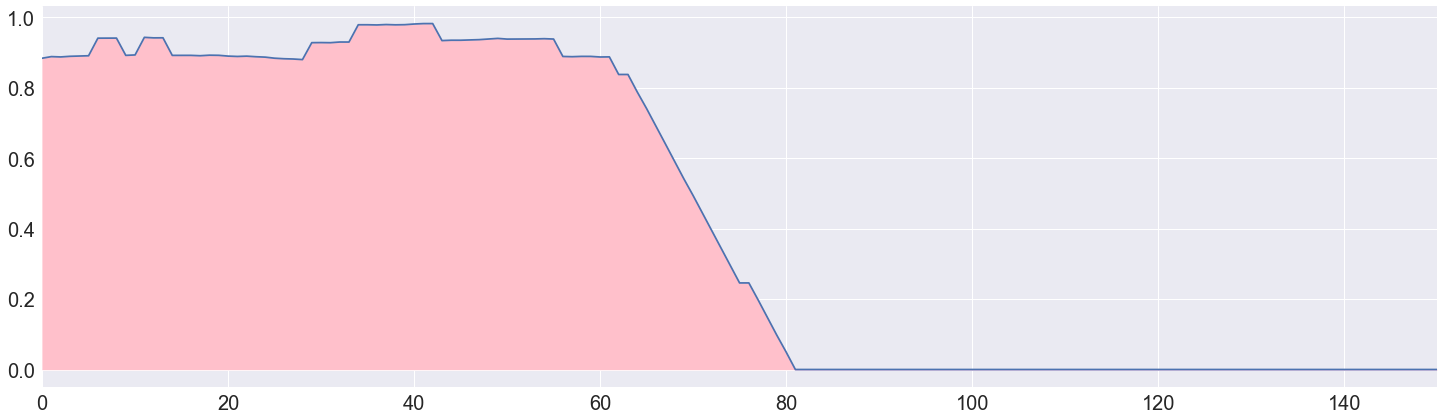

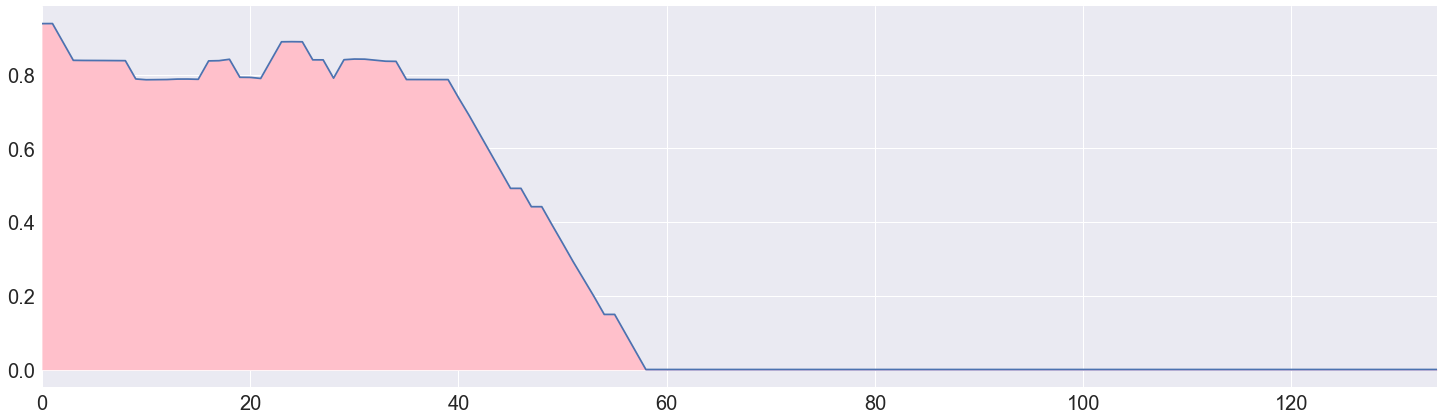

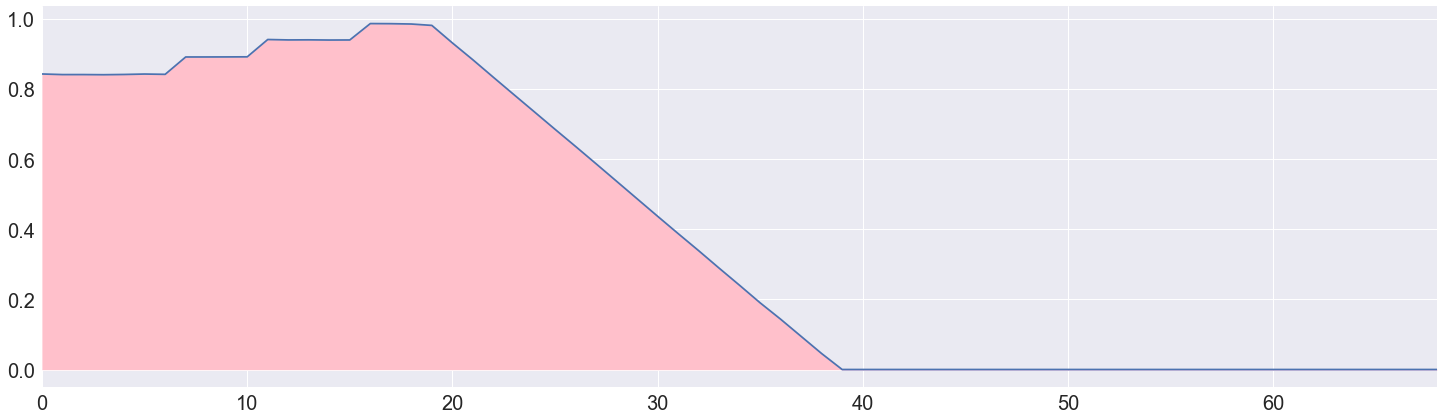

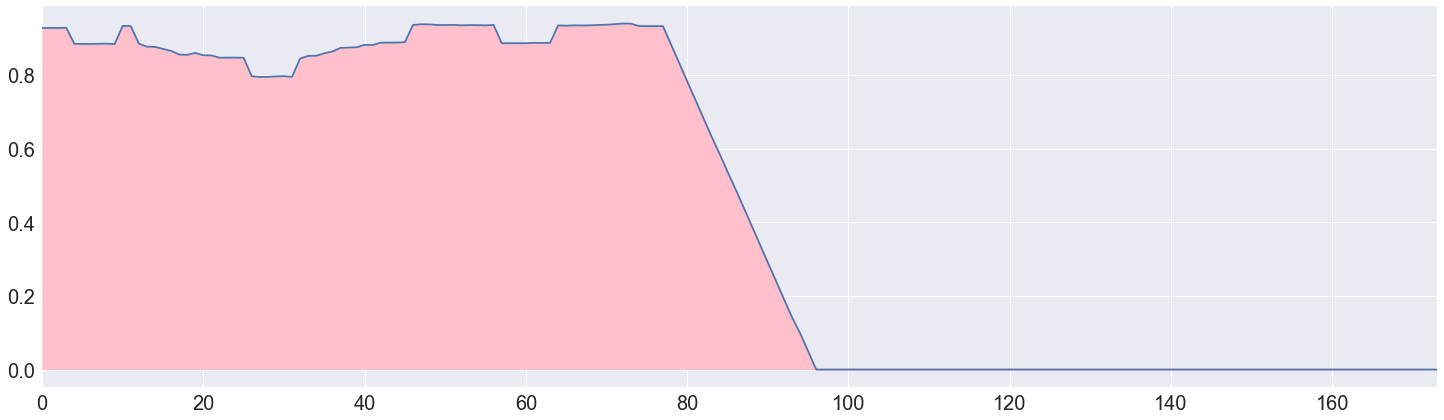

In [124]:
#Strength

plt.figure(figsize=(12,10))
word2vec_runavg(strength_AryaS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_AryaS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_AryaS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_AryaS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

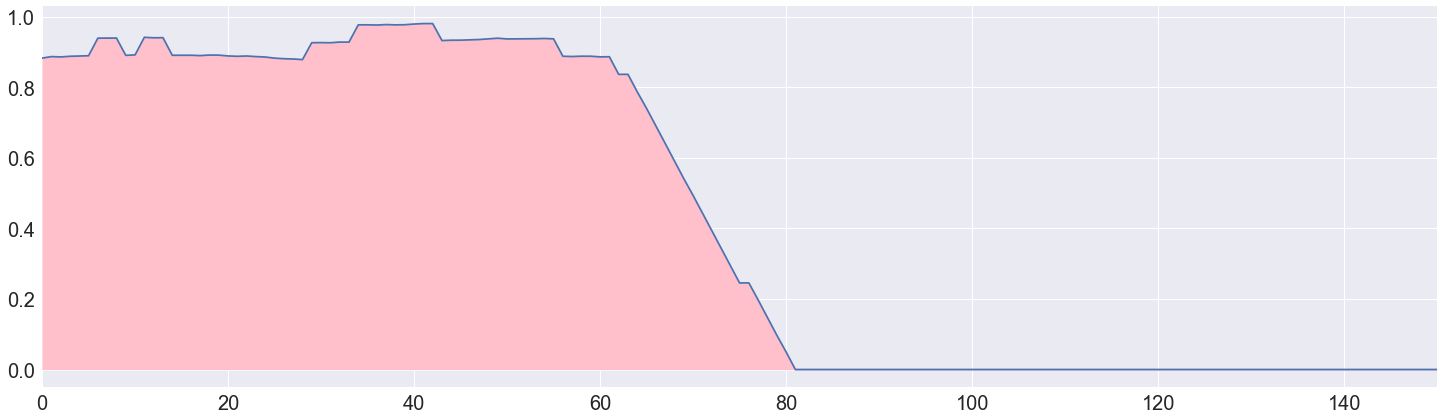

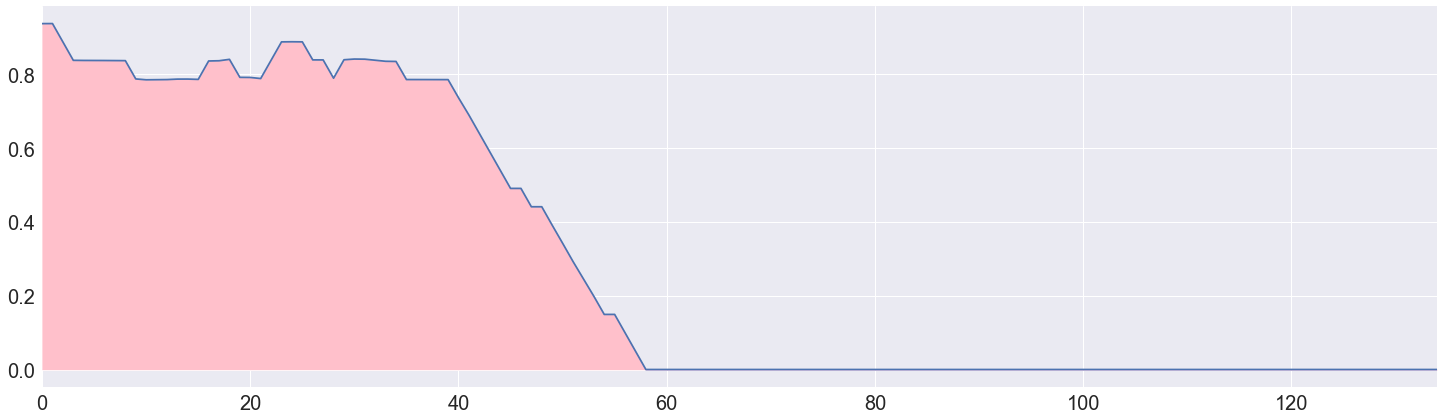

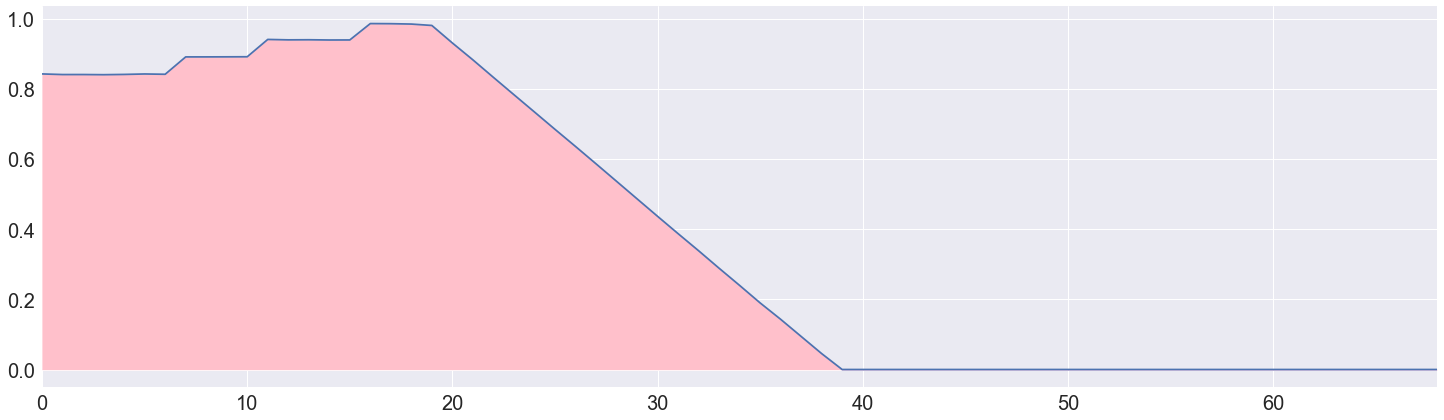

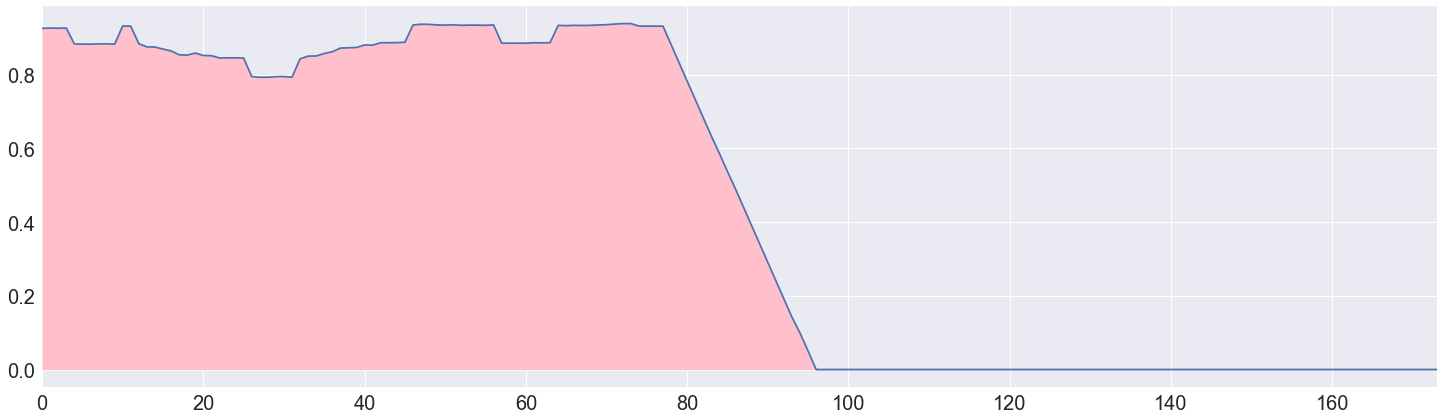

In [125]:
# Lead

plt.figure(figsize=(12,10))
word2vec_runavg(lead_AryaS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_AryaS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_AryaS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_AryaS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

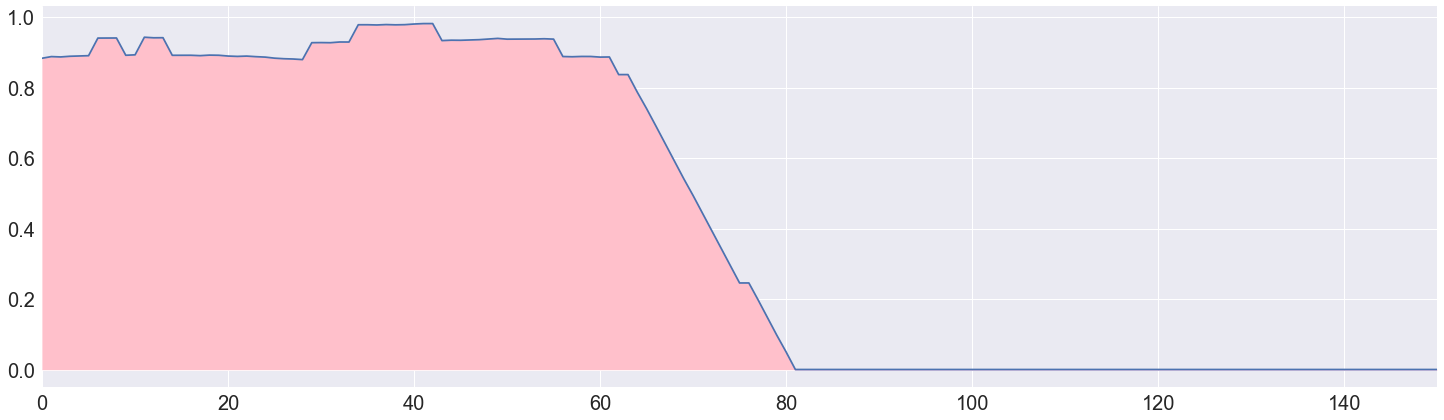

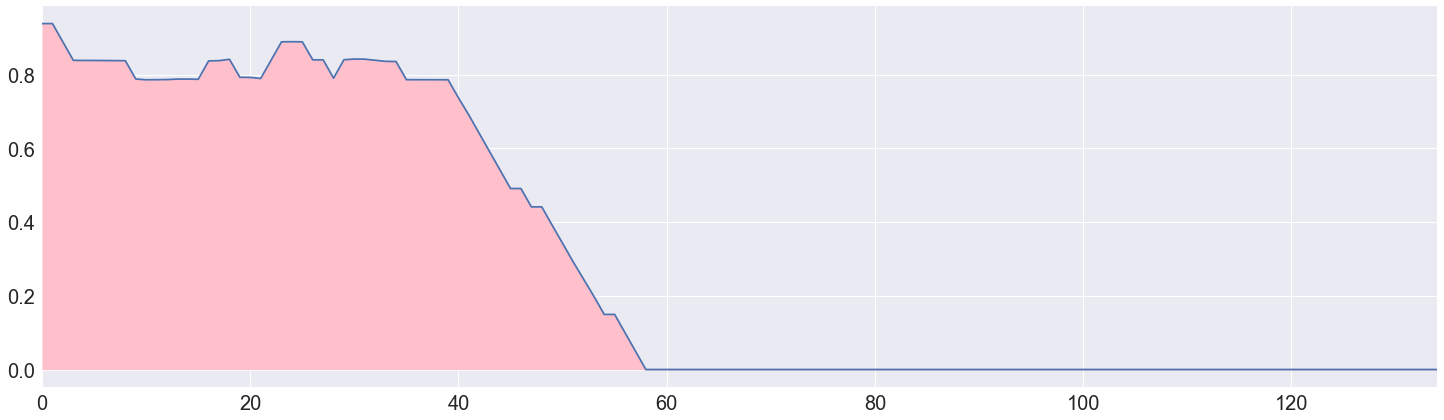

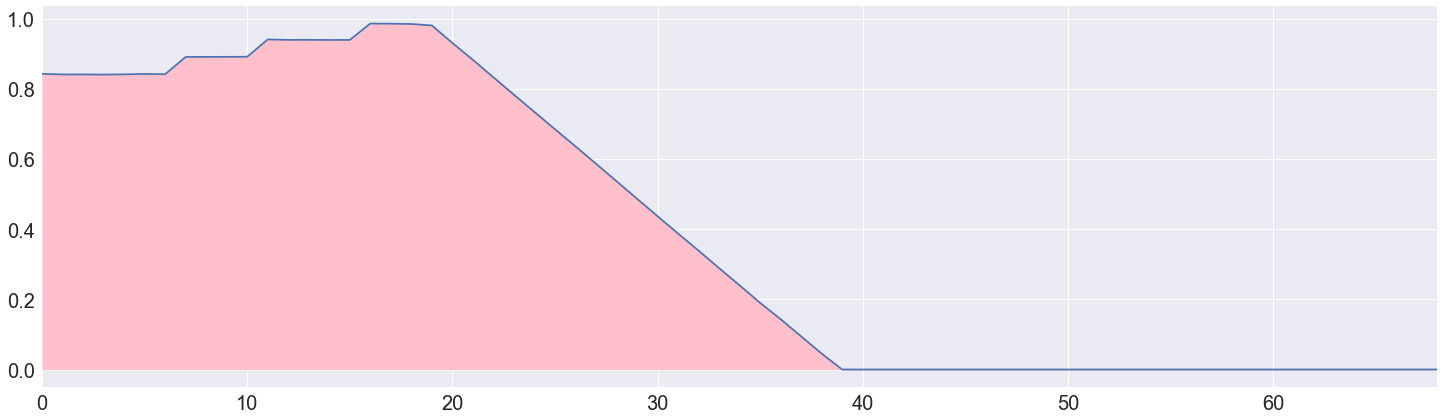

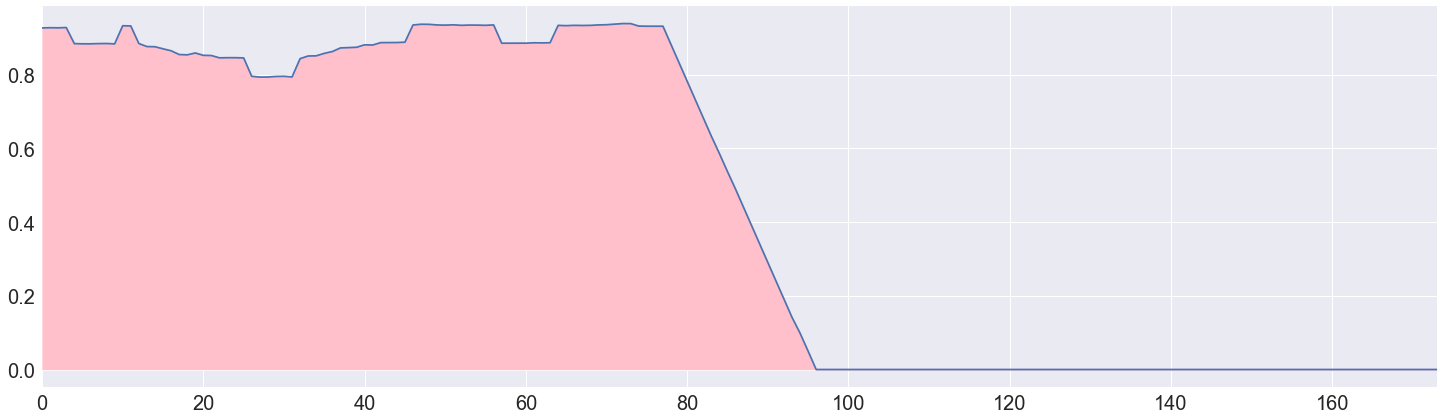

In [126]:
#Action

plt.figure(figsize=(12,10))
word2vec_runavg(action_AryaS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_AryaS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_AryaS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_AryaS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

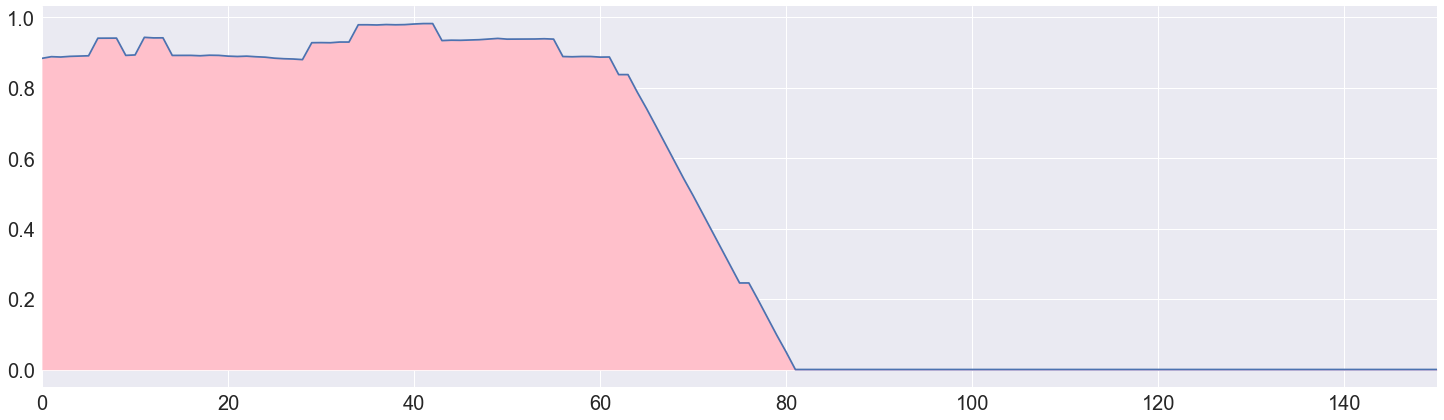

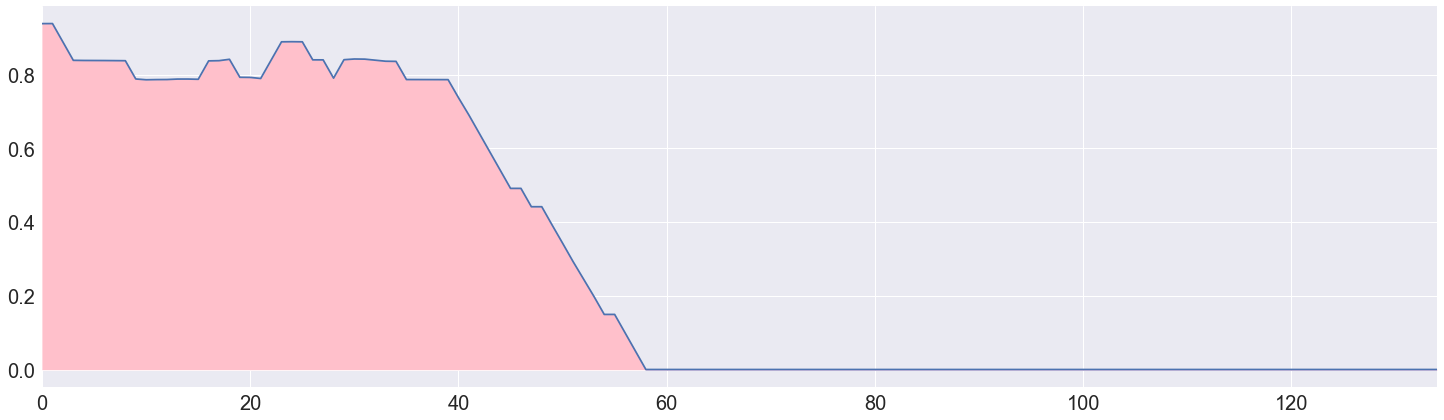

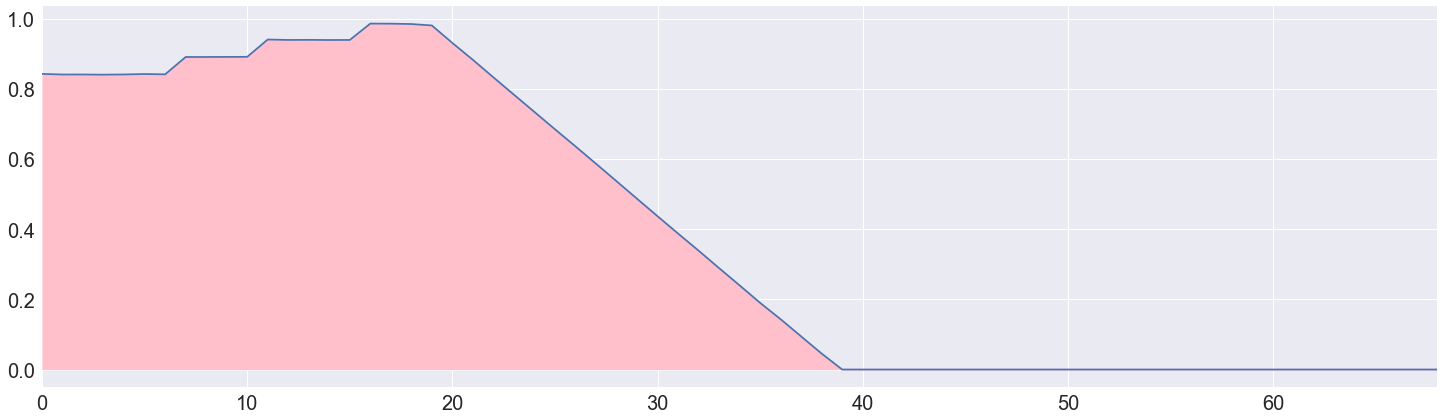

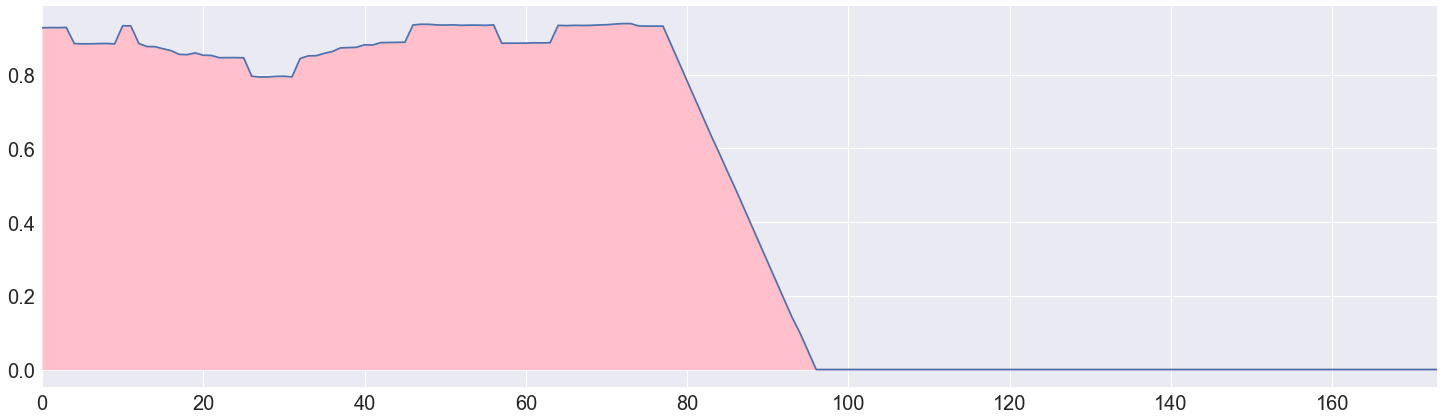

In [127]:
#Power

plt.figure(figsize=(12,10))
word2vec_runavg(power_AryaS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_AryaS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_AryaS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_AryaS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

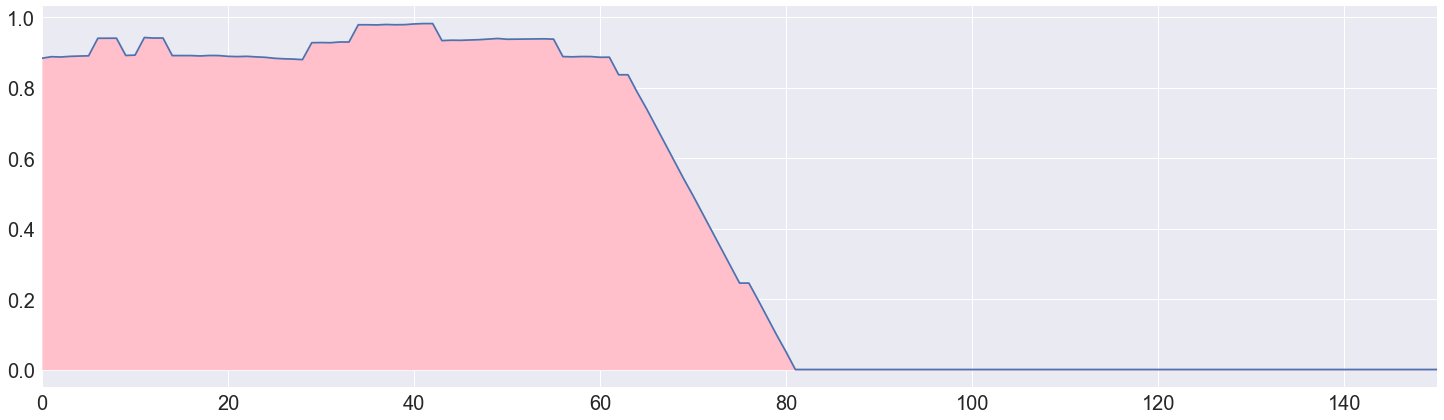

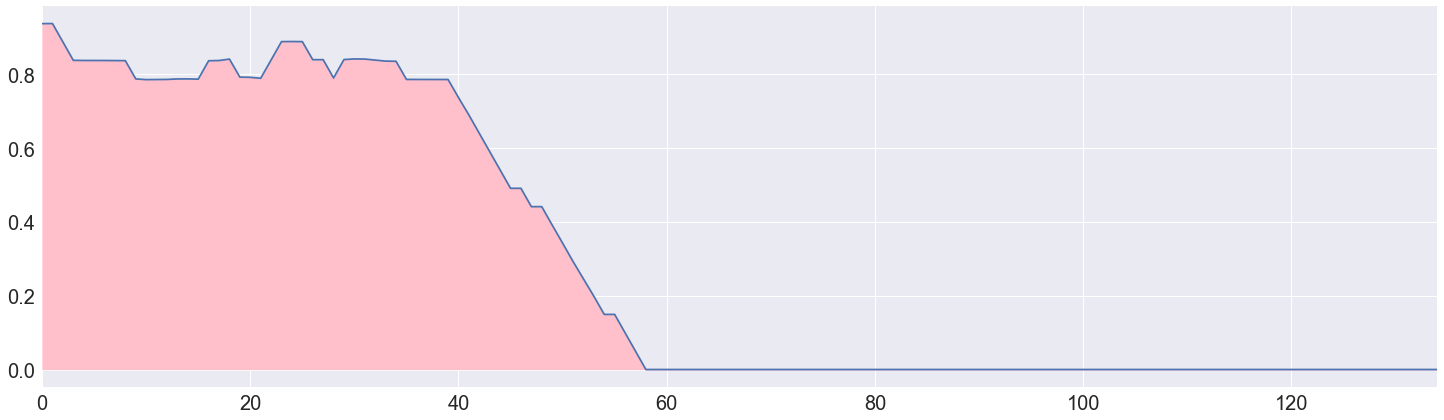

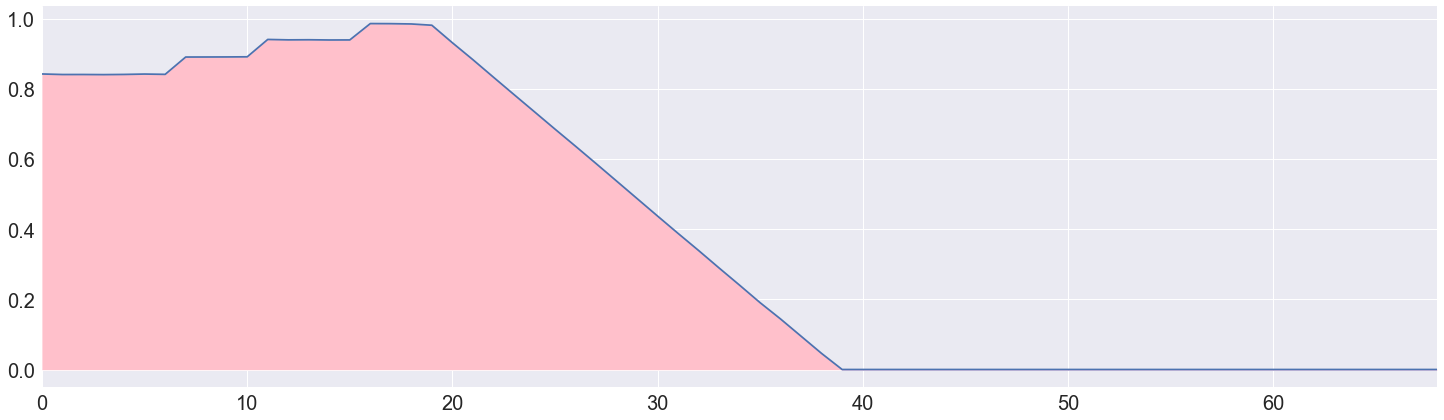

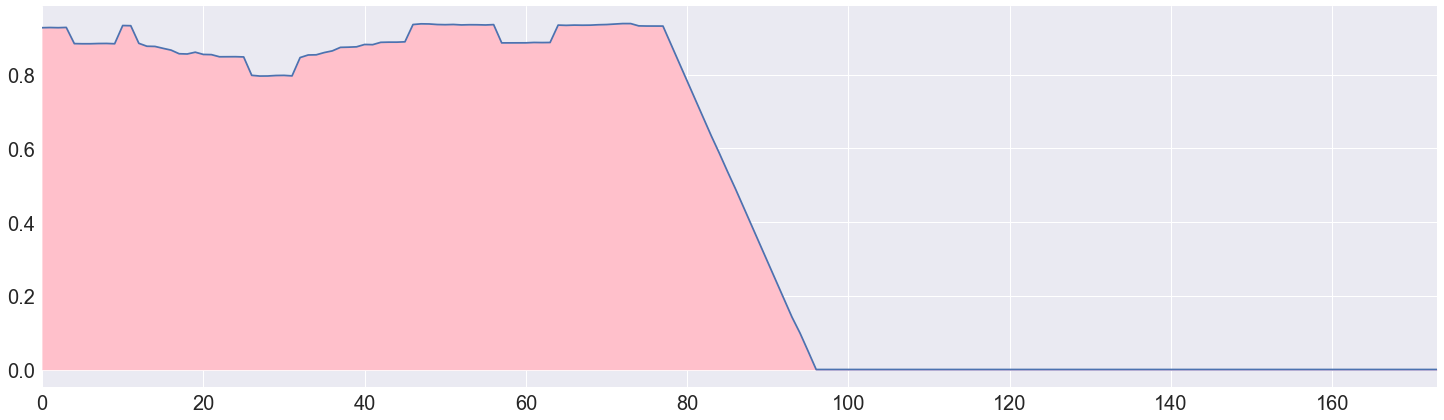

In [128]:
# Force

plt.figure(figsize=(12,10))
word2vec_runavg(force_AryaS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_AryaS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_AryaS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_AryaS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text yticklabel objects>)

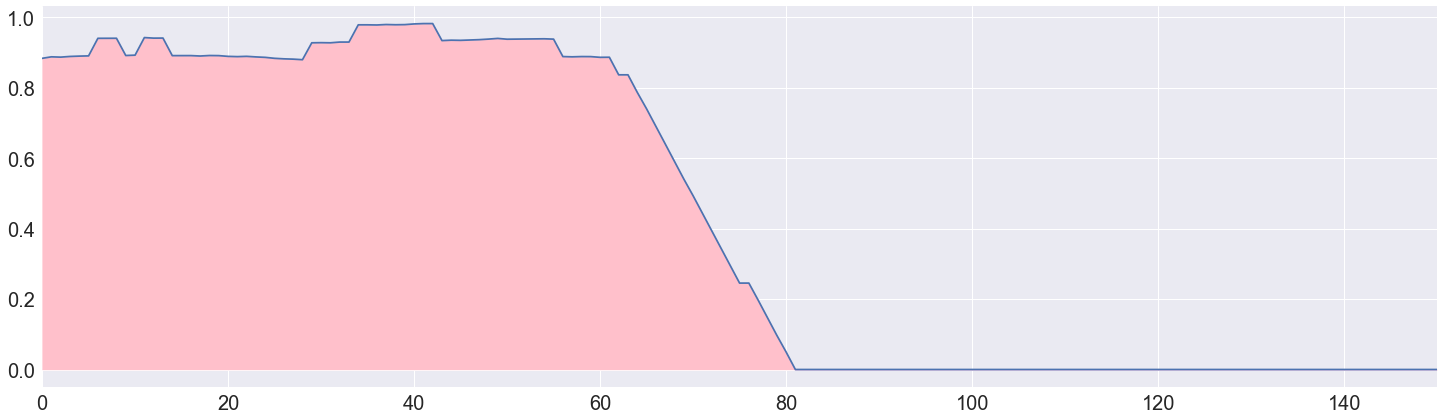

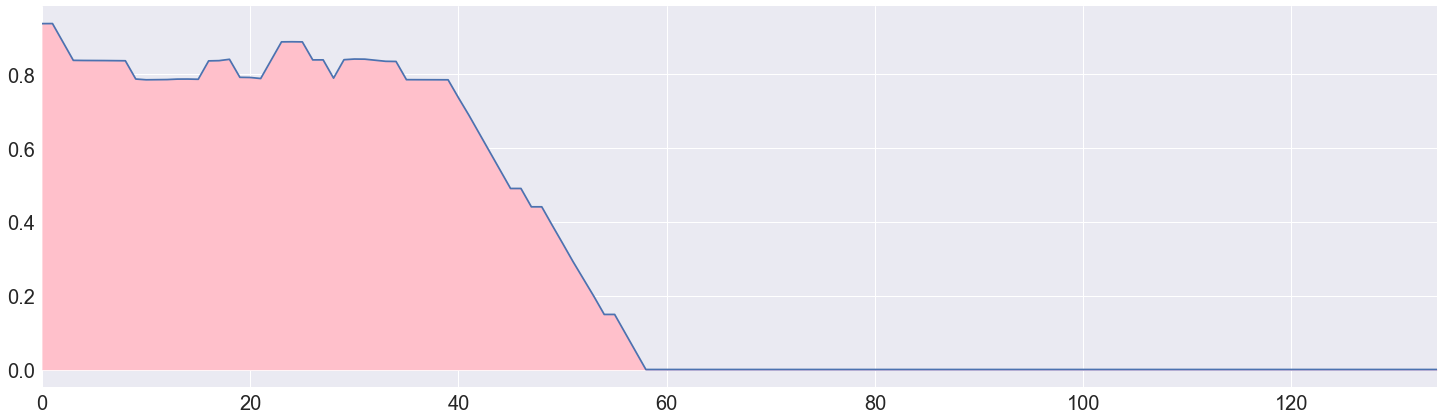

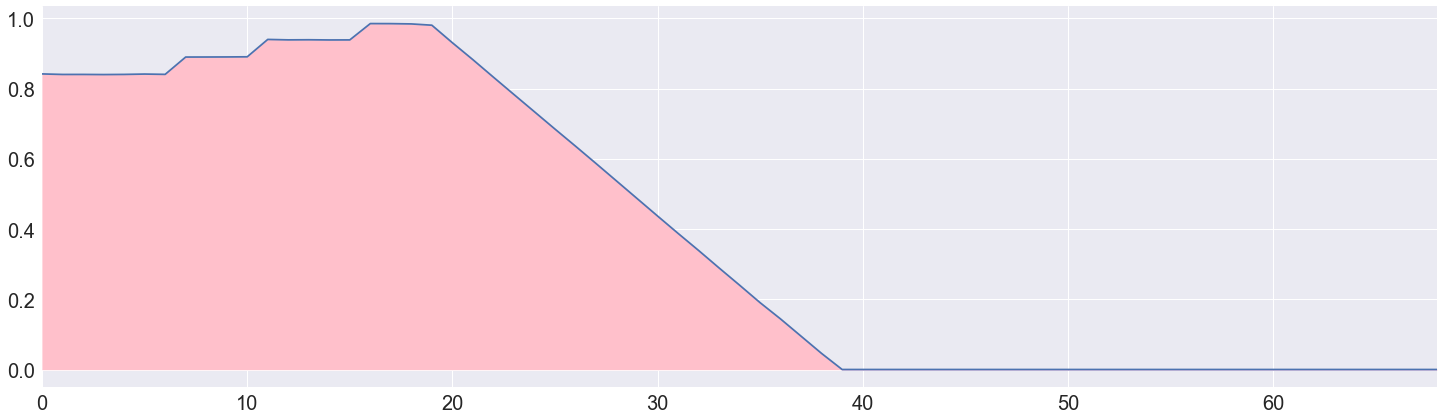

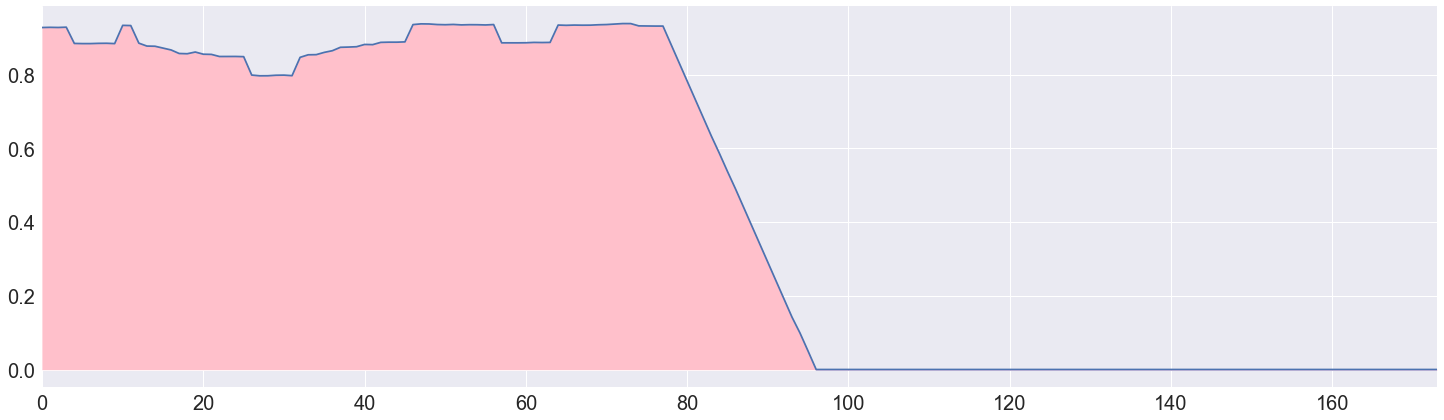

In [129]:
#Command

plt.figure(figsize=(12,10))
word2vec_runavg(command_AryaS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_AryaS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_AryaS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_AryaS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#### Cersei

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

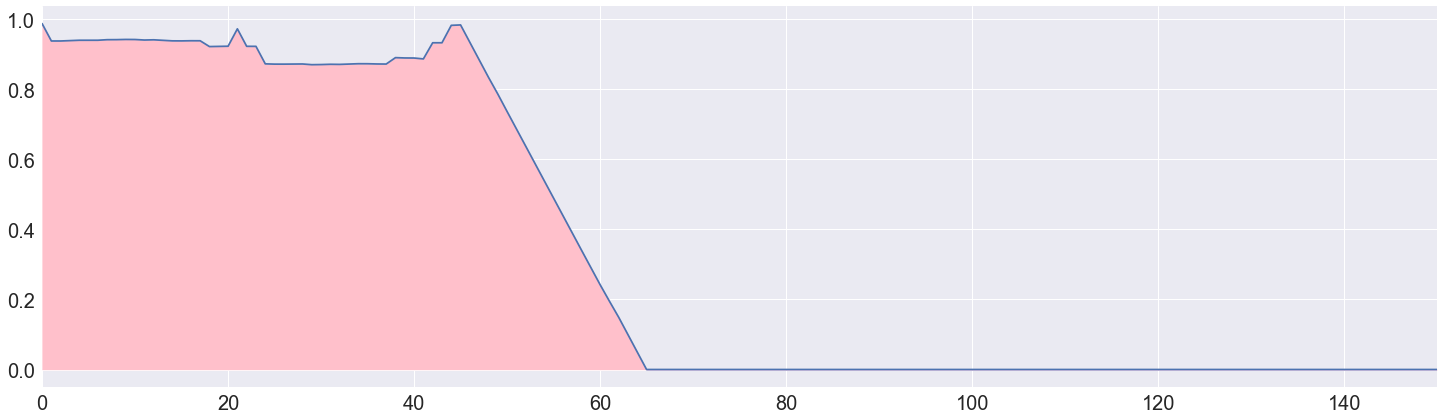

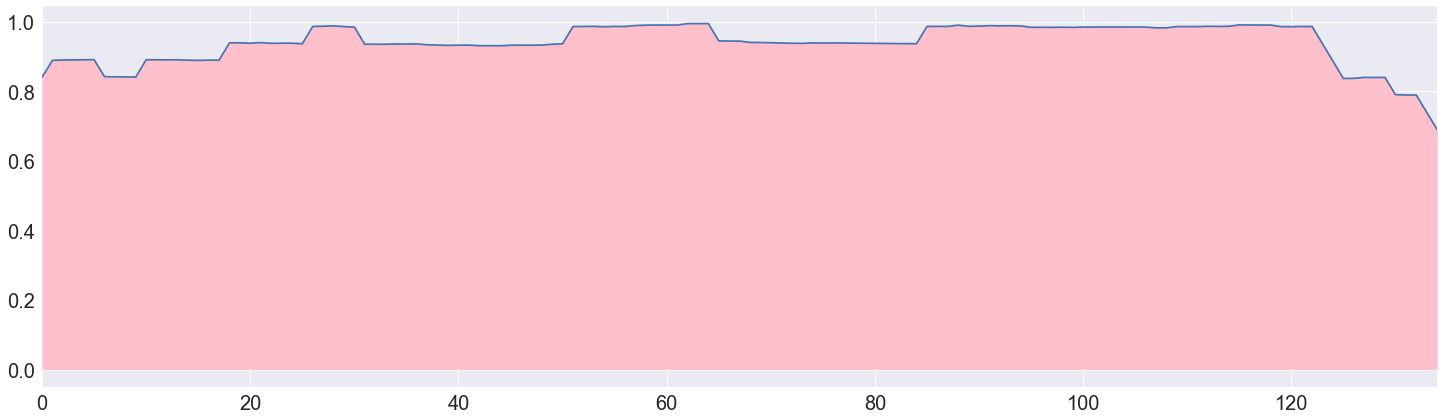

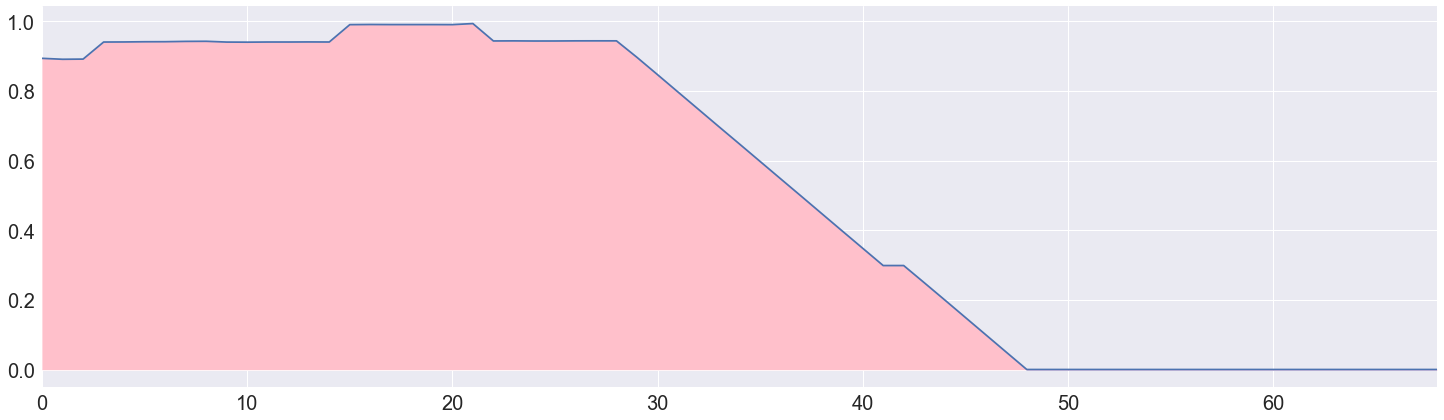

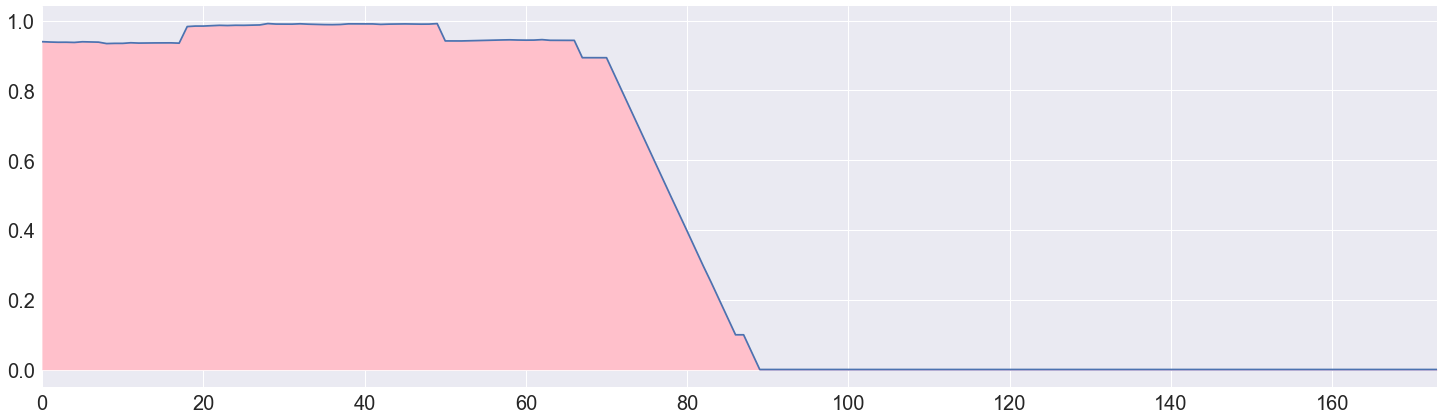

In [130]:
#Strength

plt.figure(figsize=(12,10))
word2vec_runavg(strength_CerseiS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_CerseiS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_CerseiS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_CerseiS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

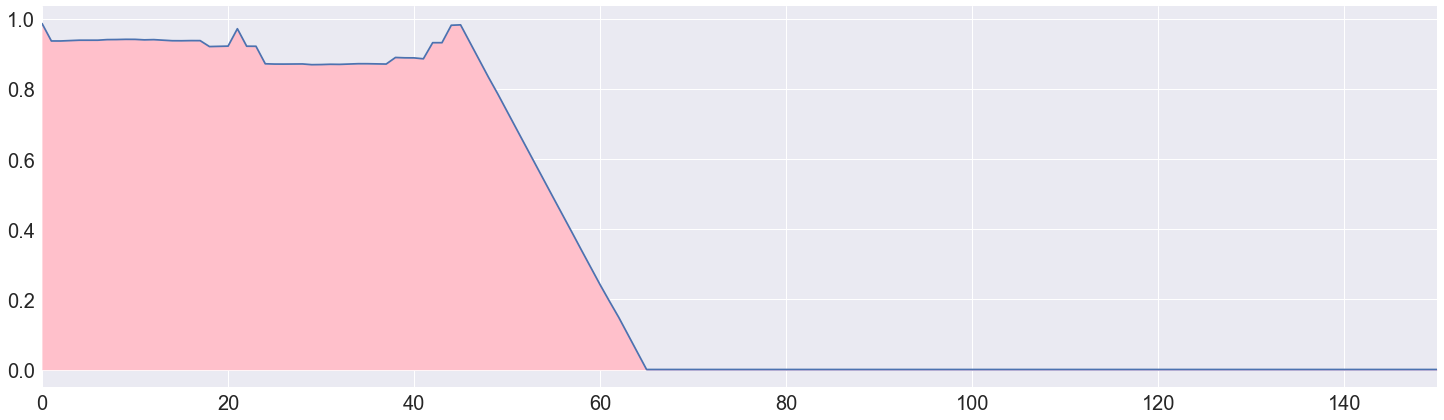

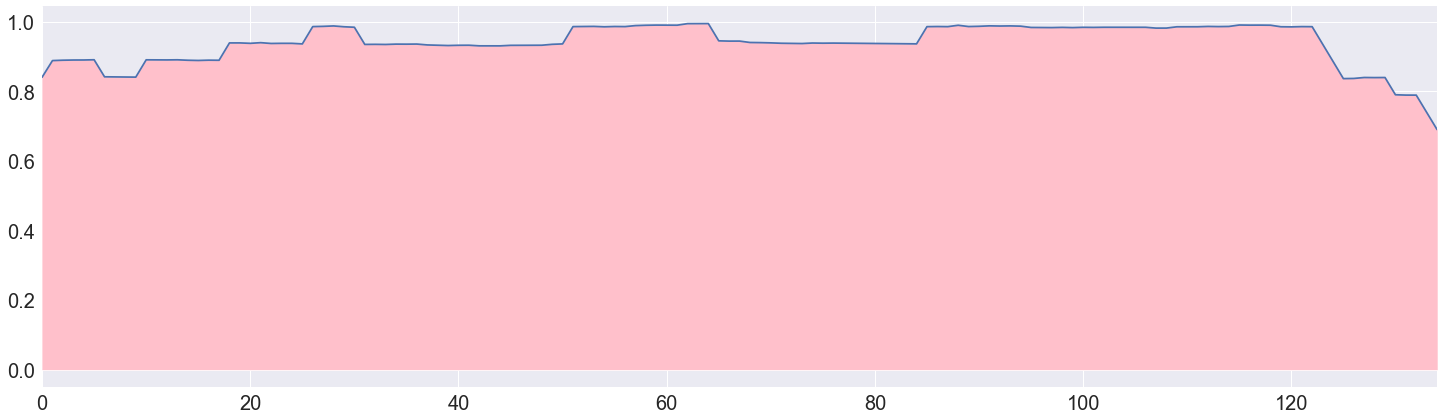

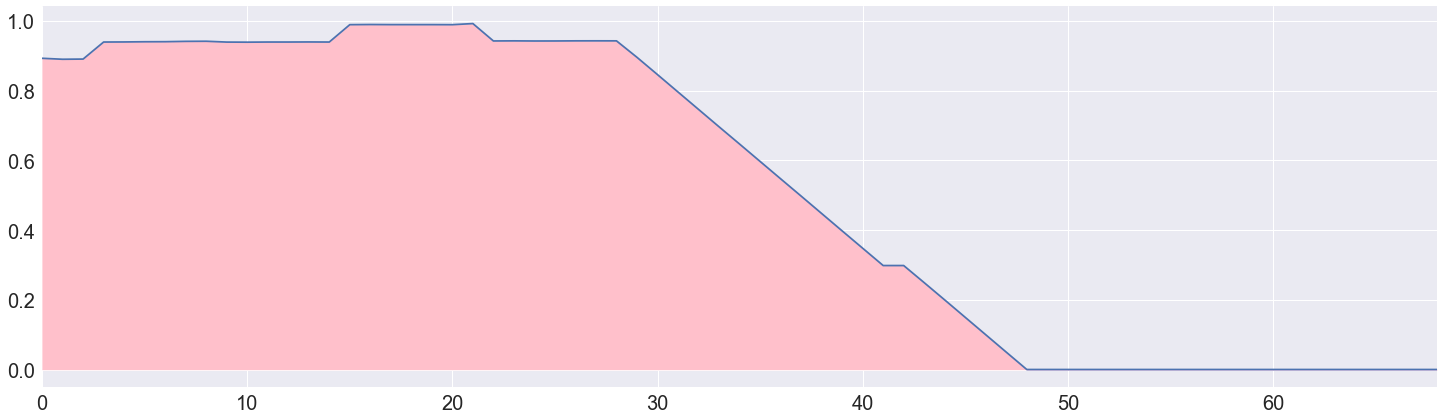

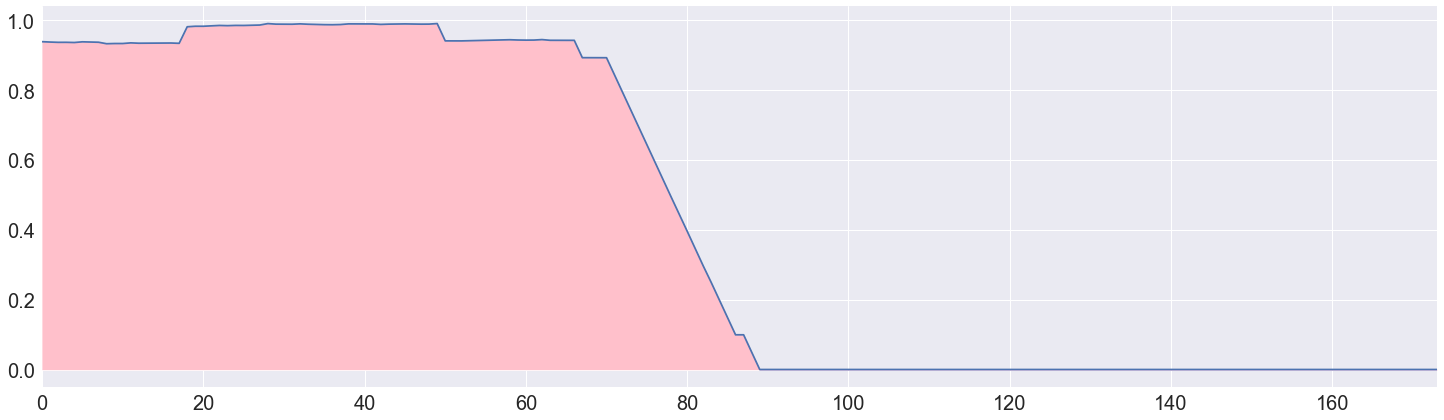

In [131]:
# Lead

plt.figure(figsize=(12,10))
word2vec_runavg(lead_CerseiS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_CerseiS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_CerseiS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_CerseiS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

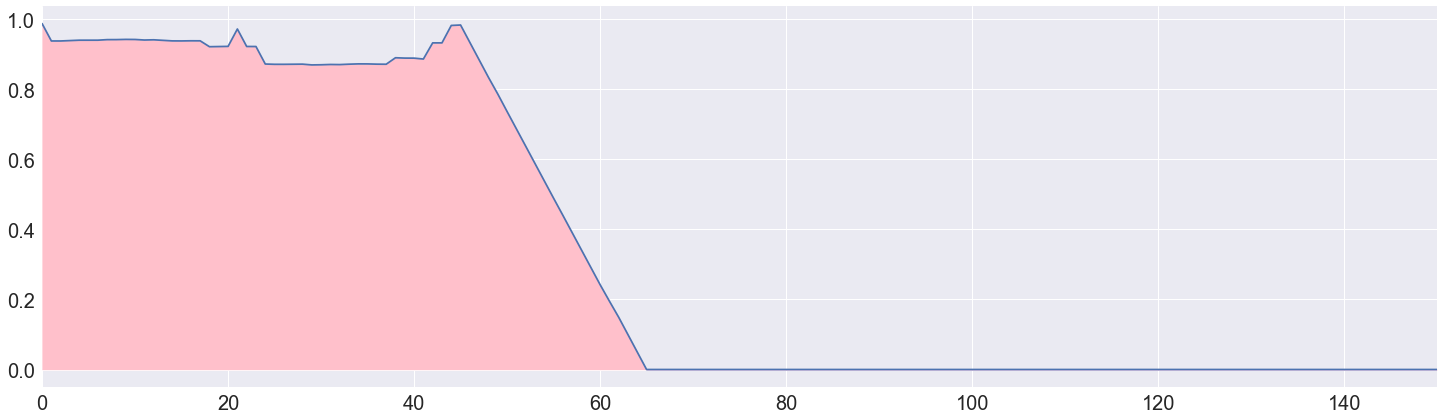

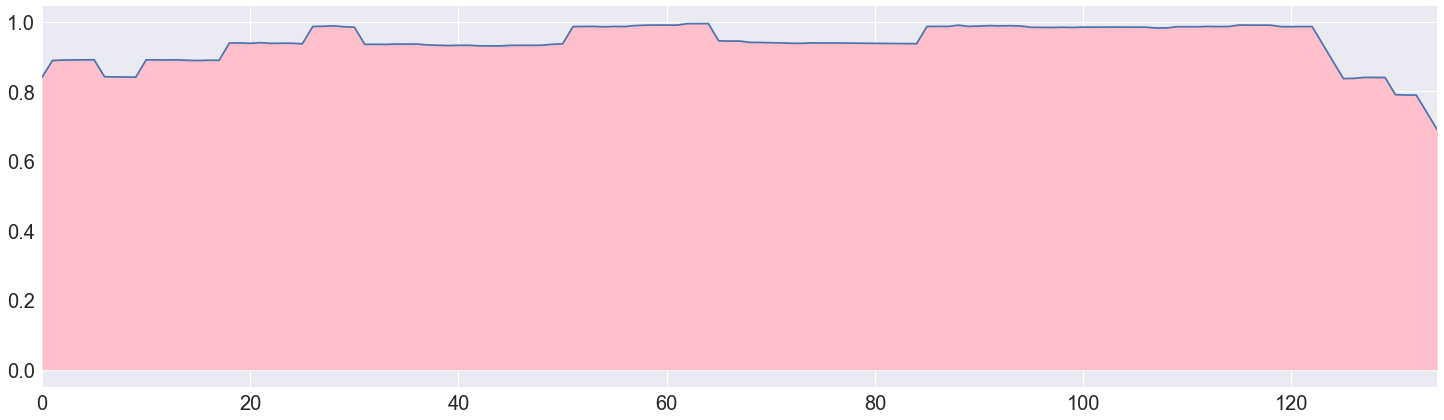

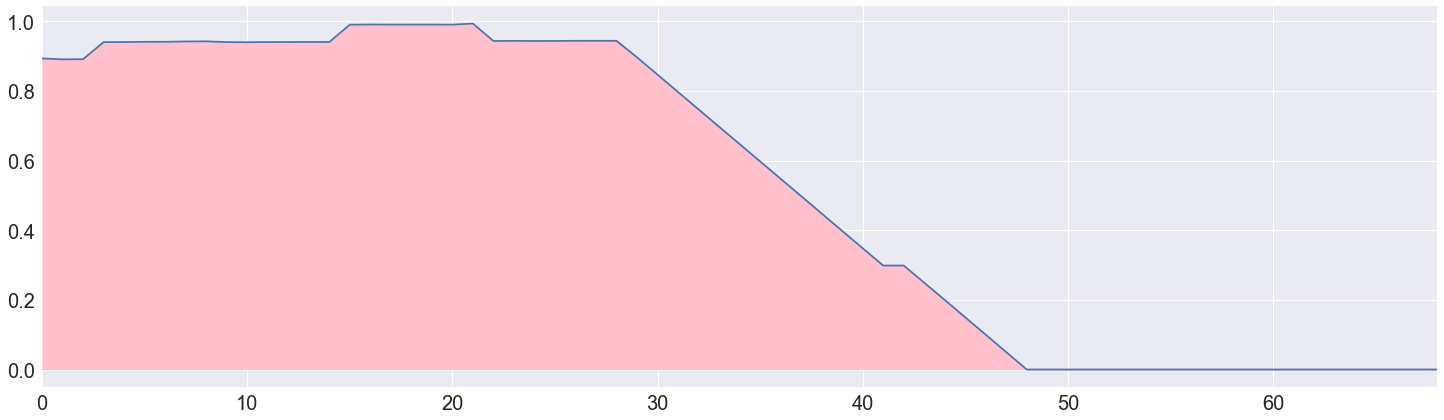

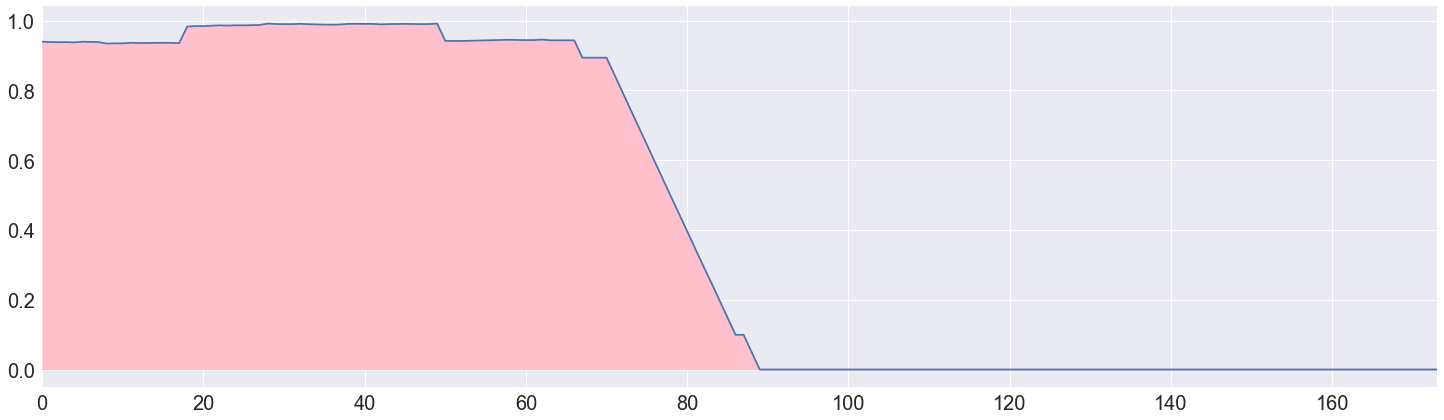

In [132]:
# Action

plt.figure(figsize=(12,10))
word2vec_runavg(action_CerseiS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_CerseiS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_CerseiS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_CerseiS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

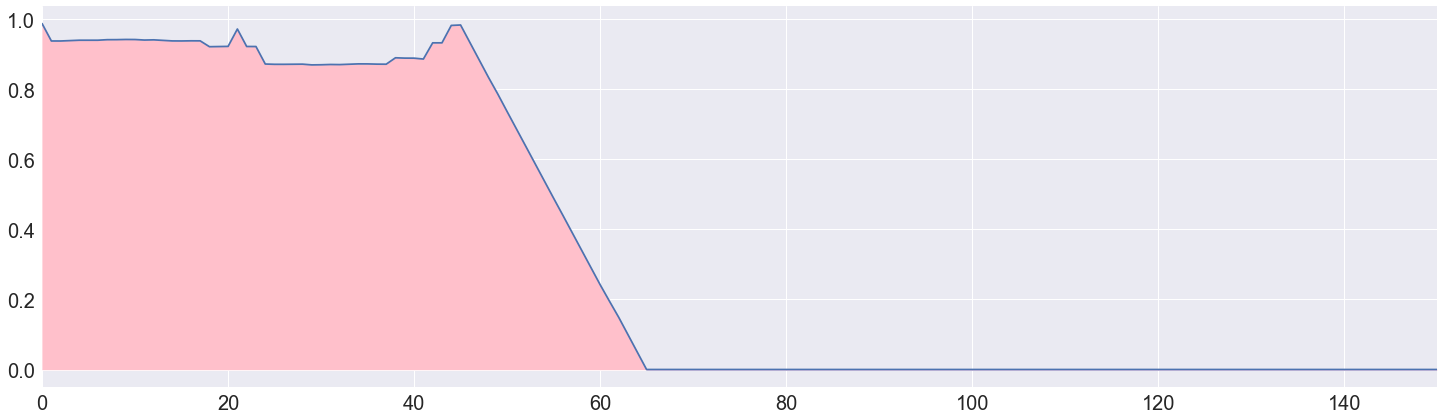

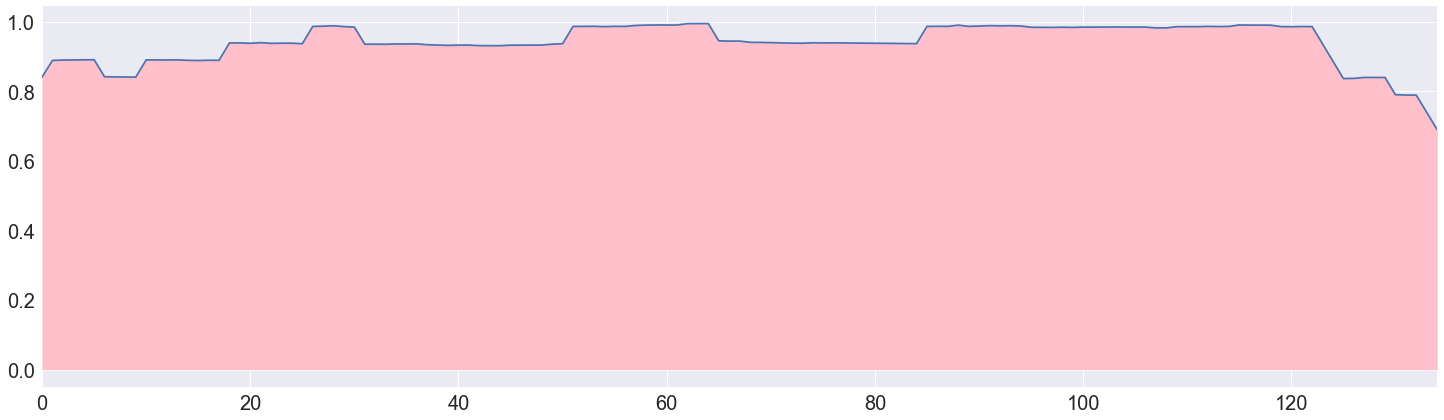

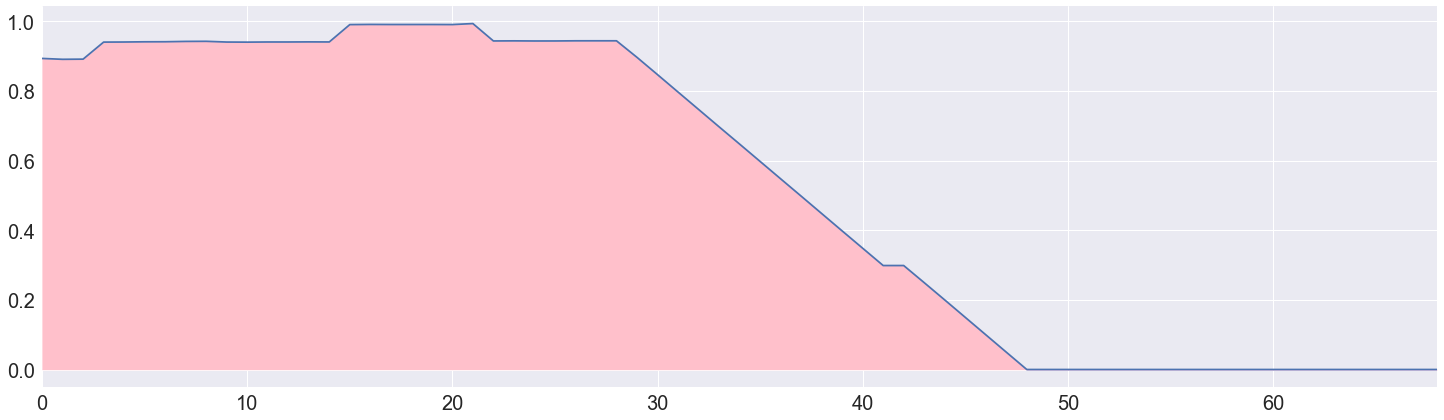

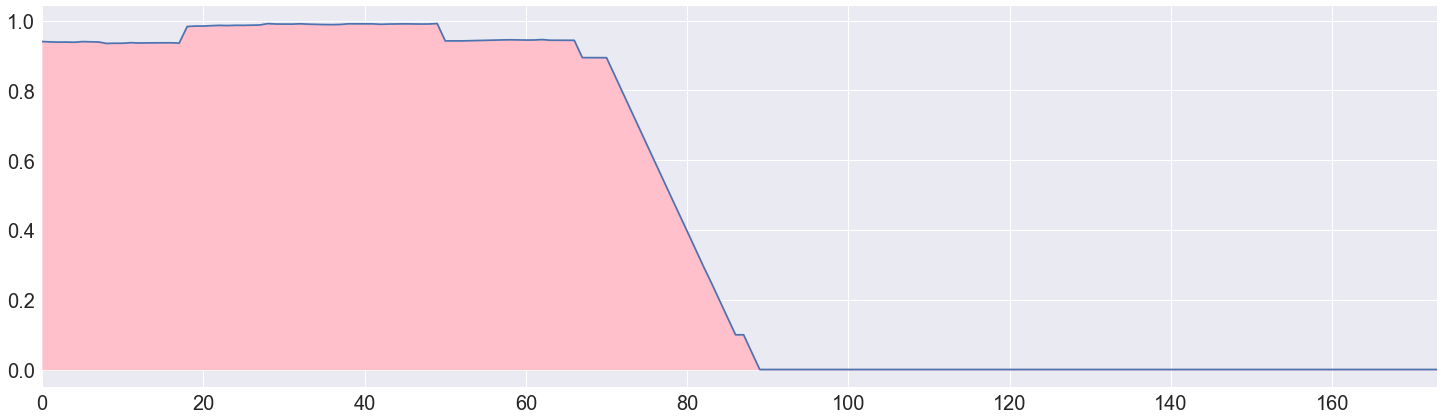

In [133]:
# Power

plt.figure(figsize=(12,10))
word2vec_runavg(power_CerseiS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_CerseiS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_CerseiS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_CerseiS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

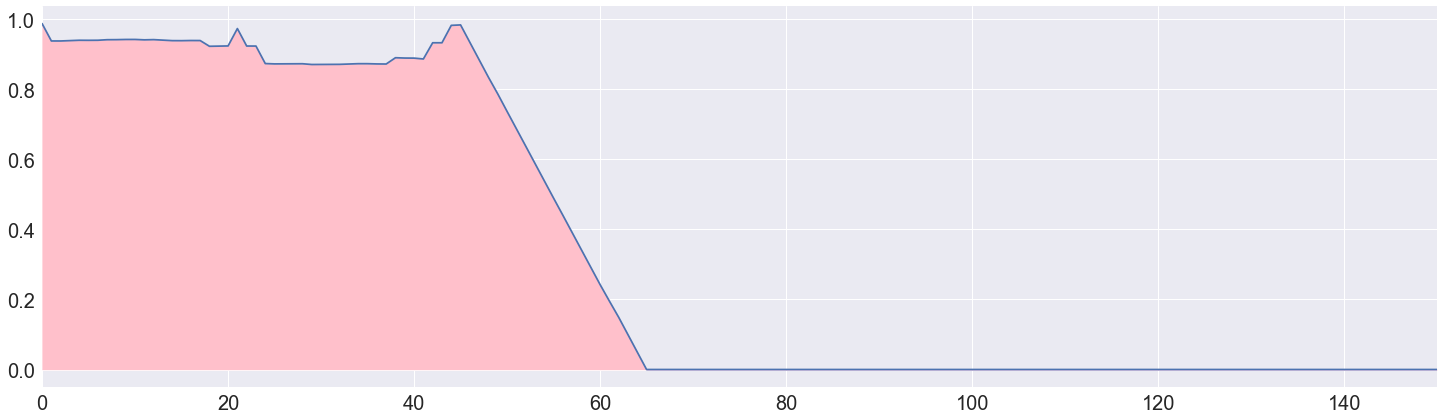

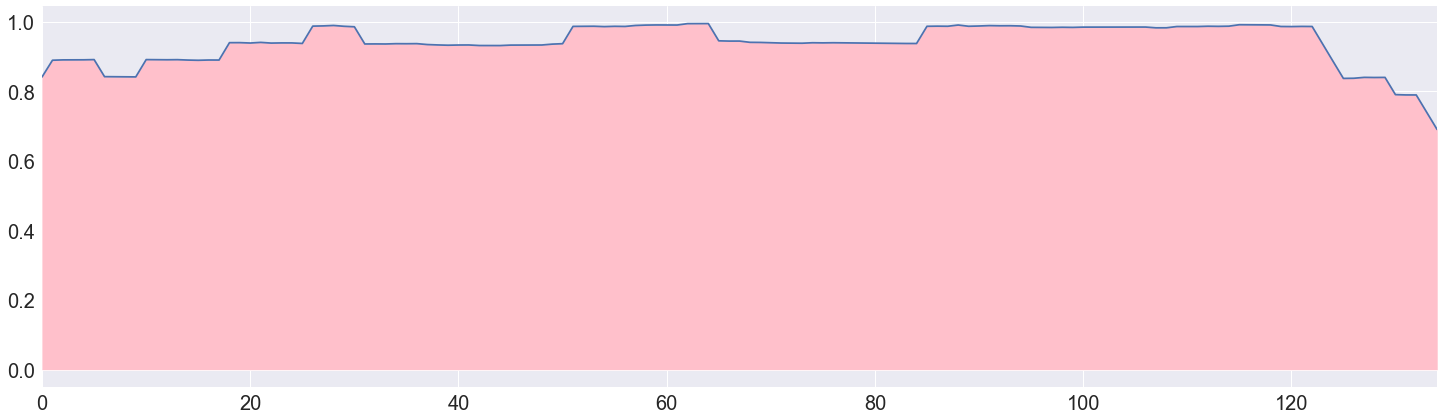

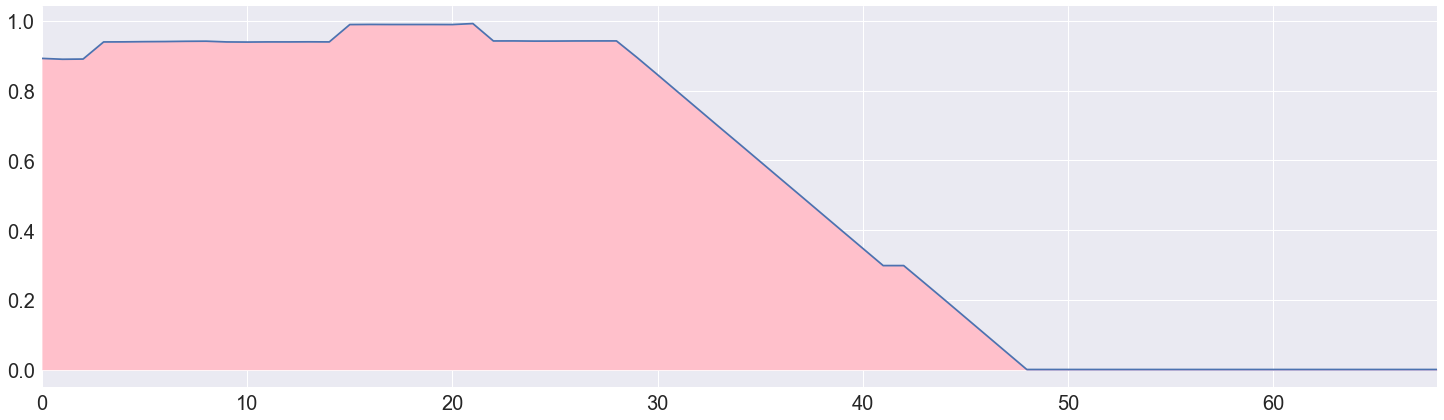

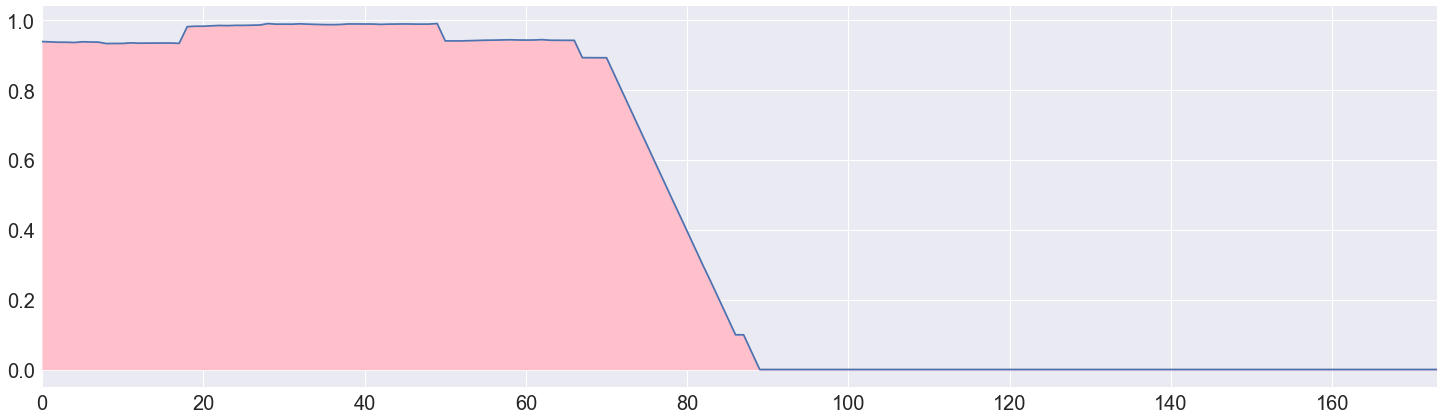

In [134]:
# Force

plt.figure(figsize=(12,10))
word2vec_runavg(force_CerseiS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_CerseiS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_CerseiS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_CerseiS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

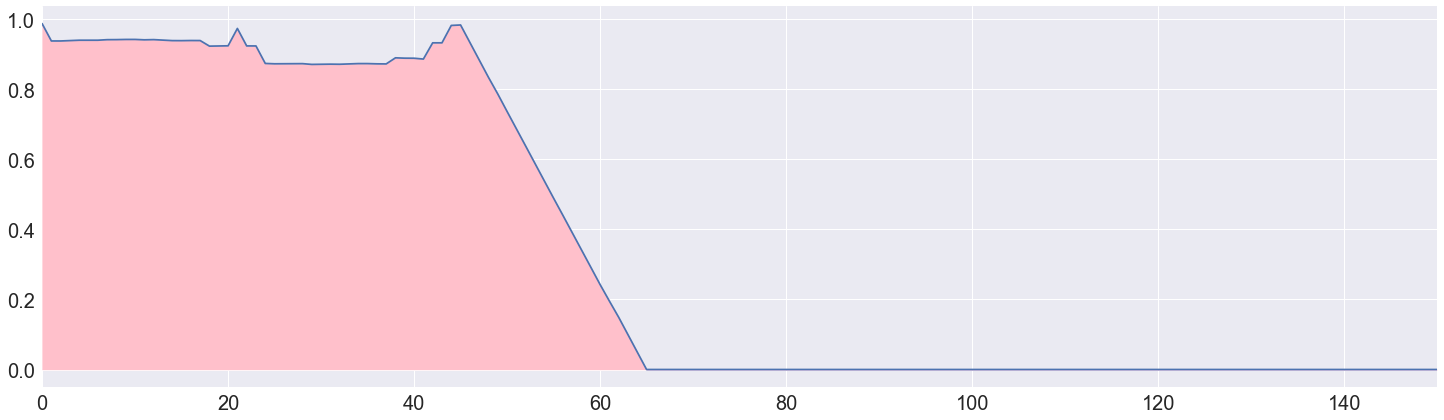

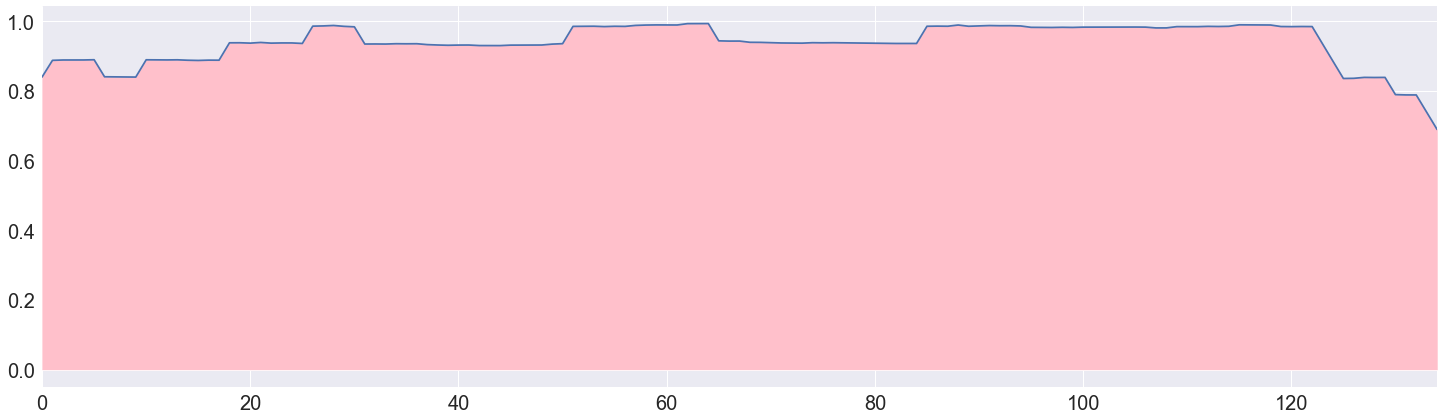

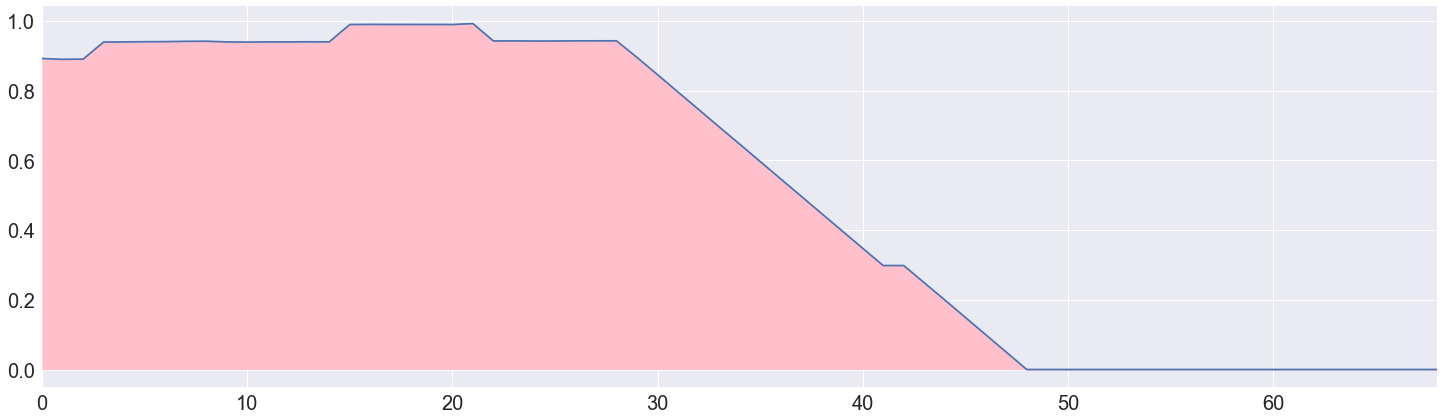

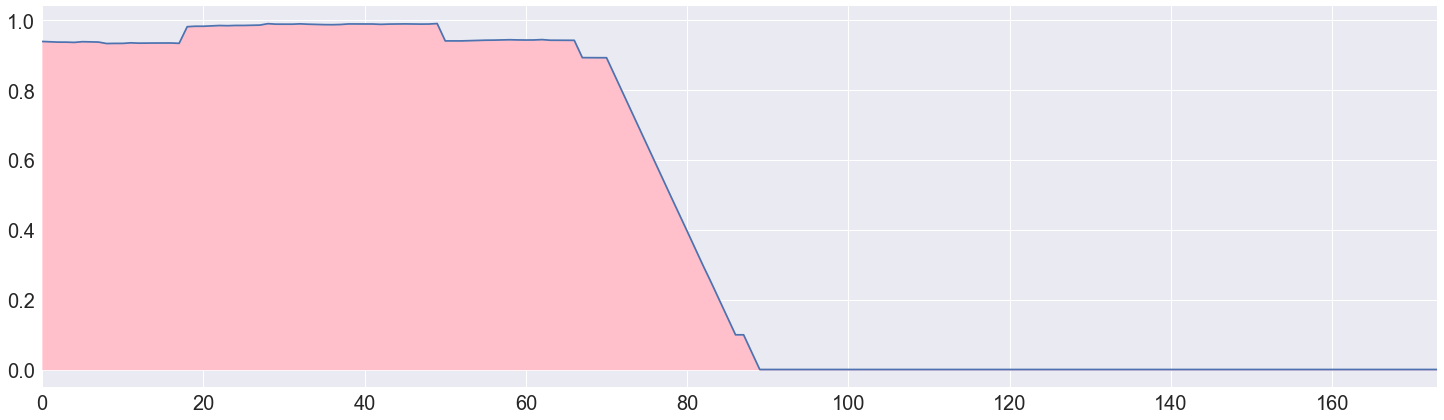

In [135]:
plt.figure(figsize=(12,10))
word2vec_runavg(command_CerseiS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_CerseiS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_CerseiS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_CerseiS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#### Daenerys

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

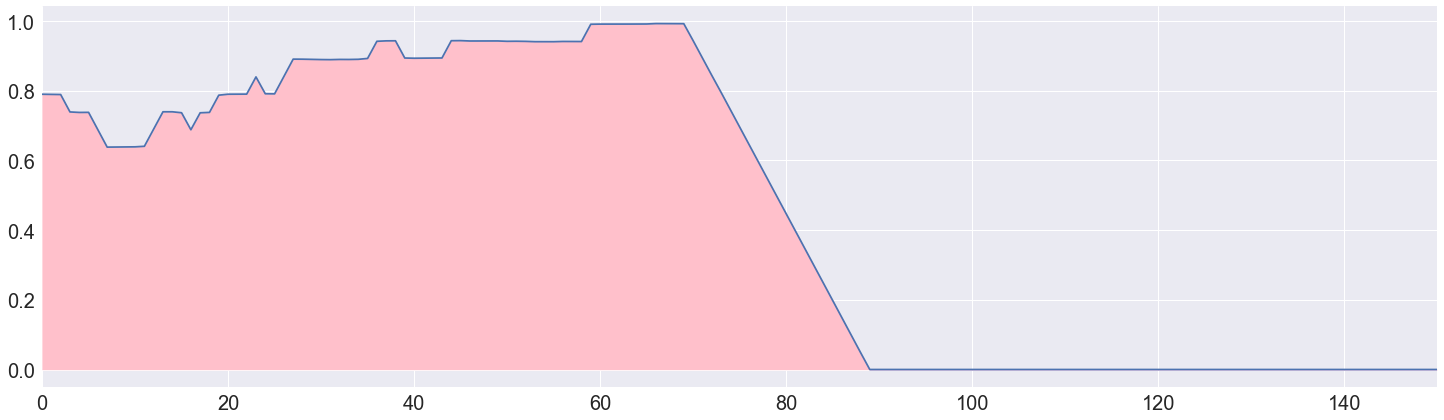

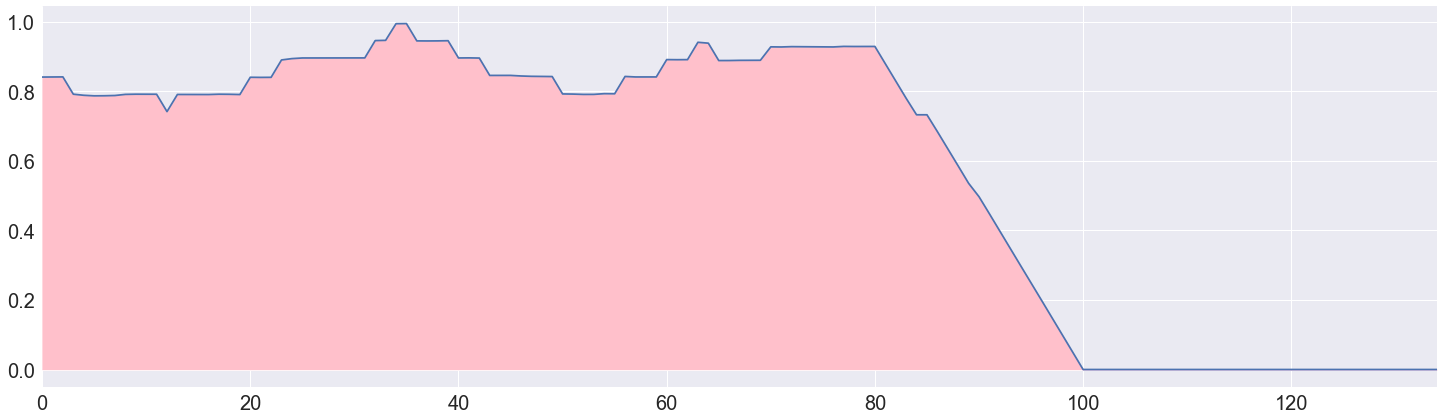

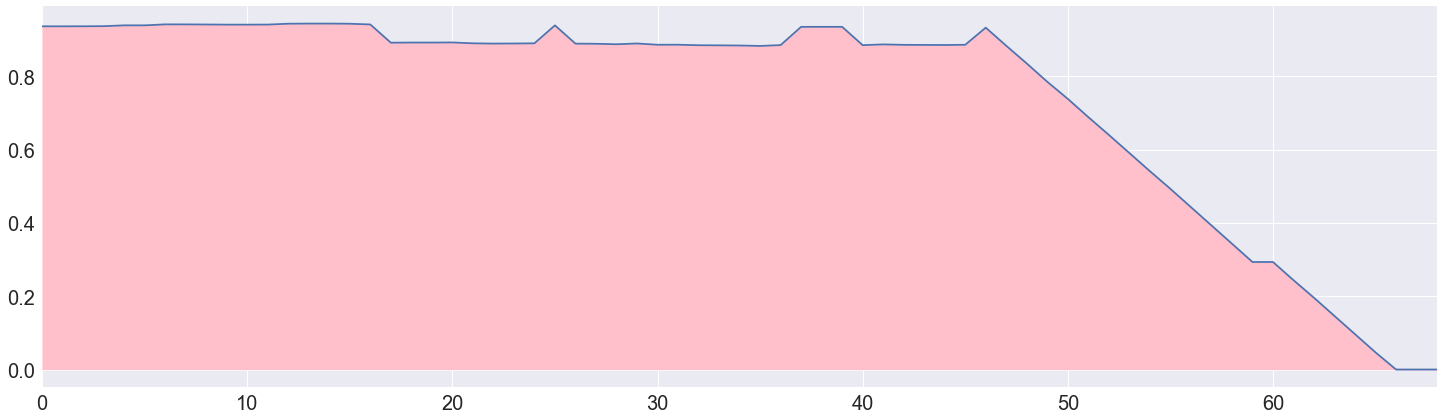

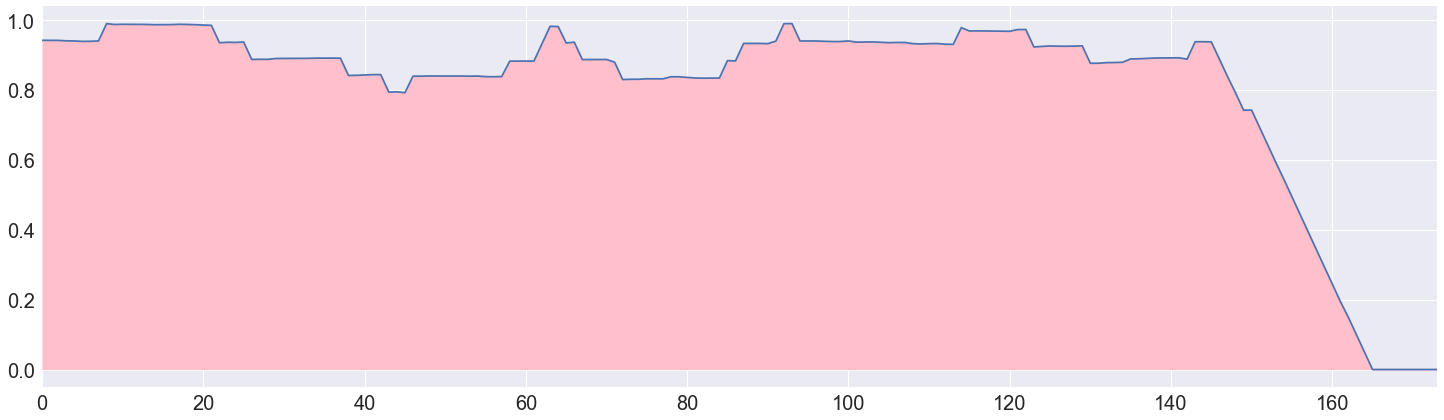

In [136]:
# Strength

plt.figure(figsize=(12,10))
word2vec_runavg(strength_DanyS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_DanyS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_DanyS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_DanyS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

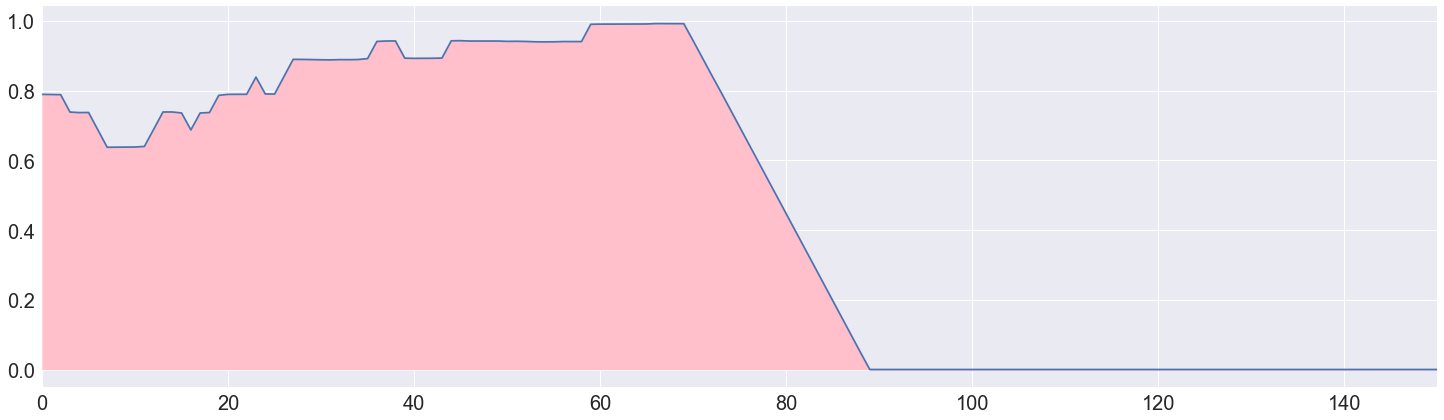

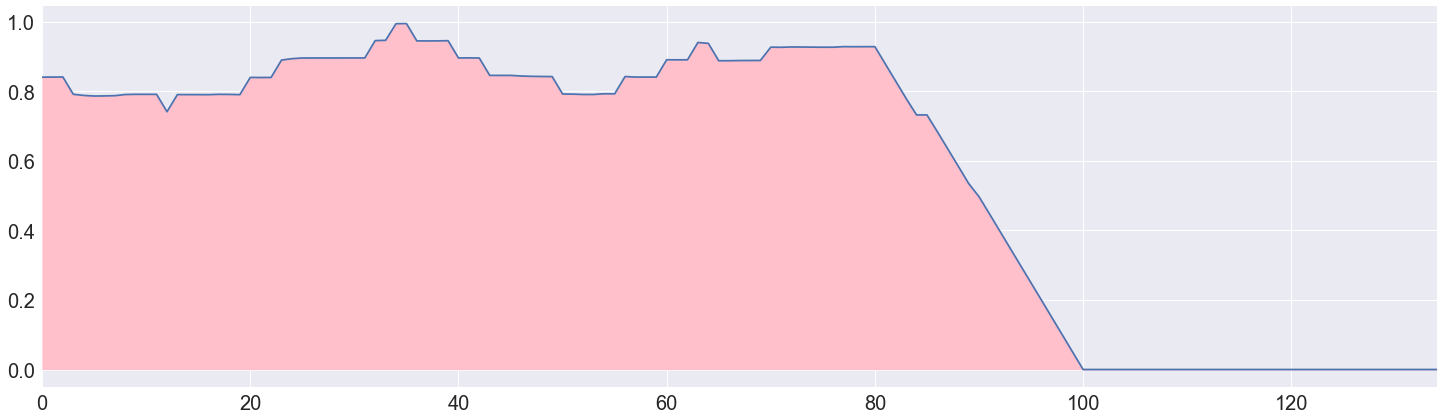

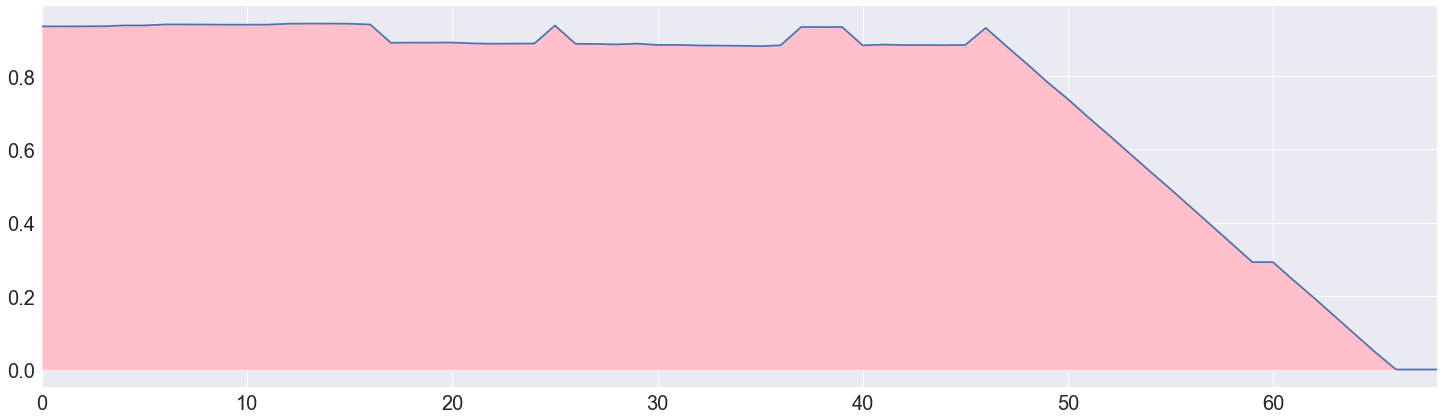

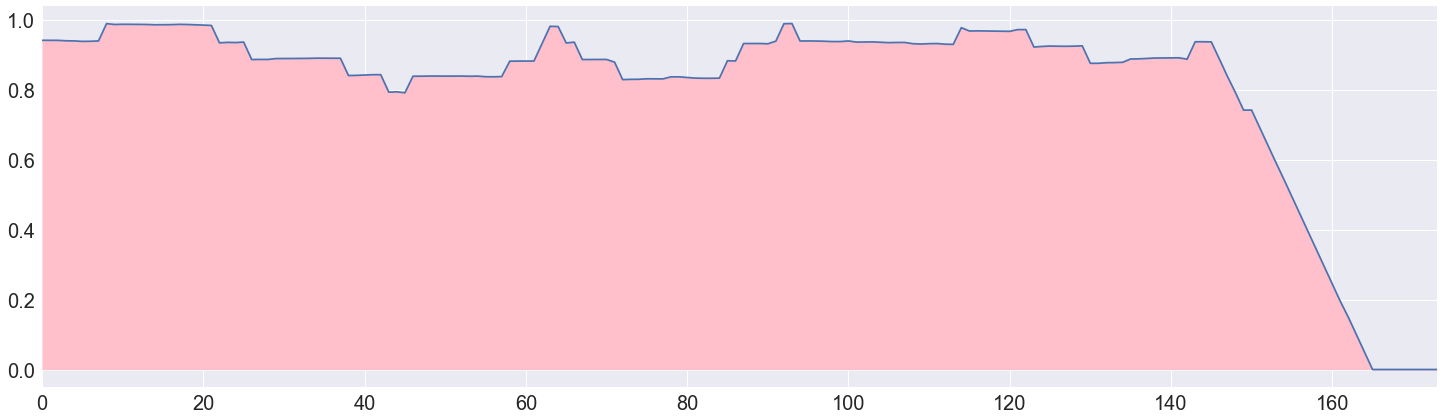

In [137]:
# Lead

plt.figure(figsize=(12,10))
word2vec_runavg(lead_DanyS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_DanyS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_DanyS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_DanyS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

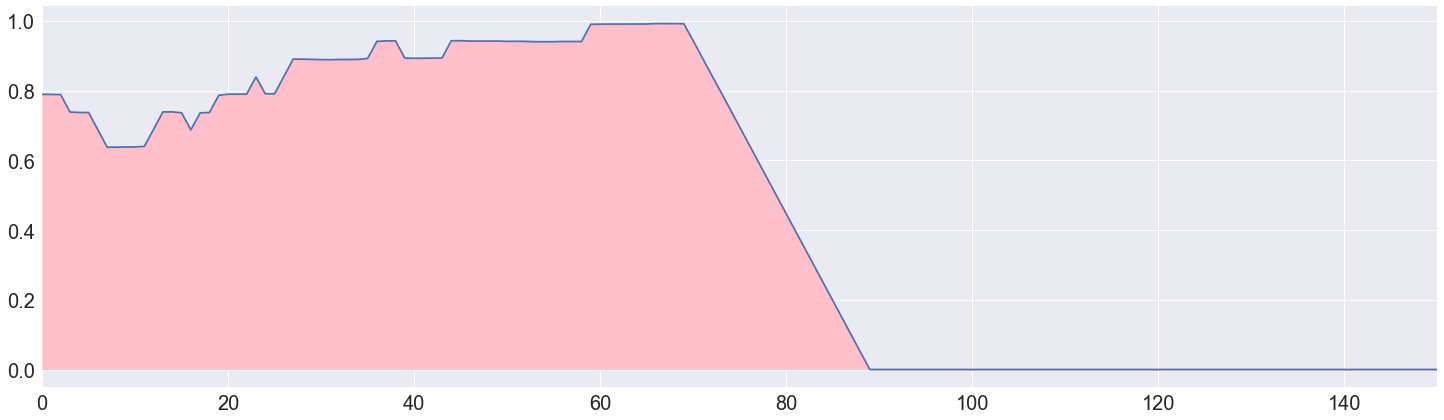

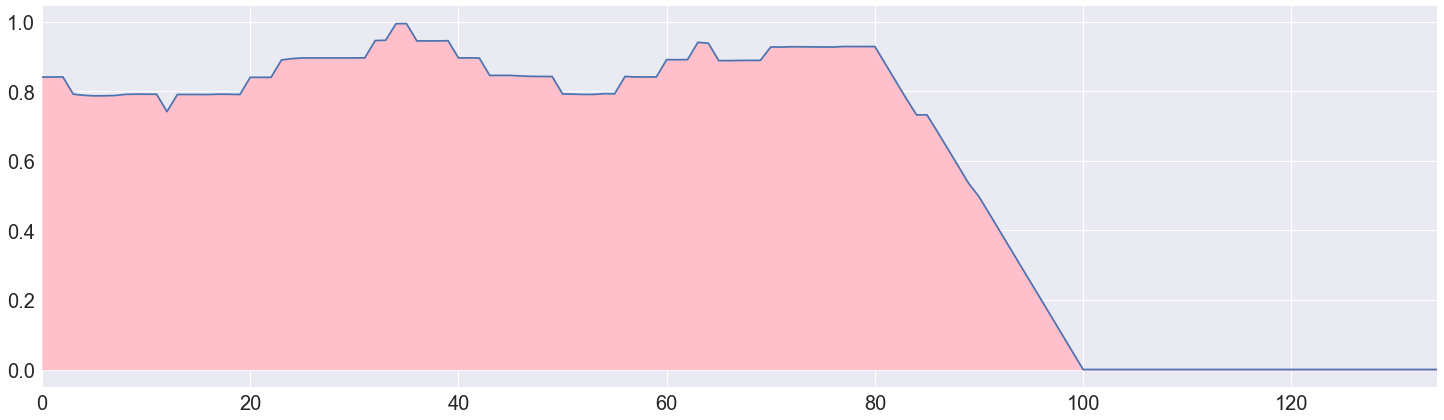

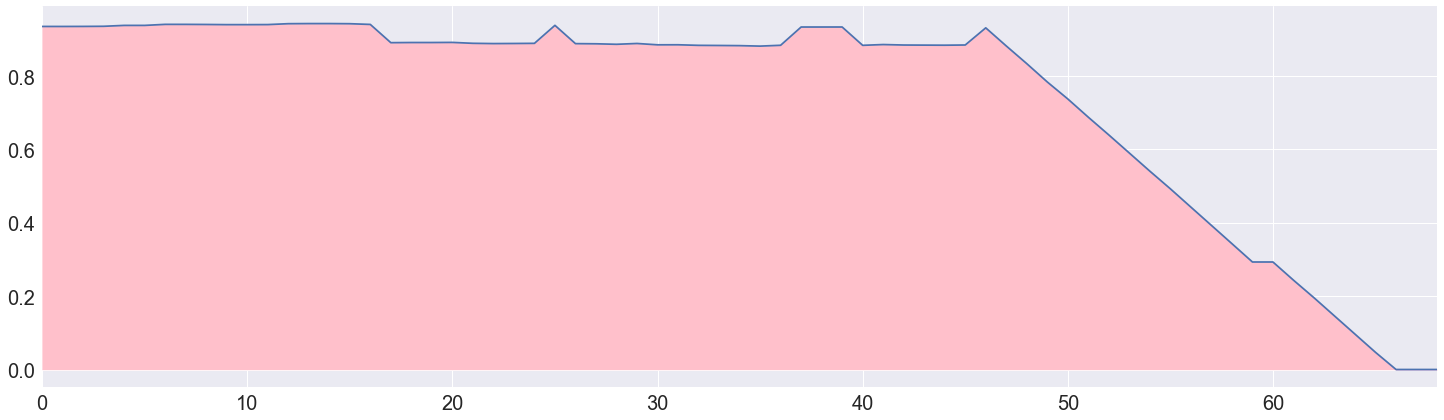

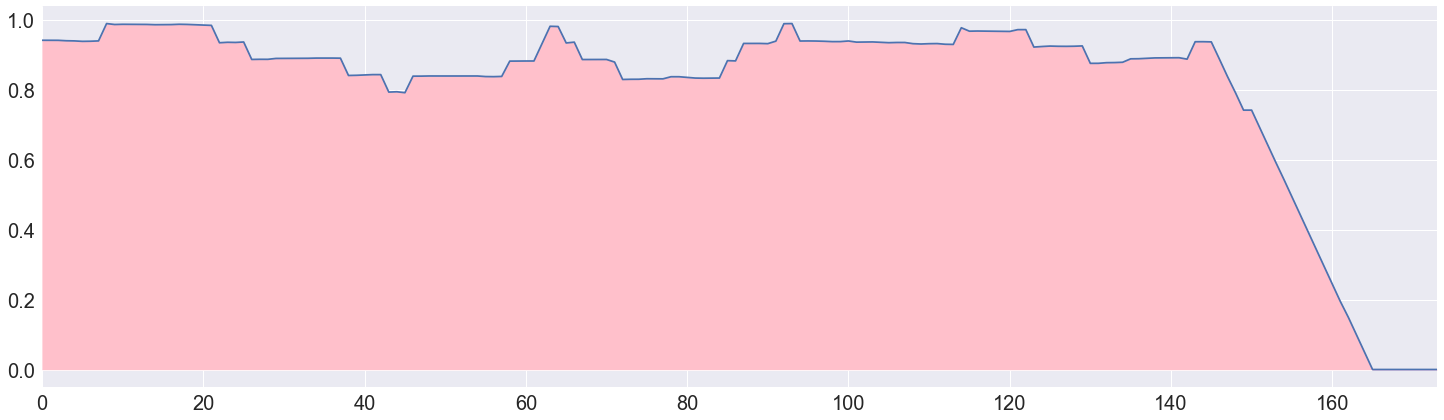

In [138]:
# Action

plt.figure(figsize=(12,10))
word2vec_runavg(action_DanyS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_DanyS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_DanyS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_DanyS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

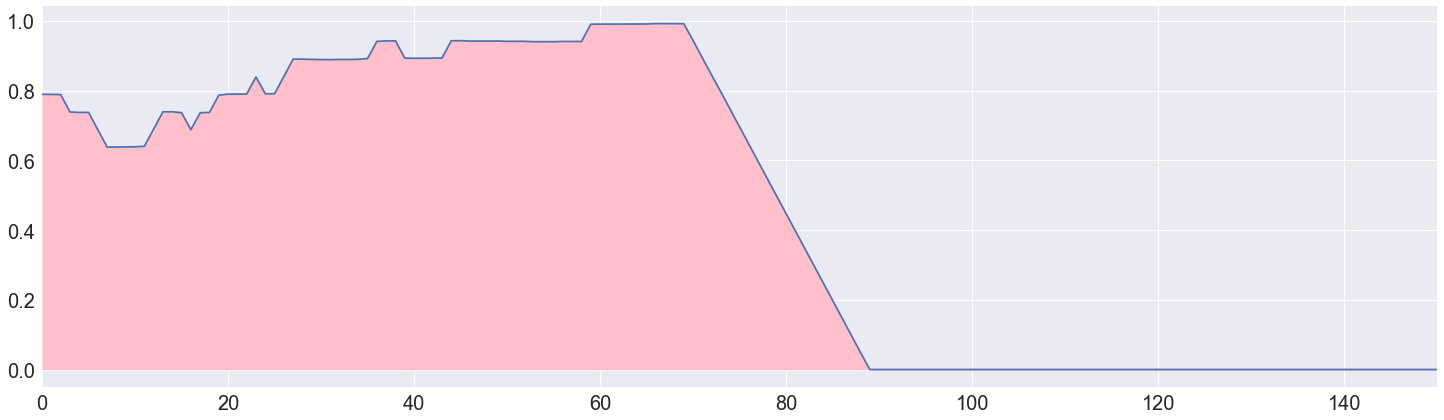

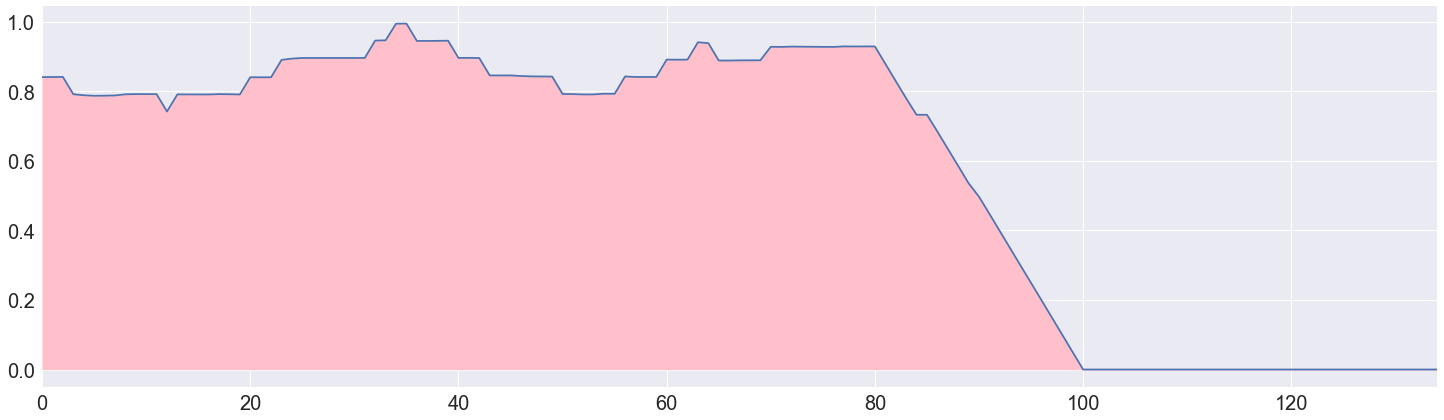

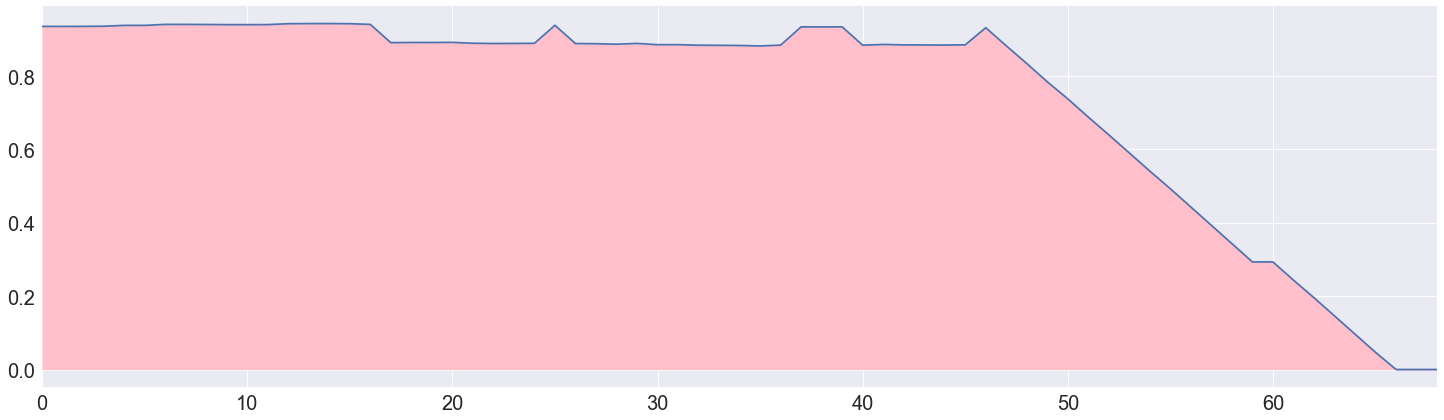

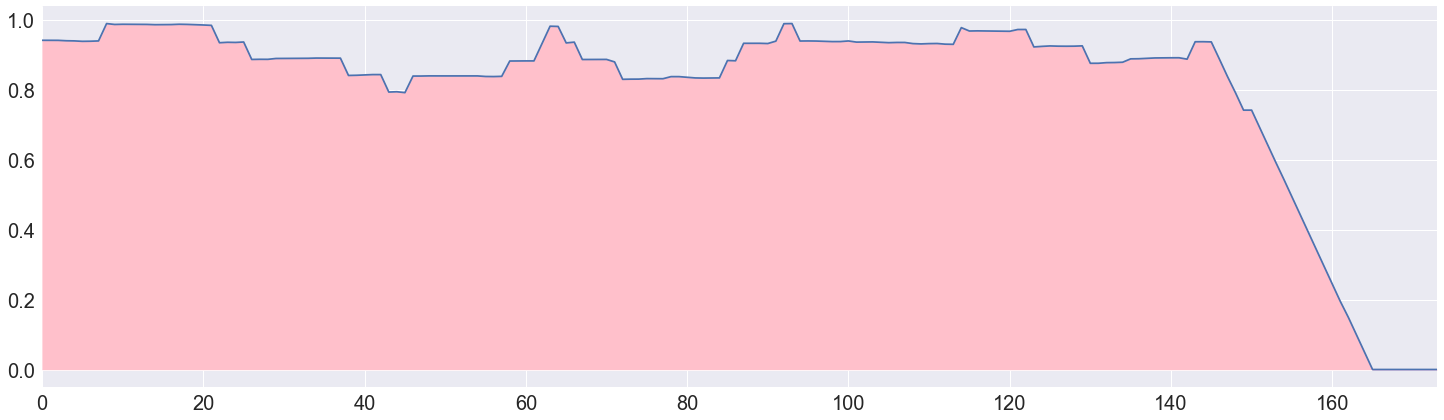

In [139]:
# Power

plt.figure(figsize=(12,10))
word2vec_runavg(power_DanyS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_DanyS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_DanyS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_DanyS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

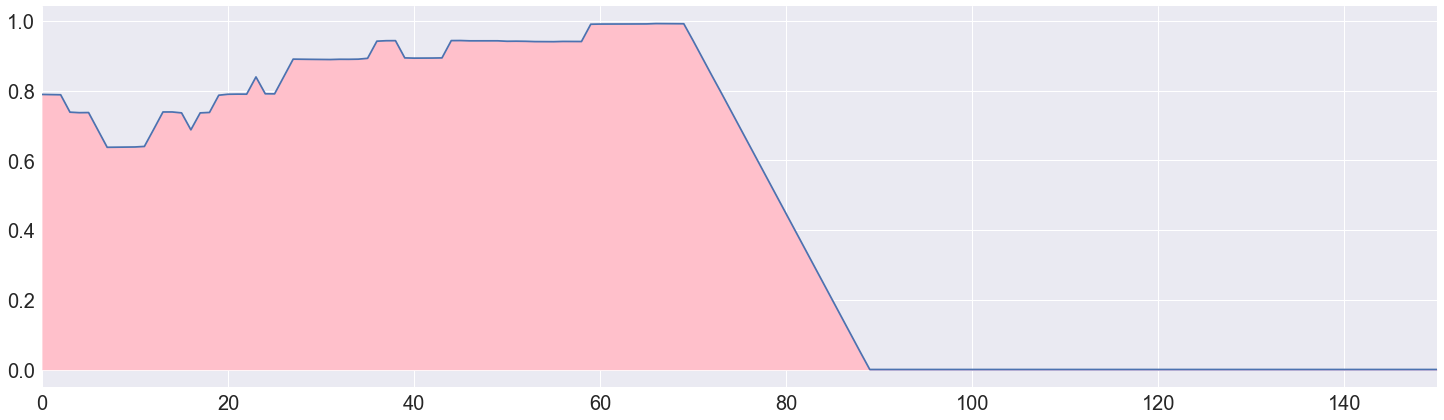

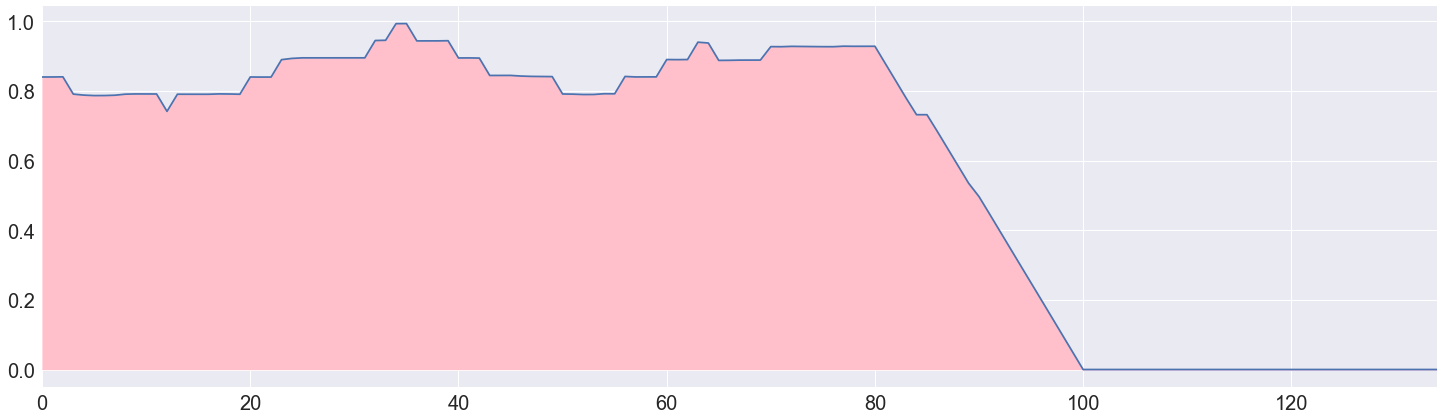

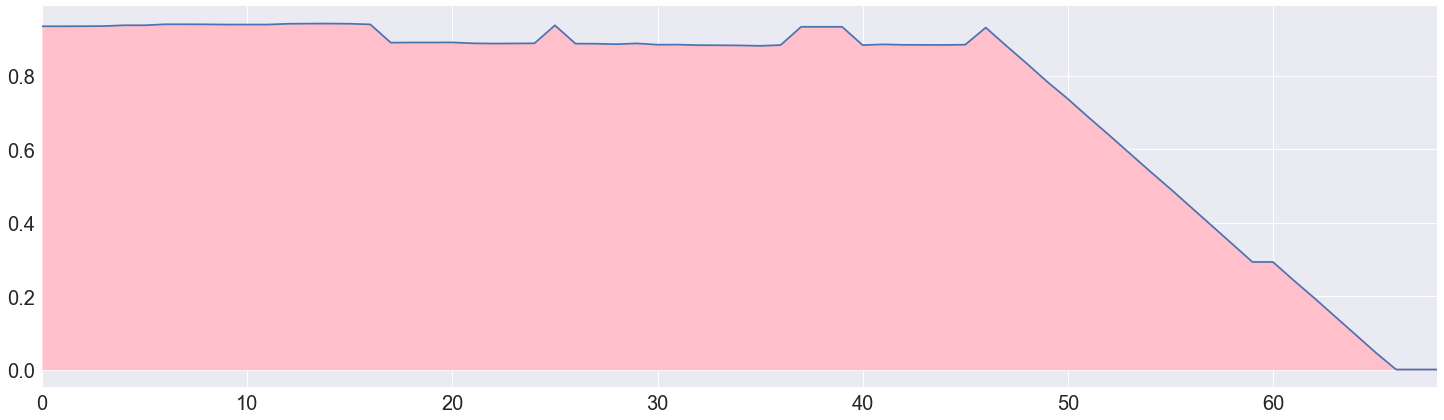

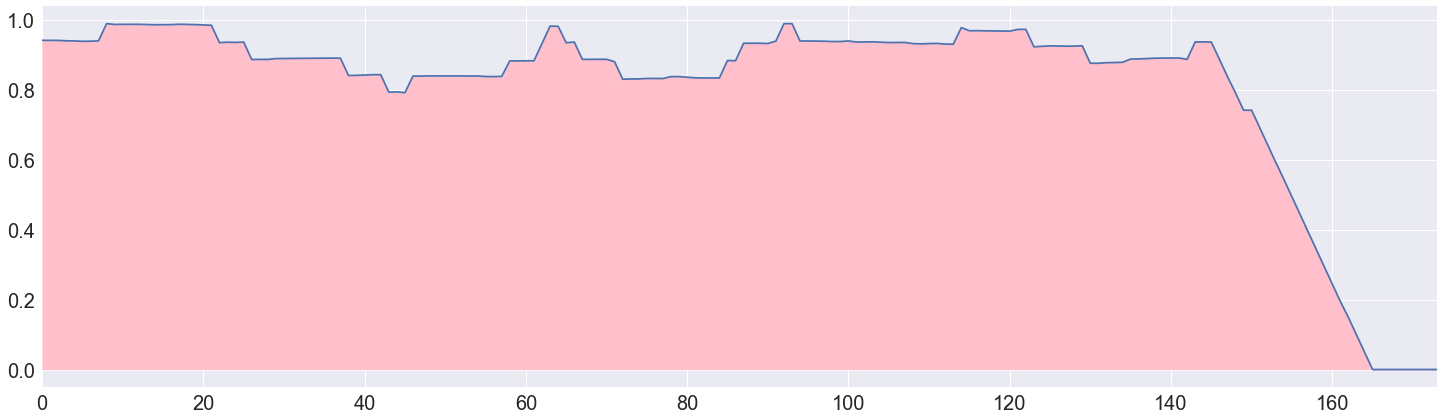

In [140]:
# Force

plt.figure(figsize=(12,10))
word2vec_runavg(force_DanyS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_DanyS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_DanyS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_DanyS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

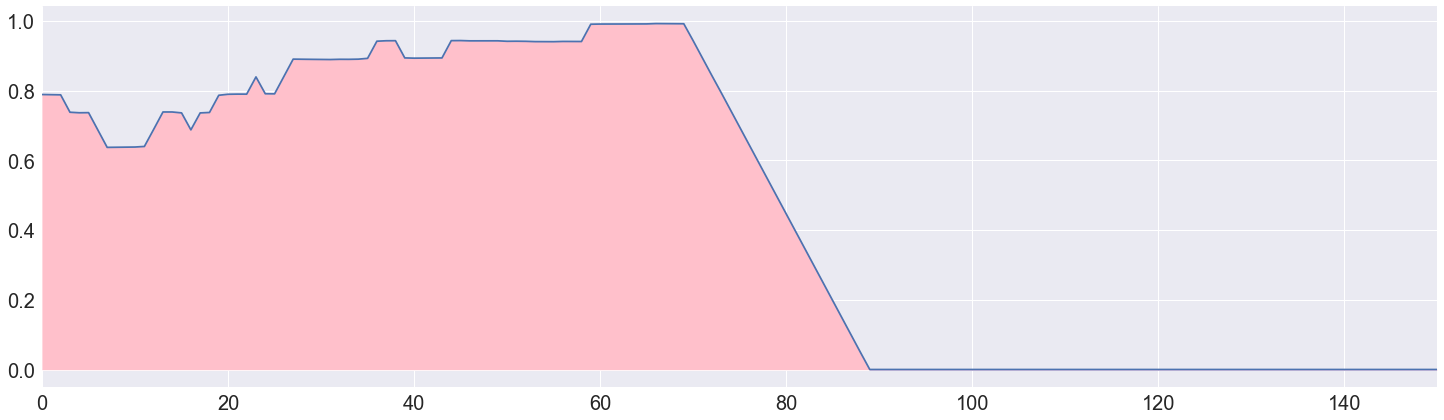

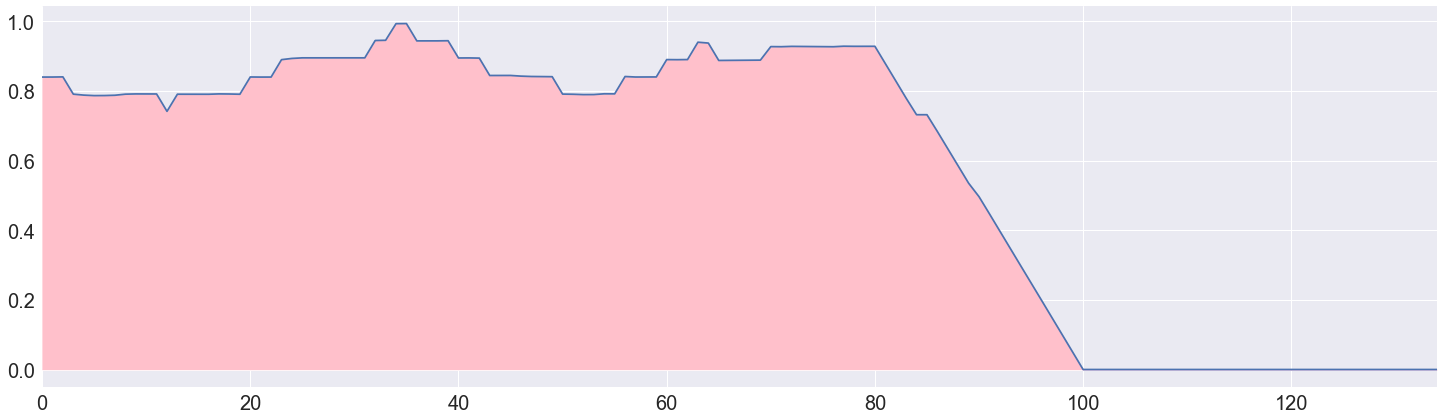

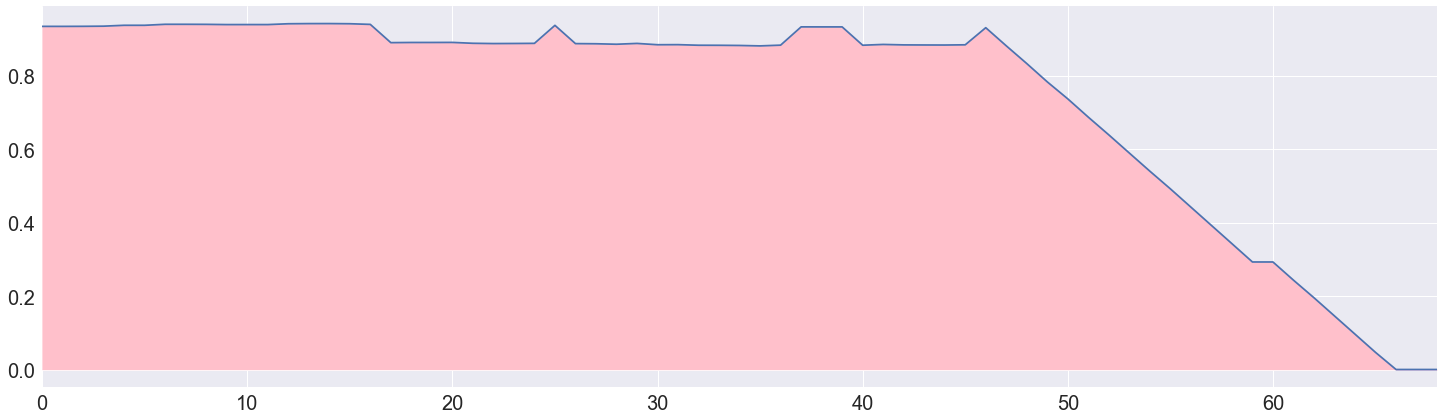

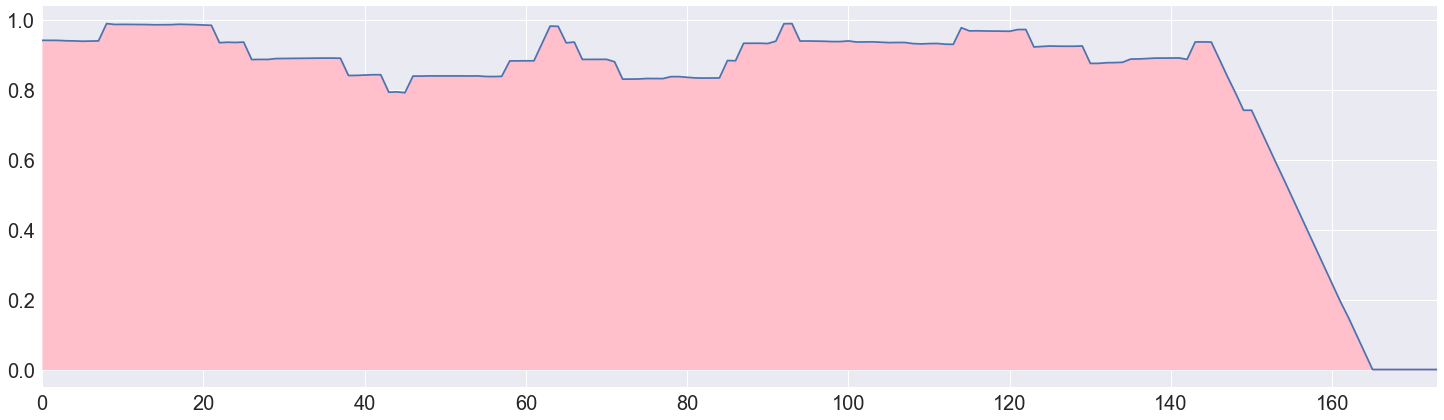

In [141]:
# Command

plt.figure(figsize=(12,10))
word2vec_runavg(command_DanyS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_DanyS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_DanyS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_DanyS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#### Sansa

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

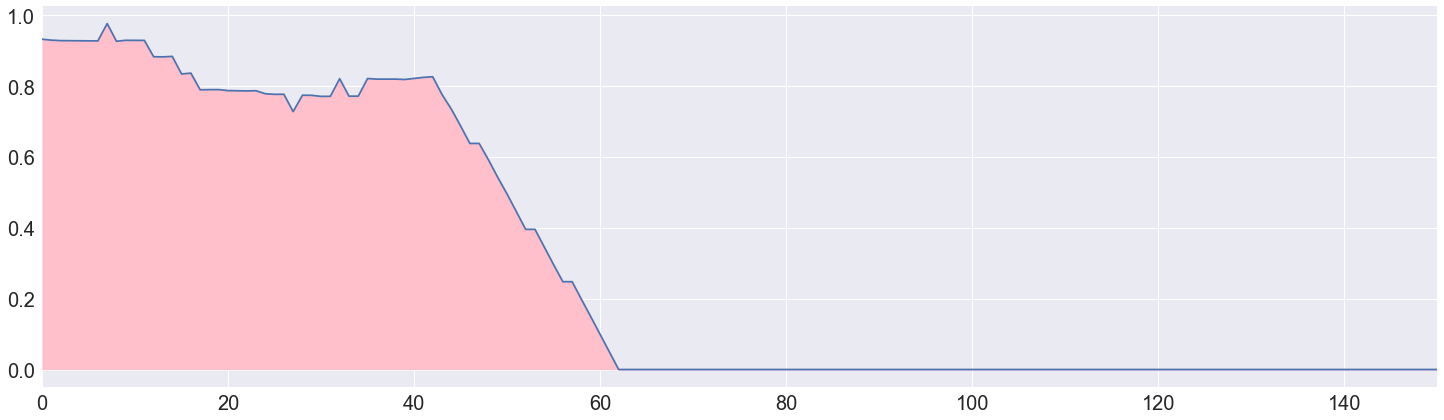

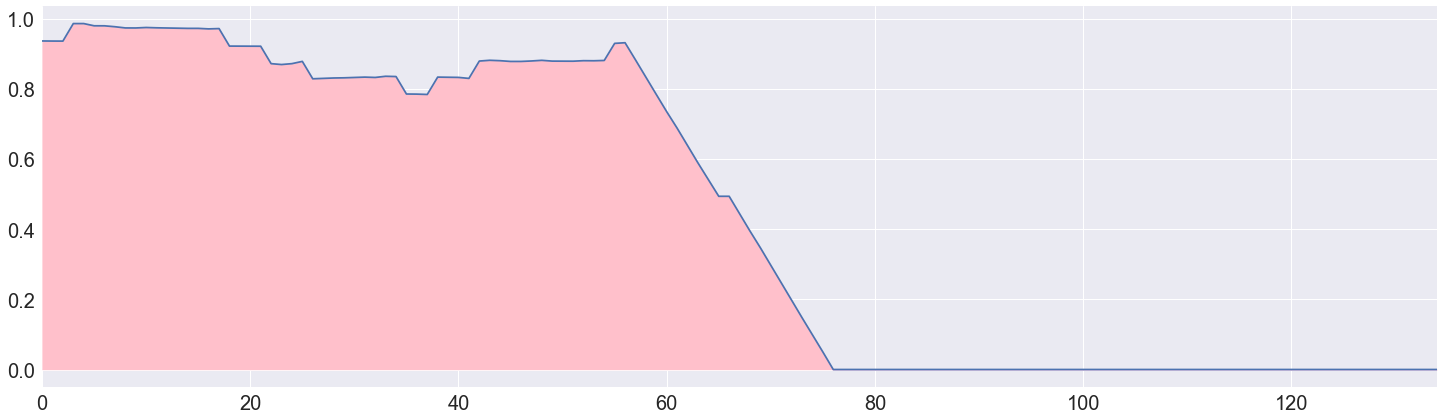

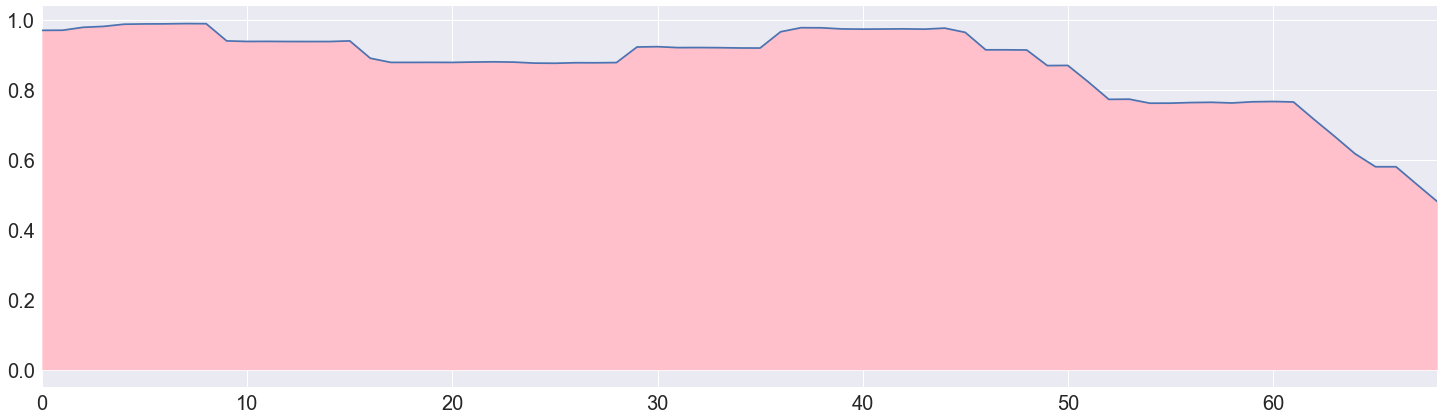

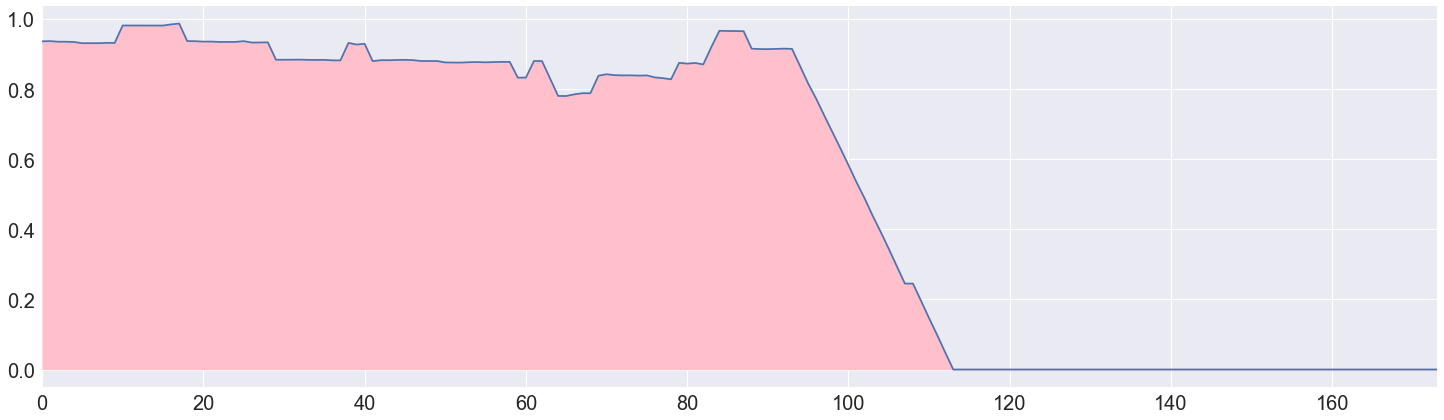

In [142]:
# Strength

plt.figure(figsize=(12,10))
word2vec_runavg(strength_SansaS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_SansaS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_SansaS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_SansaS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

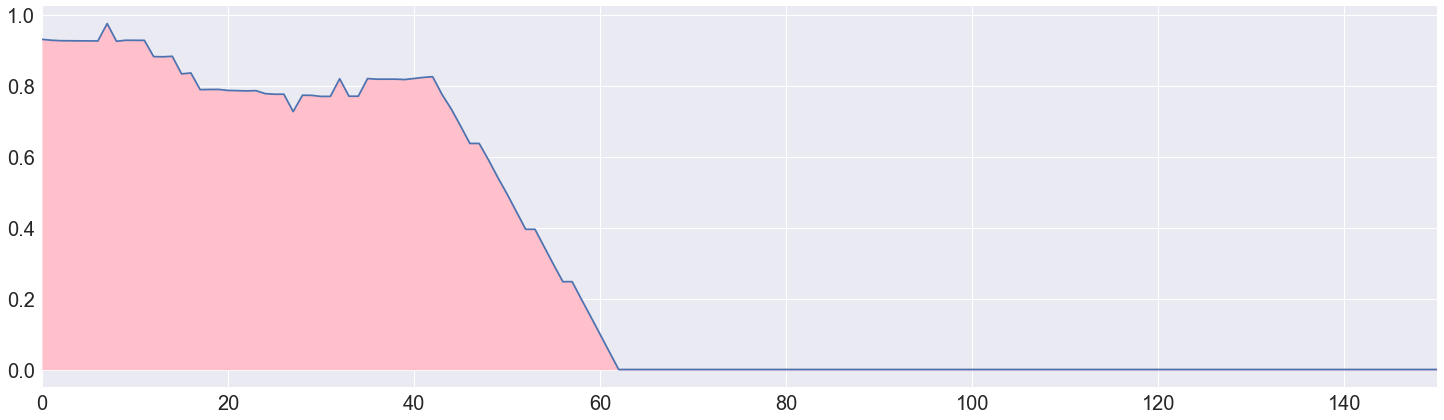

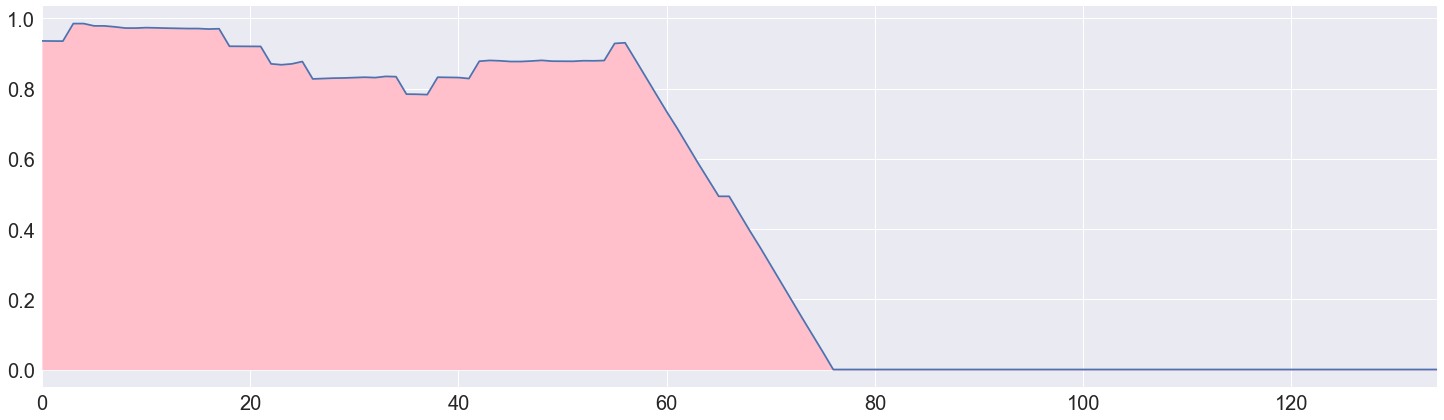

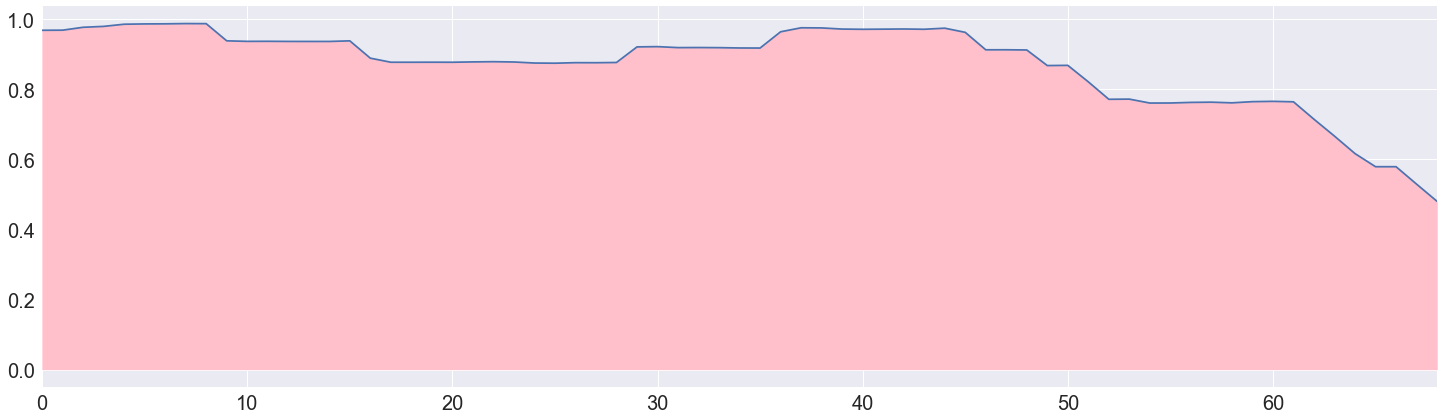

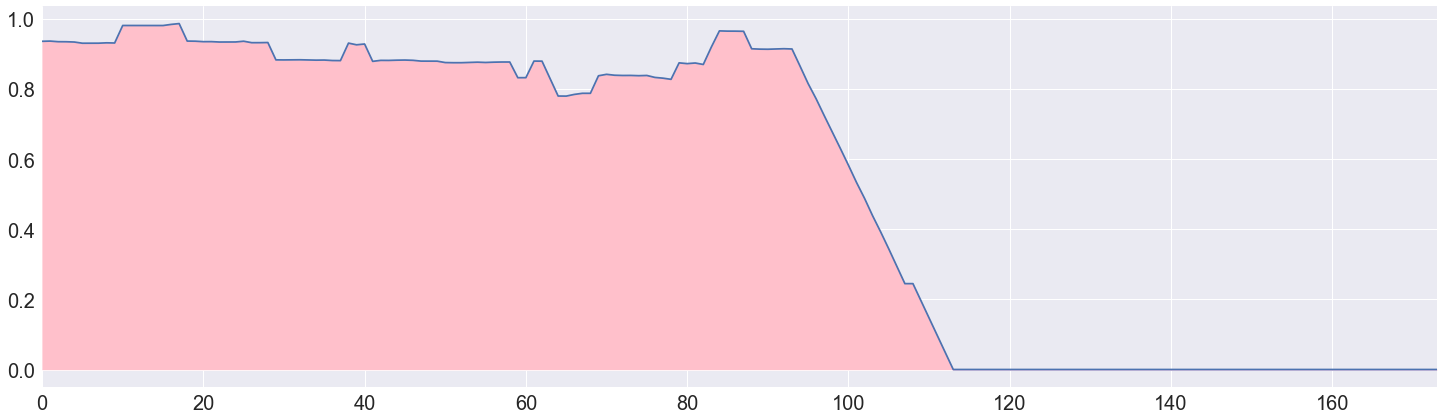

In [143]:
# Lead

plt.figure(figsize=(12,10))
word2vec_runavg(lead_SansaS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_SansaS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_SansaS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_SansaS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

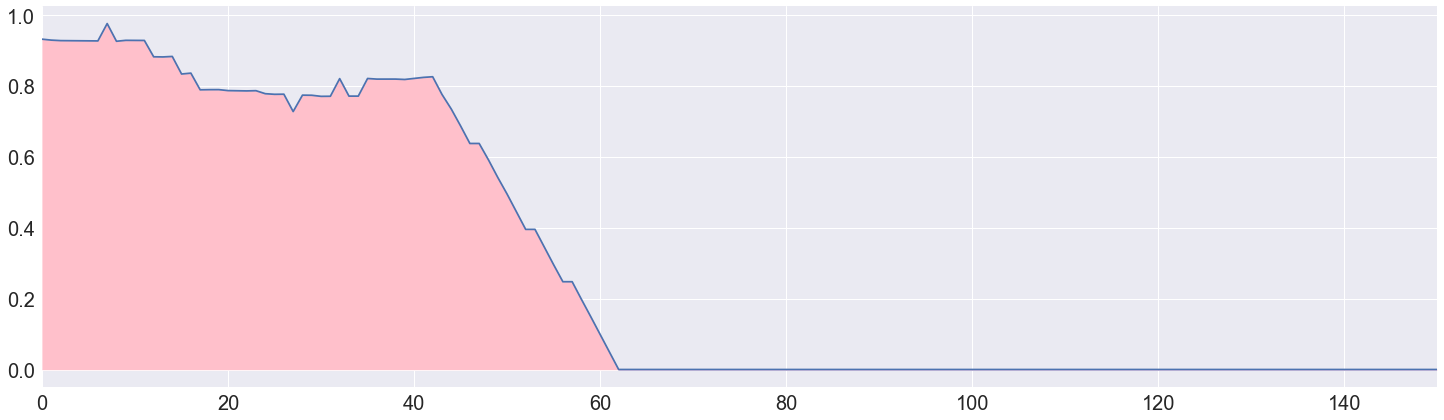

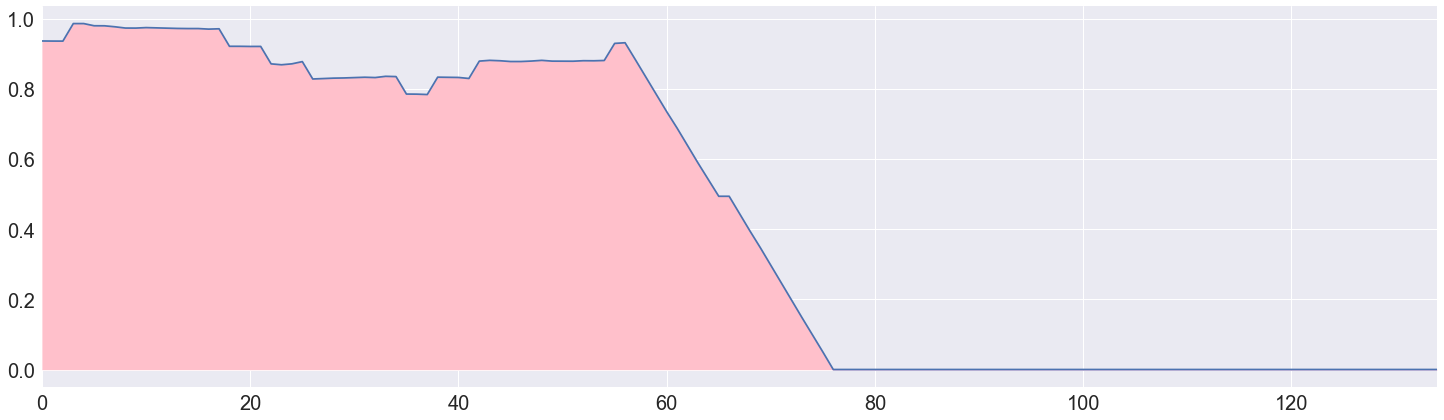

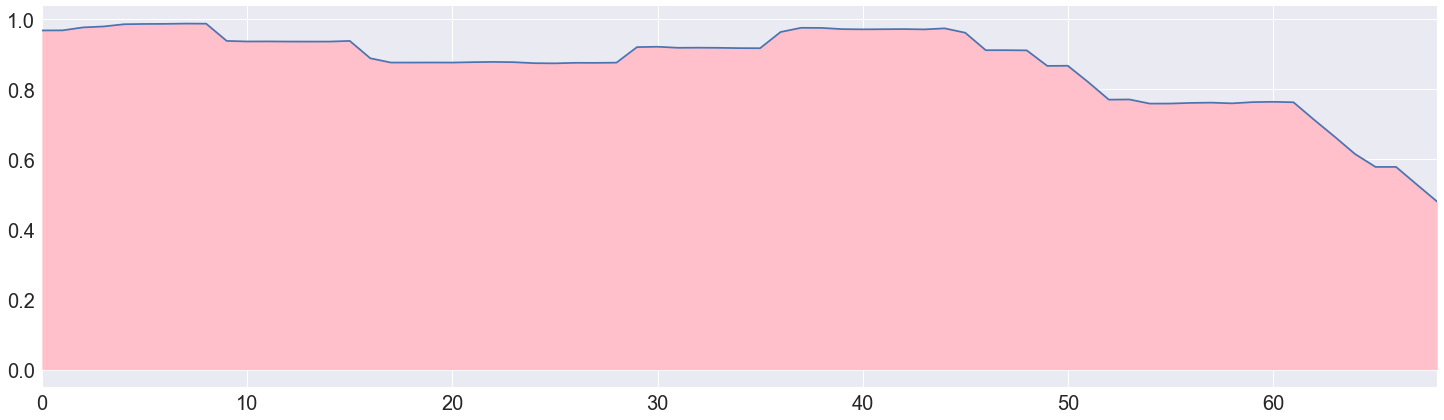

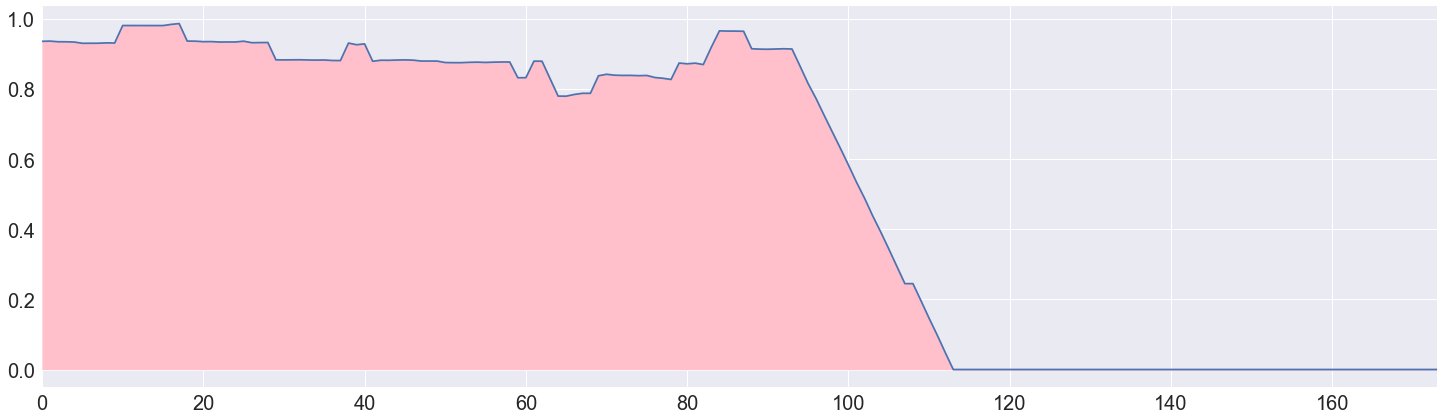

In [144]:
# Action

plt.figure(figsize=(12,10))
word2vec_runavg(action_SansaS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_SansaS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_SansaS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_SansaS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

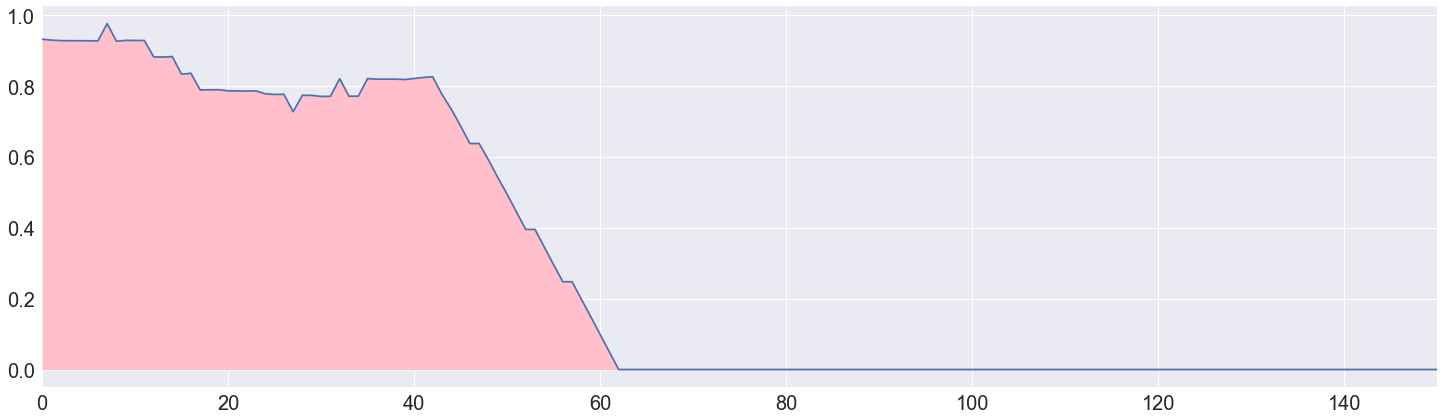

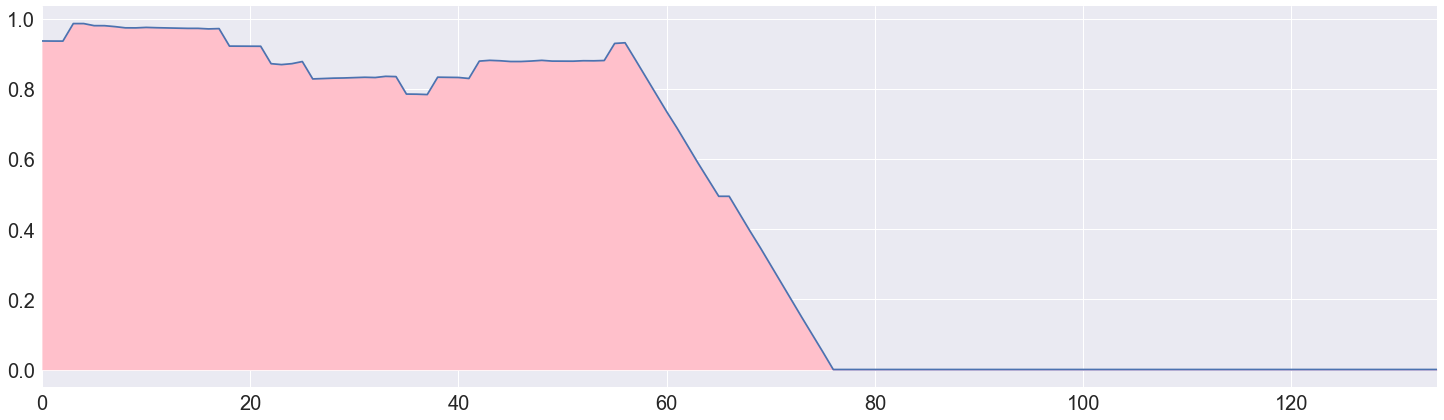

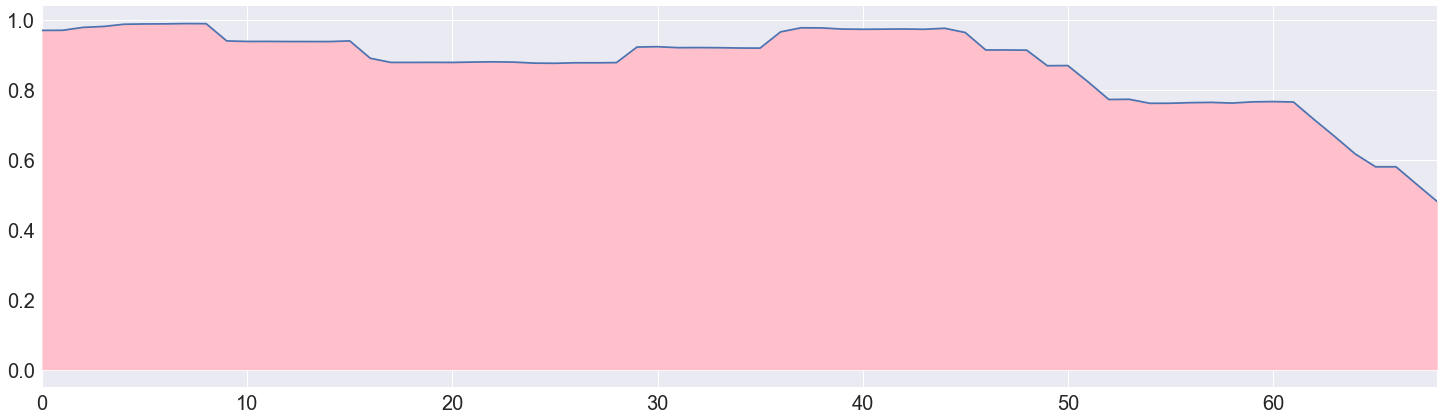

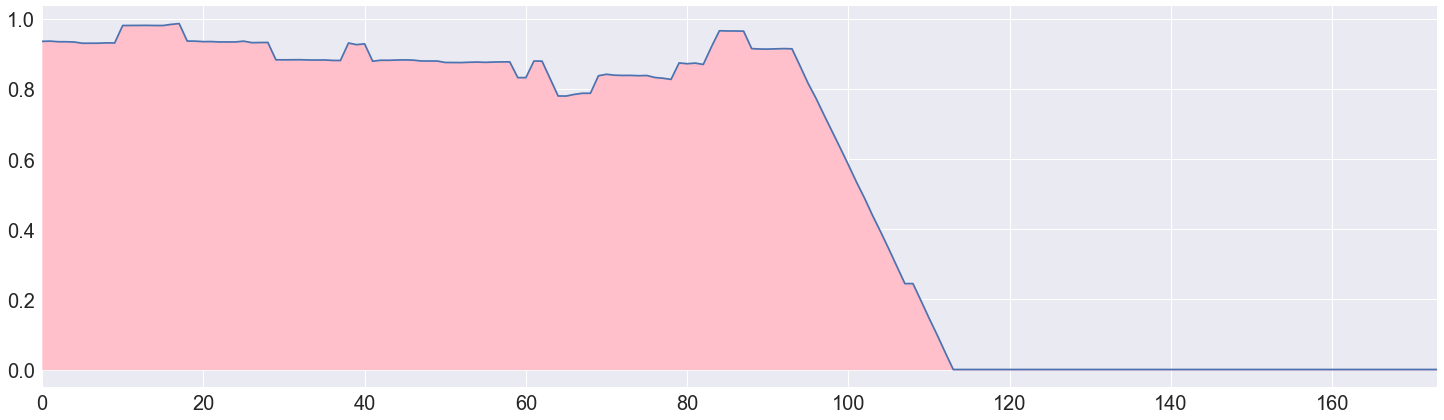

In [145]:
# Power

plt.figure(figsize=(12,10))
word2vec_runavg(power_SansaS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_SansaS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_SansaS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_SansaS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

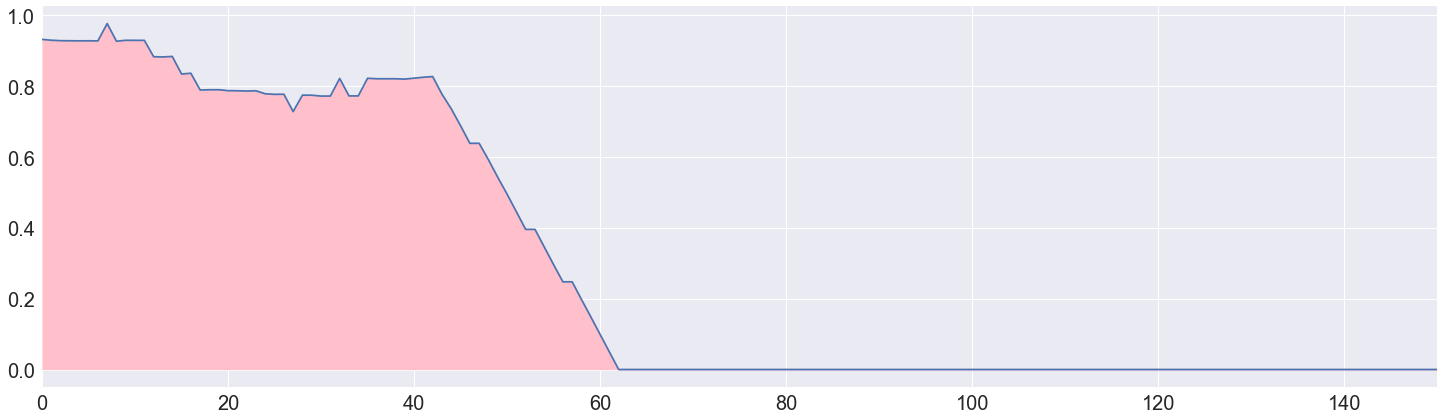

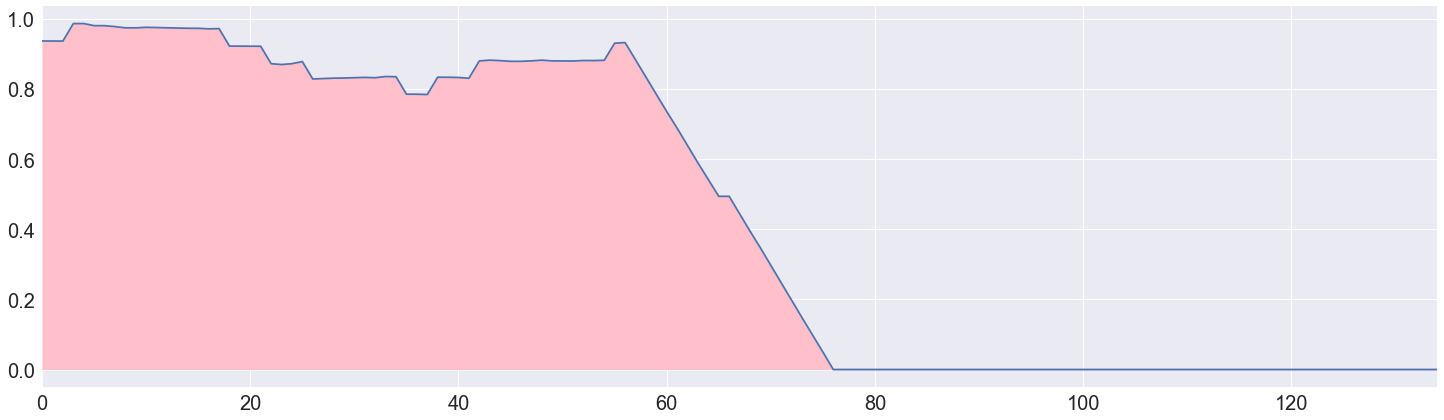

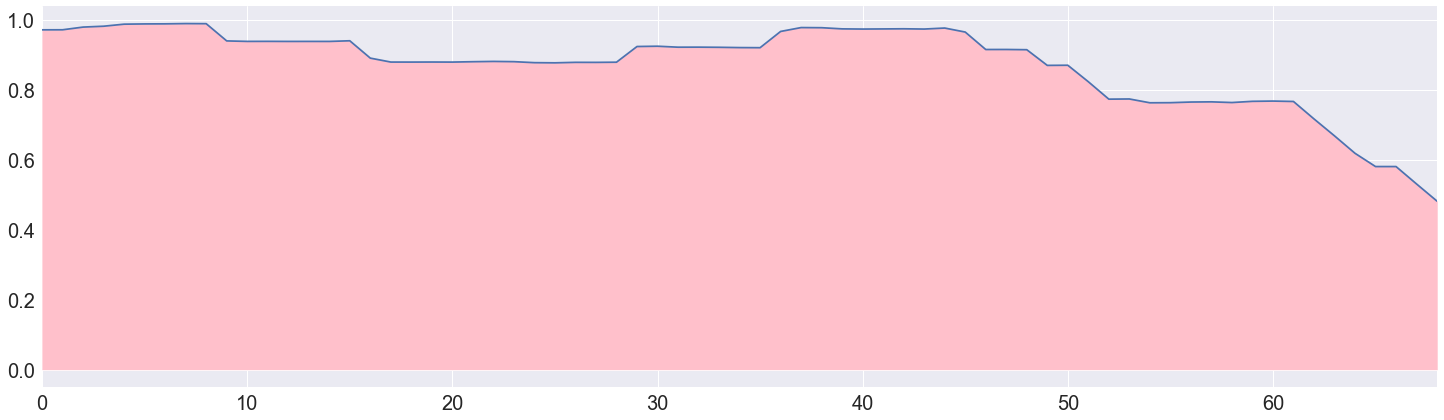

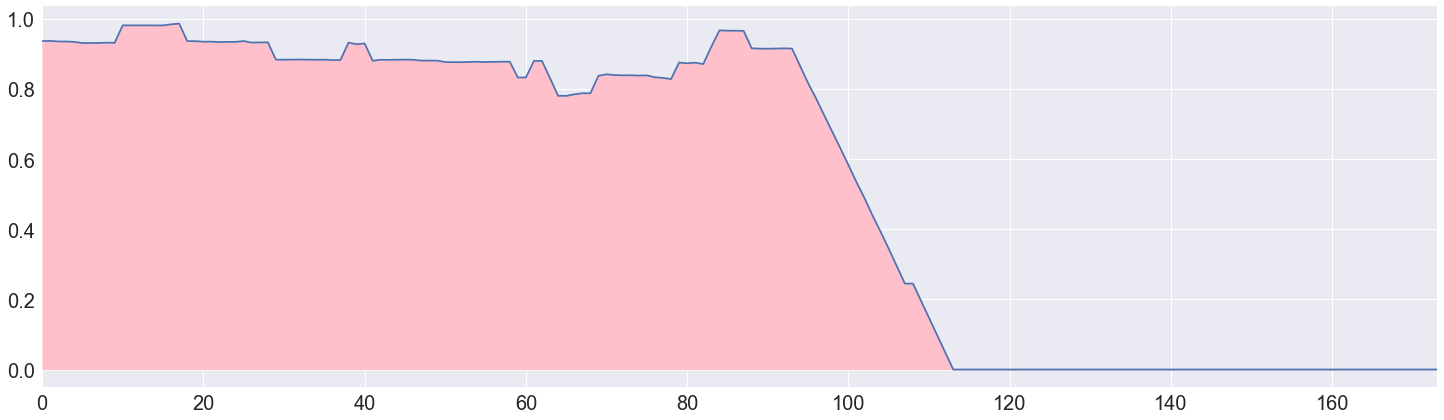

In [146]:
# Force

plt.figure(figsize=(12,10))
word2vec_runavg(force_SansaS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_SansaS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_SansaS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_SansaS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

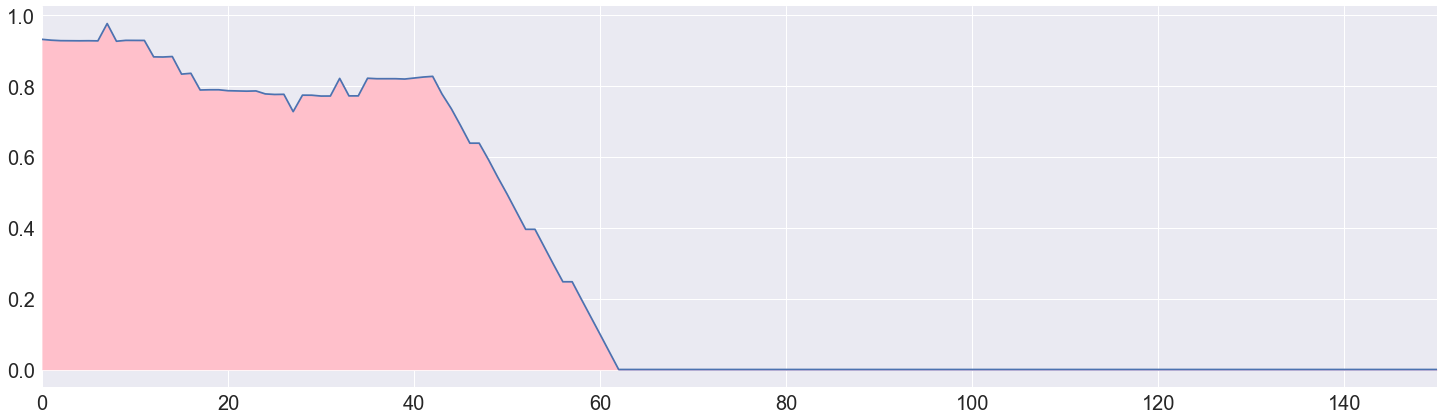

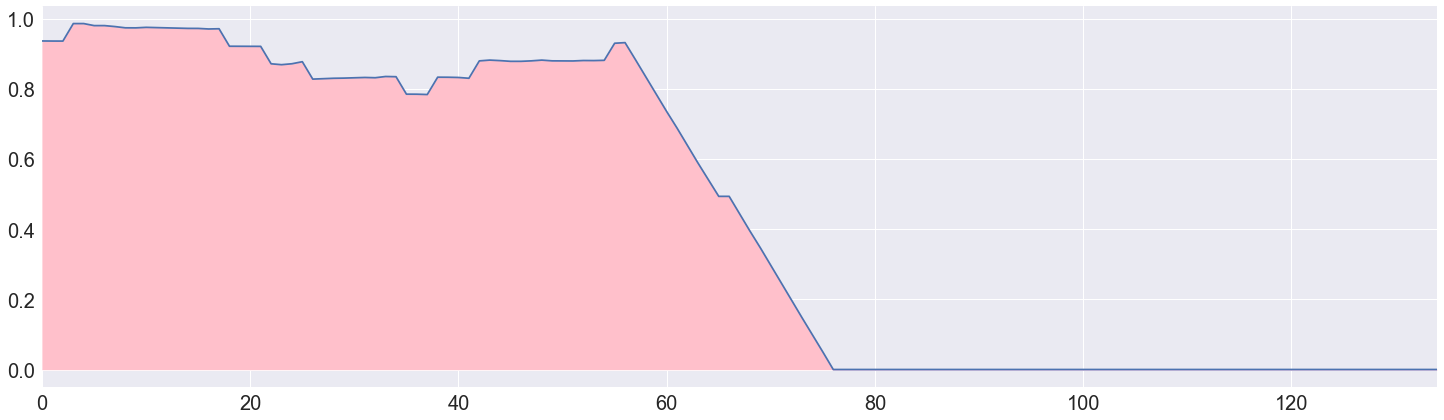

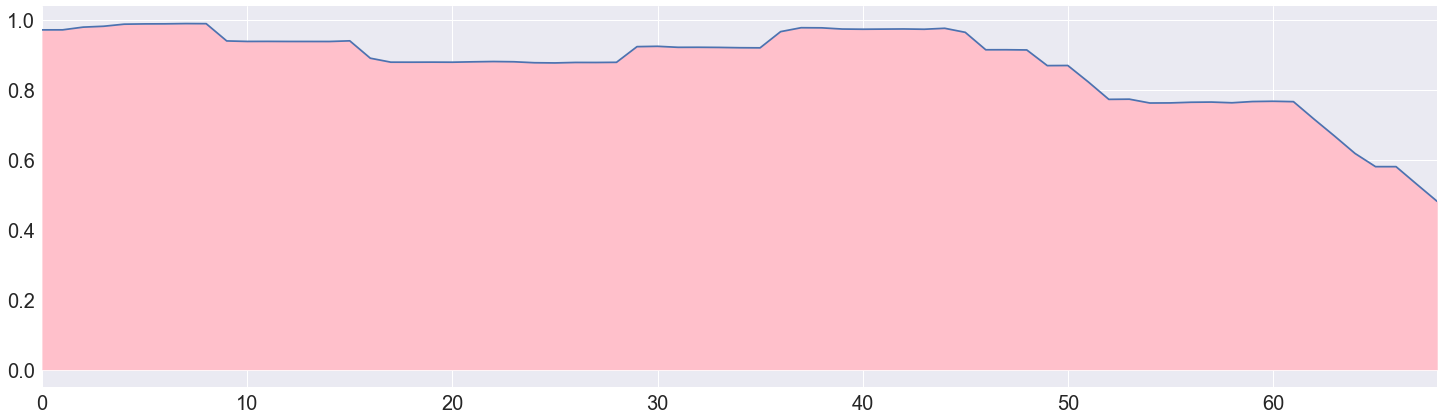

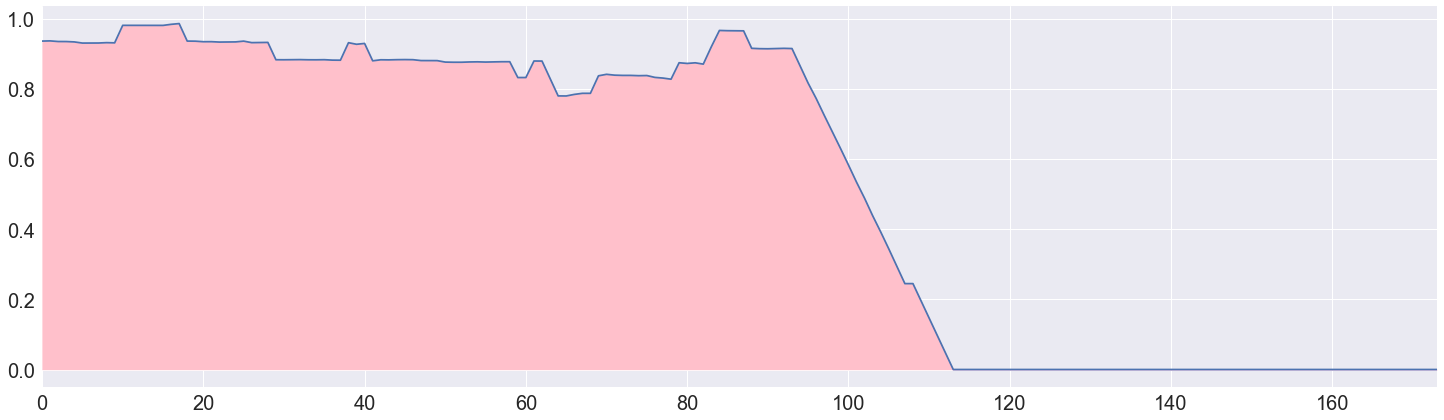

In [147]:
# Command

plt.figure(figsize=(12,10))
word2vec_runavg(command_SansaS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_SansaS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_SansaS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_SansaS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#### Jaime

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

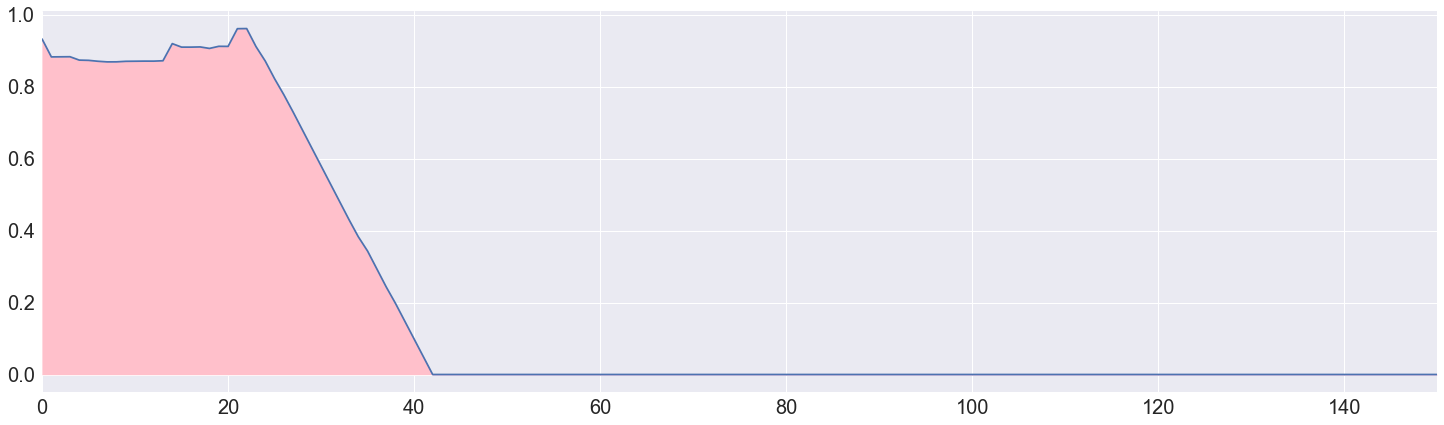

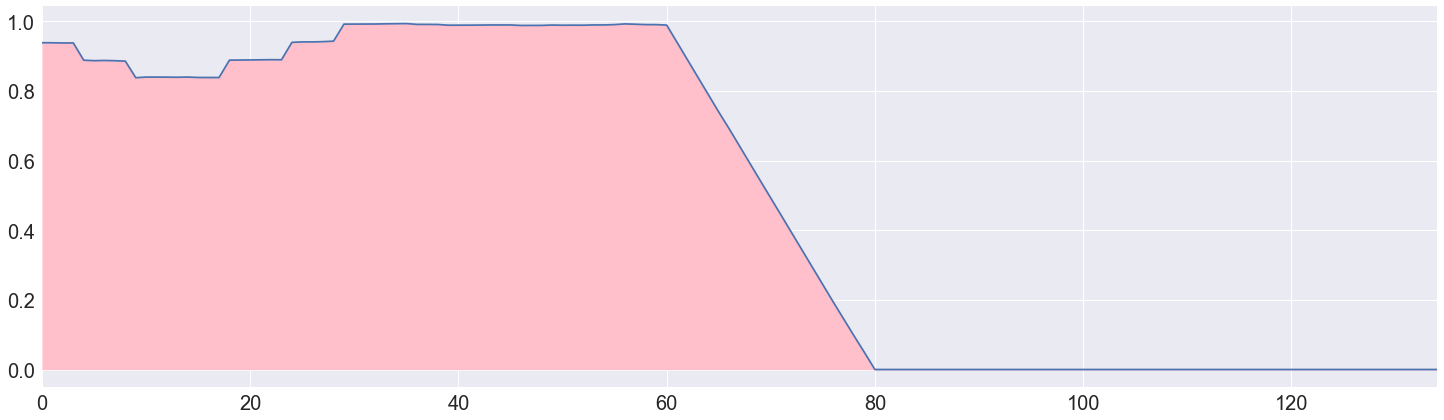

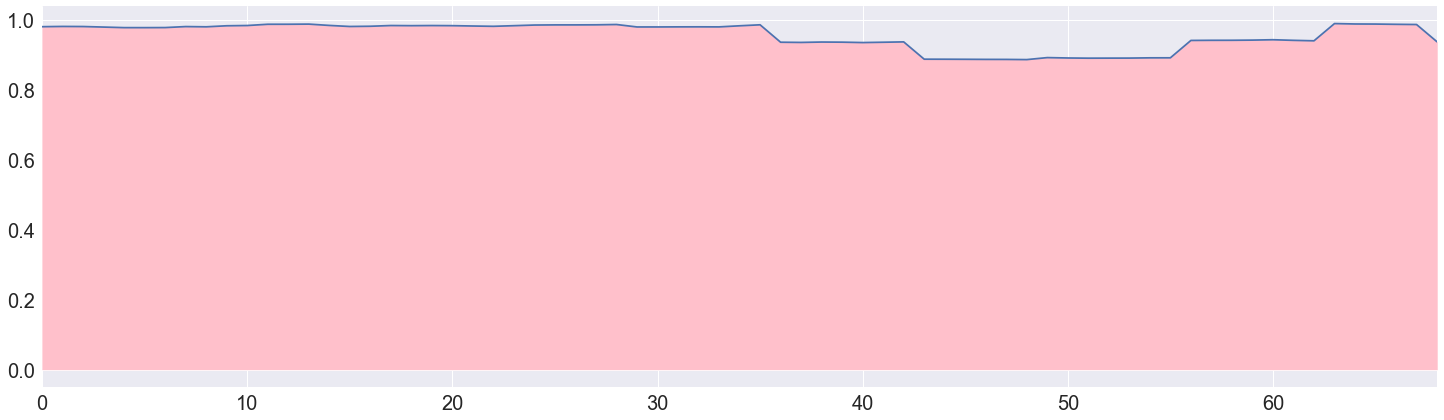

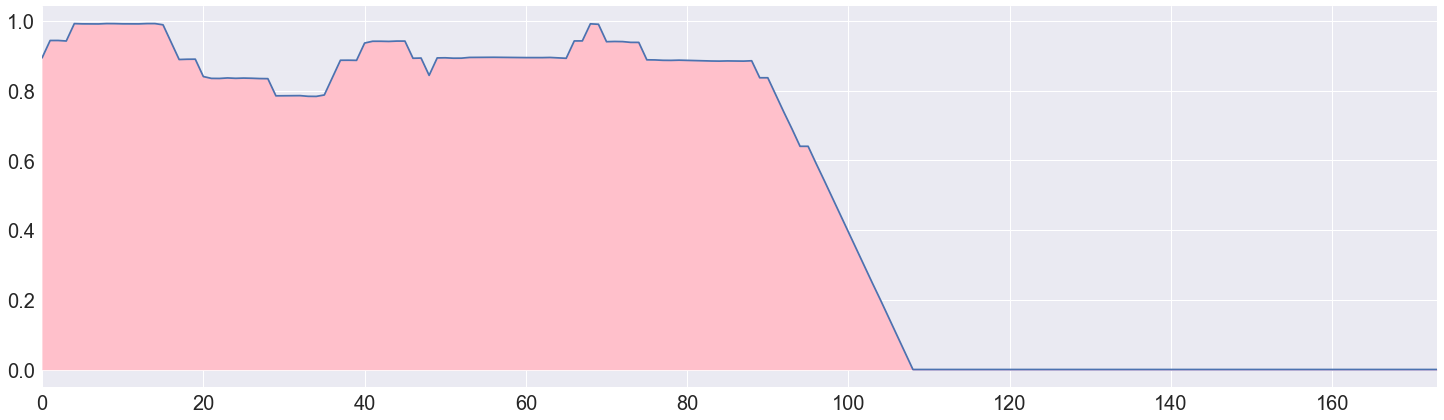

In [148]:
# Strength

plt.figure(figsize=(12,10))
word2vec_runavg(strength_JaimeS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_JaimeS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_JaimeS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_JaimeS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

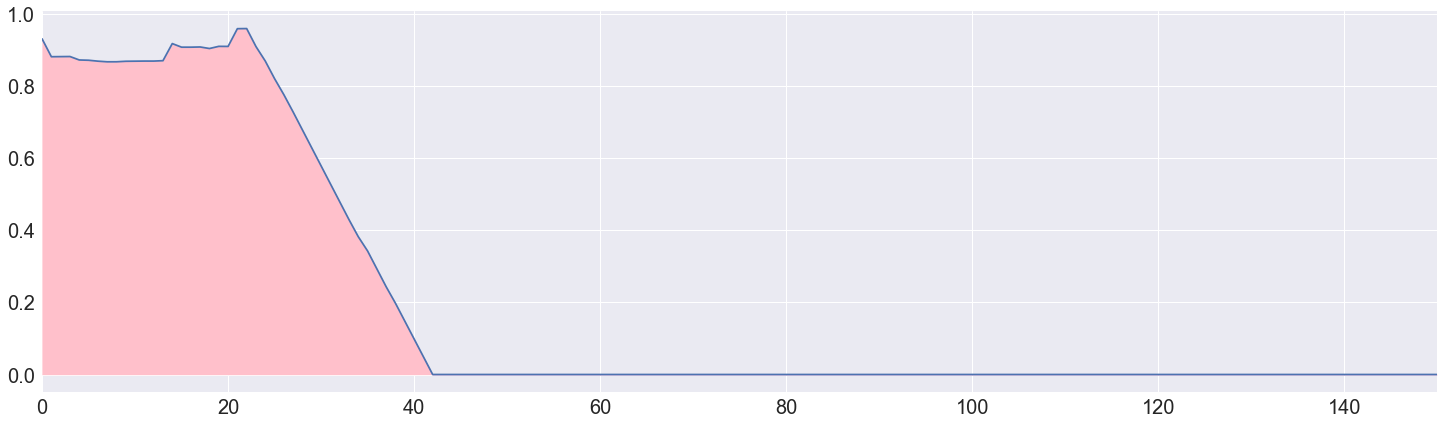

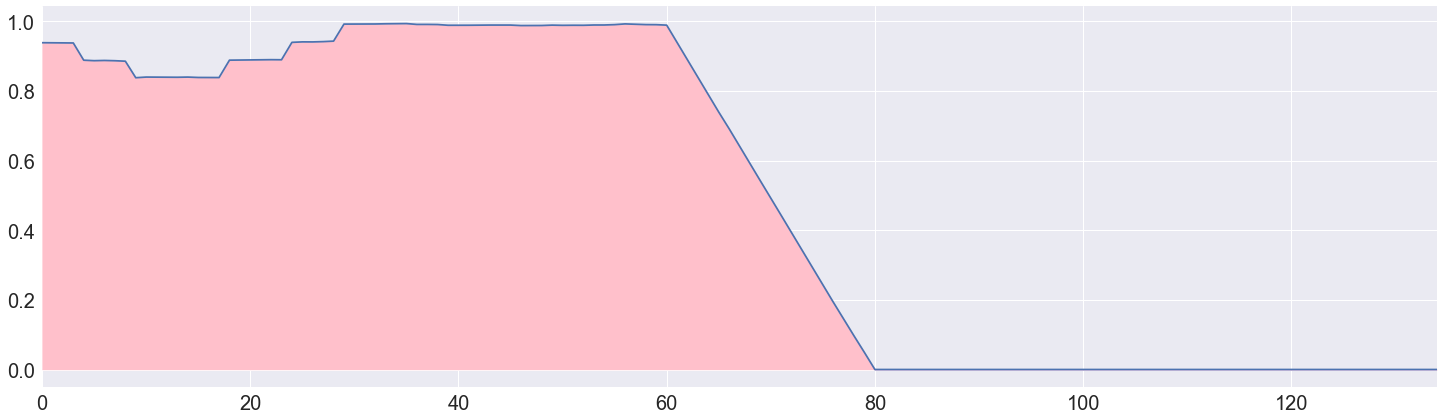

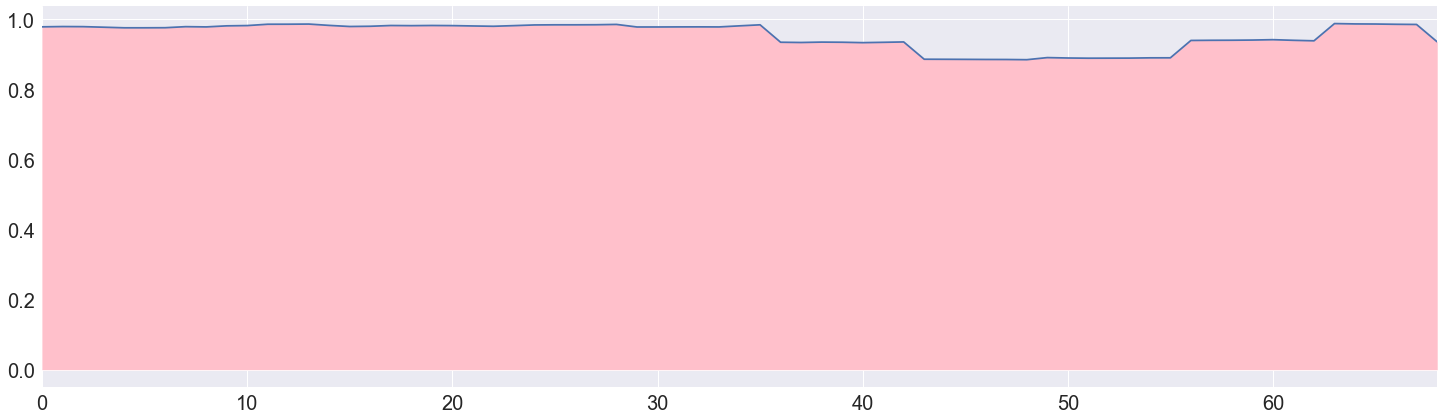

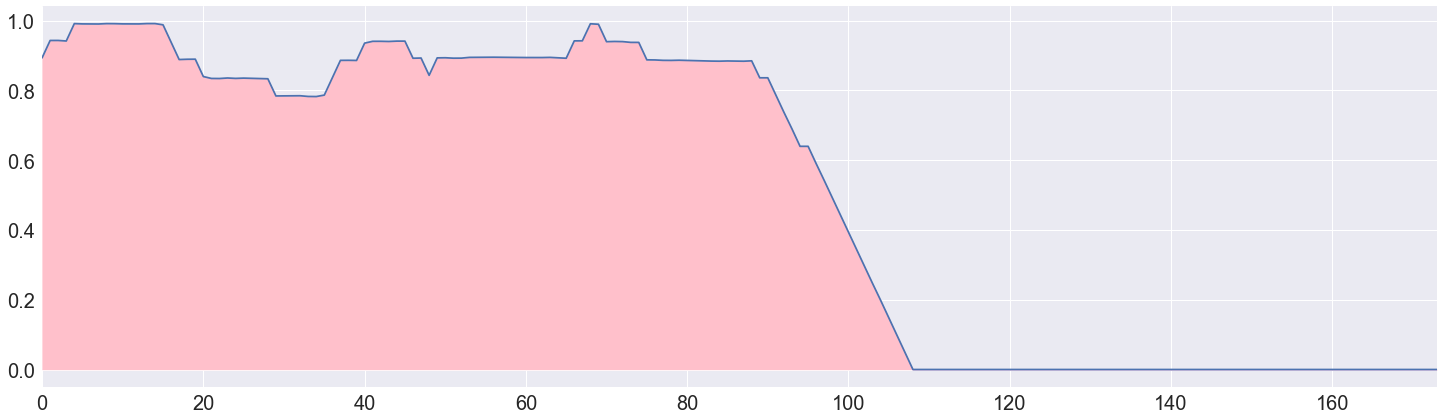

In [149]:
# Lead

plt.figure(figsize=(12,10))
word2vec_runavg(lead_JaimeS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_JaimeS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_JaimeS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_JaimeS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

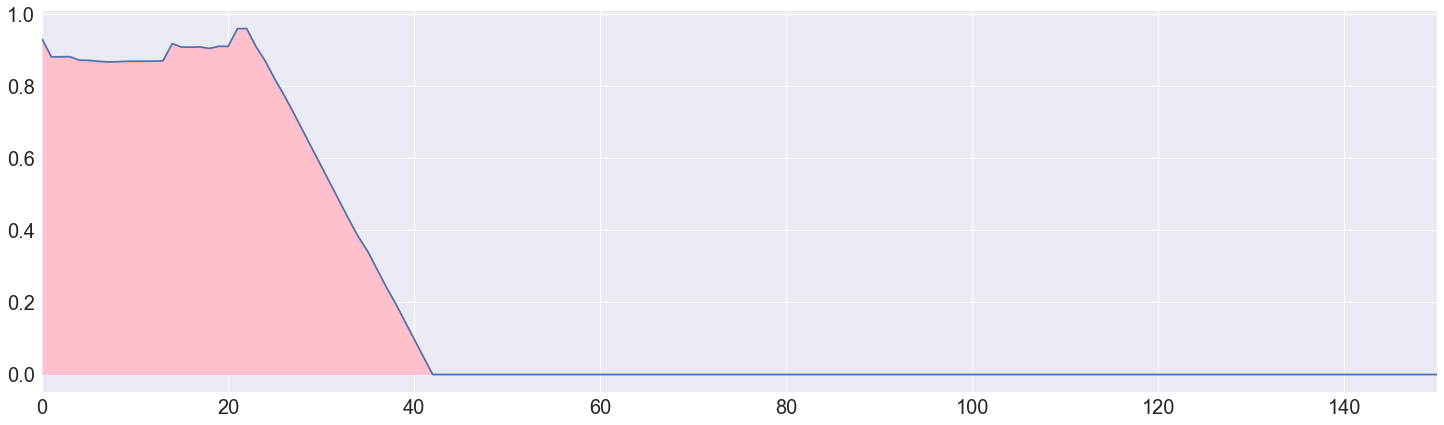

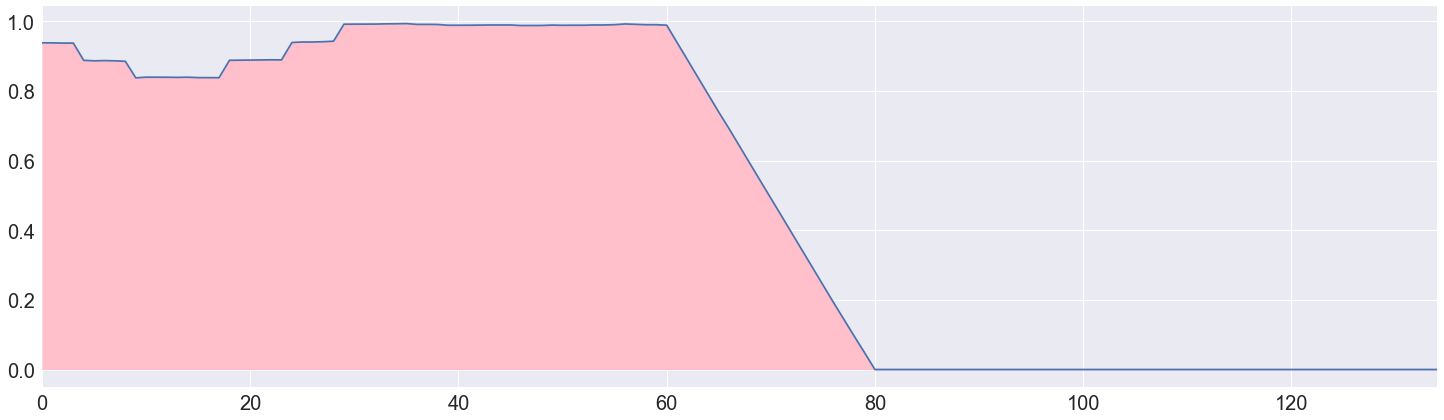

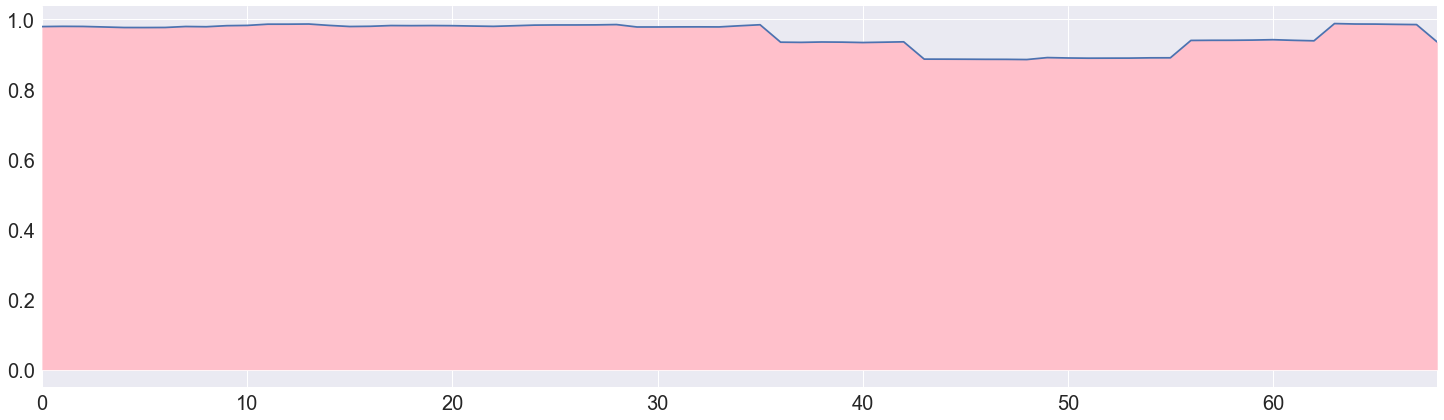

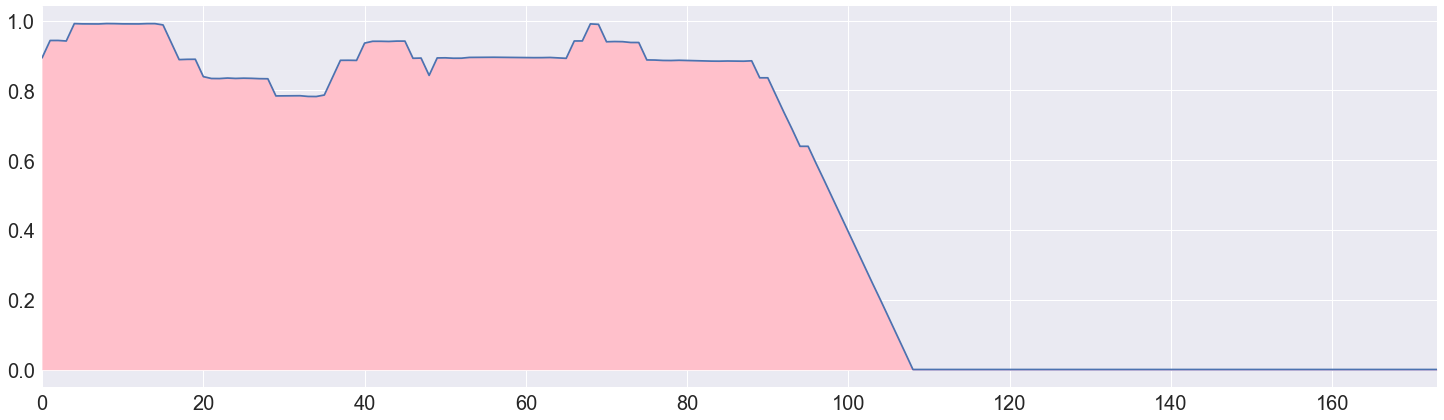

In [150]:
# Action

plt.figure(figsize=(12,10))
word2vec_runavg(action_JaimeS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_JaimeS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_JaimeS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_JaimeS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

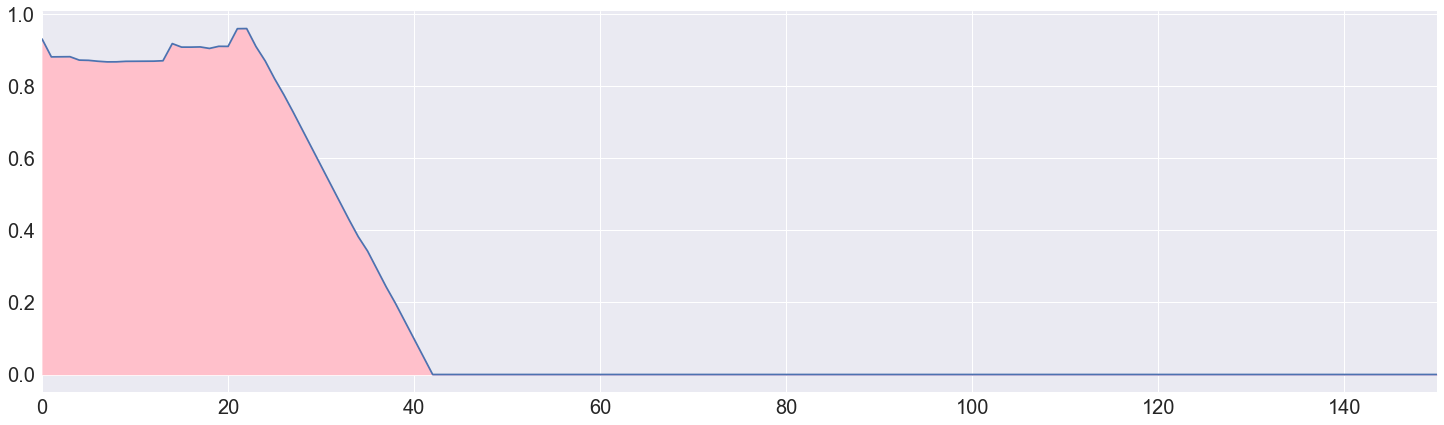

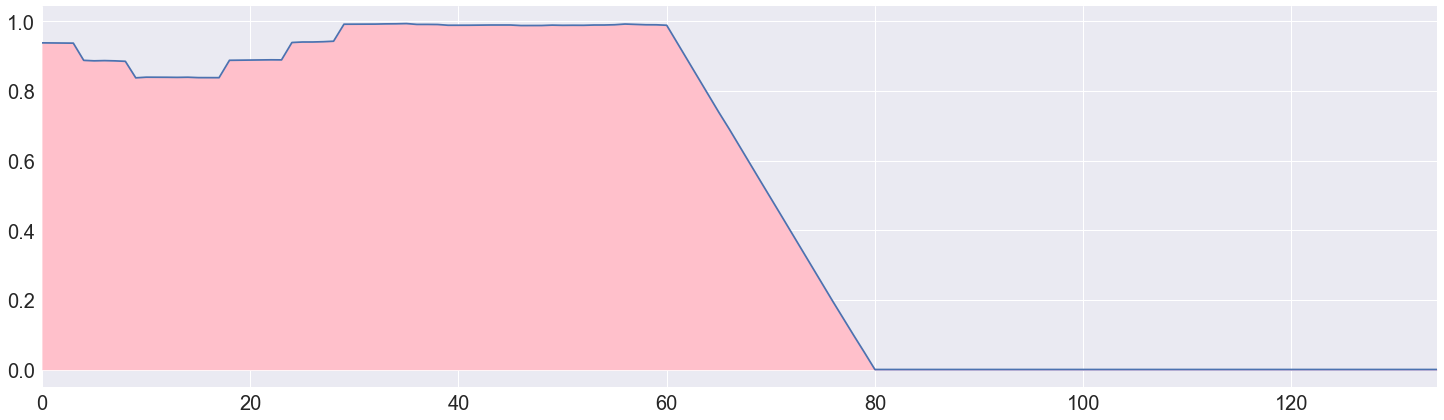

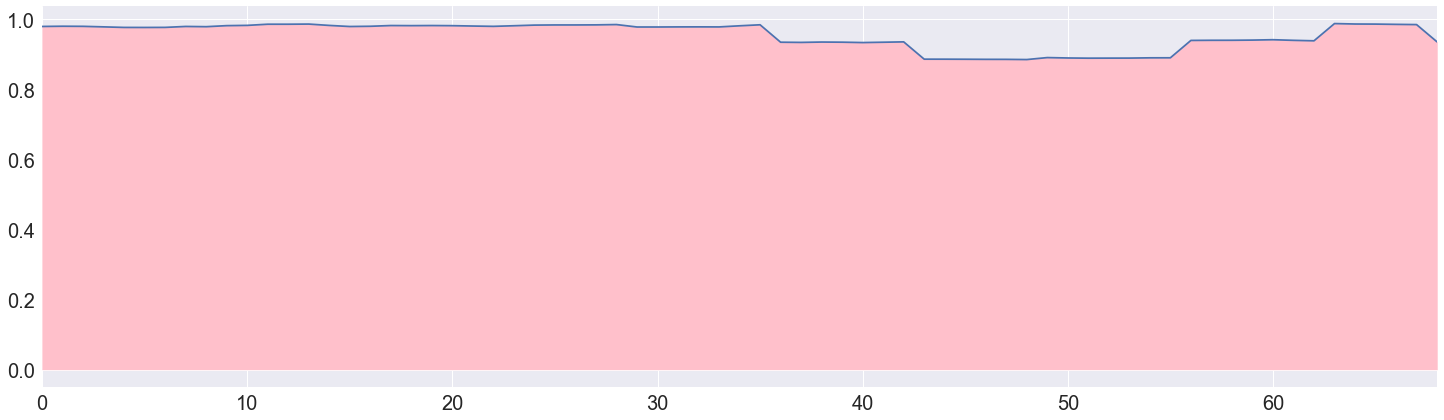

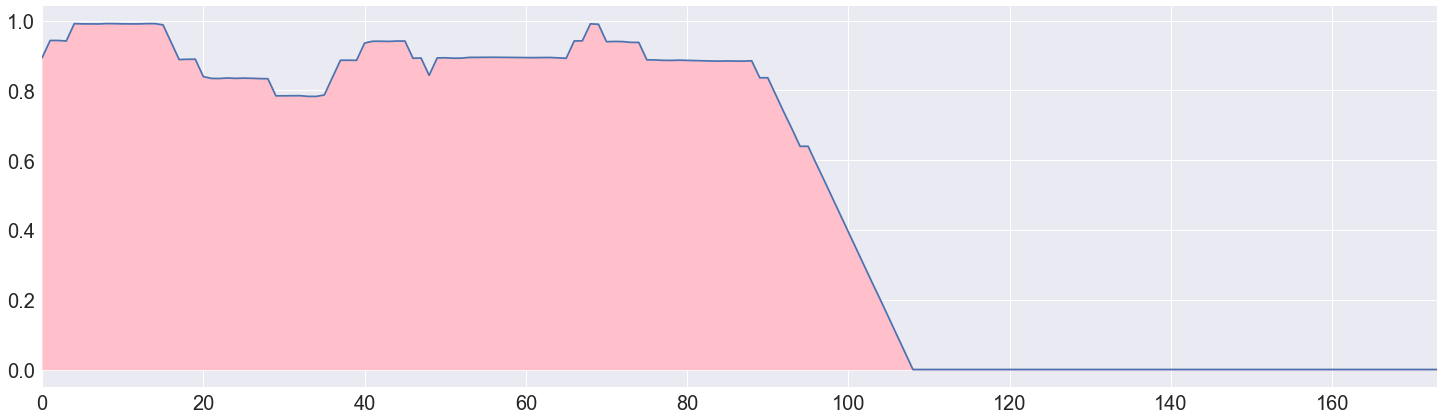

In [151]:
# Power

plt.figure(figsize=(12,10))
word2vec_runavg(power_JaimeS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_JaimeS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_JaimeS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_JaimeS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

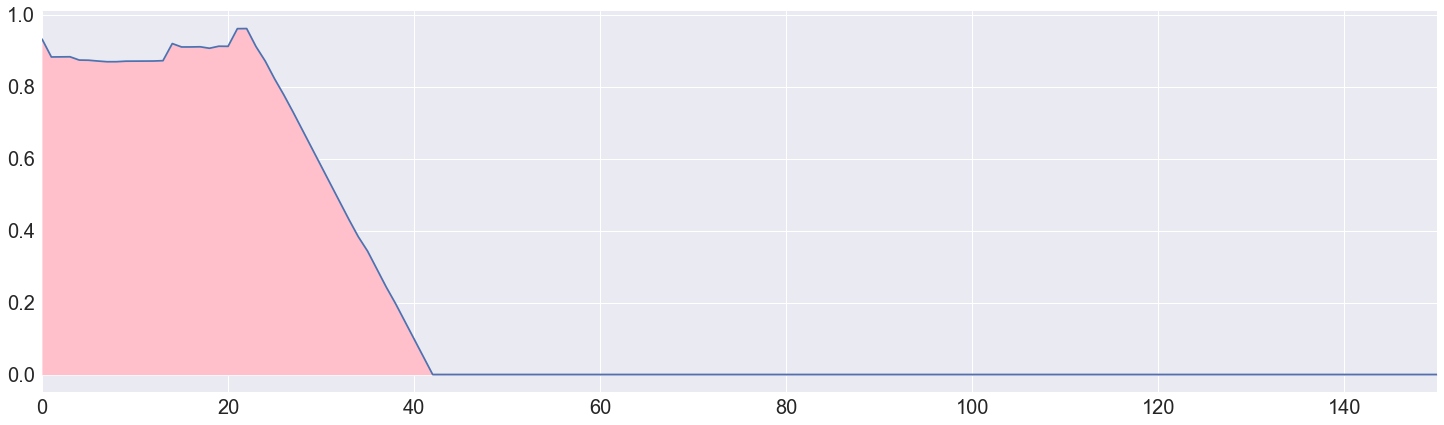

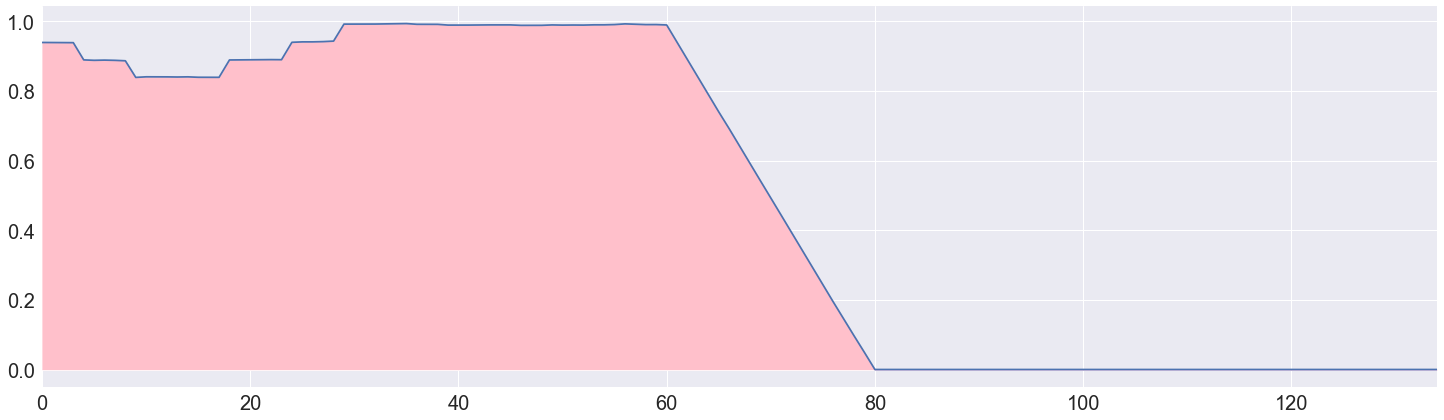

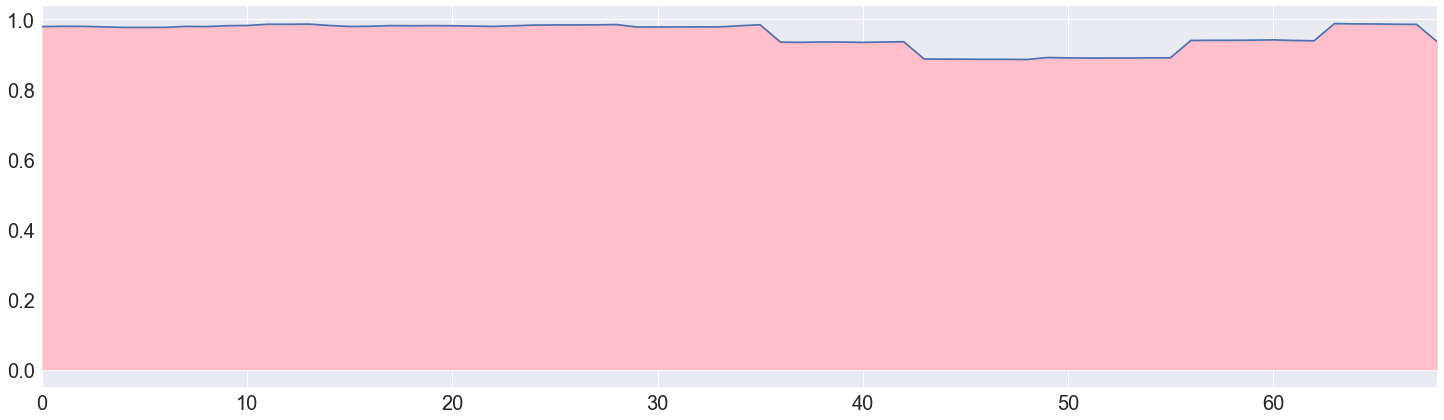

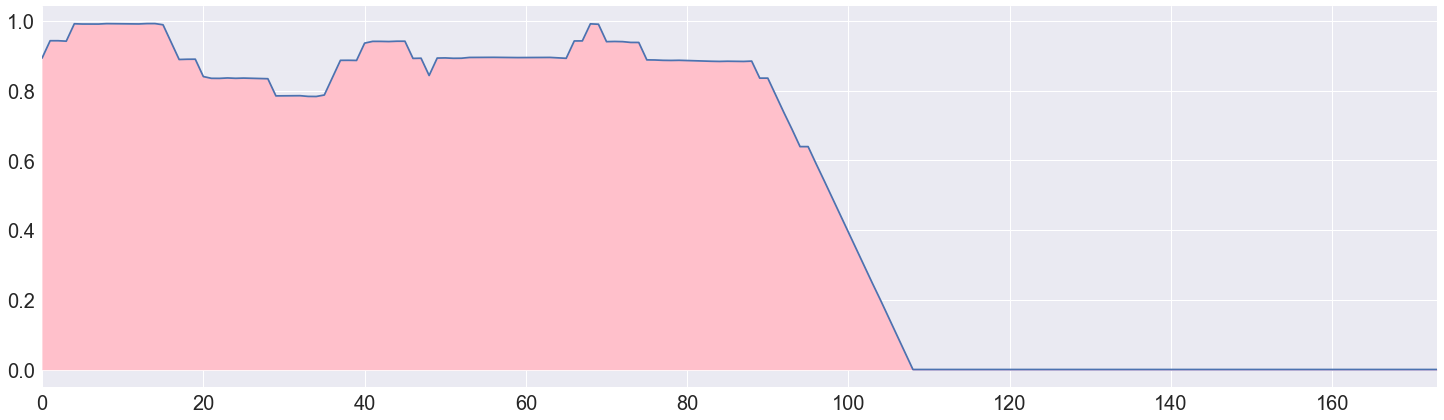

In [152]:
# Force

plt.figure(figsize=(12,10))
word2vec_runavg(force_JaimeS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_JaimeS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_JaimeS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_JaimeS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

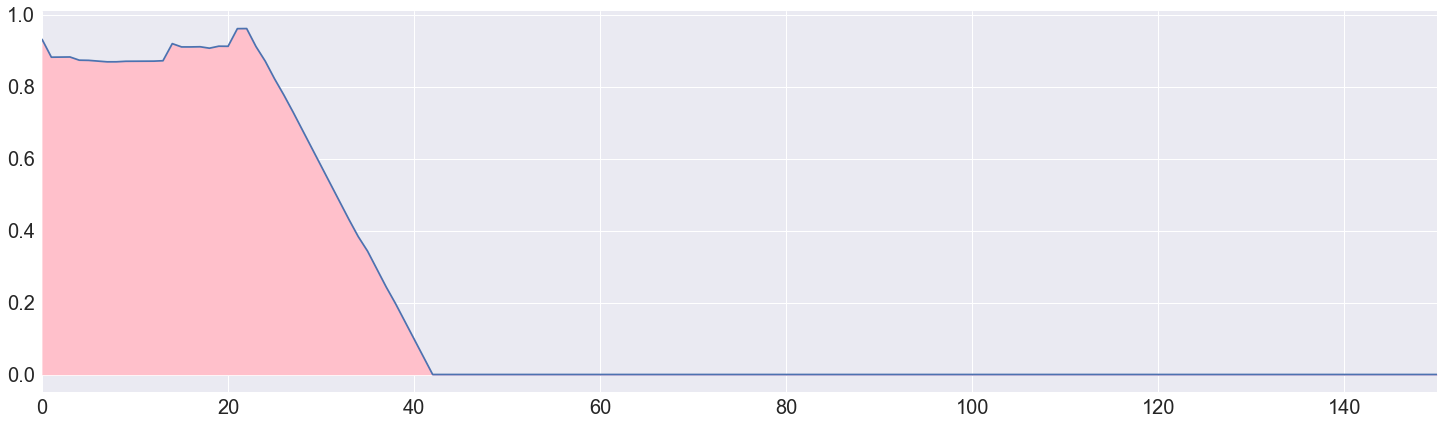

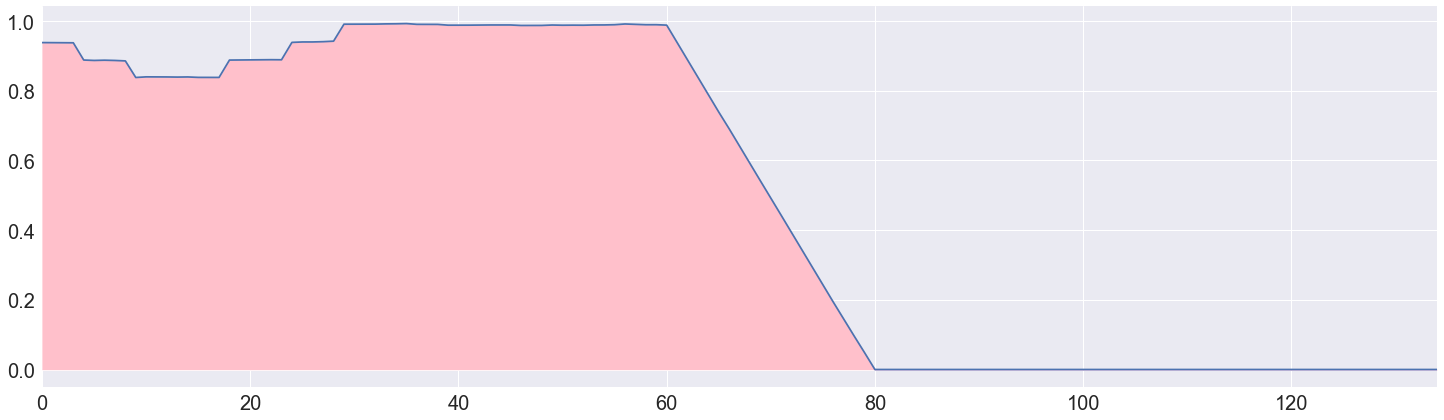

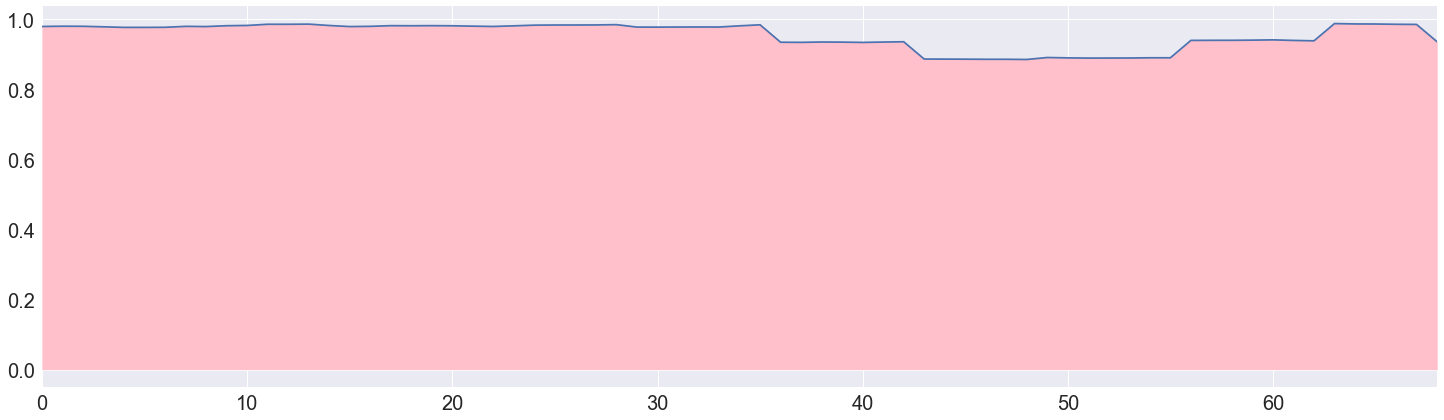

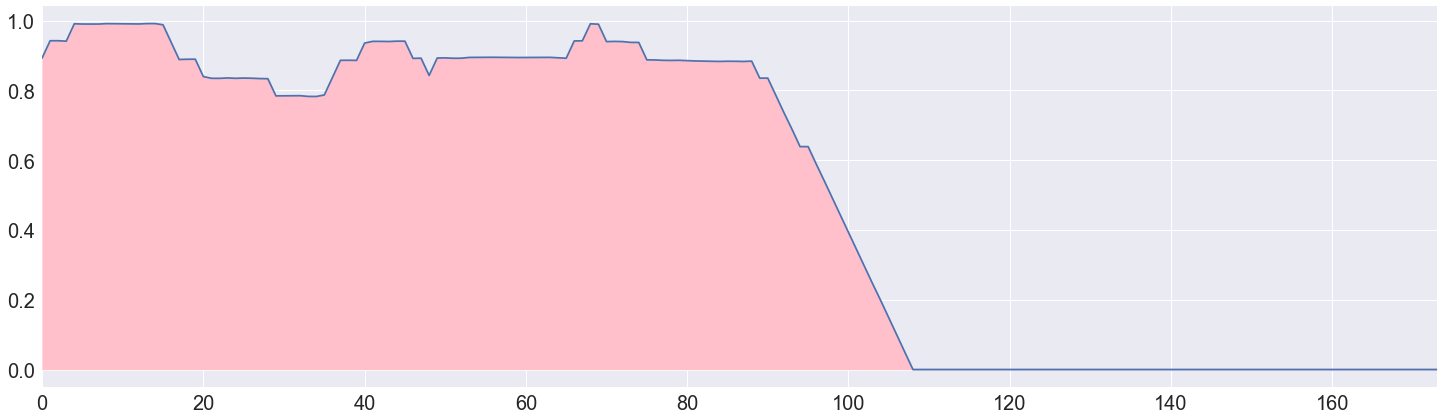

In [153]:
# Command

plt.figure(figsize=(12,10))
word2vec_runavg(command_JaimeS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_JaimeS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_JaimeS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_JaimeS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#### Jon

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

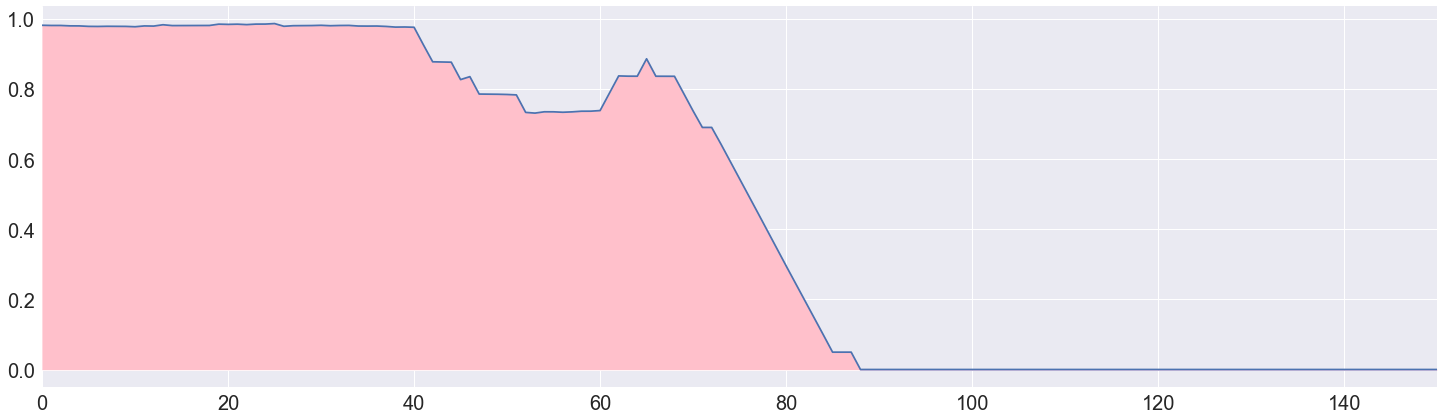

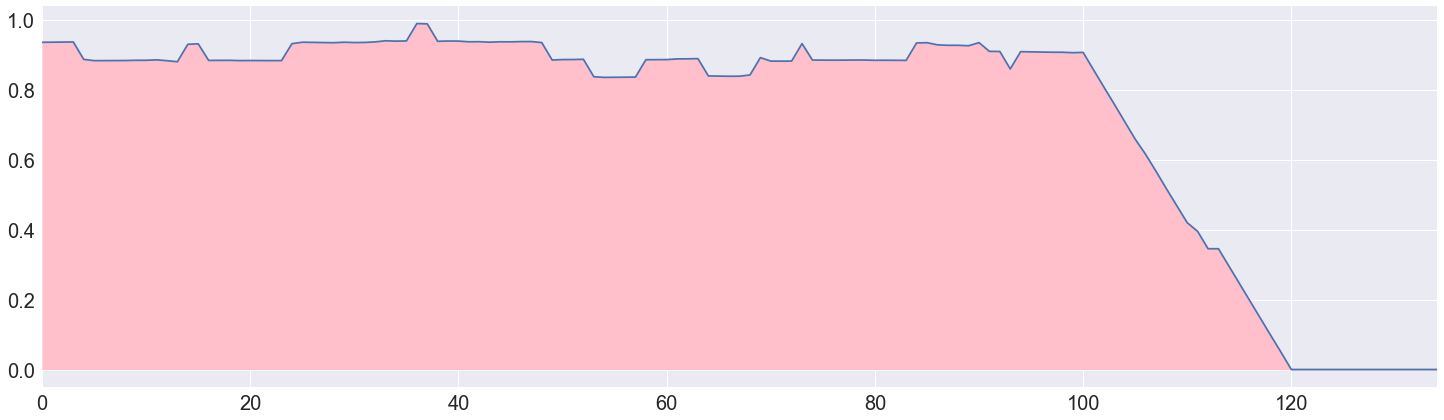

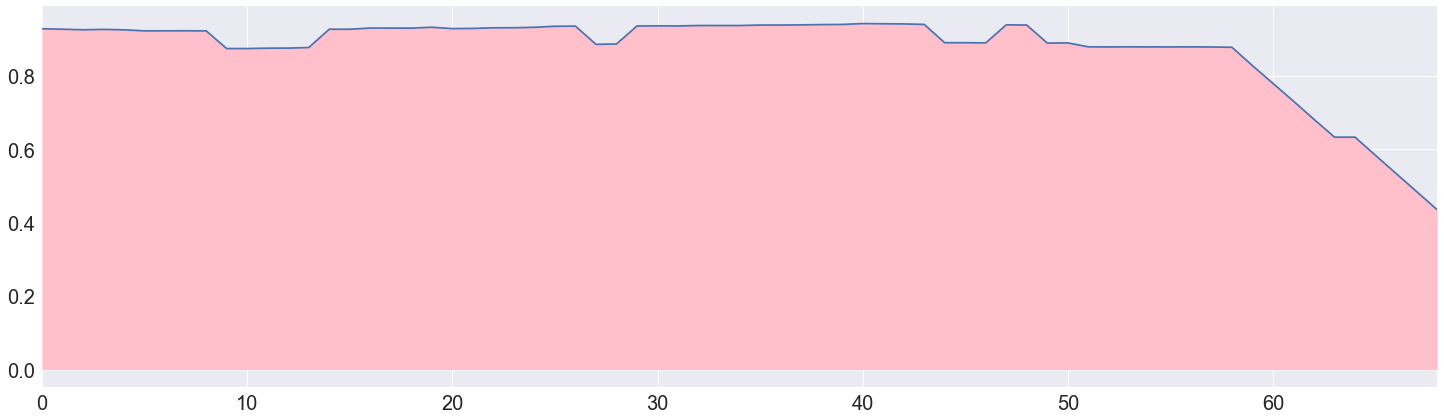

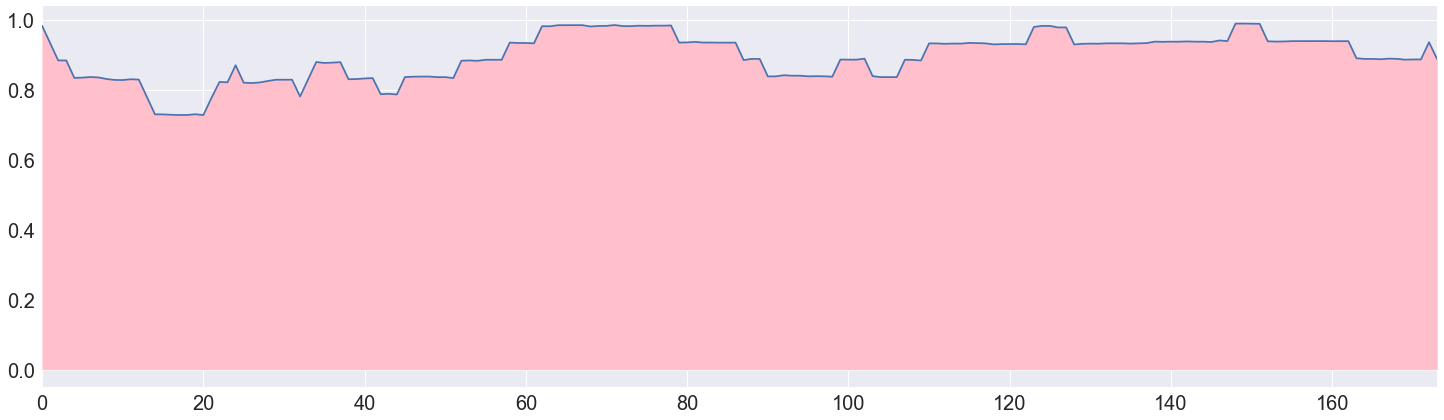

In [154]:
# Strength

plt.figure(figsize=(12,10))
word2vec_runavg(strength_JonS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_JonS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_JonS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_JonS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

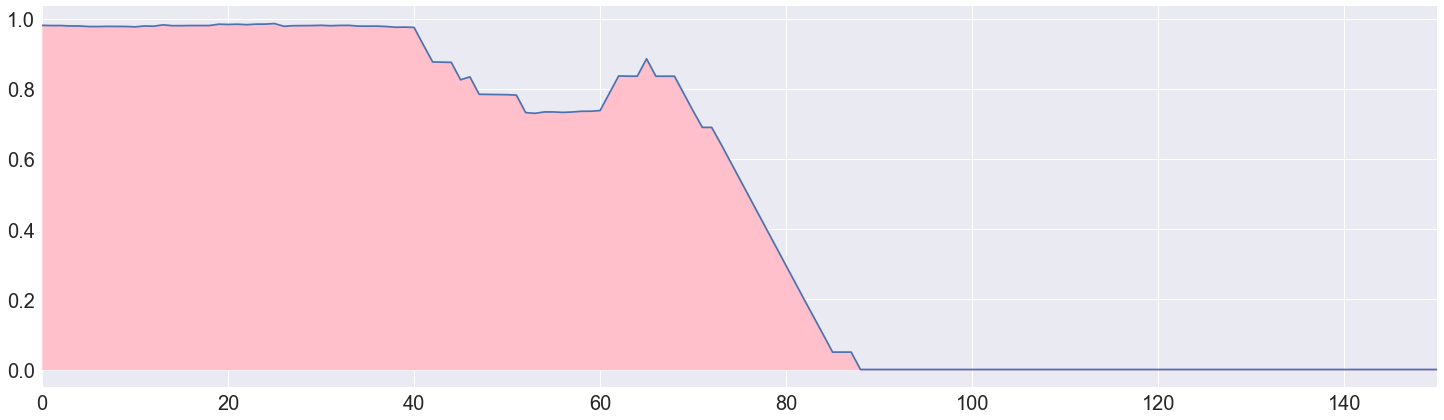

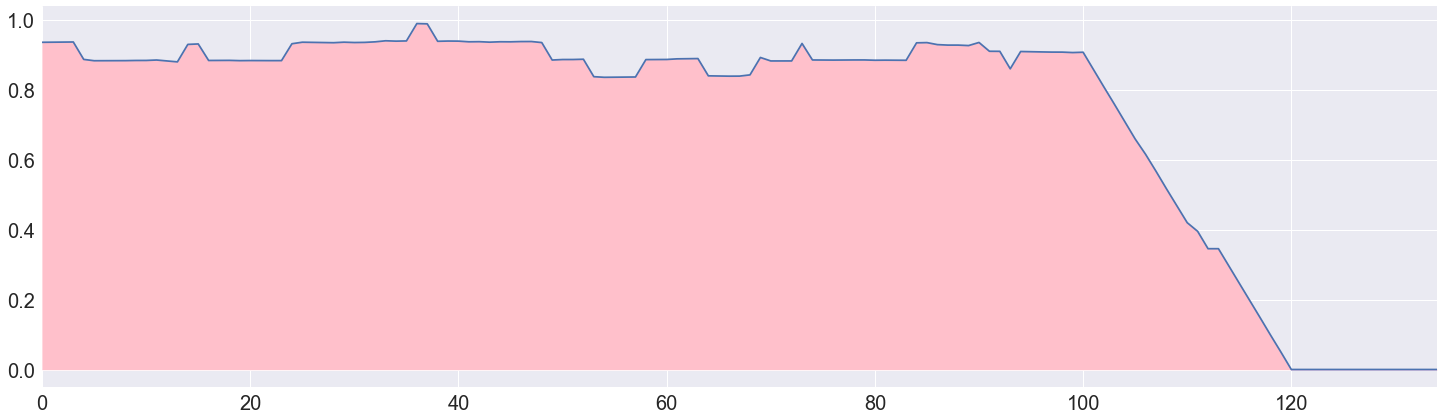

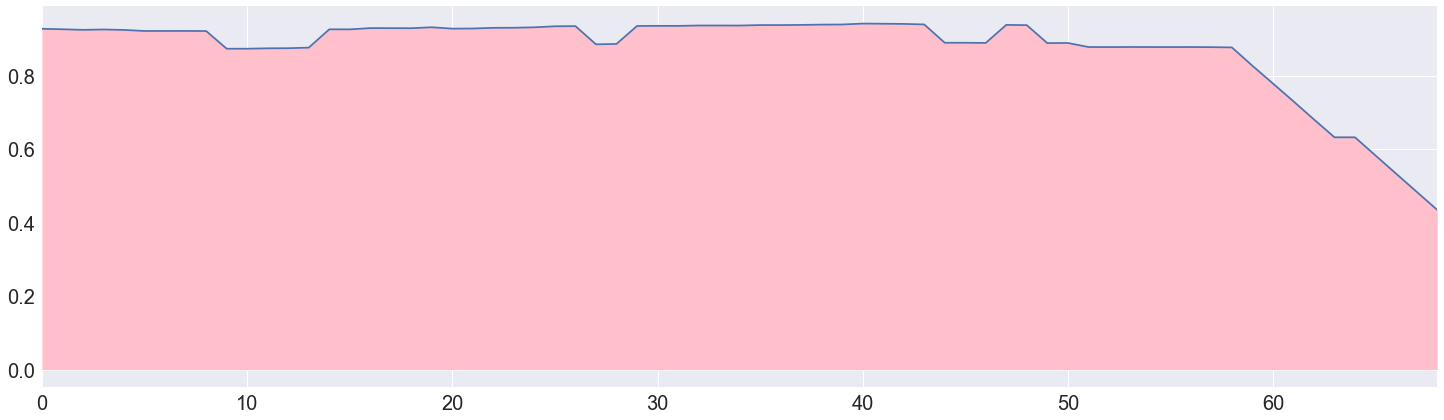

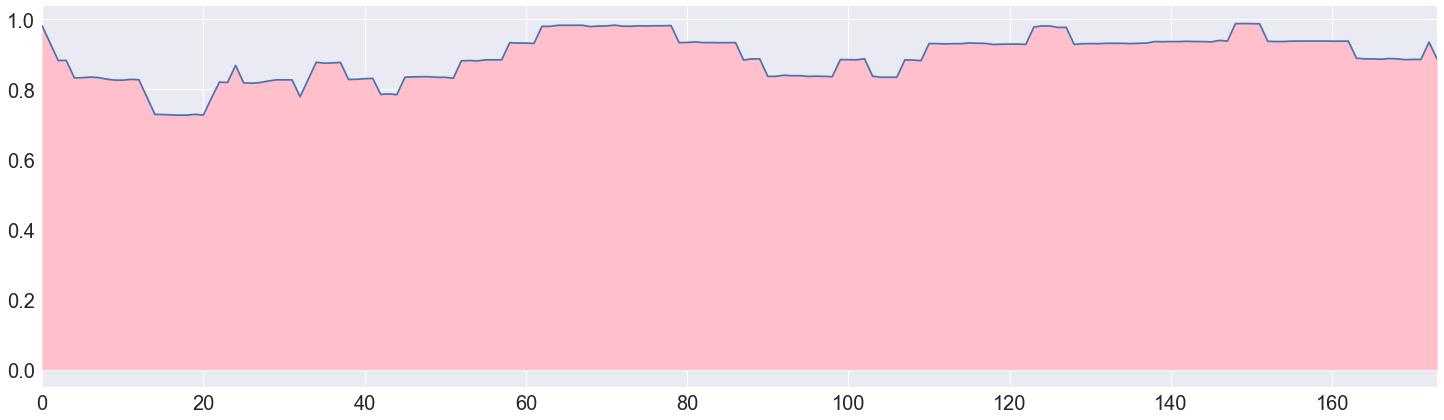

In [155]:
# Lead

plt.figure(figsize=(12,10))
word2vec_runavg(lead_JonS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_JonS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_JonS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_JonS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

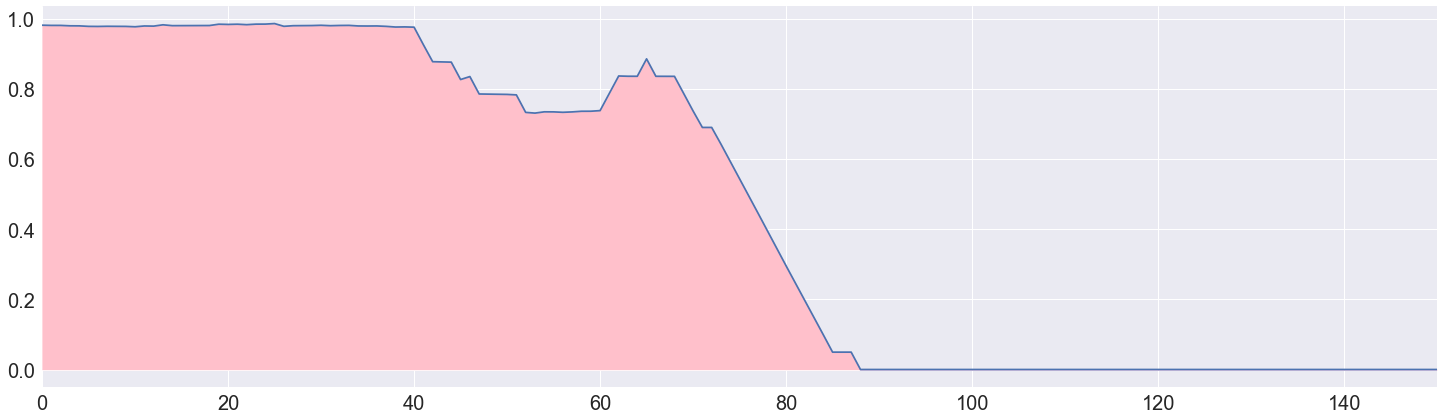

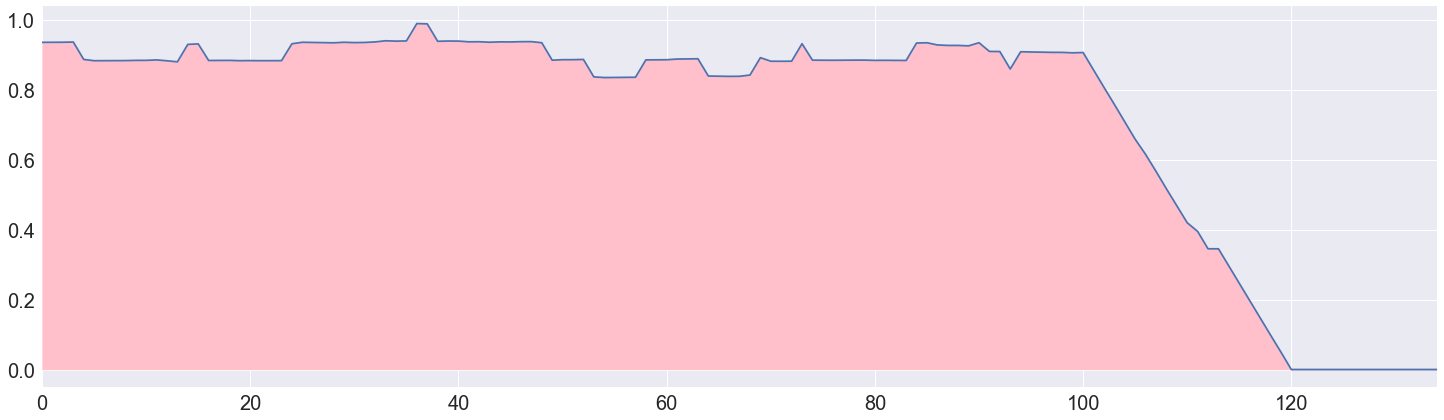

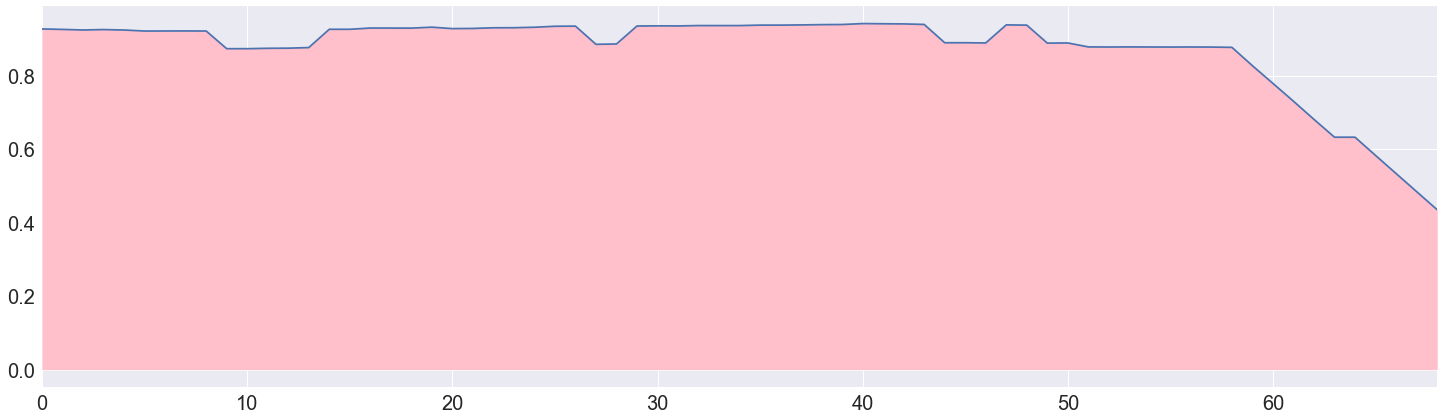

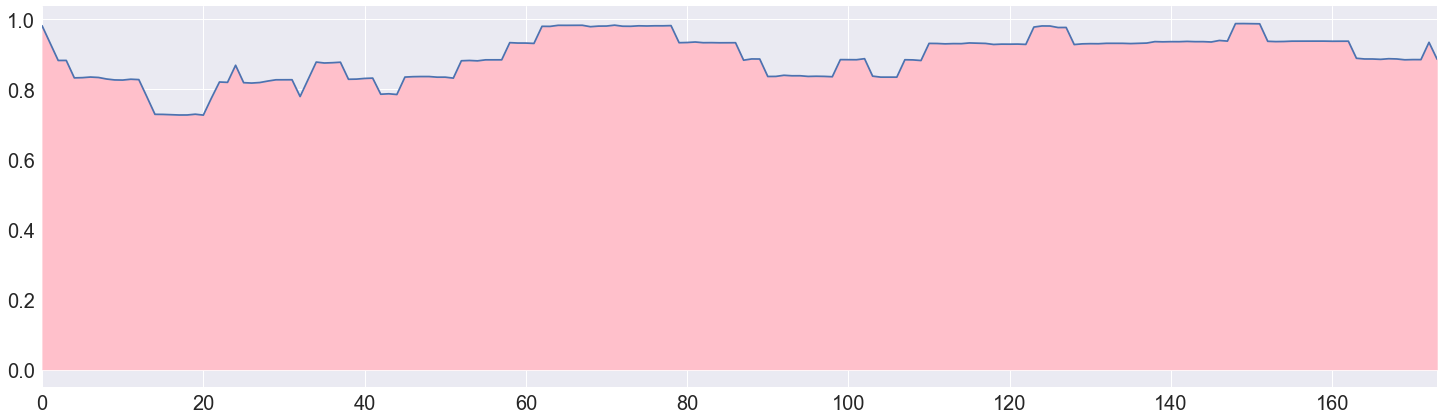

In [156]:
# Action

plt.figure(figsize=(12,10))
word2vec_runavg(action_JonS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_JonS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_JonS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_JonS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

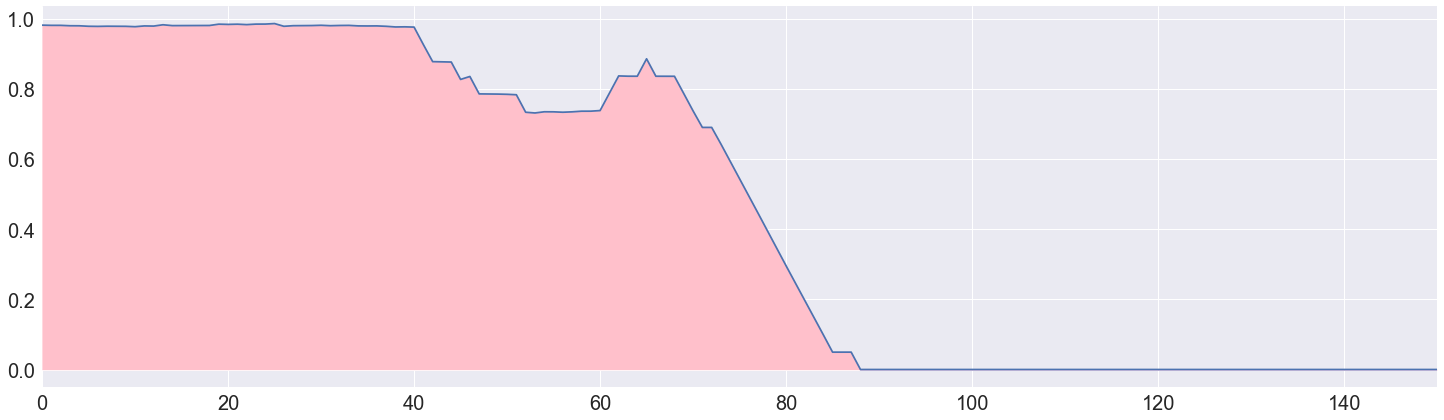

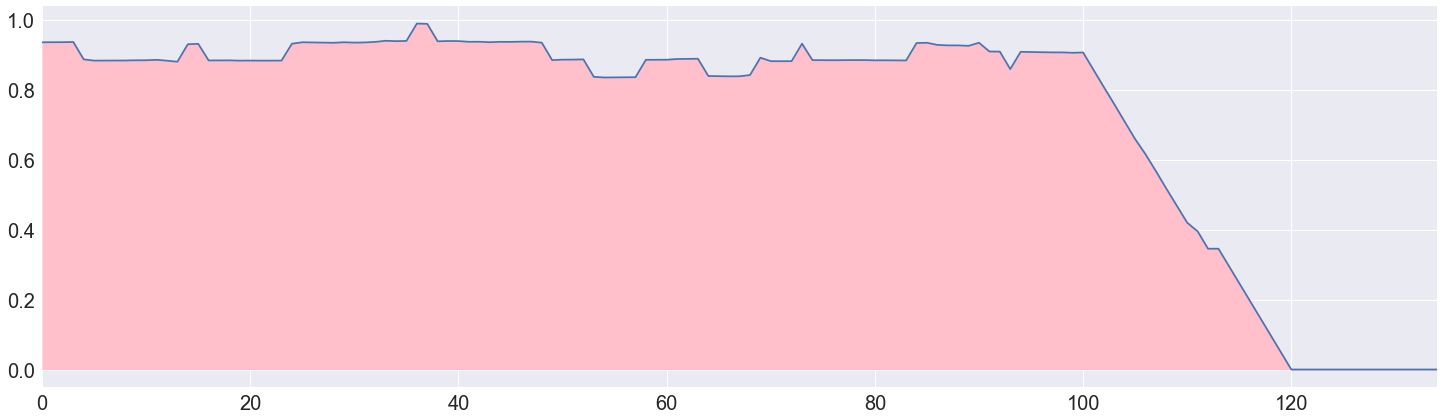

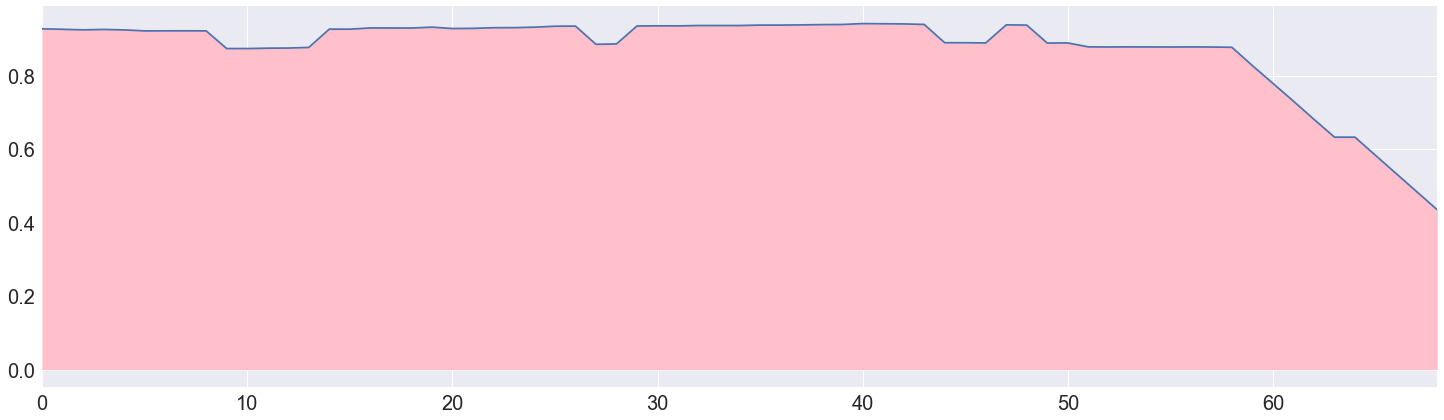

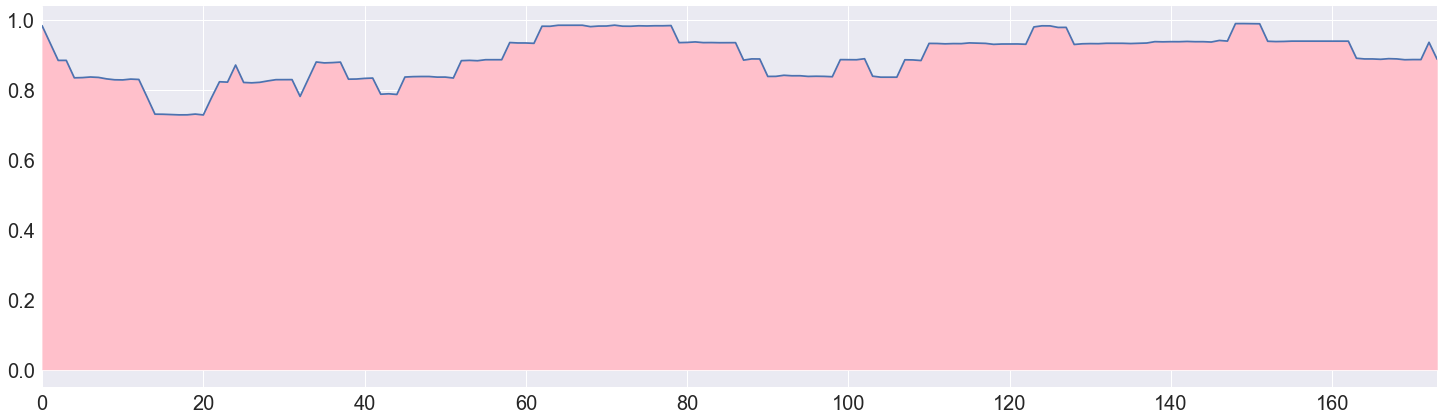

In [157]:
# Power

plt.figure(figsize=(12,10))
word2vec_runavg(power_JonS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_JonS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_JonS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_JonS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

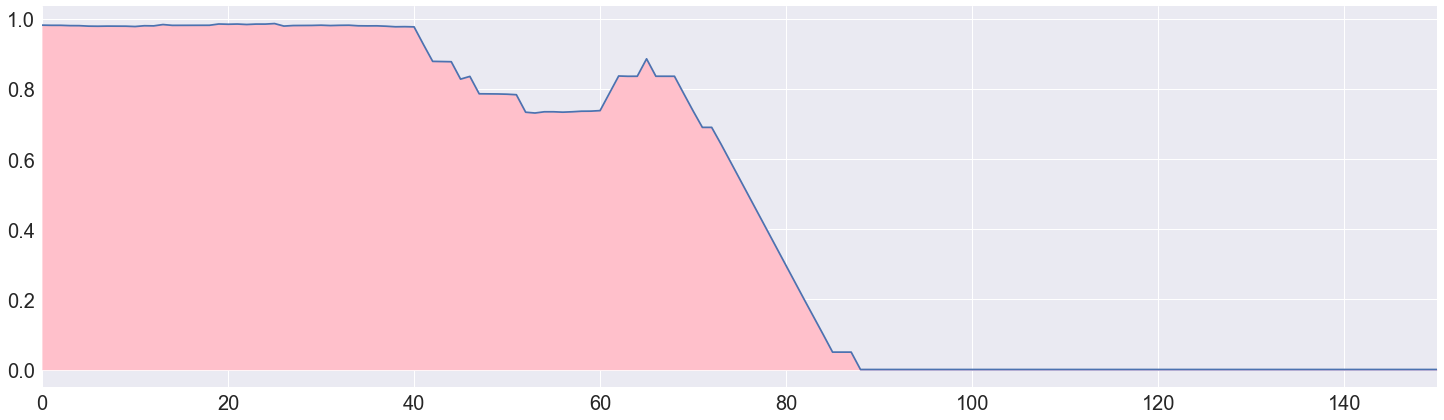

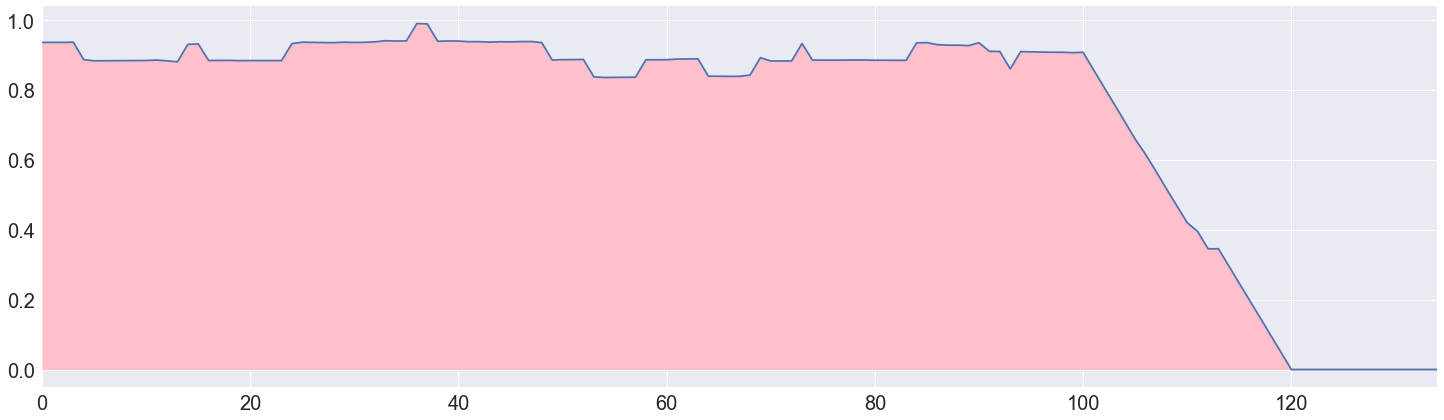

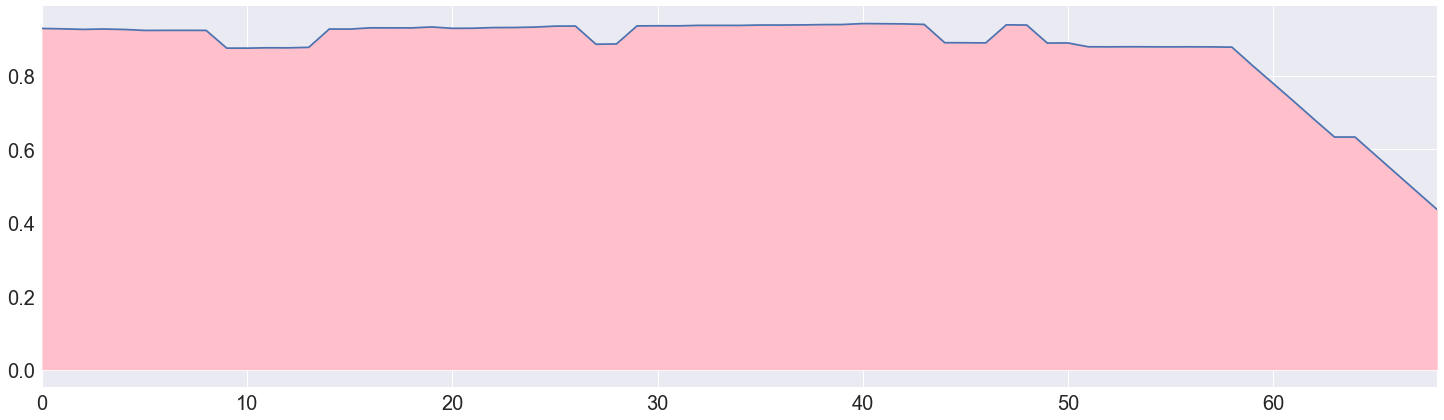

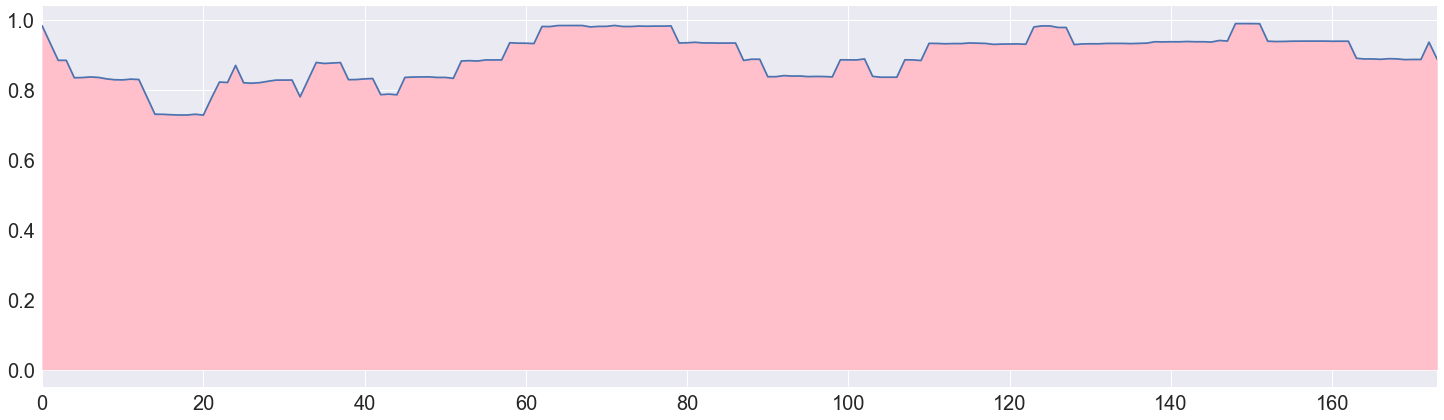

In [158]:
# Force

plt.figure(figsize=(12,10))
word2vec_runavg(force_JonS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_JonS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_JonS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_JonS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

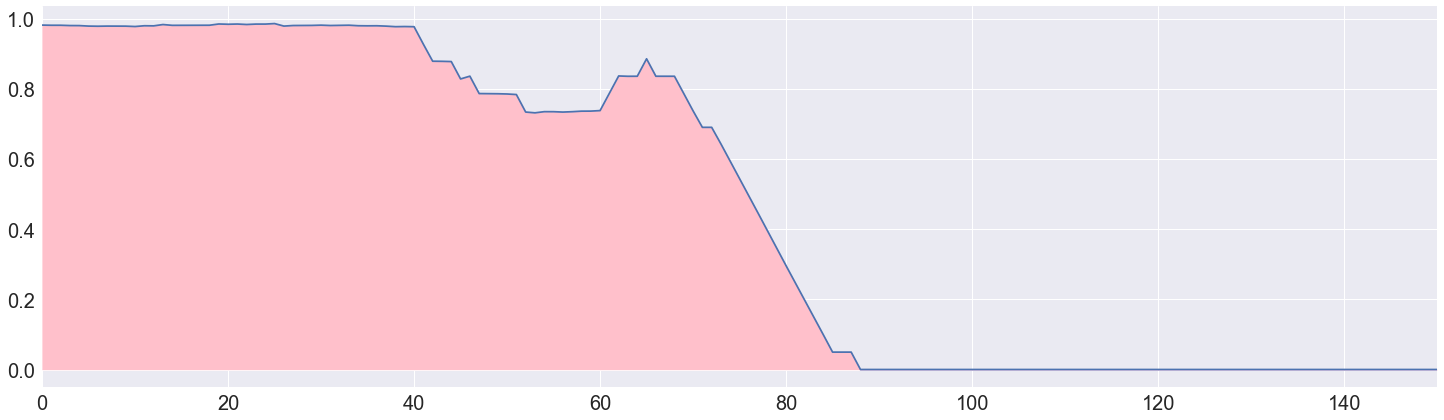

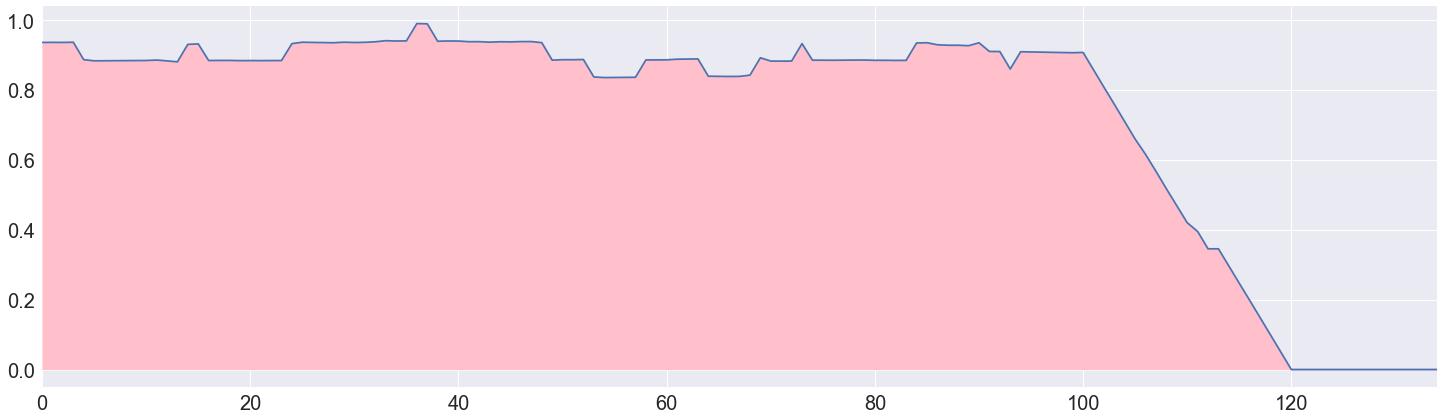

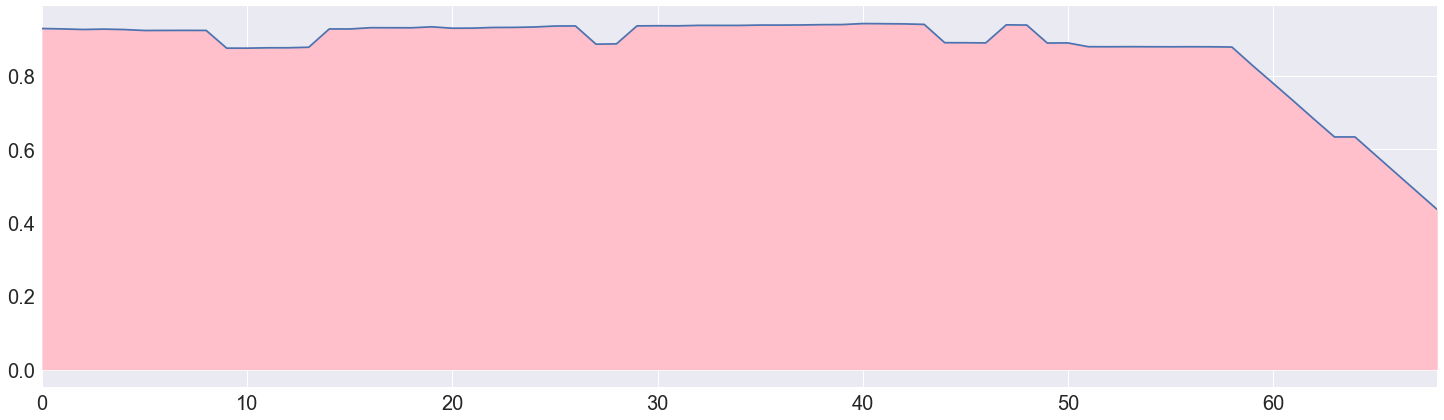

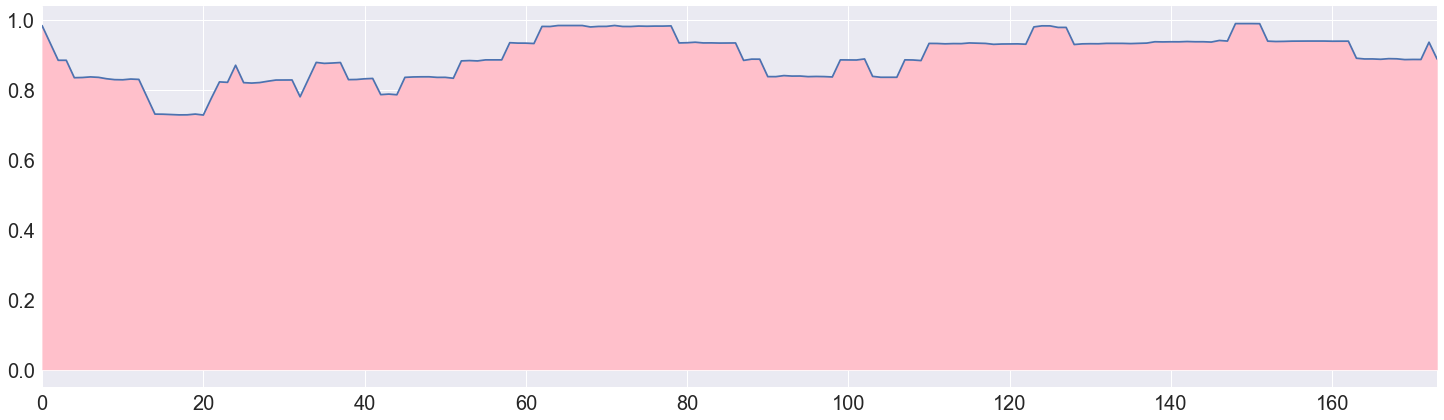

In [159]:
# Command

plt.figure(figsize=(12,10))
word2vec_runavg(command_JonS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_JonS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_JonS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_JonS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#### Tyrion

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

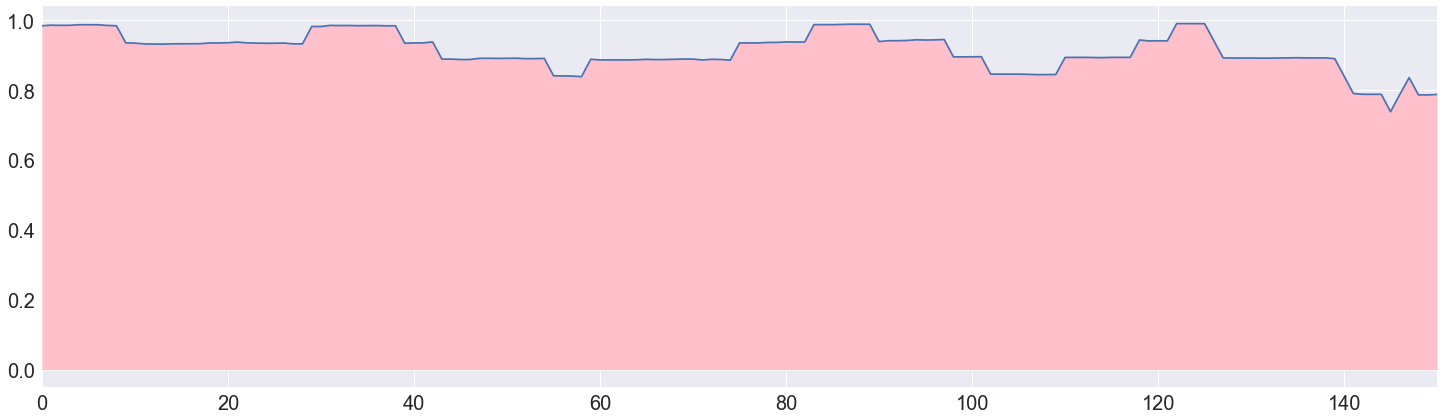

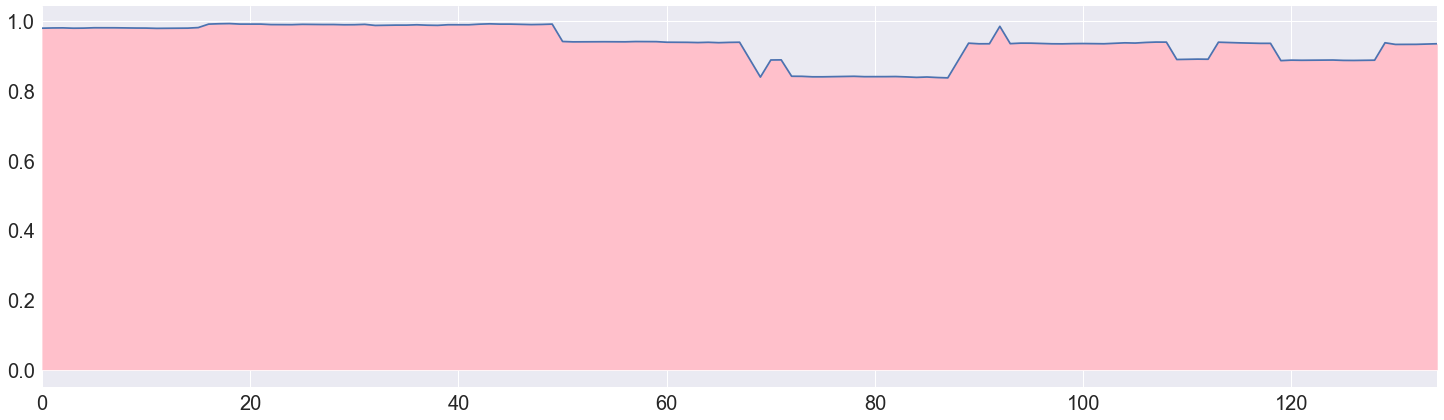

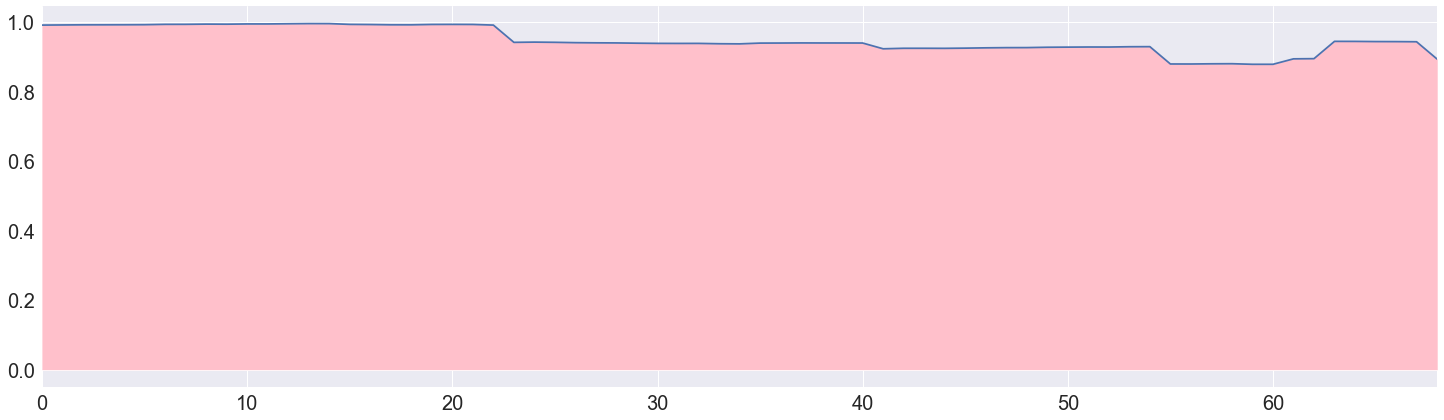

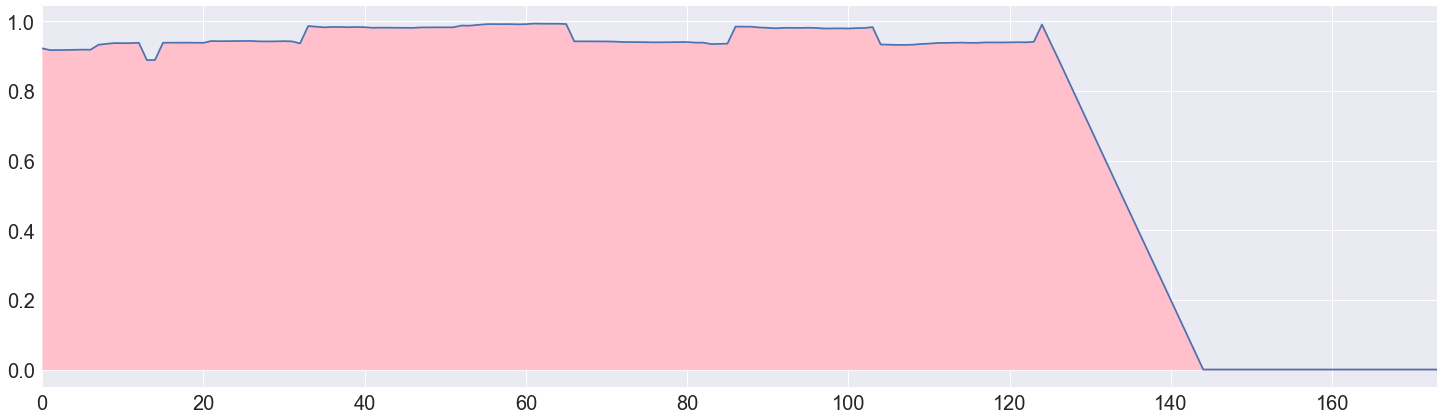

In [160]:
# Strength

plt.figure(figsize=(12,10))
word2vec_runavg(strength_TyrionS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_TyrionS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_TyrionS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(strength_TyrionS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

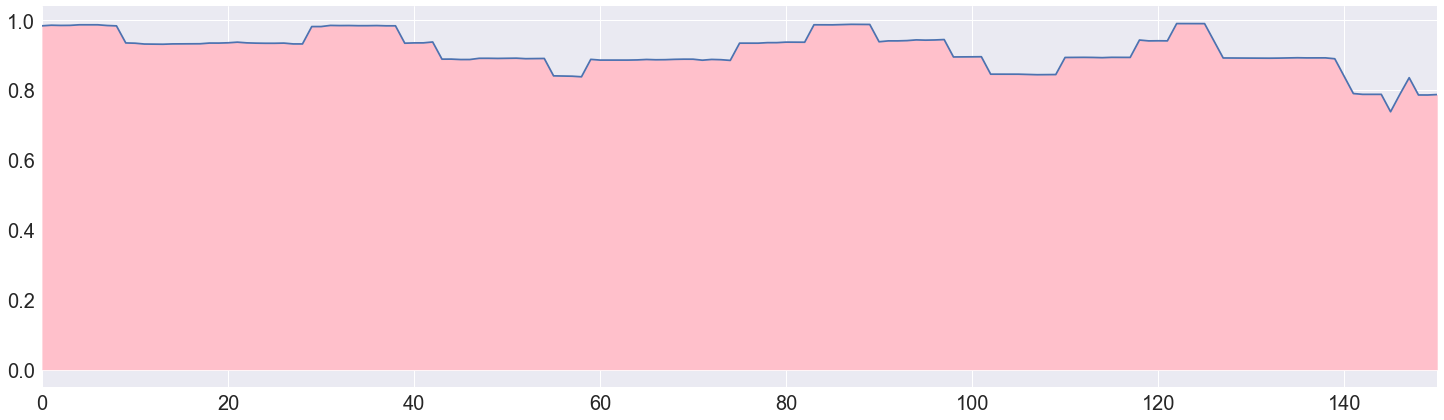

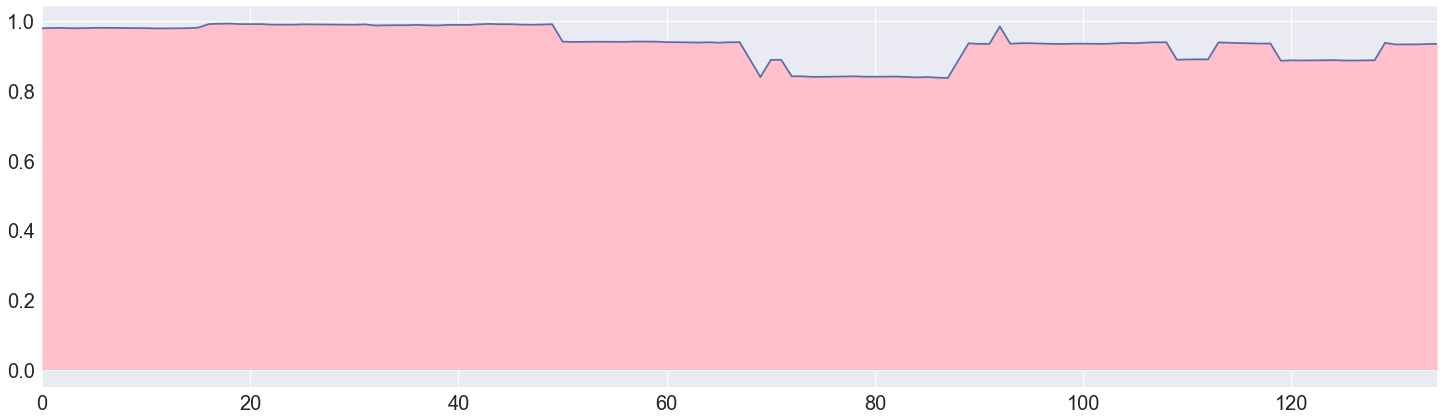

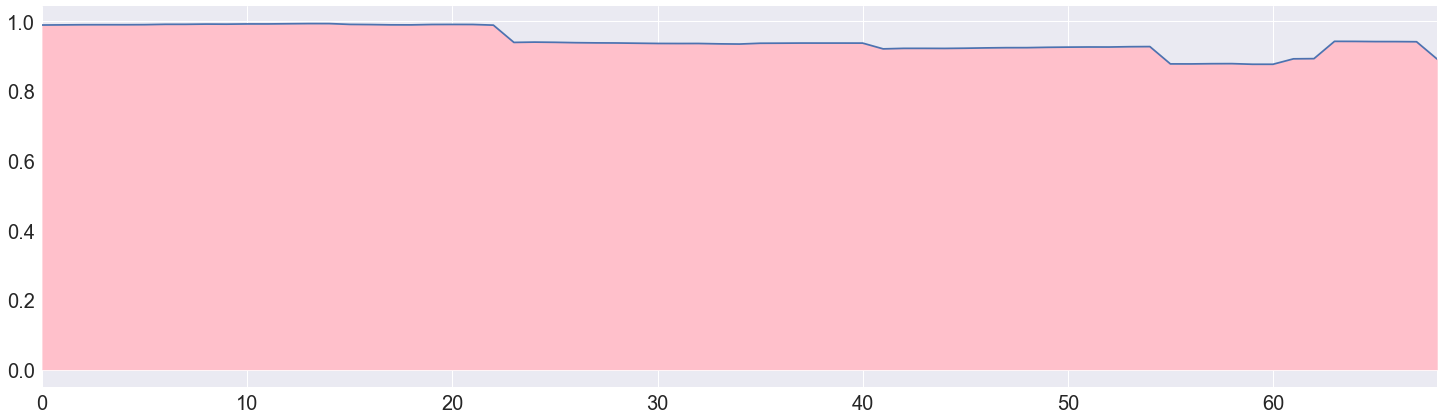

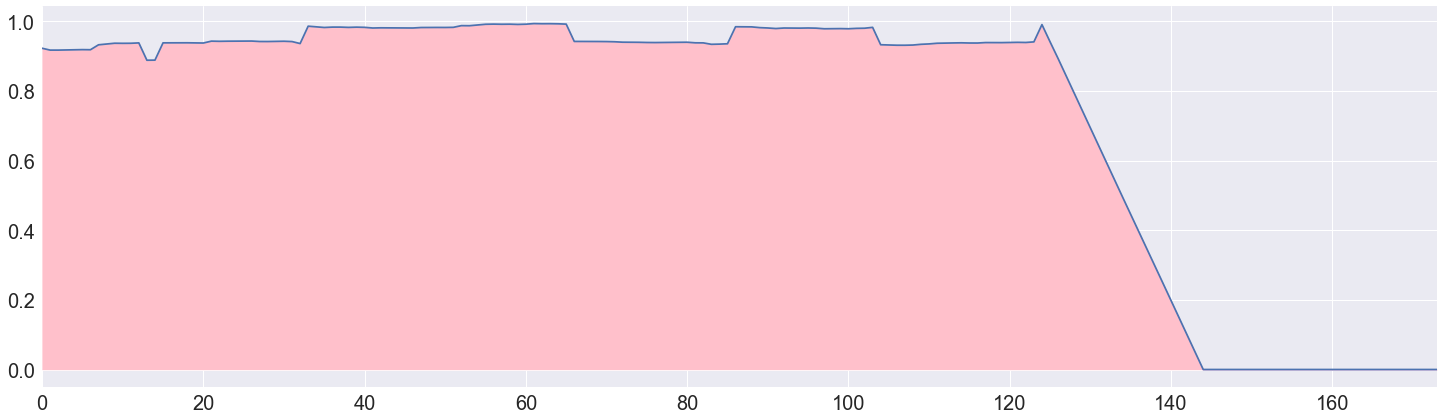

In [161]:
# Lead

plt.figure(figsize=(12,10))
word2vec_runavg(lead_TyrionS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_TyrionS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_TyrionS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(lead_TyrionS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

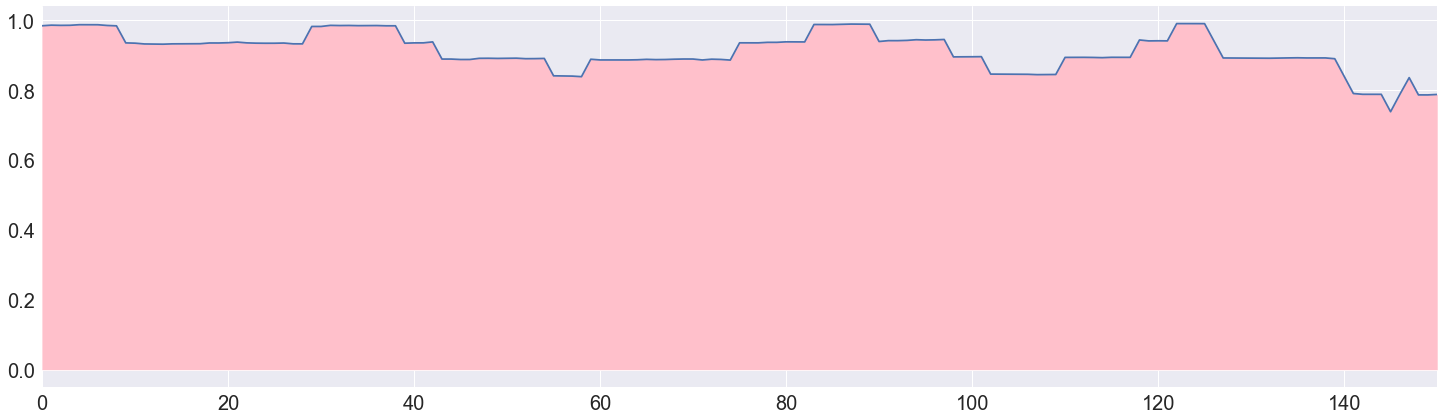

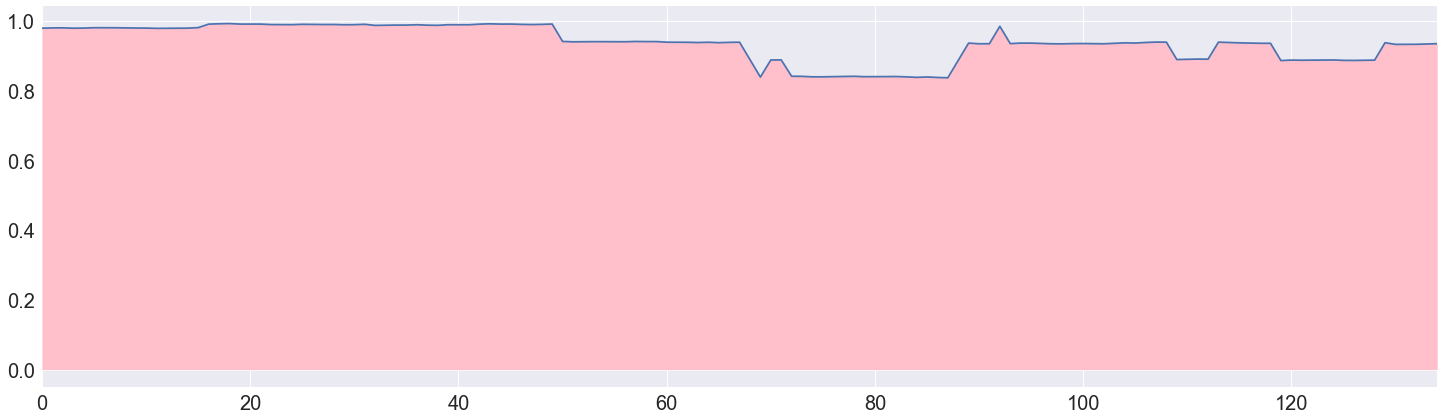

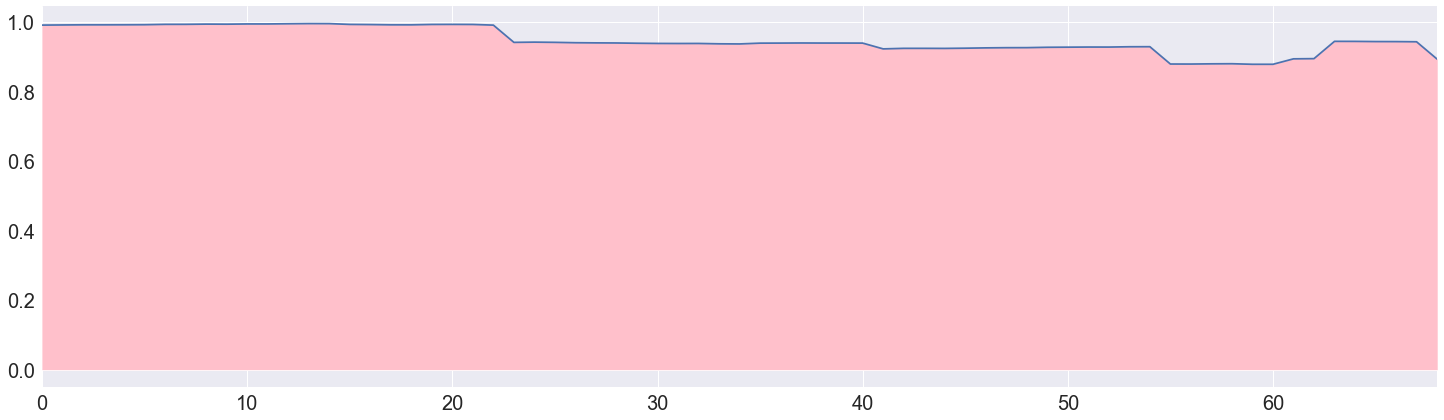

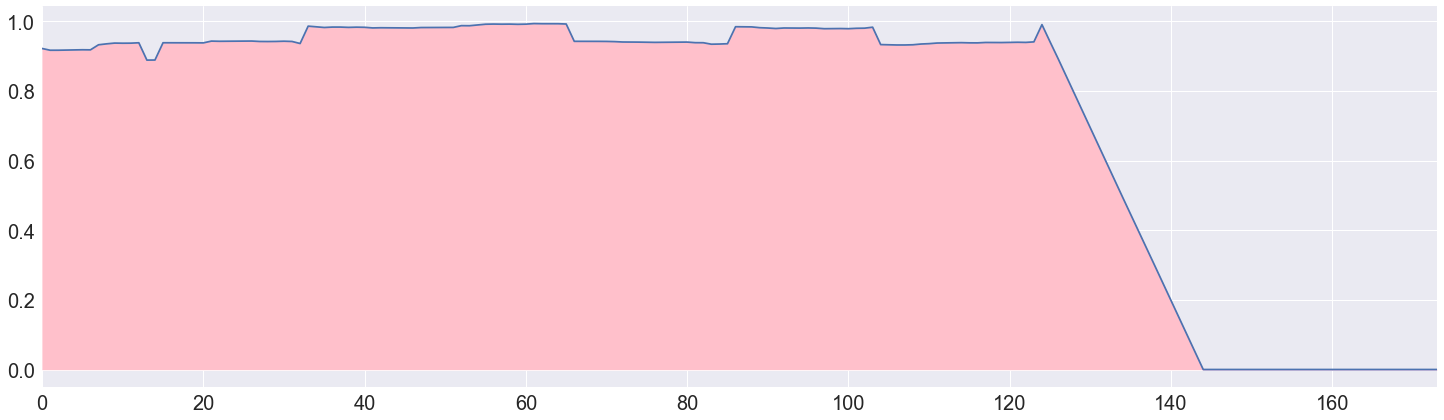

In [162]:
# Action

plt.figure(figsize=(12,10))
word2vec_runavg(action_TyrionS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_TyrionS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_TyrionS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(action_TyrionS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

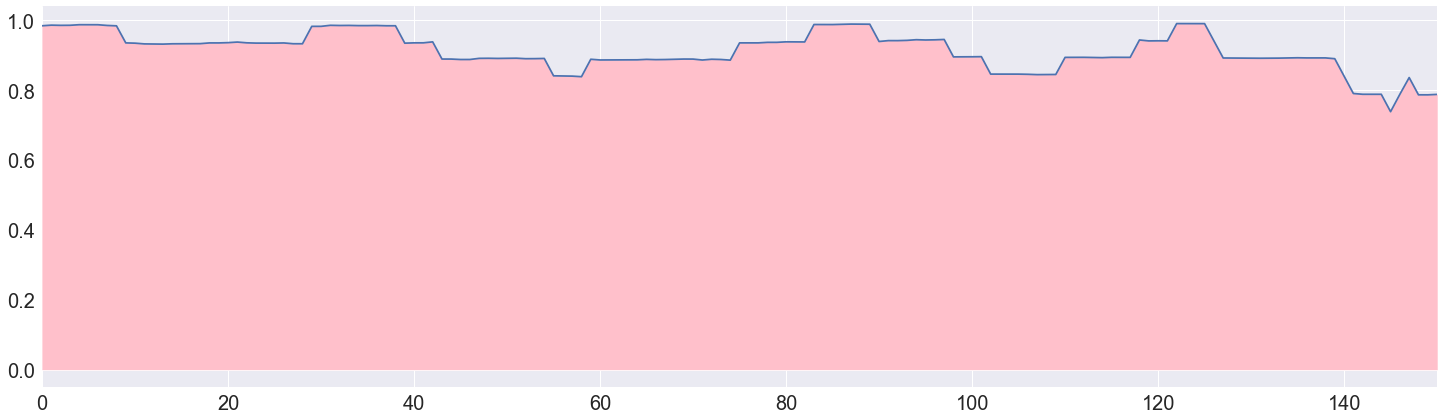

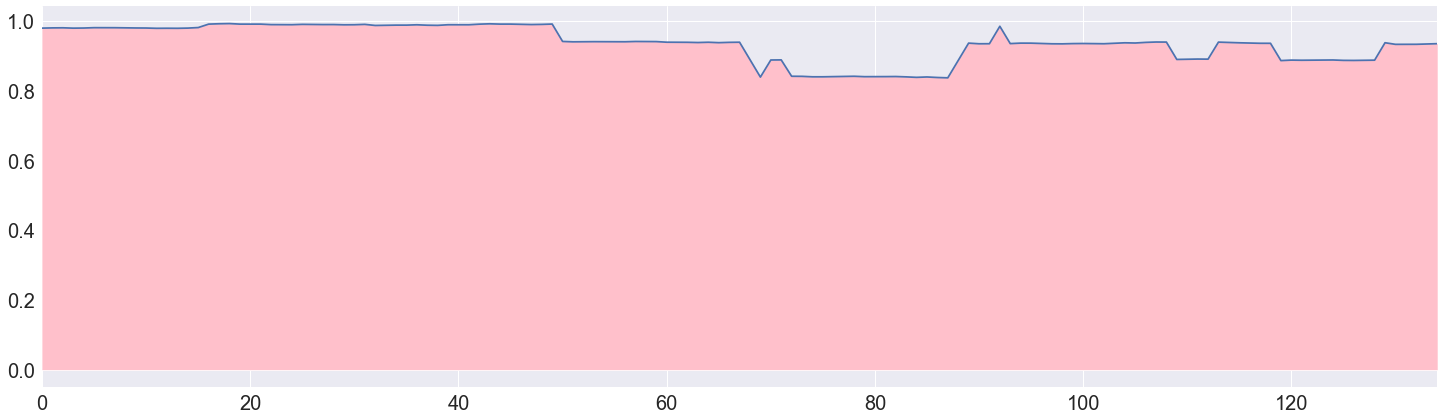

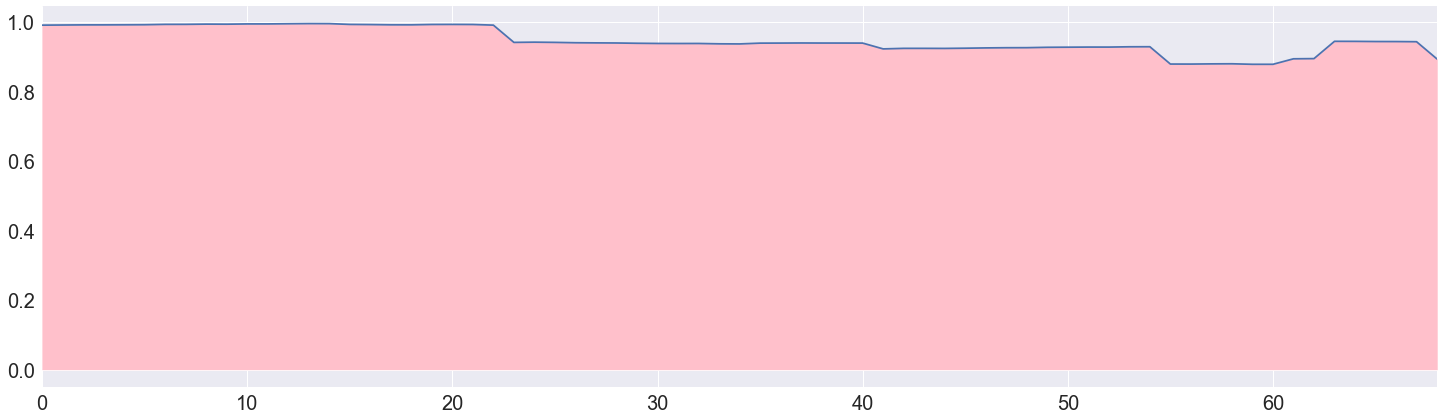

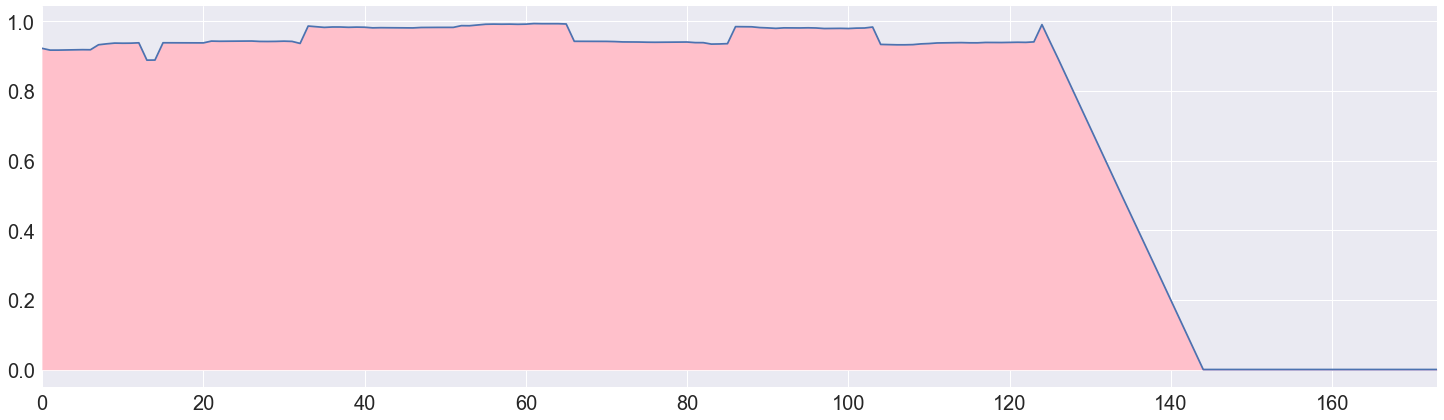

In [163]:
# Power

plt.figure(figsize=(12,10))
word2vec_runavg(power_TyrionS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_TyrionS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_TyrionS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(power_TyrionS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

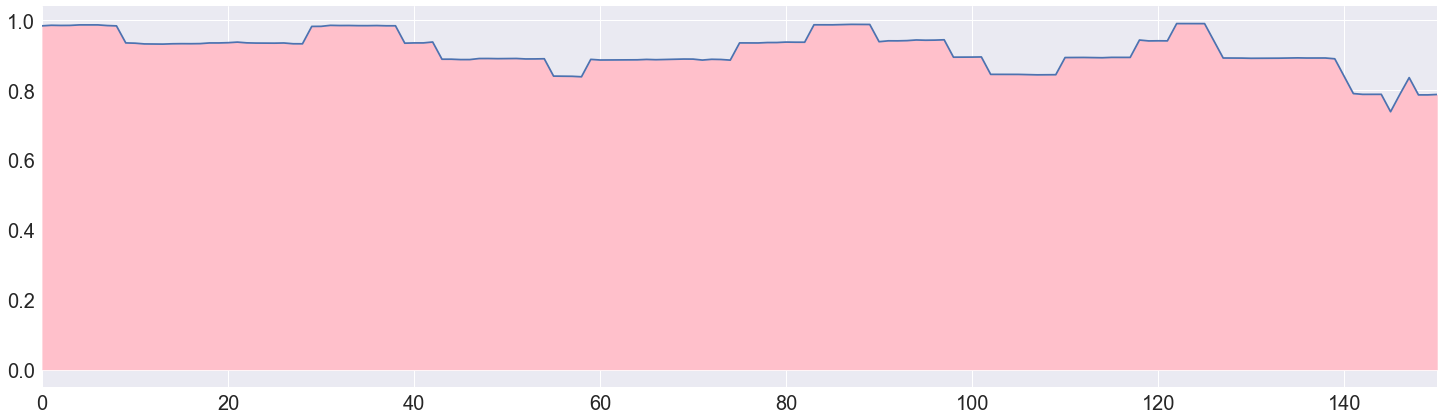

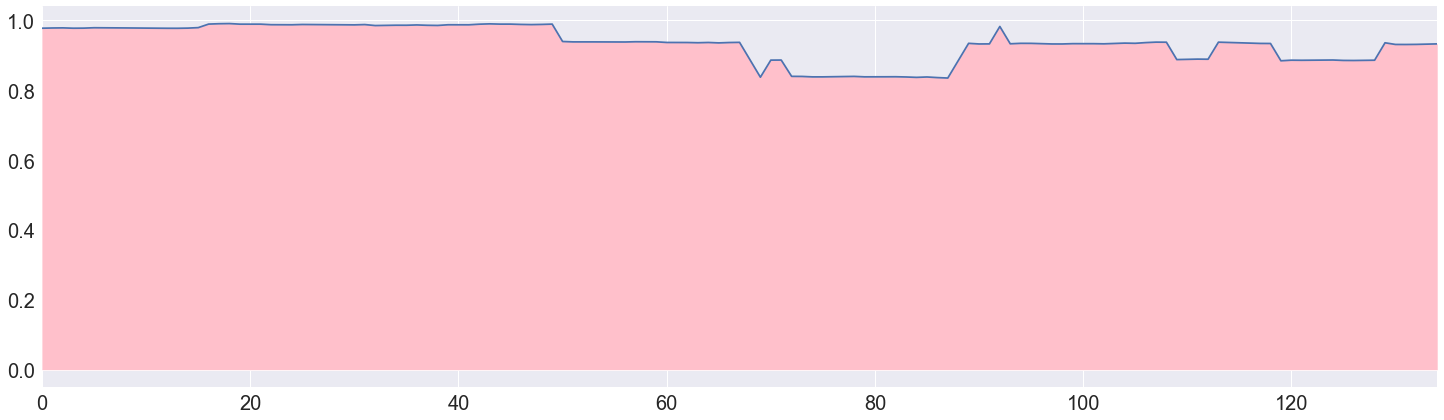

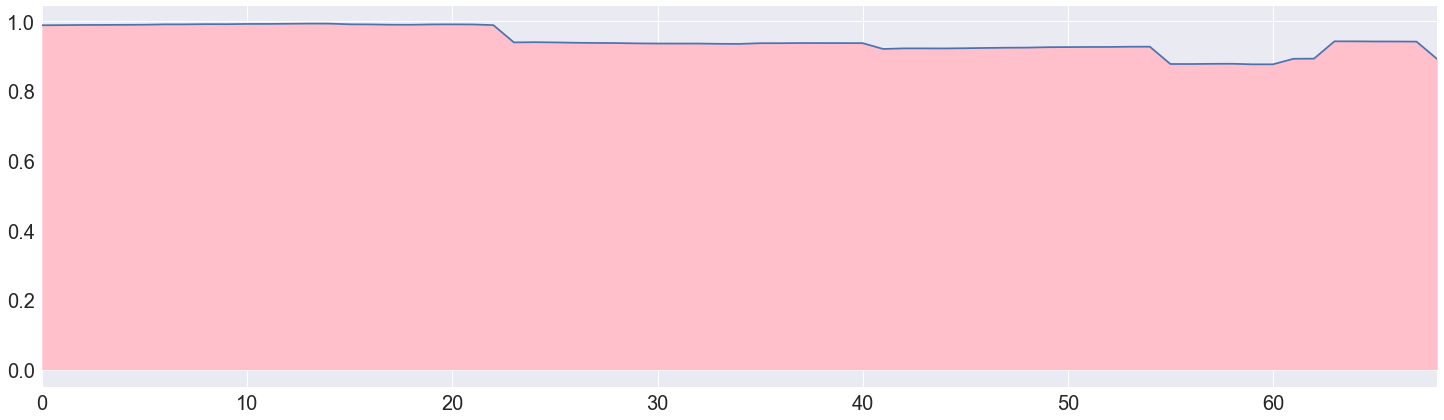

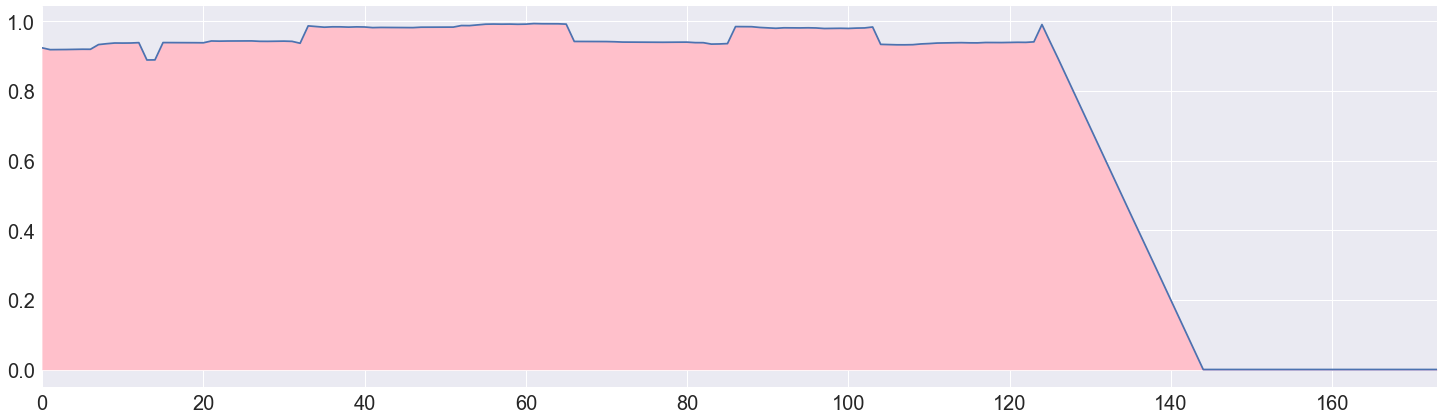

In [164]:
# Force

plt.figure(figsize=(12,10))
word2vec_runavg(force_TyrionS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_TyrionS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_TyrionS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(force_TyrionS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

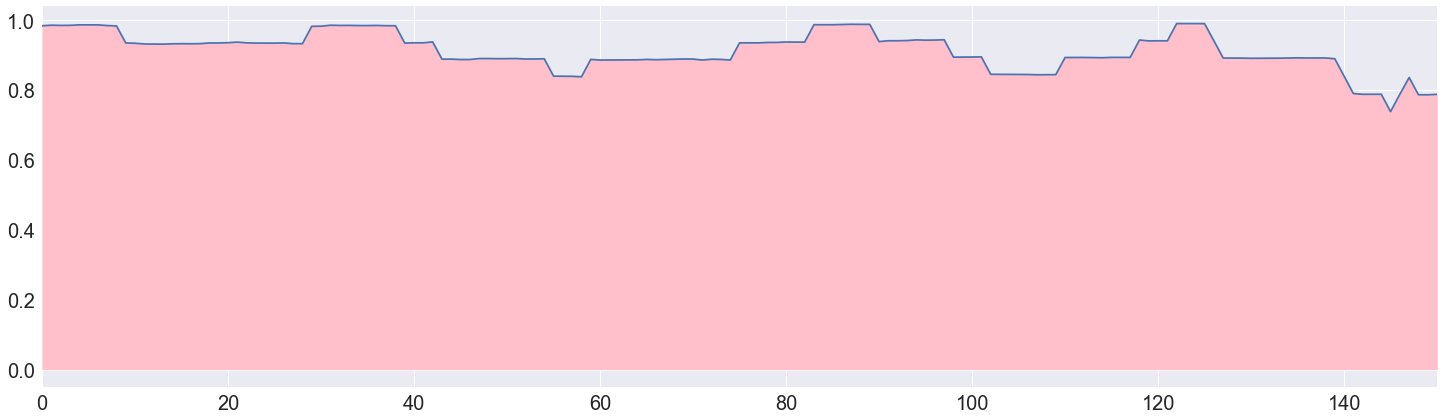

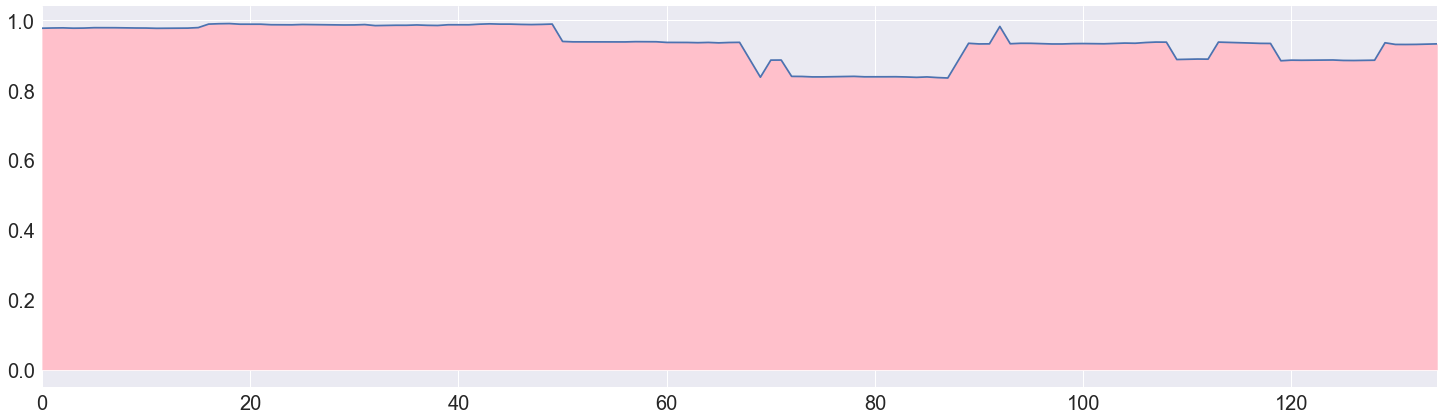

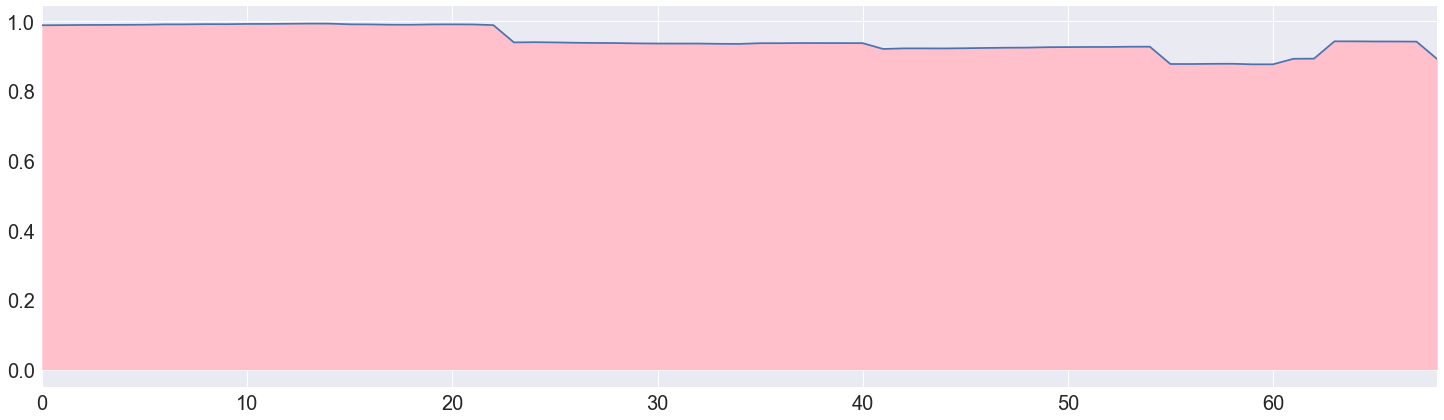

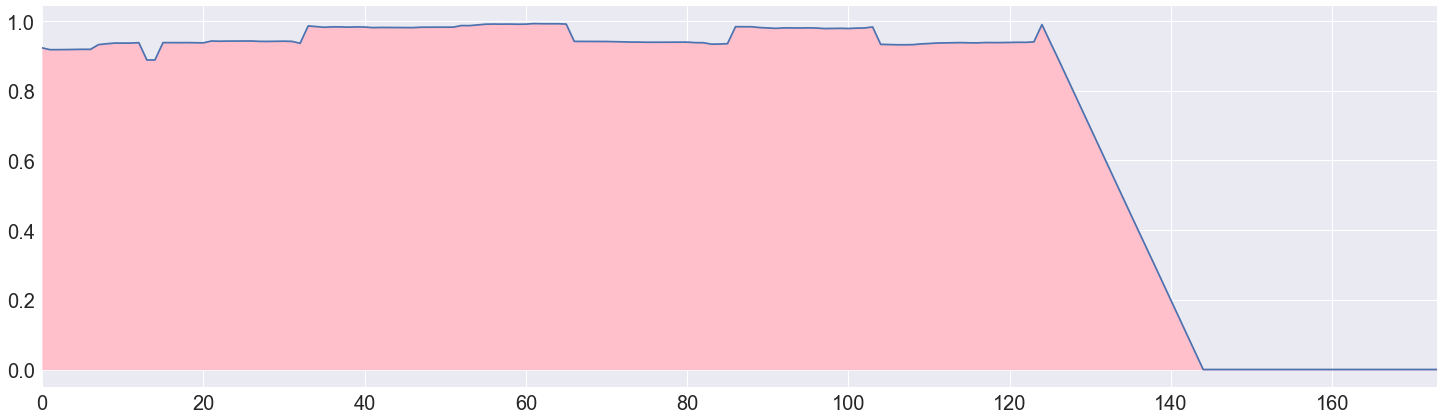

In [165]:
# Command
plt.figure(figsize=(12,10))
word2vec_runavg(command_TyrionS1, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_TyrionS5, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_TyrionS6, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure(figsize=(12,10))
word2vec_runavg(command_TyrionS7, runavg=20, color_pos='pink', color_neg='plum')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

## T-SNE

In [166]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale

from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [167]:
model2.wv.vocab.items()

[('foul', <gensim.models.keyedvectors.Vocab at 0x11d6390d0>),
 ('four', <gensim.models.keyedvectors.Vocab at 0x11d639910>),
 ('hanging', <gensim.models.keyedvectors.Vocab at 0x11d01ec90>),
 ('marching', <gensim.models.keyedvectors.Vocab at 0x11d01ea90>),
 (u'increase', <gensim.models.keyedvectors.Vocab at 0x11890e890>),
 ('midafternoon', <gensim.models.keyedvectors.Vocab at 0x11d01ea10>),
 ('mutinied', <gensim.models.keyedvectors.Vocab at 0x11d01ed90>),
 ('lord', <gensim.models.keyedvectors.Vocab at 0x11d01ed10>),
 (u'sinking', <gensim.models.keyedvectors.Vocab at 0x11d01ee10>),
 ('leisurely', <gensim.models.keyedvectors.Vocab at 0x11d01ec50>),
 (u'politician', <gensim.models.keyedvectors.Vocab at 0x11d01ecd0>),
 ('stabbed', <gensim.models.keyedvectors.Vocab at 0x11d01eb50>),
 ('bringing', <gensim.models.keyedvectors.Vocab at 0x11cf06550>),
 ('disturb', <gensim.models.keyedvectors.Vocab at 0x11d01edd0>),
 ('prize', <gensim.models.keyedvectors.Vocab at 0x11d01ea50>),
 ('wooden', <gensim

In [168]:
model2.wv.vocab.keys()

['foul',
 'four',
 'hanging',
 'marching',
 u'increase',
 'midafternoon',
 'mutinied',
 'lord',
 u'sinking',
 'leisurely',
 u'politician',
 'stabbed',
 'bringing',
 'disturb',
 'prize',
 'wooden',
 u'clientele',
 'succession',
 'straight',
 'tired',
 u'lefford',
 'bacon',
 'elegant',
 'second',
 'sailed',
 u'ruthless',
 'thunder',
 'cooking',
 'contributed',
 'resilient',
 'succumb',
 'hero',
 'interrupting',
 u'here',
 'substance',
 u'k',
 'climbed',
 'military',
 u'climber',
 'diplomat',
 'appropriately',
 'divide',
 'explained',
 'replace',
 'brought',
 'stern',
 'cheating',
 'spoke',
 u'cannibal',
 'occupying',
 'untie',
 'strike',
 'sideface',
 'holy',
 'relax',
 'successful',
 'brings',
 'hereby',
 'hurt',
 u'glass',
 u'hole',
 'hold',
 u'simper',
 u'benjens',
 'pursue',
 'zhoan',
 'blade',
 'plunged',
 'sweeter',
 'rework',
 'example',
 'triple',
 'organized',
 u'caution',
 'want',
 'counseling',
 'mymother',
 u'cocksucker',
 'absolute',
 'hog',
 'complaining',
 u'travel',
 'cop

In [169]:
model_list = []

for i in model2.wv.vocab.keys():
    model_list.append(model2.wv[i])

In [170]:
model_list

[array([-0.22783443, -0.02796876, -0.03301065, -0.13488583, -0.10826582,
        -0.09759978, -0.10450096, -0.18786918, -0.01175725, -0.17568623,
         0.03723739, -0.1145514 ,  0.13061491, -0.10979126,  0.00447542,
         0.17336501,  0.08109313, -0.08537658, -0.11190729, -0.01555956,
        -0.23861723, -0.14547274, -0.00625815,  0.18733123,  0.15729   ,
        -0.13959619, -0.03913501, -0.10087019, -0.06577946, -0.10783113,
        -0.27768731,  0.02839393,  0.00626551, -0.10498018,  0.04909109,
        -0.04952666, -0.17660616, -0.07346308,  0.07420087,  0.17175198,
        -0.12829411,  0.01424077, -0.02082969, -0.15663715,  0.13164039,
        -0.24186715,  0.10243168, -0.00788929, -0.01496942,  0.15773438,
         0.22221293,  0.07223821, -0.1322118 , -0.04644046, -0.13716637,
        -0.1541667 ,  0.0111572 ,  0.04029186, -0.17922191, -0.16532095,
         0.11941626, -0.05485424,  0.19028276, -0.13670145,  0.04908637,
        -0.12139664, -0.03796235,  0.02544577,  0.0

In [171]:
model_vectors = pd.DataFrame(model_list)
model_vectors.shape

(6913, 100)

In [172]:
model_vectors = model_vectors.reset_index()

In [173]:
model_vectors['index'] = model2.wv.vocab.keys()

In [174]:
model_vectors = model_vectors.set_index('index')

In [175]:
model_vectors.head()

0         1         2         3         4         5   \
index                                                                  
foul     -0.227834 -0.027969 -0.033011 -0.134886 -0.108266 -0.097600   
four     -0.306353 -0.037573 -0.044077 -0.188793 -0.135289 -0.124361   
hanging  -0.153221 -0.024233 -0.023414 -0.091981 -0.066131 -0.066974   
marching -0.286465 -0.027667 -0.041052 -0.169047 -0.131670 -0.119792   
increase -0.053642 -0.001894 -0.011547 -0.033603 -0.024208 -0.022460   

                6         7         8         9         10        11  \
index                                                                  
foul     -0.104501 -0.187869 -0.011757 -0.175686  0.037237 -0.114551   
four     -0.148704 -0.257214 -0.027396 -0.231239  0.052263 -0.152221   
hanging  -0.076146 -0.125618 -0.013400 -0.109922  0.025268 -0.077952   
marching -0.139944 -0.253074 -0.028830 -0.216784  0.062426 -0.143223   
increase -0.028282 -0.052815 -0.006914 -0.042661  0.007332 -0.025805   

                12        13        14        15        16        17  \
index                                                                  
foul      0.130615 -0.109791  0.004475  0.173365  0.081093 -0.085377   
four      0.174453 -0.132912  0.003622  0.231072  0.108994 -0.107350   
hanging   0.089772 -0.065711 -0.000493  0.115626  0.058304 -0.059343   
marching  0.160849 -0.127617 -0.000597  0.220896  0.111591 -0.101108   
increase  0.036912 -0.028146  0.002712  0.044005  0.025656 -0.023614   

                18        19        20        21        22        23  \
index                                                                  
foul     -0.111907 -0.015560 -0.238617 -0.145473 -0.006258  0.187331   
four     -0.148548 -0.021303 -0.316189 -0.208194 -0.007966  0.244632   
hanging  -0.069819 -0.007880 -0.160419 -0.100313 -0.003834  0.125528   
marching -0.127991 -0.021711 -0.299549 -0.192641 -0.017285  0.238583   
increase -0.029890 -0.008808 -0.057040 -0.038208  0.003103  0.045726   

                24        25        26        27        28        29  \
index                                                                  
foul      0.157290 -0.139596 -0.039135 -0.100870 -0.065779 -0.107831   
four      0.209867 -0.192932 -0.058485 -0.126182 -0.091961 -0.139233   
hanging   0.107138 -0.095326 -0.027257 -0.070471 -0.049646 -0.071034   
marching  0.208875 -0.176723 -0.056188 -0.128727 -0.089900 -0.125637   
increase  0.039555 -0.039370 -0.012296 -0.021694 -0.012819 -0.026290   

                30        31        32        33        34        35  \
index                                                                  
foul     -0.277687  0.028394  0.006266 -0.104980  0.049091 -0.049527   
four     -0.362623  0.036847 -0.001257 -0.134685  0.070401 -0.072803   
hanging  -0.184551  0.019279 -0.002411 -0.064539  0.030901 -0.038414   
marching -0.344637  0.036021  0.007747 -0.133772  0.065963 -0.071308   
increase -0.064232  0.005778  0.005073 -0.026689  0.013877 -0.009777   

                36        37        38        39        40        41  \
index                                                                  
foul     -0.176606 -0.073463  0.074201  0.171752 -0.128294  0.014241   
four     -0.222699 -0.096391  0.088379  0.223981 -0.162799  0.008158   
hanging  -0.110950 -0.048836  0.049299  0.120714 -0.084158  0.007714   
marching -0.212259 -0.086033  0.085428  0.223354 -0.155702  0.005318   
increase -0.041625 -0.019558  0.018246  0.047437 -0.033520 -0.003482   

                42        43        44        45        46        47  \
index                                                                  
foul     -0.020830 -0.156637  0.131640 -0.241867  0.102432 -0.007889   
four     -0.013290 -0.213929  0.170634 -0.308767  0.139044 -0.008743   
hanging  -0.014183 -0.102723  0.088009 -0.158810  0.072932 -0.001037   
marching -0.017170 -0.200779  0.170303 -0.295387  0.128072  0.002473   
increase  0.000785 -0.036915  0.036321 -0.060268 

In [176]:
pca20 = PCA(n_components=20)
pca50 = PCA(n_components=50)

pca_results20 = pca20.fit_transform(model_vectors)
pca_results50 = pca50.fit_transform(model_vectors)

In [177]:
pca_results_20 = pd.DataFrame(pca_results20)
pca_results_50 = pd.DataFrame(pca_results50)

In [178]:
pca_results_20 = pca_results_20.reset_index()
pca_results_50 = pca_results_50.reset_index()

In [179]:
pca_results_20['index'] = model2.wv.vocab.keys()
pca_results_50['index'] = model2.wv.vocab.keys()

In [180]:
pca_results_20 = pca_results_20.set_index('index')
pca_results_50 = pca_results_50.set_index('index')

In [181]:
pca_results_20.head()

0         1         2         3         4             5   \
index                                                                      
foul      0.474483 -0.011973 -0.027727  0.001759  0.008252 -7.569640e-03   
four      0.861669 -0.017810 -0.016923  0.026794  0.008411 -8.132404e-07   
hanging   0.083670 -0.006140 -0.010557  0.009085  0.000127  1.232395e-03   
marching  0.781986 -0.001989 -0.004190  0.029224 -0.007257 -9.150157e-03   
increase -0.416444  0.002660  0.002272 -0.001447 -0.001393  7.765738e-03   

                6         7         8         9         10        11  \
index                                                                  
foul      0.004275  0.002585  0.000230 -0.003114 -0.000324 -0.004579   
four      0.000716  0.014269  0.000413  0.006859 -0.008355 -0.003051   
hanging   0.005401 -0.003119 -0.005043 -0.003160 -0.006475  0.000660   
marching -0.013231 -0.003312 -0.008623 -0.002186 -0.000090  0.001548   
increase  0.000352  0.001897 -0.003645 -0.000351 -0.000868  0.001949   

                12        13        14        15        16        17  \
index                                                                  
foul     -0.005972  0.006054 -0.001977 -0.001837 -0.002351 -0.001690   
four     -0.002383  0.002656  0.002097  0.002759  0.000068  0.003998   
hanging  -0.005251  0.001716 -0.002501 -0.003890  0.003900  0.001215   
marching -0.001491 -0.007851  0.003543  0.002794 -0.000774 -0.001992   
increase  0.005153  0.000026 -0.002635  0.001732 -0.007534  0.002527   

                18        19  
index                         
foul      0.002381 -0.001205  
four     -0.002761  0.006462  
hanging  -0.003324 -0.004335  
marching  0.002098  0.006992  
increase  0.001087  0.002563

In [182]:
pca_results_50.head()

0         1         2         3         4             5   \
index                                                                      
foul      0.474483 -0.011973 -0.027727  0.001759  0.008252 -7.569624e-03   
four      0.861669 -0.017810 -0.016923  0.026794  0.008411 -8.110978e-07   
hanging   0.083670 -0.006140 -0.010557  0.009085  0.000127  1.232388e-03   
marching  0.781986 -0.001989 -0.004190  0.029224 -0.007257 -9.150154e-03   
increase -0.416444  0.002660  0.002272 -0.001447 -0.001393  7.765728e-03   

                6         7         8         9         10        11  \
index                                                                  
foul      0.004275  0.002584  0.000230 -0.003113 -0.000325 -0.004581   
four      0.000716  0.014269  0.000414  0.006860 -0.008352 -0.003041   
hanging   0.005401 -0.003119 -0.005043 -0.003159 -0.006477  0.000646   
marching -0.013231 -0.003312 -0.008622 -0.002186 -0.000092  0.001538   
increase  0.000352  0.001897 -0.003645 -0.000349 -0.000867  0.001952   

                12        13        14        15        16        17  \
index                                                                  
foul     -0.005964  0.006044 -0.001983 -0.001837 -0.002335 -0.001719   
four     -0.002382  0.002671  0.002083  0.002784  0.000280  0.004032   
hanging  -0.005254  0.001700 -0.002492 -0.003907  0.003634  0.001164   
marching -0.001498 -0.007856  0.003569  0.002773 -0.000958 -0.001970   
increase  0.005152  0.000030 -0.002629  0.001732 -0.007447  0.002543   

                18        19        20        21        22        23  \
index                                                                  
foul      0.002438 -0.001232  0.000677 -0.000040 -0.003878  0.001031   
four     -0.002804  0.006563 -0.005771  0.002707 -0.000890 -0.000698   
hanging  -0.003281 -0.004460  0.004387  0.003438 -0.002390 -0.001700   
marching  0.002137  0.006844  0.007161  0.002776  0.003481  0.001223   
increase  0.001069  0.002682 -0.000154  0.000305 -0.004911  0.002983   

                24        25        26        27        28        29  \
index                                                                  
foul     -0.000663 -0.005790 -0.001503 -0.000585 -0.006215 -0.002484   
four      0.001403  0.003986  0.007139  0.000459  0.002006  0.004358   
hanging   0.004854  0.003550 -0.003441 -0.003309  0.002350 -0.003769   
marching -0.001772  0.001851 -0.000272 -0.005963 -0.003883  0.001280   
increase  0.001392  0.000242 -0.000492  0.002113 -0.003519  0.005445   

                30        31        32        33        34        35  \
index                                                                  
foul      0.001481 -0.000826  0.001075 -0.003503  0.001102  0.000502   
four      0.005644 -0.002871  0.001265  0.002864  0.000835  0.000238   
hanging  -0.004903 -0.001297 -0.003701 -0.001273 -0.003978 -0.000464   
marching -0.002024 -0.001898 -0.003810 -0.000079 -0.002820  0.002993   
increase -0.005628  0.000860  0.005239 -0.003993 -0.001996 -0.000618   

                36        37        38        39        40        41  \
index                                                                  
foul      0.000042 -0.001994 -0.003724  0.003269  0.000011  0.004917   
four     -0.000036 -0.002580 -0.001243 -0.001473  0.002615  0.003739   
hanging   0.001394 -0.001807 -0.002587  0.002458  0.003370 -0.009113   
marching  0.005037  0.004199  0.006720  0.000738 -0.000152 -0.002308   
increase  0.000399 -0.000334 -0.002875  0.003403 -0.002350  0.001948   

                42        43        44        45        46        47  \
index                                                                  
foul      0.000977 -0.002772 -0.004169 -0.003073  0.000296  0.005799   
four     -0.002648 -0.002744  0.001785  0.007266  0.004162  0.002154   
hanging  -0.003285  0.000312 -0.001624 -0.000723  0.001115  0.001852   
marching  0.000166  0.009033 -0.007503  0.003860 -0.003136  0.001113   
increase  0.003006  0

In [183]:
tsne = TSNE(n_components=2)

tsne_pca_results20 = tsne.fit_transform(pca_results20)
tsne_pca_results50 = tsne.fit_transform(pca_results50)

In [184]:
tsne_pca_results_20 = pd.DataFrame(tsne_pca_results20)
tsne_pca_results_50 = pd.DataFrame(tsne_pca_results50)

In [185]:
tsne_pca_results_20 = tsne_pca_results_20.reset_index()
tsne_pca_results_50 = tsne_pca_results_50.reset_index()

In [186]:
tsne_pca_results_20['index'] = model2.wv.vocab.keys()
tsne_pca_results_50['index'] = model2.wv.vocab.keys()

In [187]:
tsne_pca_results_20 = tsne_pca_results_20.set_index('index')
tsne_pca_results_50 = tsne_pca_results_50.set_index('index')

In [188]:
tsne_pca_results_20.head(10)

0             1
index                                   
foul          3.976997e+15 -1.889761e+16
four          4.841778e+16 -1.218081e+17
hanging       1.893630e+16 -3.278472e+16
marching     -1.187161e+20  1.294078e+18
increase      3.836172e+17  3.653571e+17
midafternoon -3.277752e+15 -3.163878e+17
mutinied      6.426163e+16 -7.551190e+16
lord          6.478314e+16 -1.061808e+17
sinking      -3.043721e+15 -2.137530e+17
leisurely    -1.662059e+16 -2.185411e+17

In [189]:
tsne_pca_results_50.head(10)

0             1
index                                   
foul         -4.946297e+16 -3.873449e+16
four         -1.495842e+17 -8.710763e+16
hanging      -1.611002e+16 -2.139666e+16
marching      2.120162e+16 -4.074942e+16
increase     -1.960191e+17  1.451406e+17
midafternoon  2.826152e+16 -6.002182e+16
mutinied      4.654053e+16  1.458547e+17
lord          4.799564e+16 -9.529438e+16
sinking       1.134219e+16 -2.252756e+16
leisurely     1.166785e+17 -1.070748e+17

In [190]:
tsne_pca_results20

array([[  3.97699728e+15,  -1.88976117e+16],
       [  4.84177837e+16,  -1.21808147e+17],
       [  1.89362975e+16,  -3.27847207e+16],
       ..., 
       [  7.60670118e+15,  -5.12758134e+16],
       [  8.33503266e+16,  -1.31493192e+17],
       [  2.34085536e+17,  -4.05590460e+17]])

In [191]:
tsne_pca_results50

array([[ -4.94629667e+16,  -3.87344924e+16],
       [ -1.49584184e+17,  -8.71076321e+16],
       [ -1.61100165e+16,  -2.13966582e+16],
       ..., 
       [  1.70230501e+17,  -1.65924662e+17],
       [ -5.15296750e+16,  -1.59614737e+17],
       [  3.05527493e+16,  -5.64367545e+15]])

In [192]:
tsne_pca_results_20.index

Index([        u'foul',         u'four',      u'hanging',     u'marching',
           u'increase', u'midafternoon',     u'mutinied',         u'lord',
            u'sinking',    u'leisurely',
       ...
              u'lance',       u'risked',       u'squeak',       u'oberyn',
              u'cliff',    u'auxiliary',        u'wylla',    u'firestorm',
         u'baratheons',  u'furthermore'],
      dtype='object', name=u'index', length=6913)

In [193]:
max_x

NameError: name 'max_x' is not defined

In [ ]:
import numpy as Math
import pylab as Plot
import matplotlib.pyplot as plt

rows = tsne_pca_results_20.index
%matplotlib notebook
plt.ion()

Plot.figure(figsize=(20, 10))
max_x = Math.amax(tsne_pca_results20, axis=0)[0]
max_y = Math.amax(tsne_pca_results20, axis=0)[1]
#Plot.xlim((-.125e+20,.25e+20))
#Plot.ylim((-.125+e20,.1e20))

Plot.scatter(tsne_pca_results20[:, 0], tsne_pca_results20[:, 1], 20);

for row_id in range(0, len(rows)):
    target_word = rows[row_id]
    x = tsne_pca_results20[row_id, 0]
    y = tsne_pca_results20[row_id, 1]
    Plot.annotate(target_word, (x,y))

Plot.savefig("tsne_2000.png");

In [ ]:
import numpy as Math
import pylab as Plot

rows = tsne_pca_results_50.index

Plot.figure(figsize=(20, 20))
max_x = Math.amax(tsne_pca_results50, axis=0)[0]
max_y = Math.amax(tsne_pca_results50, axis=0)[1]
Plot.xlim((-max_x,max_x))
Plot.ylim((-max_y,max_y))

Plot.scatter(tsne_pca_results50[:, 0], tsne_pca_results50[:, 1], 20);

for row_id in range(0, len(rows)):
    target_word = rows[row_id]
    x = tsne_pca_results50[row_id, 0]
    y = tsne_pca_results50[row_id, 1]
    Plot.annotate(target_word, (x,y))

Plot.savefig("tsne_5000.png");

## Dependency Parsing

In [150]:
String_AryaS1 = ' '.join(AryaS1)
String_AryaS5 = ' '.join(AryaS5)
String_AryaS6 = ' '.join(AryaS6)
String_AryaS7 = ' '.join(AryaS7)

String_CerseiS1 = ' '.join(CerseiS1)
String_CerseiS5 = ' '.join(CerseiS5)
String_CerseiS6 = ' '.join(CerseiS6)
String_CerseiS7 = ' '.join(CerseiS7)

String_DaenerysS1 = ' '.join(DaenerysS1)
String_DaenerysS5 = ' '.join(DaenerysS5)
String_DaenerysS6 = ' '.join(DaenerysS6)
String_DaenerysS7 = ' '.join(DaenerysS7)

String_SansaS1 = ' '.join(SansaS1)
String_SansaS5 = ' '.join(SansaS5)
String_SansaS6 = ' '.join(SansaS6)
String_SansaS7 = ' '.join(SansaS7)

String_JaimeS1 = ' '.join(JaimeS1)
String_JaimeS5 = ' '.join(JaimeS5)
String_JaimeS6 = ' '.join(JaimeS6)
String_JaimeS7 = ' '.join(JaimeS7)

String_JonS1 = ' '.join(JonS1)
String_JonS5 = ' '.join(JonS5)
String_JonS6 = ' '.join(JonS6)
String_JonS7 = ' '.join(JonS7)

String_TyrionS1 = ' '.join(TyrionS1)
String_TyrionS5 = ' '.join(TyrionS5)
String_TyrionS6 = ' '.join(TyrionS6)
String_TyrionS7 = ' '.join(TyrionS7)

In [151]:
String_AryaS1

u"  Watch.    Shut up.   I think so.    I know which end to use.    Sansa can keep her sewing needles.   What are you doing here?   Stop it!    Nymeria!    You've got to go.    Go!   No.    That's not true!    That's not what happened!    Liar!   Liar!    Liar liar liar!   Lady wasn't there!    I'm practicing.   The Prince.   The Hound does whatever the Prince tells him to do.   You're a liar.   Go away!    Mine.   I wasn't playing.    It's called Needle.   Stick 'em with the pointy end.   I was trying to learn.   I hate them!   So was I!   But how you can let her marry someone like that?   Winter is coming.   I don't hate her.   I can keep it?    Who are you?    It's too heavy.   What if I drop it?   I'm a girl.   Syrio says every hurt is a lesson and every lesson makes you better.   Now that Bran's awake will he come live with us?  He wants to be a knight of the King\u2019s Guard.   Can I be Lord of a holdfast?   Why do they call you Littlefinger?   I'm not a beggar.   I want to see 

In [152]:
import spacy
from spacy.en import English

nlp = spacy.en.English()

In [153]:
NLP_AryaS1 = nlp(String_AryaS1)
NLP_AryaS5 = nlp(String_AryaS5)
NLP_AryaS6 = nlp(String_AryaS6)
NLP_AryaS7 = nlp(String_AryaS7)

NLP_CerseiS1 = nlp(String_CerseiS1)
NLP_CerseiS5 = nlp(String_CerseiS5)
NLP_CerseiS6 = nlp(String_CerseiS6)
NLP_CerseiS7 = nlp(String_CerseiS7)

NLP_DaenerysS1 = nlp(String_DaenerysS1)
NLP_DaenerysS5 = nlp(String_DaenerysS5)
NLP_DaenerysS6 = nlp(String_DaenerysS6)
NLP_DaenerysS7 = nlp(String_DaenerysS7)

NLP_SansaS1 = nlp(String_SansaS1)
NLP_SansaS5 = nlp(String_SansaS5)
NLP_SansaS6 = nlp(String_SansaS6)
NLP_SansaS7 = nlp(String_SansaS7)

NLP_JaimeS1 = nlp(String_JaimeS1)
NLP_JaimeS5 = nlp(String_JaimeS5)
NLP_JaimeS6 = nlp(String_JaimeS6)
NLP_JaimeS7 = nlp(String_JaimeS7)

NLP_JonS1 = nlp(String_JonS1)
NLP_JonS5 = nlp(String_JonS5)
NLP_JonS6 = nlp(String_JonS6)
NLP_JonS7 = nlp(String_JonS7)

NLP_TyrionS1 = nlp(String_TyrionS1)
NLP_TyrionS5 = nlp(String_TyrionS5)
NLP_TyrionS6 = nlp(String_TyrionS6)
NLP_TyrionS7 = nlp(String_TyrionS7)

In [154]:
type(NLP_AryaS1)

spacy.tokens.doc.Doc

In [155]:
NLP_AryaS1

  Watch.    Shut up.   I think so.    I know which end to use.    Sansa can keep her sewing needles.   What are you doing here?   Stop it!    Nymeria!    You've got to go.    Go!   No.    That's not true!    That's not what happened!    Liar!   Liar!    Liar liar liar!   Lady wasn't there!    I'm practicing.   The Prince.   The Hound does whatever the Prince tells him to do.   You're a liar.   Go away!    Mine.   I wasn't playing.    It's called Needle.   Stick 'em with the pointy end.   I was trying to learn.   I hate them!   So was I!   But how you can let her marry someone like that?   Winter is coming.   I don't hate her.   I can keep it?    Who are you?    It's too heavy.   What if I drop it?   I'm a girl.   Syrio says every hurt is a lesson and every lesson makes you better.   Now that Bran's awake will he come live with us?  He wants to be a knight of the King’s Guard.   Can I be Lord of a holdfast?   Why do they call you Littlefinger?   I'm not a beggar.   I want to see my fath

In [156]:
nounphrases_aryas1 = [[np.orth_, np.root.head.orth_] for np in NLP_AryaS1.noun_chunks]

In [157]:
nounphrases_aryas1

[[u'Watch', u'Watch'],
 [u'I', u'think'],
 [u'I', u'know'],
 [u'Sansa', u'keep'],
 [u'her', u'keep'],
 [u'What', u'doing'],
 [u'you', u'doing'],
 [u'it', u'Stop'],
 [u'Nymeria', u'Nymeria'],
 [u'You', u'got'],
 [u'what', u'happened'],
 [u'Liar', u'Liar'],
 [u'Liar!    Liar liar liar', u'liar'],
 [u'Lady', u'was'],
 [u'I', u'practicing'],
 [u'The Prince', u'Prince'],
 [u'The Hound', u'does'],
 [u'the Prince', u'tells'],
 [u'him', u'tells'],
 [u'You', u"'re"],
 [u'a liar', u"'re"],
 [u'Mine', u'Mine'],
 [u'I', u'playing'],
 [u'It', u'called'],
 [u"'em", u'Stick'],
 [u'the pointy end', u'with'],
 [u'I', u'trying'],
 [u'I', u'hate'],
 [u'them', u'hate'],
 [u'I', u'was'],
 [u'you', u'let'],
 [u'her', u'marry'],
 [u'someone', u'marry'],
 [u'Winter', u'is'],
 [u'I', u'hate'],
 [u'her', u'hate'],
 [u'I', u'keep'],
 [u'it', u'keep'],
 [u'Who', u'are'],
 [u'you', u'are'],
 [u'It', u"'s"],
 [u'What', u'What'],
 [u'I', u'drop'],
 [u'it', u'drop'],
 [u'I', u"'m"],
 [u'a girl', u"'m"],
 [u'Syrio', u

In [169]:
for word in NLP_AryaS1:
    print(word.text, word.lemma_, word.tag_, word.pos_)

(u'  ', u'  ', u'SP', u'SPACE')
(u'Watch', u'watch', u'NN', u'NOUN')
(u'.', u'.', u'.', u'PUNCT')
(u'   ', u'   ', u'SP', u'SPACE')
(u'Shut', u'shut', u'VB', u'VERB')
(u'up', u'up', u'RP', u'PART')
(u'.', u'.', u'.', u'PUNCT')
(u'  ', u'  ', u'SP', u'SPACE')
(u'I', u'-PRON-', u'PRP', u'PRON')
(u'think', u'think', u'VBP', u'VERB')
(u'so', u'so', u'RB', u'ADV')
(u'.', u'.', u'.', u'PUNCT')
(u'   ', u'   ', u'SP', u'SPACE')
(u'I', u'-PRON-', u'PRP', u'PRON')
(u'know', u'know', u'VBP', u'VERB')
(u'which', u'which', u'WDT', u'ADJ')
(u'end', u'end', u'VBP', u'VERB')
(u'to', u'to', u'TO', u'PART')
(u'use', u'use', u'VB', u'VERB')
(u'.', u'.', u'.', u'PUNCT')
(u'   ', u'   ', u'SP', u'SPACE')
(u'Sansa', u'sansa', u'NNP', u'PROPN')
(u'can', u'can', u'MD', u'VERB')
(u'keep', u'keep', u'VB', u'VERB')
(u'her', u'-PRON-', u'PRP', u'PRON')
(u'sewing', u'sewing', u'NN', u'NOUN')
(u'needles', u'needle', u'NNS', u'NOUN')
(u'.', u'.', u'.', u'PUNCT')
(u'  ', u'  ', u'SP', u'SPACE')
(u'What', u'what', u'

## Speaker Predictions

In [ ]:
String_Arya_Total = (String_AryaS1 + String_AryaS5 + String_AryaS6 + String_AryaS7)
String_Cersei_Total = (String_CerseiS1 + String_CerseiS5 + String_CerseiS6 + String_CerseiS7)
String_Daenerys_Total = (String_DaenerysS1 + String_DaenerysS5 + String_DaenerysS6 + String_DaenerysS7)
String_Sansa_Total = (String_SansaS1 + String_SansaS5 + String_SansaS6 + String_SansaS7)
String_Jaime_Total = (String_JaimeS1 + String_JaimeS5 + String_JaimeS6 + String_JaimeS7)
String_Jon_Total = (String_JonS1 + String_JonS5 + String_JaimeS6 + String_JonS7)
String_Tyrion_Total = (String_TyrionS1 + String_TyrionS5 + String_TyrionS6 + String_TyrionS7)

In [ ]:
Main_Characters_Text = (String_Arya_Total + String_Cersei_Total + String_Daenerys_Total + String_Sansa_Total +
                       String_Jaime_Total + String_Jon_Total + String_Tyrion_Total)

In [ ]:
Main_Characters_Text = ''.join([i for i in Main_Characters_Text if not i.isdigit()])

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2))
doc_vectors = vectorizer.fit_transform(Main_Characters_Text)

classes = np.array()

model = MultinomialNB().fit(doc_vectors, classes)